# Preface

## Description
In the notebook, we bring you the mainstream algorithms to do movie recommendations. It includes content-based recommendation and collaborative filtering.


## Data source
- [Kaggle data 1: Netflix titles](https://www.kaggle.com/shivamb/netflix-shows/tasks)
- [Kaggle data 2: Netflix user ratings](https://www.kaggle.com/netflix-inc/netflix-prize-data?select=README)
 
## Reference
- [Lecture 41 — Overview of Recommender Systems | Stanford University](https://www.youtube.com/watch?v=1JRrCEgiyHM&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=41&ab_channel=ArtificialIntelligence-AllinOne)
- [Lecture 42 — Content Based Recommendations | Stanford University](https://www.youtube.com/watch?v=2uxXPzm-7FY&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=42&ab_channel=ArtificialIntelligence-AllinOne)
- [Lecture 43 — Collaborative Filtering | Stanford University](https://www.youtube.com/watch?v=h9gpufJFF-0&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=43&ab_channel=ArtificialIntelligence-AllinOnee)
- [Lecture 47 — Singular Value Decomposition | Stanford University](https://www.youtube.com/watch?v=P5mlg91as1c&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=47&ab_channel=ArtificialIntelligence-AllinOne)

# Steps
## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filer_folder='/content/drive/My Drive/public/colab'
csv_file_path=f'{filer_folder}/netflix_titles.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
from IPython.display import display, HTML, Markdown

%matplotlib inline

In [ ]:
df = pd.read_csv(csv_file_path)
print(df.shape)
df.head(3)

(6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


## Gather user watched movies and user age

We allow users to enter their watched movies and their age.
 
We will recommend movies based on the watched movies. Besides, we also filter out the movies by their parental guideline ratings. Our recommendations are always safe for certain groups of users to watch.

In [ ]:
watched_movie_ids = []

user_age = "Child(age: 14 - 17)" #@param ["Child(age: 1-6)", "Child(age: 7-14)", "Child(age: 14 - 17)", "Adult"]
watched_movie_1 = "Black Panther" #@param ["#Roxy", "#Rucker50", "#Selfie", "#Selfie 69", "#realityhigh", "'89", "(T)ERROR", "1 Chance 2 Dance", "1 Mile to You", "10 Days in Sun City", "10 jours en or", "10,000 B.C.", "100 Days Of Solitude", "100 Meters", "100 Things to do Before High School", "100 Years: One Woman's Fight for Justice", "100% Hotter", "1000 Rupee Note", "12 ROUND GUN", "12 Years Promise", "13 Cameras", "13 Reasons Why", "13 Reasons Why: Beyond the Reasons", "13 Sins", "13TH", "13TH: A Conversation with Oprah Winfrey & Ava DuVernay", "14 Blades", "14 Cameras", "14 Minutes from Earth", "15-Aug", "16 Blocks", "187", "1898: Our Last Men in the Philippines", "1920", "1922", "1983", "1994", "1st Summoning", "2 States", "2,215", "20 Feet From Stardom", "20 Minutes", "2015 Dream Concert", "2036 Origin Unknown", "20th Century Women", "21", "21 & Over", "21 Sarfarosh: Saragarhi 1897", "21 Thunder", "22-Jul", "2307: Winter's Dream", "23:59", "24 Hours to Live", "25 Kille", "26 Years", "27, el club de los malditos", "27: Gone Too Soon", "28 Moons", "3 Deewarein", "3 Generations", "3 Heroines", "3 Idiots", "3 Seconds Divorce", "3 Türken & ein Baby", "3%", "30 Days of Luxury", "300 Miles to Heaven", "3Below: Tales of Arcadia", "42 Grams", "45 rpm", "46", "48 Christmas Wishes", "4L", "4th Man Out", "5 Cowok Jagoan", "5 Flights Up", "5 Star Christmas", "5 to 7", "50/50", "5CM", "6 Balloons", "6 Days", "6 Underground", "6 Years", "6-5=2", "68 Kill", "7 (Seven)", "7 Days Out", "7 Din Mohabbat In", "7 Khoon Maaf", "7 años", "706", "72 Cutest Animals", "72 Dangerous Animals: Asia", "72 Dangerous Animals: Latin America", "72 Dangerous Places to Live", "7:19", "7SEEDS", "9", "9 Months That Made You", "90 ML", "93 Days", "A 2nd Chance", "A 3 Minute Hug", "A Beautiful Life", "A Billion Colour Story", "A Boy Called Po", "A Boy Name Flora A", "A Christmas Prince", "A Christmas Prince: The Royal Baby", "A Christmas Prince: The Royal Wedding", "A Christmas Special: Miraculous: Tales of Ladybug & Cat Noir", "A Cinderella Story", "A Cinderella Story: Christmas Wish", "A Dangerous Woman", "A Fairly Odd Summer", "A Fall from Grace", "A Family Affair", "A Family Man", "A Family Reunion Christmas", "A Flying Jatt", "A Fortunate Man", "A Futile and Stupid Gesture", "A Ghost Story", "A Glimpse Inside the Mind of Charles Swan III", "A Good Wife", "A Grand Night In: The Story of Aardman", "A Gray State", "A Haunting at Silver Falls: The Return", "A Heavy Heart", "A Holiday Engagement", "A Home with A View", "A House of Blocks", "A Kind of Murder", "A Korean Odyssey", "A Land Imagined", "A Leaf of Faith", "A Little Chaos", "A Little Help with Carol Burnett", "A Little Thing Called First Love", "A Love So Beautiful", "A Love Story", "A Man Called God", "A Mighty Team", "A Mission in an Old Movie", "A Most Violent Year", "A Murder in the Park", "A Night at the Roxbury", "A Noble Intention", "A Patch of Fog", "A Perfect Ending", "A Perfect Man", "A Plastic Ocean", "A Remarkable Tale", "A Russell Peters Christmas", "A Scandall", "A Second Chance", "A Separation", "A Series of Unfortunate Events", "A Serious Man", "A Silent Voice", "A Single Man", "A Sort of Family", "A Sort of Homecoming", "A Stoning in Fulham County", "A StoryBots Christmas", "A Taiwanese Tale of Two Cities", "A Tale of Love and Darkness", "A Tale of Two Kitchens", "A Thousand Goodnights", "A Trip to Jamaica", "A Twelve Year Night", "A Very Murray Christmas", "A Very Secret Service", "A Wednesday", "A Week in Watts", "A Witches' Ball", "A Wrinkle in Time", "A Year In Space", "A Yellow Bird", "A Young Doctor's Notebook and Other Stories", "A new Capitalism", "A.D. Kingdom and Empire", "A.I.C.O.", "A.M.I.", "A.X.L.", "ABCD 2", "ABCD: Any Body Can Dance", "ADAM SANDLER 100% FRESH", "AJ and the Queen", "AJIN: Demi-Human", "AMO", "ANIMA", "APEX: The Story of the Hypercar", "ARASHI's Diary -Voyage-", "ARQ", "ATM", "Aadu 2", "Aagey Se Right", "Aajcha Divas Majha", "Aakhri Adaalat", "Aalorukkam", "Aamir", "Aarakshan", "Aashayein", "Aashik Awara", "Aata Pita", "Aaviri", "Abby Sen", "Abdo Mota", "Abducted in Plain Sight", "Abdullah, The Final Witness", "Abhinetri", "Abnormal Summit", "Abominable Christmas", "About Time", "About a Boy", "Abstract: The Art of Design", "Abyss", "Abzurdah", "Acapulco La vida va", "Accident", "Accidentally in Love", "Across Grace Alley", "Across The Line", "Across the Universe", "Act of Vengeance", "Action Replayy", "Acts of Vengeance", "Ad Vitam", "Adam Devine: Best Time of Our Lives", "Adam Ruins Everything", "Adam: His Song Continues", "Adel Karam: Live from Beirut", "Adhugo", "Aditi Mittal: Things They Wouldn't Let Me Say", "Adore", "Adrishya", "Advantageous", "Adventures in Public School", "Afflicted", "Africa", "After", "After Life", "After Maria", "After Porn Ends", "After Porn Ends 3", "After the Raid", "Aftershock", "Against the Tide", "Agatha and the Truth of Murder", "Age Gap Love", "Age of Glory", "Age of Rebellion", "Age of Tanks", "Agent", "Agent Raghav", "Aggretsuko", "Aggretsuko: We Wish You a Metal Christmas", "Agustín Aristarán: Soy Rada", "Agyaat", "Ahista Ahista", "Ai Weiwei: Never Sorry", "Ainori Love Wagon: Asian Journey", "Ainsley Eats the Streets", "Aisa Yeh Jahaan", "Aitraaz", "Aiyaary", "Aiyyaa", "Ajaibnya Cinta", "Ajji", "Akulah Balqis", "Al Hayba", "Alan Saldaña: Mi vida de pobre", "Alarmoty in the Land of Fire", "Albert Pinto Ko Gussa Kyun Aata Hai?", "Albion: The Enchanted Stallion", "Alejandro Riaño: Especial de stand up", "Alejandro Sanz: What I Was Is What I Am", "Alex Strangelove", "Alexa & Katie", "Alexis Viera: A Story of Surviving", "Ali Baba ve 7 Cüceler", "Ali Wong: Baby Cobra", "Ali Wong: Hard Knock Wife", "Ali's Wedding", "Alias Grace", "Alias JJ, la celebridad del mal", "Alibaba Aur 40 Chor", "Alice Doesn't Live Here Anymore", "Alien Contact: Outer Space", "Alien Warfare", "Aliens Ate My Homework", "Alive and Kicking", "All About Love", "All About Nina", "All About the Washingtons", "All American", "All Good Ones Get Away", "All Hail King Julien", "All Hail King Julien: Exiled", "All Hallows' Eve", "All In My Family", "All Light Will End", "All The Reasons To Forget", "All of You", "All the Boys Love Mandy Lane", "All the Devil's Men", "All the Freckles in the World", "All's Well, End's Well (2009)", "Alles ist gut", "Alone in Berlin", "Along Came a Spider", "Alpha and Omega 2: A Howl-iday Adventure", "Alpha and Omega: The Legend of the Saw Tooth Cave", "AlphaGo", "Alt-Right: Age of Rage", "Altered Carbon", "Always Be My Maybe", "Always a Witch", "Amanda Knox", "Amar", "Amar Akbar & Tony", "Amar Akbar Anthony", "Amar's Hands", "Amateur", "Amazing Interiors", "Amelia: A Tale of Two Sisters", "America's Book of Secrets", "American Anarchist", "American Beauty", "American Circumcision", "American Crime", "American Crime Story: The People v. O.J. Simpson", "American Experience: Ruby Ridge", "American Experience: The Circus", "American Experience: The Island Murder", "American Factory", "American Factory: A Conversation with the Obamas", "American Hangman", "American Heist", "American History X", "American Honey", "American Horror Story", "American Masters: Ted Williams", "American Odyssey", "American Psycho", "American Son", "American Vandal", "American Warfighter", "Among Family", "Amrapali", "Amy", "Amy Schumer Growing", "Amy Schumer: The Leather Special", "An American Tail", "An American Tail: Fievel Goes West", "An American Tail: The Mystery of the Night Monster", "An American Tail: The Treasures of Manhattan Island", "An American in Madras", "An Hour and a Half", "An Innocent Mistake", "An Interview with God", "An Upper Egyptian", "Ana e Vitória", "Anarkali of Aarah", "Anchor and Hope", "Ancient Aliens", "And Breathe Normally", "Andaz Apna Apna", "Andhadhun", "Anesthesia", "Angamaly Diaries", "Angel 'N' Devil", "Angel Beats!", "Angela's Christmas", "Anger Management", "Angry Birds", "Angry Indian Goddesses", "Animal World", "Animas", "Anjaan", "Anjaan: Rural Myths", "Anjaan: Special Crimes Unit", "Anjelah Johnson: Not Fancy", "Ankur Arora Murder Case", "Annabelle Hooper and the Ghosts of Nantucket", "Anne with an E", "Anohana: The Flower We Saw That Day", "Anon", "Another Forever", "Another Life", "Another Miss Oh", "Answer for Heaven", "Ant-Man and the Wasp", "Antar: Son of Shadad", "Antariksha Ke Rakhwale", "Anthony Bourdain: Parts Unknown", "Anthony Jeselnik: Fire in the Maternity Ward", "Anthony Jeselnik: Thoughts and Prayers", "Anthony Kaun Hai?", "Antidote", "Antoine Griezmann: The Making of a Legend", "Anwar", "Apache Warrior", "Apache: The Life of Carlos Tevez", "Apaches", "Apollo 18", "Apostle", "April and the Extraordinary World", "Aquarius", "Aquarius", "Aram, Aram", "Arango y Sanint: Ríase el show", "Archibald's Next Big Thing", "Arctic Heart", "Are We Done Yet?", "Ares", "Argon", "Ari Shaffir: Double Negative", "Arisan 2", "Arjun: The Warrior Prince", "Arrested Development", "Arrow", "Arsenio Hall: Smart & Classy", "Arthdal Chronicles", "Arthur", "Arthur Christmas", "Article 15", "Aruna & Her Palate", "Arès", "As Above, So Below", "As Good as It Gets", "Ascharyachakit!", "Asees", "Ash vs. Evil Dead", "Ashes of Love", "Ask the Doctor", "Ask the StoryBots", "Asoka", "Asperger's Are Us", "Assimilate", "Astronomy Club: The Sketch Show", "Asu Mare 2", "Asura: The City of Madness", "At All Costs", "At First Light", "At the Dolphin Bay", "Atelier", "Atlantics", "Atomic Puppet", "Attack on Titan", "Attacking the Devil: Harold Evans and the Last Nazi War Crime", "Attitude Test", "Atypical", "Audrie & Daisy", "Aurora", "Auschwitz: Blueprints of Genocide", "Aussie Gold Hunters", "Austin Powers in Goldmember", "Austin Powers: International Man of Mystery", "Austin Powers: The Spy Who Shagged Me", "Autohead", "Automata", "Autumn's Concerto", "Avengement", "Avengers: Infinity War", "Avicii: True Stories", "Await Further Instructions", "Awake", "Awake: The Million Dollar Game", "Away From Home", "Awe", "Ayana", "Ayotzinapa, el paso de la tortuga", "Azhar", "Aziz Ansari Live at Madison Square Garden", "Aziz Ansari: Buried Alive", "Aziz Ansari: RIGHT NOW", "Aşk Tesadüfleri Sever", "B.A. Pass", "B.A. Pass 2", "B: The Beginning", "BAKI", "BASEketball", "BLAME!", "BNK48: Girls Don't Cry", "BONDING", "Baadshaho", "Baaghi", "Baahubali 2: The Conclusion (Hindi Version)", "Baahubali 2: The Conclusion (Malayalam Version)", "Baahubali 2: The Conclusion (Tamil Version)", "Baahubali: The Beginning (English Version)", "Baahubali: The Beginning (Hindi Version)", "Baahubali: The Beginning (Malayalam Version)", "Baahubali: The Beginning (Tamil Version)", "Baazaar", "Babam ve Oğlum", "Babel", "Baby", "Baby Ballroom", "Baby Dolls", "Babylon Berlin", "Bachelor Girls", "Back Street Girls -GOKUDOLS-", "Back and Forth", "Back of the Net", "Back to 1989", "Back to School", "Back to the 90s", "Back with the Ex", "Backcountry", "Backdraft 2", "Backfire", "Backtrack", "Bad Blood", "Bad Boys", "Bad Boys II", "Bad Day for the Cut", "Bad Education", "Bad Genius", "Bad Grandpa .5", "Bad Guys", "Bad Guys: Vile City", "Bad Match", "Bad Rap", "Bad Seeds", "Badalte Rishton Ki Dastaan", "Badha", "Badla", "Bakugan: Battle Planet", "Bala Loca", "Balto", "Balto 2: Wolf Quest", "Balto 3: Wings of Change", "Balu Mahi", "Bana Masal Anlatma", "Banana Island Ghost", "Band Aid", "Band of Robbers", "Bandie", "Bang Rajan 2", "Bangistan", "Bangkok Bachelors", "Bangkok Buddies", "Bangkok Hell", "Bangkok Love Stories: Hey You!", "Bangkok Love Stories: Innocence", "Bangkok Love Stories: Objects of Affection", "Bangkok Love Stories: Plead", "Bangkok Traffic (Love) Story", "Barah Aana", "Barakah Meets Barakah", "Barbecue", "Barbie & Her Sisters in a Pony Tale", "Barbie Dolphin Magic", "Barbie Dreamhouse Adventures", "Barbie Dreamhouse Adventures: Go Team Roberts", "Barbie Life in the Dreamhouse", "Barbie Star Light Adventure", "Barbie in A Mermaid Tale", "Barbie in Princess Power", "Barbie in Rock 'N Royals", "Barbie: A Fairy Secret", "Barbie: Princess Charm School", "Barbie: Spy Squad", "Barbie: The Princess & the Popstar", "Barbie: Video Game Hero", "Barbra: The Music ... The Mem'ries ... The Magic!", "Barcelona: A Love Untold", "Bard of Blood", "Bareilly Ki Barfi", "Barely Lethal", "Barfi!", "Barrio Universitario", "Barry", "Barsaat", "Barça Dreams", "Basketball or Nothing", "Bat Pat", "Bates Motel", "Bathinda Express", "Bathtubs Over Broadway", "Battle", "Battle Creek", "Battle Drone", "Battlefield Recovery", "Battlefish", "Bawarchi", "Bayonet", "Bazaar", "Bbuddah Hoga Terra Baap", "Be Here Now", "Be Somebody", "Be with Me", "Be with You", "Be-Be-Bears", "Beak & Brain: Genius Birds From Down Under", "Bean: The Ultimate Disaster Movie", "Beary Tales", "Beast Legends", "Beasts of No Nation", "Beat Bugs", "Beat Bugs: All Together Now", "Beating Again", "Beats", "Beauties of the Night", "Beauty & the Beast", "Beauty and the Bestie", "Beauty and the Bitches", "Beavis and Butt-head Do America", "Bebe's Kids", "Because This Is My First Life", "Because We're Heading Out", "Because of Soccer", "Becoming Champions", "Becoming Jane", "Bedtime Stories", "Bee Movie", "Been So Long", "Before I Wake", "Before the Flood", "Behind The Cove: The Quiet Japanese Speak Out", "Behind Enemy Lines", "Behind the Curtain: Todrick Hall", "Behind the Curve", "Behind the Newsroom", "Behzat Ç.", "Beiimaan Love", "Being AP", "Being Elmo: A Puppeteer's Journey", "Being Mary Jane: The Series", "Being Mrs Elliot", "Being Napoleon", "Belgica", "Belief: The Possession of Janet Moses", "Bella and the Bulldogs", "Belmonte", "Below Her Mouth", "Ben 10", "Benchwarmers 2: Breaking Balls", "Beneath the Leaves", "Benji", "Benji", "Benji's Very Own Christmas Story", "Benji: Off the Leash", "Berlin Calling", "Berlin Kaplani", "Berlin Syndrome", "Berlin, I Love You", "Berserk: The Golden Age Arc I - The Egg of the King", "Berserk: The Golden Age Arc II - The Battle for Doldrey", "Berserk: The Golden Age Arc III - The Advent", "Bert Kreischer: Secret Time", "Bert Kreischer: The Machine", "Best Lover", "Best Neighbors", "Best Worst Thing That Ever Could Have Happened", "Best.Worst.Weekend.Ever.", "Better Call Saul", "Better Than Us", "Betting on Zero", "Betty White: First Lady of Television", "Between", "Between Two Ferns: The Movie", "Between Worlds", "Bewafaa", "Bewildered Bolbol", "Beyblade Burst", "Beyblade Burst Evolution", "Beyblade Burst Turbo", "Beyblade: Metal Fusion", "Beyond All Boundaries", "Beyond Skyline", "Beyond Stranger Things", "Beyond the Clouds", "Bh Se Bhade", "Bhaage Re Mann", "Bhagam Bhag", "Bhasmasur", "Bhavesh Joshi Superhero", "Bheemayan", "Bhool Bhulaiyaa", "Bhoot", "Bhouri", "Bibi & Tina", "Bibi & Tina II", "Bibi & Tina: Girls Versus Boys", "Bibi & Tina: Tohuwabohu Total", "Bibik-Bibikku", "Big Bad Beetleborgs", "Big Bear", "Big Dreams, Small Spaces", "Big Fat Liar", "Big Kill", "Big Miracle", "Big Mouth", "Big Time", "Big Time Movie", "Bigger Fatter Liar", "Biggie & Tupac", "Bikram: Yogi, Guru, Predator", "Bill Burr: I'm Sorry You Feel That Way", "Bill Burr: Let It Go", "Bill Burr: Paper Tiger", "Bill Burr: Walk Your Way Out", "Bill Burr: You People Are All the Same", "Bill Hicks: One Night Stand", "Bill Hicks: Reflections", "Bill Hicks: Relentless", "Bill Hicks: Revelations", "Bill Hicks: Sane Man", "Bill Nye Saves the World", "Bill Nye: Science Guy", "Billu", "Billy Elliot", "Billy Graham: An Extraordinary Journey", "Billy on the Street", "Bilu Rakkhosh", "Bioscope", "Bir Baba Hindu", "Bird Box", "Birders", "Birdshot", "Birthmarked", "Bitch", "Bitcoin Heist", "Bitten", "Bitter Daisies", "Bittoo Boss", "Black", "Black & Privileged: Volume 1", "Black Butler", "Black Crows", "Black Earth Rising", "Black Hawk Down", "Black Heart", "Black Lightning", "Black Man White Skin", "Black Mirror", "Black Mirror: Bandersnatch", "Black Money Love", "Black Panther", "Black Rose", "Black Sea", "Black Site Delta", "Black Snake Moan", "Black Snow", "Black Spot", "Black Summer", "Blackfish", "Blackway", "Blazing Transfer Students", "Bleach", "Bleach", "Bleach The Movie: Fade to Black", "Bleach the Movie: Hell Verse", "Blessed Benefit", "Blind Date", "Blind Detective", "Blinky Bill: The Movie", "Blitz Patrollie", "Blockbuster", "Blood & Treasures", "Blood Money", "Blood Money", "Blood Pact", "Blood Will Tell", "Bloodline", "Blow", "Blown Away", "Blue Exorcist", "Blue Is the Warmest Color", "Blue Jasmine", "Blue Jay", "Blue Mountain State: The Rise of Thadland", "Blue Planet II", "Blue Ruin", "Blue Valentine", "Blurred Lines: Inside the Art World", "Bo Burnham: Make Happy", "Bo Burnham: what.", "Bo on the Go!", "BoJack Horseman", "BoJack Horseman Christmas Special: Sabrina's Christmas Wish", "Bob Lazar: Area 51 & Flying Saucers", "Bob Ross: Beauty Is Everywhere", "Bob's Broken Sleigh", "Bobbi Jene", "Bobby", "Bobby Kennedy for President", "Bobby Robson: More Than a Manager", "Bobby Sands: 66 Days", "Boca Juniors Confidential", "Bodyguard", "Bogda", "Boi", "Bokeh", "Bollywood Calling", "Bolt", "Bolívar", "Bomb Scared", "Bombairiya", "Bombay Talkies", "Bombshell", "Bombshell: The Hedy Lamarr Story", "Bon Bini Holland", "Bon Cop Bad Cop 2", "Bon Cop, Bad Cop", "Bondi Rescue", "Bonus Family", "Booba", "Boom", "Border Patrol", "Border Security: America's Front Line", "Borderline", "Borderliner", "Bordertown", "Borges", "Born Strong", "Born in Gaza", "Born in Syria", "Born to Be Free", "Boss", "Botched Up Bodies", "Bottersnikes & Gumbles", "Bottom of the World", "Bountiful Blessings", "Boy Bye", "Boy Missing", "Boy and the World", "Boyka: Undisputed", "Boys Over Flowers", "Brad Paisley's Comedy Rodeo", "Brahman Naman", "Brain Games", "Brain on Fire", "Brainchild", "Brampton's Own", "Brave Miss World", "Brave New Jersey", "Break Up 100", "Breakfast, Lunch & Dinner", "Breaking Bad", "Breaking Free", "Breaking the Bank", "Breakout", "Breath", "Brené Brown: The Call to Courage", "Brian Regan: Nunchucks and Flamethrowers", "Brick", "Bride For Rent", "Bridget Christie: Stand Up for Her", "Bright", "Bright: The Music Videos", "Brij Mohan Amar Rahe", "Bring It On, Ghost", "Bring It On: Worldwide Showdown", "Bringing Sexy Back", "Broadchurch", "Broken", "Bromance", "Brooklyn's Finest", "Brother", "Brother in Love", "Brother's Shadow", "Brotherhood", "Brotherhood of Blades II: The Infernal Battlefield", "Brown Nation", "Bruno and Boots: Go Jump in the Pool", "Bruno and Boots: The Wizzle War", "Bruno and Boots: This Can't Be Happening at Macdonald Hall", "Bucket List", "Budapest", "Buddha", "Buddies", "Buddy Thunderstruck", "Buddy Thunderstruck: The Maybe Pile", "Budhia Singh: Born to Run", "Buffalo Boys", "Bugs", "Bulbul Can Sing", "Bullet Head", "Bulletproof 2", "Bullitt County", "Bumping Mics with Jeff Ross & Dave Attell", "Bunk'd", "Bure Kaam Bura Natija, Kyun Bhai Chacha Haan Bhatija", "Burlesque", "Burlesque: Heart of the Glitter Tribe", "Burn Out", "Burned Cocoon", "Burning", "Burning Cane", "Burning Sands", "Burnistoun", "Bushwick", "Busted!", "Buster's Mal Heart", "Butterfield 8", "BuyBust", "Bygones Be Bygones", "C Kkompany", "CAROLE & TUESDAY", "CIA: Comrade in America", "CLANNAD", "COMEDIANS of the world", "CRD", "Cabin Fever", "Cabins in the Wild with Dick Strawbridge", "Cable Girls", "Cahaya Dari Timur Beta Maluku", "Caida del Cielo", "Cain and Abel", "Cake", "Calendar Girls", "Calibre", "Calico Critters", "Calico Critters: A Town of Dreams", "Calico Critters: The Treasure of Calico Village", "Call Me Francis", "Call My Agent!", "Call the Midwife", "Calum von Moger: Unbroken", "Cam", "Camarón Revolution", "Camarón: The Film", "Camelia la Texana", "Camera Store", "Camp Cool Kids", "Camp X", "Camp X-Ray", "Can We Get Married?", "Can't Cope, Won't Cope", "Can't Help Falling in Love", "Candy Jar", "Candy Online", "Candyflip", "Candyman", "Cannabis", "Cannon Busters", "Cappuccino", "Captive", "Car Masters: Rust to Riches", "Carbon", "Cardboard Gangsters", "Care Bears & Cousins", "Care Bears: Welcome to Care-a-Lot", "Care of Kancharapalem", "Caregiver", "Cargo", "Carlos Ballarta: El amor es de putos", "Carlos Ballarta: Furia Ñera", "Carmen Sandiego", "Carrie", "Carrie", "Carrie Pilby", "Carriers", "Casa de mi Padre", "Casablancas: The Man Who Loved Women", "Case", "Case Closed", "Casino Tycoon", "Casino Tycoon 2", "Casting JonBenet", "Castle of Stars", "Castlevania", "Cat on a Hot Tin Roof", "Catch Me If You Can", "Catching Feelings", "Catching the Sun", "Catfight", "Cathedral of the Sea", "Cats & Dogs: The Revenge of Kitty Galore", "Catwalk: Tales from the Cat Show Circuit", "Caught on Camera", "Cave", "Cedric the Entertainer: Live from the Ville", "Celebrity Marriage", "Cells at Work!", "Celluloid Man", "Center Stage", "Chaahat", "Chaar Sahibzaade", "Chadi Jawani Budhe Nu", "Chal Bhaag", "Chal Dhar Pakad", "Chal Mere Bhai", "Chalay Thay Saath", "Chalte Chalte", "Chamatkar", "Chambers", "Chameli", "Champions", "Chance Pe Dance", "Chandani: The Daughter of the Elephant Whisperer", "Chaotic Love Poems", "Chappaquiddick", "Chappie", "Charité", "Charité at War", "Charlie and the Chocolate Factory", "Charlie's Angels", "Charlie's Angels: Full Throttle", "Charlie's Colorforms City", "Charlotte's Web", "Charmed", "Charmed", "Chashme Buddoor", "Chasing Amy", "Chasing Cameron", "Chasing Coral", "Chasing Monsters", "Chasing Trane", "Chasing the Dragon", "Chatô: The King of Brazil", "Chauthi Koot", "Cheapest Weddings", "Cheer", "Cheer Squad", "Cheers", "Cheese in the Trap", "Chef & My Fridge", "Chef's Table", "Chef's Table: France", "Chelsea", "Chelsea Does", "Chelsea Handler: Uganda Be Kidding Me Live", "Chelsea Peretti: One of the Greats", "Chennai Express", "Chernobyl Diaries", "Cheuk Wan-Chi: Two Night Stand", "Chewin' the Fat", "Chewing Gum", "Chhota Bheem", "Chhota Bheem Aur Kaala Yodha", "Chhota Bheem Ka Romani Adventure", "Chhota Bheem Ka Troll Se Takkar", "Chhota Bheem Kung Fu Dhamaka Series", "Chhota Bheem Kungfu Dhamaka", "Chicago Typewriter", "Chicken Kokkachi", "Chicken Little", "Chicken Soup for the Soul's Being Dad", "Chief Daddy", "Chief of Staff", "Child's Play", "Children of God", "Children of the Whales", "Chill with Bob Ross", "Chillar Party", "Chilling Adventures of Sabrina", "China Salesman", "Chingo Bling: They Can't Deport Us All", "Chip and Potato", "Chittagong", "Chitty Chitty Bang Bang", "Chloe", "Chocolate", "Chocolate City: Vegas Strip", "Chopsticks", "Chosen", "Chris Brown: Welcome to My Life", "Chris D'Elia: Incorrigible", "Chris D'Elia: Man on Fire", "Chris Rock: Tamborine", "Chris Tucker Live", "Christian Mingle", "Christiane Amanpour: Sex & Love Around the World", "Christina P: Mother Inferior", "Christine", "Christmas Break-In", "Christmas Crush", "Christmas Inheritance", "Christmas Survival", "Christmas Wedding Planner", "Christmas With A View", "Christmas in the Heartland", "Christmas in the Smokies", "Christmas with the Kranks", "Christopher Robin", "Chronicle of an Escape", "ChuChu TV Kids Songs, Learning Videos & Bedtime Stories", "Chuck Chicken", "Chup Chup Ke", "Chupan Chupai", "Chupke Chupke", "Churchill’s Secret Agents: The New Recruits", "Cinderella and the Four Knights", "Cinta 100KG", "Cinta Iris", "Cinta Si Wedding Planner", "Cinta Teruna Kimchi", "Circle", "Cirque du Freak: The Vampire's Assistant", "Cities of Last Things", "City in the Sky", "City of God", "City of God: 10 Years Later", "City of Joy", "City of Tiny Lights", "Civilizations", "Clair Obscur", "Clarence Clemons: Who Do I Think I Am?", "Clash of the Titans", "Class Rank", "Class of '61", "Classic Legends", "Cleo & Cuquin", "Cleopatra Jones", "Cleverman", "Click", "Click for Murder", "Clinical", "Clive Davis: The Soundtrack of Our Lives", "Close", "Close Your Eyes Before It’s Dark", "Closed Circuit", "Cloud Atlas", "Clouds of Sils Maria", "Cloudy with a Chance of Meatballs", "Cloverfield", "Club Friday The Series 6", "Club Friday The Series 7", "Club Friday The Series 8", "Club Friday To Be Continued - Friend & Enemy", "Club Friday To Be Continued - My Beautiful Tomboy", "Club Friday To Be Continued - The Promise", "Club de Cuervos Presents: I, Potro", "Club de Cuervos Presents: The Ballad of Hugo Sánchez", "Club of Crows", "Coach Carter", "Coach Snoop", "Cocaine", "Cocaine Coast", "Coco y Raulito: Carrusel de ternura", "Cocomong", "Code Geass: Lelouch of the Rebellion", "Code Name: The Cleaner", "Coffee for All", "Coffee with D", "Coin Heist", "Cold Case Files", "Colin Quinn: Red State Blue State", "Colin Quinn: The New York Story", "Colin Quinn: Unconstitutional", "Colkatay Columbus", "Collateral", "College Romance", "Colonia", "Colony", "Color of Woman", "Colours of Passion", "Come Sunday", "Come and Find Me", "Comedians in Cars Getting Coffee", "Comedy Bang! Bang!", "Comedy High School", "Command and Control", "Como caído del cielo", "Company", "Compulsion", "Conan Without Borders", "Concrete Football", "Concussion", "Conjuring Spirit", "Connected", "Conor McGregor: Notorious", "Consequences ", "Conspiracy", "Containment", "Contract", "Conversations with a Killer: The Ted Bundy Tapes", "Convict", "Cooked", "Cooking on High", "Cop Car", "Cop Watchers", "Cop and a Half: New Recruit", "Coraline", "Cosmos Laundromat: First Cycle", "Countdown to Death: Pablo Escobar", "Counterfeiting in Suburbia", "Counterpunch", "Couples Counseling", "Court Justice", "Covered: Alive in Asia", "Cowspiracy: The Sustainability Secret", "Craig Ferguson: Tickle Fight", "Crash", "Crash Landing on You", "Crashing", "Crazy Beautiful You", "Crazy Ex-Girlfriend", "Crazy people", "Crazy, Lovely, Cool", "Crazyhead", "Creators", "Creep", "Creep 2", "Creeped Out", "Cricket Fever: Mumbai Indians", "Crime Diaries: Night Out", "Crime Diaries: The Candidate", "Crime Time", "Criminal Minds", "Criminal: France", "Criminal: Germany", "Criminal: Spain", "Criminal: UK", "Cristela Alonzo: Lower Classy", "Cristina", "Crossroads: One Two Jaga", "Crouching Tiger, Hidden Dragon", "Crouching Tiger, Hidden Dragon: Sword of Destiny", "Cuba and the Cameraman", "Cuckoo", "Cult of Chucky", "Cultivating the Seas: History and Future of the Full-Cycle Cultured Kindai Tuna", "Cupcake & Dino - General Services", "Cut Bank", "Cutie and the Boxer", "Cyborg 009 VS Devilman", "Cyborg 009: Call of Justice", "Cézanne et moi", "D.L. Hughley: Clear", "D.L. Hughley: Contrarian", "DC Super Hero Girls", "DC's Legends of Tomorrow", "DEATH NOTE", "DJ Cinderella", "DRAGON PILOT: Hisone & Masotan", "Da Kath & Kim Code", "Daagdi Chaawl", "Dabbe 5: Zehr-i Cin", "Dabbe 6: The Return", "Dabbe: The Possession", "Dad", "Dad's Army", "Daddy Day Care", "Daddy Issues", "Daemonium", "Daffedar", "Dagh Ujala", "Dallas Buyers Club", "Damnation", "Dana Carvey: Straight White Male, 60", "Dance & Sing with True", "Dance Academy", "Dance Academy: The Comeback", "Dancing Angels", "Dancing Queen", "Dancing Quietly", "Dancing with the Birds", "Dandy", "Dangal", "Danger Mouse", "Danger Mouse: Classic Collection", "Dangerous Roads", "Daniel Sloss: Live Shows", "Daniel Sosa: Maleducado", "Daniel Sosa: Sosafado", "Danny Says", "Dante's Peak", "Danur: I Can See Ghosts", "Dany Boon: Des Hauts De France", "Darc", "Dare to Be Wild", "Dark", "Dark Chocolate (Bengali Version)", "Dark Crimes", "Dark Matter", "Dark Places", "Dark Tourist", "Darna Mana Hai", "Darr Sabko Lagta Hai", "Darra", "Dating Around", "Daughters of Destiny", "Daughters of the Dust", "Dave Chappelle", "Dave Chappelle: Equanimity & The Bird Revelation", "Dave Chappelle: Sticks & Stones", "David Brent: Life on the Road", "David Cross: Making America Great Again!", "Dawai Asmara", "Dawn of the Croods", "Day and Night", "Day of the Dead: Bloodline", "Daybreak", "Days We Stared at the Sun", "Dayveon", "De Film van Dylan Haegens", "De Palma", "DeRay Davis: How to Act Black", "Dead Kids", "Dead Set", "Dead in a Week (Or Your Money Back)", "Dead to Me", "Deadcon", "Deadline: Sirf 24 Ghante", "Deadly Scholars", "Deadly Switch", "Deadwind", "Dear Dad", "Dear Dracula", "Dear Ex", "Dear Santa", "Dear White People", "Dear Zindagi", "Death House", "Death Note", "Death Race: Beyond Anarchy", "Death by Magic", "Deathgrip", "Dedemin Fisi", "Deep", "Deep", "Deep Undercover Collection", "Deep Water", "Deewana Main Deewana", "Deewangee", "Def Comedy Jam 25", "Defiance", "Defying the Nazis: The Sharps' War", "Degrassi: Next Class", "Deidra & Laney Rob a Train", "Delhi 6", "Delhi Belly", "Delhi Crime", "Deliha", "Deliha 2", "Delirium", "Demetri Martin: Live (At the Time)", "Demetri Martin: The Overthinker", "Democrats", "Demon's Path", "Demonic", "Denis Leary: No Cure For Cancer", "Dennis and Gnasher Unleashed", "Deon Cole: Cole Hearted", "Derek", "Derren Brown: Miracle", "Derren Brown: Sacrifice", "Derren Brown: The Push", "Derry Girls", "Designated Survivor", "Designated Survivor: 60 Days", "Desire", "Desolation", "Despido Procedente", "Despite Everything", "Detention Letter", "Detour", "Deuces", "Dev.D", "Deviant Love", "Devil's Bride", "Devilman Crybaby", "Devlok with Devdutt Pattanaik", "Devrai", "Dexter", "Dhamaal", "Dhan Dhana Dhan Goal", "Dhanak", "Dharam Sankat Mein", "Dharmakshetra", "Dhia Sofea", "Dhobi Ghat (Mumbai Diaries)", "Dhoondte Reh Jaoge", "Di Renjie zhi Sidatianwang", "Diablero", "Diagnosis", "Diamond Lover", "Diana: 7 Days That Shook the World", "Diana: In Her Own Words", "Diary of a Chambermaid", "Die Another Day", "Dieter Nuhr: Nuhr in Berlin", "Dil Chahta Hai", "Dil Dhadakne Do", "Dil Hai Tumhaara", "Dil Se", "Dil Vil Pyaar Vyaar", "Dilwale", "Dinner for Five", "Dinner for Schmucks", "Dino Girl Gauko", "Dino Hunt", "Dinosaur King", "Dinotrux", "Dinotrux Supercharged", "Dirty John", "Dirty Money", "Disappearance", "Disciples Of The 36th Chamber", "Discovering Bigfoot", "Disenchantment", "Disjointed", "Dismissed", "District 9", "Diva Brides", "Divines", "Do Dooni Chaar", "Do Paise Ki Dhoop Chaar Aane Ki Baarish", "Doctor Foster", "Doctor Zhivago", "Documentary Now!", "Dog Eat Dog", "Dogs", "Dogs of Berlin", "Dolemite Is My Name", "Dollar", "Dolly Parton's Heartstrings", "Dolphin Kick", "Dolphin Tale 2", "Domino", "Don", "Don", "Don 2", "Don Quixote: The Ingenious Gentleman of La Mancha", "Don't Be Afraid of the Dark", "Don't F**k with Cats: Hunting an Internet Killer", "Don't Go Breaking My Heart", "Don't Go Breaking My Heart 2", "Don't Knock Twice", "Don't Look Down", "Don't Think Twice", "Donald Glover: Weirdo", "Donnie Brasco", "Doom: Annihilation", "Doomsday Preppers", "Dope", "Dorasaani", "Doubles Cause Troubles", "Doubt", "Dovlatov", "Down The Fence", "Dr. Seuss' The Cat in the Hat", "Dr. Seuss' The Grinch", "Dracula", "Dragon Tiger Gate", "Dragonheart", "Dragonheart 3: The Sorcerer", "Dragonheart: A New Beginning", "Dragonheart: Battle for the Heartfire", "Dragonkala Ka Rahasya", "Dragons: Dawn of the Dragon Racers", "Dragons: Race to the Edge", "Dragons: Rescue Riders", "Dramaworld", "Dream Big: Engineering Our World", "Dream Boat", "Dream/Killer", "DreamWorks Happy Holidays from Madagascar", "DreamWorks Holiday Classics", "DreamWorks Home: For the Holidays", "DreamWorks How to Train Your Dragon Legends", "DreamWorks Kung Fu Panda Awesome Secrets", "DreamWorks Shrek's Swamp Stories", "DreamWorks Spooky Stories", "DreamWorks Spooky Stories: Volume 2", "Dries", "Drink Drank Drunk", "Drishyam", "Drive", "Drive", "Driven to Dance", "Droppin' Cash: Los Angeles", "Drug Lords", "Drug Squad: Costa del Sol", "Drugs, Inc.", "Dry Martina", "Duck Butter", "Duck Duck Goose", "Dude", "Dueños del paraíso", "Dukhtar", "Dum", "Dumb and Dumberer: When Harry Met Lloyd", "Dumplin'", "Durarara!!", "Dushman", "Dying to Tell", "Dynasty", "Déjà Vu", "Dügün Dernek 2: Sünnet", "Düğün Dernek", "E-Cigarettes: Miracle or Menace?", "E-Team", "EMI: Liya Hai To Chukana Padega", "EVANGELION: DEATH (TRUE)²", "Earth to Echo", "Earth's Natural Wonders", "Earth's Natural Wonders: Life at the Extremes", "Earthquake Bird", "Eastsiders", "Easy", "Easy Fortune Happy Life", "Eat Pray Love", "Echcharikkai", "Echo in the Canyon", "Eddie - Strongman", "Eddie Murphy: Delirious", "Edgar Rice Burroughs' Tarzan and Jane", "Edge of Fear", "Edge of the Universe", "Edha", "Edmilson Filho: Notas, Comedy about Relationships", "Edoardo Ferrario: Temi Caldi", "Ee Nagaraniki Emaindi", "Eeda", "Eerie", "Eh Janam Tumhare Lekhe", "Einsatzgruppen: The Nazi Death Squads", "Ek Cup Chya", "Ek Hasina Thi", "Ek Jaan Hain Hum", "Ek Khiladi Ek Haseena", "Ek Ladki Ko Dekha Toh Aisa Laga", "Ek Main Aur Ekk Tu", "Ekşi Elmalar", "El Barco", "El Camino Christmas", "El Camino: A Breaking Bad Movie", "El Cartel", "El Cartel 2", "El Chapo", "El Chavo", "El Che", "El Clon", "El Especial de Alex Fernández, el Especial", "El Marginal", "El Pepe, a Supreme Life", "El Potro: Unstoppable", "El Reemplazante", "El Vato", "El Viaje: Márama y Rombai", "El club de los buenos infieles", "El club de los insomnes", "El desconocido", "El fin de ETA", "El sendero de la anaconda", "El señor de los Cielos", "El testigo", "El último testigo", "Elaan", "Elena", "Elephants Dream 4 Hour", "Eli", "Elisa & Marcela", "Elite", "Elizabeth at 90: A Family Tribute", "Ellen DeGeneres: Relatable", "Elles ont toutes une histoire", "Elles étaient en guerre (1914-1918)", "Elles étaient en guerre 1939-1945", "Elliot the Littlest Reindeer", "Elstree 1976", "Emelie", "Emma' (Mother)", "Emo the Musical", "Emogenius", "Empire Games", "Empire of Scents", "Employee of the Month", "Encerrados", "Encounter: The Killing", "Encounters with Evil", "End Game", "End of Watch", "Enemigo íntimo", "Enemy", "Engineering Girls", "English Babu Desi Mem", "Enissa Amani: Ehrenwort", "Enlighten Us", "Entangled", "Entanglement", "Enter the Anime", "Enter the Dragon", "Enter the Warriors Gate", "Episodes", "Equals", "Equestria Girls: Tales of Canterlot High", "Equilibrium", "Erased", "Eric ldle's What About Dick?", "Errementari: The Blacksmith and the Devil", "Escape from Mr. Lemoncello’s Library", "Escape from the Liberty Cinema", "Esperando La Carroza", "Estar o no estar", "Eternal Love", "Ethirmarai", "Eugenie Nights", "Euphoria", "Eurovision Song Contest", "Evan Almighty", "Eve's Apple", "Evelyn", "Even the Rain", "Evening Shadows", "Event Horizon", "Ever After High", "Everybody Knows", "Everyday I Love You", "Everyday Miracles", "Everything About Her", "Everything Sucks!", "Evil Genius", "Evolution", "Evvarikee Cheppoddu", "Ex Machina", "Ex-Boyfriend", "Examination of Conscience", "Exclusive Edition", "Executive Decision", "Exhibit A", "Exit Afghanistan", "Exit Strategy", "Exit Wounds", "Expedition China", "Expedition Happiness", "Expelled from Paradise", "Explained", "Expo", "Extinction", "Extras", "Extreme Engagement", "Extremely Wicked, Shockingly Evil and Vile", "Extremis", "Eye For An Eye", "Eye for an Eye", "Eyyvah Eyyvah", "Eyyvah Eyyvah 2", "Eyyvah Eyyvah 3", "Ezel", "F is for Family", "F the Prom", "F.R.E.D.I.", "FIGHTWORLD", "FINAL FANTASY XIV Dad of Light", "FYRE: The Greatest Party That Never Happened", "Fabrizio Copano: Solo pienso en mi", "Face 2 Face", "Fadily Camara : La plus drôle de tes copines", "Fairy Tail", "Fake or Fortune?", "Fakkah Fuzz: Almost Banned", "Fakta Ladh Mhana", "Fall Girls", "Fall in Love with Me", "Fallen", "Fallet", "Falling Inn Love", "Falsa identidad", "Falz Experience", "Familiye", "Family Blood", "Family Business", "Family Reunion", "Famous in Ahmedabad", "Fanatic", "Fandry", "Fangbone", "Faraar", "Farce", "Fartsa", "Fary Is the New Black", "Fashion", "Fast & Furious Spy Racers", "Fastest Car", "Fatal Destiny", "Fate/Apocrypha", "Fate/EXTRA Last Encore", "Fate/Zero", "Fate/stay night: Unlimited Blade Works", "Father Brown", "Father of the Year", "Fatso", "Fauda", "Fear Files... Har Mod Pe Darr", "Fear and Loathing in Las Vegas", "Fearless", "Feb-09", "Feel Rich", "Felipe Esparza: They're Not Going to Laugh at You", "Felipe Neto: My Life Makes No Sense", "Feminists: What Were They Thinking?", "Feo pero sabroso", "Fernando Sanjiao: Hombre", "Ferrari Ki Sawaari", "Ferris Bueller's Day Off", "Fifty", "Figaro Pho", "Figures of Speech", "Filinta", "Filmworker", "Filosofi Kopi The Movie", "Final Destination", "Final Destination 2", "Final Destination 3", "Finally Found Someone", "Fire Chasers", "Fire at Sea", "Fire in Paradise", "Fire in the Blood", "Firebrand", "Fireflies", "Fireplace 4K: Classic Crackling Fireplace from Fireplace for Your Home", "Fireplace 4K: Crackling Birchwood from Fireplace for Your Home", "Fireworks", "First Impression", "First Kill", "First Kiss", "First Match", "First Team: Juventus", "First They Killed My Father", "First and Last", "FirstBorn", "Fishpeople", "Fishtail", "Fishtronaut: The Movie", "Fit for Fashion", "Fitoor", "Five Came Back", "Five Elements Ninjas", "Five Nights in Maine", "Fix It and Finish It", "Fiza", "Flaked", "Flash of Genius", "Flavorful Origins", "Flavors of Youth: International Version", "Flimflam", "Flinch", "Flint Town", "Flock of Four", "Flowering Heart", "Flowers", "Flying Guillotine 2", "Follow Me", "Follow This", "Food on the Go", "Food: Delicious Science", "Footprints in the Sand", "Footprints: The Path of Your Life", "For Grace", "For Greater Glory", "For Here or to Go?", "For Love or Money", "For Your Own Good", "For the Birds", "For the Love of Benji", "For the Love of Spock", "For the Win", "Forbidden Games: The Justin Fashanu Story", "Forbidden Planet", "Force 2", "Forces of Nature", "Forensic Files", "Forest of Piano", "Forever Chape", "Forever Pure", "Forget Me Not", "Forgive Us Our Debts", "Forgotten", "Forks Over Knives", "Formula 1: Drive to Survive", "Four Seasons in Havana", "Four Sisters and a Wedding", "Four Weddings and a Funeral", "Fracture", "Fractured", "Franca: Chaos and Creation", "Frances Ha", "Francesco De Carlo: Cose di Questo Mondo", "Franco Escamilla: Bienvenido al mundo", "Franco Escamilla: Por la anécdota", "Frank and Cindy", "Frank and Cindy", "Frankenstein’s Monster’s Monster, Frankenstein", "Frasier", "Frat Star", "Fred Armisen: Standup For Drummers", "Free Fire", "Free Rein", "Free Rein: The Twelve Neighs of Christmas", "Free Rein: Valentine's Day", "Free Willy", "Freedom at Midnight", "Freeway: Crack in the System", "Freezer's Campaign", "French Dirty", "Frequency", "Friday Night Tykes", "Friday the 13th", "Friend Request", "Friends", "Friends from College", "From Dusk Till Dawn", "From Japan to Egypt", "From One Second to the Next", "From Paris with Love", "Froning: The Fittest Man in History", "Frontier", "Frozen Planet", "Frozen Planet: On Thin Ice", "Frozen Planet: The Epic Journey", "Frozen River", "Fugitiva", "Fukrey", "Full Out", "FullMetal Alchemist", "Fuller House", "Fullmetal Alchemist", "Fullmetal Alchemist: Brotherhood", "Fun Mom Dinner", "Functional Fitness", "Furie", "Furthest Witness", "G-Force", "G.O.R.A", "GANTZ:O", "GEN HOSHINO STADIUM TOUR “POP VIRUS”", "GHOUL", "GLOW", "GLOW: The Story of the Gorgeous Ladies of Wrestling", "GO! The Unforgettable Party", "GODZILLA City on the Edge of Battle", "GODZILLA The Planet Eater", "GRANBLUE FANTASY the Animation", "Gabbar Is Back", "Gabriel Fluffy Iglesias: One Show Fits All", "Gabriel and the Mountain", "Gabriel lglesias: I’m Sorry For What I Said When I Was Hungry", "Gabru: Hip Hop Revolution", "Gad Elmaleh: American Dream", "Gad Gone Wild", "Gaddar: the Traitor", "Gaga: Five Foot Two", "Gagarin: First in Space", "Galavant", "Galih dan Ratna", "Game", "Game Over (Hindi Version)", "Game Over (Tamil Version)", "Game Over (Telugu Version)", "Game Over, Man!", "Game Winning Hit", "Gangs of Hassepur", "Gangs of New York", "Garbage", "Garfield Gets Real", "Garfield's Fun Fest", "Garfield's Pet Force", "Garfunkel and Oates: Trying to be Special", "Gargantia on the Verdurous Planet", "Garuda Di Dadaku", "Garuda in My Heart 2", "Gatao 2: Rise of the King", "Gehenna: Where Death Lives", "Gelo", "Gemini", "Gender Revolution: A Journey with Katie Couric", "Generation Iron 2", "Generation Iron 3", "Genius", "Genius of the Ancient World", "Genius of the Modern World", "Gentlemen and Gangsters", "George of the Jungle 2", "Gerald's Game", "Geronimo Stilton", "Get Him to the Greek", "Get Me Roger Stone", "Get Santa", "Get Shorty", "Get Smart", "Getaway Plan", "Getting Played", "Ghanchakkar", "Ghayal", "Ghost House", "Ghost Pain", "Ghost Patrol", "Ghost Rider", "Ghost Stories", "Ghost Tears", "Ghost Town Gold", "Ghost Whispers", "Ghost of the Mountains", "Ghosts of Sugar Land", "Ghulam-E-Musthafa", "Gie", "Gigi", "Gilmore Girls", "Gilmore Girls: A Year in the Life", "Gina Yashere: Laughing to America", "Gina Yashere: Skinny B*tch", "Ginger & Rosa", "Giri / Haji", "Girl", "Girl from Nowhere", "Girl, Boy, Bakla, Tomboy", "Girlboss", "Girlfriend's Day", "Girlfriends' Guide to Divorce", "Girls Hostel", "Girls Incarcerated", "Girls With Balls", "Girls und Panzer", "Girls und Panzer der Film", "Glee", "Glitch", "Glitter Force", "Glitter Force Doki Doki", "Glow Up", "Glowing Embers", "Gnome Alone", "Go! Go! Cory Carson", "Go! Live Your Way", "God Bless the Broken Road", "God Eater", "God Knows Where I Am", "God of War", "God's Not Dead: A Light in Darkness", "God's Own Country", "Godless", "Godzilla", "Godzilla", "Going for Gold", "Gol Maal", "Golden Time", "GoldenEye", "Goldie & Bear", "Goldstone", "Gollu Aur Pappu", "Golmaal: Fun Unlimited", "Gomorrah", "Gone are the Days", "Gonul", "Good Burger", "Good Girls", "Good Kids", "Good Kill", "Good Luck", "Good Luck Chuck", "Good Morning Call", "Good Night, and Good Luck", "Good People", "Good Sam", "Good Witch", "Good and Prosperous", "Goodbye My Wife", "Goodnight DJ 1", "Gook", "Goon", "Goon: Last of the Enforcers", "Goosebumps", "Goosebumps 2: Haunted Halloween", "Gosford Park", "Gossip Girl", "Gotham", "Gothika", "Gour Hari Dastaan: The Freedom File", "Goyo: The Boy General", "Grace and Frankie", "Grand Designs", "Grand Hotel", "Grand Masti", "Grand-Daddy Day Care", "Grandmaster", "Grass", "Grass Is Greener", "Grease", "Great Interior Design Challenge", "Great News", "Great Yellowstone Thaw", "Greatest Events of WWII in Colour", "Green Door", "Green Eggs and Ham", "Green Frontier", "Green Room", "Green White Green (And All the Beautiful Colours in My Mosaic of Madness)", "Greenhouse Academy", "Greenleaf", "Greg Davies: You Magnificent Beast", "Grego Rossello: Disculpe las molestias", "Grey's Anatomy", "Gridlocked", "Grillo vs Grillo", "Gringo: The Dangerous Life of John McAfee", "Grizzy et les Lemmings", "Growing Up Coy", "Growing Up Wild", "Guatemala: Heart of the Mayan World", "Guilty", "Gun City", "Gun Runners", "Guna 369", "Gunslinger Girl", "Gurgaon", "Gurren Lagann", "Guru", "Guru Aur Bhole", "Guy Martin: Last Flight of the Vulcan Bomber", "Guzaarish", "Gypsy", "Görümce", "H2O: Just Add Water", "H2O: Mermaid Adventures", "HALO Legends", "HERO MASK", "HOMECOMING: A film by Beyoncé", "Ha Unlimited", "Haani", "Haapus", "Habibie & Ainun", "Hache", "Hadi İnşallah", "Haider", "Haikyu!!", "Hairspray", "Hajwala 2: Mysterious Mission", "Hajwala: The Missing Engine", "Half Girlfriend", "Halkaa", "Halo: The Fall of Reach", "Halt and Catch Fire", "Hamara Dil Aapke Paas Hai", "Hamburger Hill", "Hamid", "Hamza's Suitcase", "Handsome Devil", "Handsome Siblings", "Handsome: A Netflix Mystery Movie", "Hank: Five Years from the Brink", "Hannah Gadsby: Nanette", "Hannibal Buress: Comedy Camisado", "Hans Teeuwen: Real Rancour", "Hans Zimmer: Live in Prague", "Hantu Kak Limah", "Hap and Leonard", "Happy 300 Days", "Happy And", "Happy Anniversary", "Happy Go Lucky", "Happy Hunting", "Happy Jail", "Happy New Year", "Happy Times", "Happy Valley", "Happy as Lazzaro", "Happy!", "Happyish", "Haraamkhor", "Hard Lessons", "Hard Tide", "Hardy Bucks", "Hari Kondabolu: Warn Your Relatives", "Harishchandrachi Factory", "Harith Iskander: I Told You So", "Harlem Globetrotters: The Team That Changed the World", "Harold & Kumar Escape from Guantanamo Bay", "Harold & Kumar Go to White Castle", "Harold Shipman - Driven to Kill", "Harold and Lillian: A Hollywood Love Story", "Harriet the Spy: Blog Wars", "Harry & Bunnie", "Harry Benson: Shoot First", "Harry and Snowman", "Hart of Dixie", "Harud", "Harvey Street Kids", "Hasan Minhaj: Homecoming King", "Haseena Maan Jaayegi", "Hashoter Hatov", "Hasta los dientes", "Hatchimals | Adventures in Hatchtopia", "Haters Back Off", "Hati Perempuan", "Hattrick", "Haunted", "Haunted House", "Haunters: The Art of the Scare", "Haunting on Fraternity Row", "Have You Ever Fallen in Love, Miss Jiang?", "Have You Seen the Listers?", "Haven", "Havenhurst", "Hayat Öpücügü", "Hazaaron Khwaishein Aisi", "He Even Has Your Eyes", "He Named Me Malala", "He Never Died", "He's Out There", "Head Count", "Head On", "Headshot", "Headwinds", "Heal", "Heartbreakers", "Heartland", "Heartthrob", "Heaven's Garden", "Heavy Rescue: 401", "Hedgehogs", "Heidi, bienvenida a casa", "Helios", "Helix", "Hell and Back", "Hell on Wheels", "Hell or High Water", "Hellboy", "Hello Ninja", "Hello, My Twenties!", "Hello, Privilege. It's Me, Chelsea", "Hemlock Grove", "Heneral Luna", "Her", "Her Only Choice", "Hera Pheri", "Here Alone", "Here to Heart", "Hero", "Heroes Wanted", "Heroin(e)", "Heroine", "Herrens veje", "Hey Arnold! The Jungle Movie", "Hi Score Girl", "Hibana: Spark", "Hickok", "Hidden Singer", "Hidden Worlds", "Hidden in Plain Sight", "Hide & Seek", "Hide and Seek", "High End Yaariyan", "High Flying Bird", "High Risk", "High Seas", "High Society", "Highland: Thailand's Marijuana Awakening", "Highly Strung", "Highway", "Highway Thru Hell", "Highway to Heaven", "Hikaru Utada Laughter in the Dark Tour 2018", "Hilda", "Himmatwala", "Hinterland", "Hip-Hop Evolution", "Hiroshima: The Real History", "Hisss", "Historia de un clan", "Historical Roasts", "History of Joy", "History's Greatest Hoaxes", "Hit & Run", "Hitch", "Hitler - A Career", "Hitler's Circle of Evil", "Hitler's Olympics", "Hitler's Steel Beast", "Hjørdis", "Ho Mann Jahaan", "Hoff the Record", "Hogie the Globehopper", "Hokkabaz", "Hold the Dark", "Holding the Man", "Holiday Rush", "Holiday Secrets", "Holiday in the Wild", "Holidays", "Holly Star", "Holy Camp!", "Holy Expectations", "Holy Goalie", "Holy Hell", "Holy Man 2", "Holy Man 3", "Hombanna", "Home Is Where the Killer Is", "Home for Christmas", "Home: Adventures with Tip & Oh", "Homeland", "Honey 2", "Honey: Rise Up and Dance", "Honeymoon Travels Pvt. Ltd.", "Hong Kong West Side Stories", "Hoodwinked Too! Hood vs. Evil", "Hop", "Hope Aur Hum", "Hope Springs Eternal", "Hope: One in a Billion", "Hormones", "Horns", "Horrid Henry", "Horror Homes", "Horror Story", "Hostage to the Devil", "Hostages", "Hostages", "Hostiles", "Hot Bot", "Hot Date", "Hot Gimmick: Girl Meets Boy", "Hot Girls Wanted", "Hot Girls Wanted: Turned On", "Hot Property", "Hot Rod", "Hotel Beau Séjour", "Hotel Pacific", "Hotel Transylvania", "Hotel Transylvania 3: Summer Vacation", "House Arrest", "House of Cards", "House of Z", "House of the Witch", "Houston, We Have a Problem!", "How High 2", "How It Ends", "How the Beatles Changed the World", "How the Grinch Stole Christmas", "How to Be a Latin Lover", "How to Be a Player", "How to Change the World", "How to Get Away with Murder", "How to Get Over a Breakup", "How to Live Mortgage Free with Sarah Beeny", "How to Make an American Quilt", "How to Sell Drugs Online (Fast)", "How to Stage a Coup", "How to Win the US Presidency", "Howards End", "Hridaynath", "Huge in France", "Hulk Vs.", "Hum Aapke Hain Koun", "Hum Saath-Saath Hain", "Humko Deewana Kar Gaye", "Humsafar", "Hungerford", "Hunt to Kill", "Hunter X Hunter (2011)", "Hunter's Prayer", "Hunters of the South Seas", "Huntik: Secrets and Seekers", "Hurricane Bianca", "Hurricane Bianca: From Russia With Hate", "Husbands in Goa", "Hush", "Hustle & Flow", "Hymn of Death", "Hyori's Bed & Breakfast", "Hyper HardBoiled Gourmet Report", "Hyperdrive", "Hypersomnia", "Héroes", "Hükümet Kadin", "Hükümet Kadin 2", "I AM A KILLER", "I Am", "I Am Bolt", "I Am Jane Doe", "I Am Kalam", "I Am Maris", "I Am Me!", "I Am Michael", "I Am Mother", "I Am Not Madame Bovary", "I Am Sun Mu", "I Am Vengeance", "I Am Wrath", "I Am not an Easy Man", "I Am the Pretty Thing That Lives in the House", "I Called Him Morgan", "I Don't Feel at Home in This World Anymore", "I Don't Know How She Does It", "I Dream Of Dance", "I Fine... Thank You... Love You", "I Hate Luv Storys", "I Have a Script", "I Hear You", "I Lost My Body", "I Think You Should Leave with Tim Robinson", "I'll See You in My Dreams", "I'll Sleep When I'm Dead", "I'm Brent Morin", "I'm Sorry", "I'm in Love with a Church Girl", "I'm with the Band: Nasty Cherry", "I, Daniel Blake", "IBOY", "ID-0", "III Smoking Barrels", "INDIA", "IO", "IZombie", "Ibiza", "Icarus", "Ice Fantasy", "Ice Guardians", "Iceman", "Ideachi Kalpana", "Idiotest", "If I Hadn't Met You", "If I were an Animal", "Igor", "Iliza Shlesinger: Confirmed Kills", "Iliza Shlesinger: Elder Millennial", "Iliza Shlesinger: Freezing Hot", "Iliza Shlesinger: Unveiled", "Iliza Shlesinger: War Paint", "Illang: The Wolf Brigade", "Imagine That", "Imago", "Immoral Tales", "Immortal Classic", "Immortals", "Imperfect", "Imperial Dreams", "Imposters", "In Between", "In Darkness", "In Defense of a Married Man", "In Family I Trust", "In Family We Trust", "In Laws", "In My Country", "In Search of Fellini", "In The Dark", "In The Deep", "In This Corner of the World", "In the Bosom of a Thorn", "In the Shadow of Iris", "In the Shadow of the Moon", "In the Tall Grass", "Inborn Pair", "Inception", "Incir Receli 2", "Incoming", "Incomplete", "Inconceivable", "Incorruptible", "Incredibles 2 (Spanish Version)", "India: Nature's Wonderland", "Indiana Jones and the Kingdom of the Crystal Skull", "Indiana Jones and the Last Crusade", "Indiana Jones and the Raiders of the Lost Ark", "Indiana Jones and the Temple of Doom", "Indiscretion", "Inequality for All", "Influx", "Inglourious Basterds", "Ingobernable", "Ingress: The Animation", "Inheritors", "Inhuman Kiss", "Initial D", "Inkaar", "Inkheart", "Inmates", "Innocent", "Insan", "Insatiable", "Inside Bill's Brain: Decoding Bill Gates", "Inside Man: Most Wanted", "Inside The Freemasons", "Inside the Criminal Mind", "Inside the Mind of a Serial Killer", "Inside the Mossad", "Inside the Real Narcos", "Inside the World’s Toughest Prisons", "Insidious", "Inspector Gadget", "Inst@famous", "Instant Hotel", "Instructions Not Included", "Intelligence", "Interior Design Masters", "Internet Famous", "Interrogation", "Intersection", "Interview with a Serial Killer", "Into the Badlands", "Into the Forest", "Into the Inferno", "InuYasha", "InuYasha the Movie: Affections Touching Across Time", "InuYasha: The Movie 2: The Castle Beyond the Looking Glass", "Inuyasha the Movie - L'isola del fuoco scarlatto", "Inuyasha the Movie - La spada del dominatore del mondo", "Invader Zim: Enter the Florpus", "Invictus", "Invisible", "Invisible Essence: The Little Prince", "Inxeba", "Ip Man", "Ip Man 2", "Ip Man 3", "Iqbal", "Irada Pakka", "Iris", "Iron Cowboy: The Story of the 50.50.50", "Iron Fists and Kung-Fu Kicks", "Iron Ladies", "Iron Man & Captain America: Heroes United", "Iron Sky: The Coming Race", "Irreplaceable You", "Ishqedarriyaan", "Islands of the Future", "Isoken", "Issaq", "It Comes at Night", "It Takes Two", "It Takes a Lunatic", "It Takes a Man and a Woman", "It's Bruno!", "It's Fine", "It's Now or Never", "It's Okay, Buddy", "Ittefaq", "Iverson", "Iyore", "JFK: The Making of a President", "Jaal", "Jaan-E-Mann: Let's Fall in Love... Again", "Jaane Tu... Ya Jaane Na", "Jab Harry Met Sejal", "Jack Taylor", "Jack Whitehall: At Large", "Jack Whitehall: Christmas with My Father", "Jack Whitehall: Travels with My Father", "Jack and the Cuckoo-Clock Heart", "Jack of all Trades", "Jackie Brown", "Jackie: A Tale of Two Sisters", "Jackpot", "Jacob's Ladder", "Jag älskar dig: En skilsmässokomedi", "Jagat", "Jagga Jasoos", "Jail", "Jailbirds", "Jailbreak", "Jake's Buccaneer Blast", "Jal", "Jalpari: The Desert Mermaid", "James Acaster: Repertoire", "Jamtara - Sabka Number Ayega", "Janaan", "Jandino: Whatever it Takes", "Jane The Virgin", "Jani Dueñas: Grandes fracasos de ayer y hoy", "Jaoon Kahan Bata Ae Dil", "Japanese Style Originator", "Jarhead: Law of Return", "Jatt James Bond", "Jatts in Golmaal", "Jay and Silent Bob Strike Back", "Jealousy and medicine", "Jefe", "Jeff Dunham's Very Special Christmas Special", "Jeff Dunham: All Over the Map", "Jeff Dunham: Arguing with Myself", "Jeff Dunham: Beside Himself", "Jeff Dunham: Controlled Chaos", "Jeff Dunham: Minding the Monsters", "Jeff Dunham: Relative Disaster", "Jeff Dunham: Unhinged in Hollywood", "Jeff Foxworthy and Larry the Cable Guy: We’ve Been Thinking...", "Jeff Garlin: Our Man In Chicago", "Jen Kirkman: I'm Gonna Die Alone (And I Feel Fine)", "Jen Kirkman: Just Keep Livin’?", "Jenny Slate: Stage Fright", "Jeopardy!", "Jeremiah Tower: The Last Magnificent", "Jeremy Scott: The People's Designer", "Jericho", "Jerry Before Seinfeld", "Jerry Seinfeld: Comedian", "Jerry Seinfeld: I'm Telling You for the Last Time", "Jersey Boys", "Jessica Darling's It List", "Jesus: Countdown to Calvary", "Jewel's Catch One", "Jezebel", "Jhankaar Beats", "Jhansi Ki Rani", "Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton", "Jim Gaffigan: Beyond the Pale", "Jim Gaffigan: Cinco", "Jim Gaffigan: King Baby", "Jim Gaffigan: Mr. Universe", "Jim Gaffigan: Obsessed", "Jim Jefferies : BARE", "Jim Jefferies: Freedumb", "Jim Jefferies: This Is Me Now", "Jim Norton: Mouthful of Shame", "Jimi Hendrix", "Jimmy Carr: Funny Business", "Jimmy Carr: The Best of Ultimate Gold Greatest Hits", "Jimmy Neutron: Boy Genius", "Jimmy: The True Story of a True Idiot", "Jindua", "JingleKids", "Jinn", "Jinxed", "Jiro Dreams of Sushi", "Jis Desh Men Ganga Behti Hai", "Jo Koy: Comin' In Hot", "Jo Koy: Live from Seattle", "Jo Pil-ho: The Dawning Rage", "JoJo's Bizarre Adventure", "Joan Didion: The Center Will Not Hold", "Joan Rivers: Don't Start with Me", "Joaquín Reyes: Una y no más", "Jodhaa Akbar", "Joe Cocker: Mad Dog with Soul", "Joe Mande’s Award-Winning Comedy Special", "Joe Rogan: Strange Times", "Joe Rogan: Triggered", "John & Jane", "John & Yoko: Above Us Only Sky", "John Carter", "John Day", "John Leguizamo's Latin History for Morons", "John Mellencamp: Plain Spoken", "John Mulaney & The Sack Lunch Bunch", "John Mulaney: Kid Gorgeous at Radio City", "John Mulaney: New in Town", "John Mulaney: The Comeback Kid", "Johnny Test", "Jojo's World", "Joker", "Jonaki", "Jonas", "Jonathan", "Jonathan Strange & Mr Norrell", "Jora 10 Numbaria", "Joseph: King of Dreams", "Joshua: Teenager vs. Superpower", "Journey to Greenland", "Joy", "Juana Brava", "Juana Inés", "Juanita", "Judah Friedlander: America Is the Greatest Country in the United States", "Judd Apatow: The Return", "Judge Singh LLB", "Judwaa", "Judwaa 2", "Judy Moody and the Not Bummer Summer", "Jugaad", "Julie & Julia", "Julie's Greenroom", "Julius Jr.", "Jumping Girl", "Junebug", "Jupiter Ascending", "Just Another Love Story", "Just Friends", "Just Love", "Just You", "Justice", "Justice in the City", "Justice, My Foot!", "Justin Bieber: Never Say Never", "Justin Timberlake + the Tennessee Kids", "Justin Time", "Justin Time GO!", "K", "K-19: The Widowmaker", "K-On!", "K-POP Extreme Survival", "K-on! the movie", "K.O. One Re-act", "K.O.3an Guo", "KENGAN ASHURA", "KL Zombi", "KO One", "KO One Return", "Kaabil", "Kaakan", "Kaake Da Viyah", "Kaalia", "Kaaliyan", "Kabali (Hindi Version)", "Kabaneri of the Iron Fortress: The Battle of Unato", "Kabhi Haan Kabhi Naa", "Kabir Singh", "Kacche Dhaagey", "Kahaani", "Kahlil Gibran's The Prophet", "Kai Po Che!", "Kajraare", "Kakegurui", "Kakegurui", "Kalakalappu", "Kaleidoscope", "Kalki", "Kalushi: The Story of Solomon Mahlangu", "Kaminey", "Kanavu Variyam", "Kanika", "Kantaro: The Sweet Tooth Salaryman", "Kara Bela", "Kardec", "Karol Modzelewski, Łukasz „Lotek” Lodkowski No Offense", "Karthik Calling Karthik", "Karzzzz", "Katarzyna Piasecka, Rafał Pacześ Seriously Funny", "Kate & Leopold", "Kath & Kimderella", "Kath and Kim", "Katha", "Katherine Ryan: Glitter Room", "Katherine Ryan: In Trouble", "Kathleen Madigan: Bothering Jesus", "Katt Williams: American Hustle (The Movie)", "Katt Williams: Great America", "Katt Williams: Kattpacalypse", "Katt Williams: Live", "Katt Williams: The Pimp Chronicles: Pt. 1", "Katti Batti", "Kavin Jay: Everybody Calm Down!", "Kaviyude Osyath", "Kay Dyache Bola", "Kazoops!", "Kaçak", "Keith Richards: Under the Influence", "Ken Burns: The Civil War", "Ken Burns: The Roosevelts: An Intimate History", "Ken Burns: The West", "Ken Jeong: You Complete Me, Ho", "Kevin Hart's Guide to Black History", "Kevin Hart: Don’t F**k This Up", "Kevin Hart: Irresponsible", "Kevin Hart: Laugh at My Pain", "Kevin Hart: Let Me Explain", "Kevin Hart: Seriously Funny", "Kevin Hart: What Now?", "Kevin James: Never Don't Give Up", "Kevin James: Sweat the Small Stuff", "Kevyn Aucoin: Beauty & the Beast in Me", "Khaani", "Khalnayak", "Khan: No. 1 Crime Hunter", "Khelti Hai Zindagi Aankh Micholi", "Khido Khundi", "Khoobsurat", "Khoon Khoon", "Khosla Ka Ghosla", "Khotey Sikkey", "Khubsoorat", "Khushi", "Kia and Cosmos", "Kibaoh Klashers", "Kickboxer: Retaliation", "Kickboxer: Vengeance", "Kicking and Screaming", "Kicko & Super Speedo", "Kid Kulafu", "Kidnapping Mr. Heineken", "Kidnapping Stella", "Kids on the Block", "Kikoriki", "Kill Bill: Vol. 1", "Kill Bill: Vol. 2", "Kill Command", "Kill Hitler! The Luck of the Devil", "Kill Me If You Dare", "Kill Ratio", "Kill la Kill", "Kill the Irishman", "Kill the Messenger", "Killa", "Killer Cove", "Killer Inside: The Mind of Aaron Hernandez", "Killer Ratings", "Killer Women with Piers Morgan", "Kills on Wheels", "Kilo Two Bravo", "Kim's Convenience", "King Jack", "King of Boys", "King of Peking", "King's Ransom", "Kingdom", "Kingdom of Us", "Kingdoms of the Sky", "Kingpin", "Kings", "King’s War", "Kipo and the Age of Wonderbeasts", "Kis Kisko Pyaar Karoon", "Kisaan", "Kismat Konnection", "Kiss & Cry", "Kiss Me First", "Kiss The Series", "Kiss the Girls", "Kita Kita", "Kitten Rescuers", "Klaus", "Knightfall", "Knights of Sidonia", "Knock Down The House", "Know Your Enemy - Japan", "Knowing", "Kocan Kadar Konus", "Kocan Kadar Konus 2: Dirilis", "Kodachrome", "Koi Aap Sa", "Koko: The Gorilla Who Talks", "Komola Rocket", "Kon Kon Kon", "Kon-Tiki", "Kong: King of the Apes", "Kopitiam", "Koshish", "Kraftidioten", "Krish Trish and Baltiboy", "Krish Trish and Baltiboy: Battle of Wits", "Krish Trish and Baltiboy: Best Friends Forever", "Krish Trish and Baltiboy: Comics of India", "Krish Trish and Baltiboy: Face Your Fears", "Krish Trish and Baltiboy: Oversmartness Never Pays", "Krish Trish and Baltiboy: Part II", "Krish Trish and Baltiboy: The Greatest Trick", "Krisha", "Krishna Balram", "Krishna Cottage", "Kristy", "Krutant", "Krystal", "Kucch To Hai", "Kuldip Patwal: I Didn't Do It!", "Kulipari: An Army of Frogs", "Kulipari: Dream Walker", "Kung Fu Hustle", "Kung Fu Magoo", "Kung Fu Panda: Holiday", "Kung Fu Panda: Secrets of the Scroll", "Kung Fu Yoga", "Kuntilanak", "Kuppivala", "Kurbaan", "Kuromukuro", "Kurt & Courtney", "Kurt Seyit & Sura", "Kurtulus Son Durak", "Kya Kehna", "Kyaa Kool Hai Hum", "Kyaa Kool Hain Hum 3", "Kygo: Live at the Hollywood Bowl", "Kyo Kii... Main Jhuth Nahin Bolta", "Kyun! Ho Gaya Na", "Küçük Esnaf", "LA 92", "LAST HOPE", "LEGENDS OF THE HIDDEN TEMPLE", "LEGO Bionicle: The Journey to One", "LEGO Elves: Secrets of Elvendale", "LEGO Friends: The Power of Friendship", "LEGO House - Home of the Brick", "LEGO Jurassic World: The Indominus Escape", "LEGO Marvel Super Heroes: Avengers Reassembled!", "LEGO Marvel Super Heroes: Black Panther", "LEGO Marvel Super Heroes: Guardians of the Galaxy", "LEGO Ninjago: Masters of Spinjitzu", "LEGO Ninjago: Masters of Spinjitzu: Day of the Departed", "LEGO: Marvel Super Heroes: Maximum Overload", "LOST SONG", "LSD: Love, Sex Aur Dhokha", "La Bamba", "La Coppia dei Campioni", "La Doña", "La Esclava Blanca", "La Familia P. Luche", "La Femme", "La Grande Chaumière Violette", "La Leyenda del Diamante", "La Mante", "La Niña", "La Piloto", "La Reina del Sur", "La Robe De Mariee Des Cieux", "La Rosa de Guadalupe", "La Viuda Negra", "La casa de papel", "La Última Fiesta", "Laal Rang", "Laatu", "Laddaland", "Ladies First", "Lady Bloodfight", "Lady Dynamite", "Lady J", "Lady in the Water", "Lady, la vendedora de rosas", "Lady-Like", "Laerte-se", "Lagaan", "Lagos Real Fake Life", "Lakeeran", "Lakshya", "Lal Patthar", "Lalbaug Parel: Zali Mumbai Sonyachi", "Land Girls", "Lang Tong", "Larceny", "Larry Charles' Dangerous World of Comedy", "Larva", "Larva Island", "Las muñecas de la mafia", "Last", "Last Breath", "Last Chance U", "Last Knights", "Last Night", "Late Life: The Chien-Ming Wang Story", "Lavell Crawford: Can a Brother Get Some Love?", "Lavender", "Lavender", "Lawless", "Laws of Attraction", "Layer Cake", "Layla M.", "Le K Benzema", "Le serment des Hitler", "League of Legends Origins", "Leap Year", "Leap!", "Learning Songs by Little Baby Bum: Nursery Rhyme Friends", "Lechmi", "Left Behind", "Legacies", "Legend", "Legend Quest", "Legend Quest: Masters of Myth", "Legend of the Guardians: The Owls of Ga'Hoole", "Legend of the Naga Pearls", "Legendary Weapons of China", "Legends of Strength", "Legion", "Lego DC Comics: Batman Be-Leaguered", "Lego Friends", "Lego Friends: Girls on a Mission", "Leila", "Lens", "Leo & Tig", "Leo the Lion", "Les Bleus - Une autre histoire de France, 1996-2016", "Leslie Jones: Time Machine", "Lessons from a School Shooting: Notes from Dunblane", "Let It Fall: Los Angeles 1982-1992", "Let It Snow", "Let There Be Light", "Let's Dance", "Let's Eat 2", "Let’s Eat", "Levius", "Leyla and Mecnun", "Lez Bomb", "Liar's Dice", "Liar, Liar, Vampire", "Liberated: The New Sexual Revolution", "License to Drill: Louisiana", "Life", "Life", "Life 2.0", "Life After Beth", "Life Ki Toh Lag Gayi", "Life Overtakes Me", "Life Plan A and B", "Life Sentence", "Life Story", "Life in a ... Metro", "Life in the Doghouse", "Life of An Outcast", "Life on Location", "Lifechanger", "Lifeline", "Like Arrows", "Like Father", "Like Water for Chocolate", "Lila & Eve", "Lilli", "Lilyhammer", "Limitless", "Limitless", "Limitless", "Limmy's Show!", "Lincoln", "Line Walker", "Lion Pride", "Lion's Heart", "Lionheart", "Liss Pereira: Reteniendo líquidos", "Listen Up! The Lives of Quincy Jones", "Little Baby Bum: Go Buster", "Little Baby Bum: Nursery Rhyme Friends", "Little Baby Bum: Nursery Rhyme Friends", "Little Boxes", "Little Dragon Maiden", "Little Evil", "Little Lunch", "Little Lunch: The Halloween Horror Story", "Little Lunch: The Nightmare Before Graduation", "Little Men", "Little Miss Sumo", "Little Monsters", "Little Singham", "Little Singham Bandarpur Mein Hu Ha Hu", "Little Singham aur Kaal ka Mahajaal", "Little Singham in London", "Little Singham: Kaal Ki Tabaahi", "Little Singham: Mahabali", "Little Sister", "Little Things", "Little Witch Academia", "Littlest Pet Shop: A World of Our Own", "Liv and Maddie", "Live", "Live Twice, Love Once", "Live Up To Your Name", "Living Undocumented", "Living with Yourself", "Lizzie Borden Took an Ax", "Llama Llama", "Lo and Behold: Reveries of the Connected World", "Lo más sencillo es complicarlo todo", "Lo que la verdad esconde: El caso Asunta (Operacion Nenúfar)", "Lo que la vida me robó", "Loaded", "Lock", "Lock, Stock and Two Smoking Barrels", "Locke", "Locked Up", "Locked Up", "Locked on You", "Loco Love", "Locust", "Loev", "Logan's Run", "LoliRock", "Lolita", "Lommbock", "London Spy", "Long Shot", "Long Time Running", "Longmire", "Loo Loo Kids: Johny & Friends Musical Adventures", "Look Out, Officer", "Look Who's Back", "Look for a Star", "Lorai: Play to Live", "Lorena, Light-Footed Woman", "Los 10 años de Peter Capusotto", "Los Herederos", "Los Niños Héroes de Chapultepec", "Los Tigres del Norte at Folsom Prison", "Los tiempos de Pablo Escobar", "Losers", "Losing Sight of Shore", "Lost & Found Music Studios", "Lost Girl", "Lost in London", "Lost in Space", "Loudon Wainwright III: Surviving Twin", "Louis C.K. 2017", "Louis C.K.: Hilarious", "Louis C.K.: Live at the Comedy Store", "Love", "Love", "Love", "Love @ Seventeen", "Love Alarm", "Love Around", "Love Beats Rhymes", "Love Cheque Charge", "Love Cuisine", "Love Family", "Love In A Puff", "Love Is a Story", "Love Is in the Air", "Love Jones", "Love Me As I Am", "Love Me or Leave Me", "Love Ni Bhavai", "Love Now", "Love O2O", "Love O2O", "Love Off the Cuff", "Love Per Square Foot", "Love Rain", "Love Rhythms - Accidental Daddy", "Love Shot", "Love Station", "Love Storm", "Love You... Love You Not", "Love Your Garden", "Love and Fortune", "Love and Hong Kong", "Love and Shukla", "Love for Sale", "Love for Ten: Generation of Youth", "Love on Delivery", "Love, Chunibyo & Other Delusions!", "Love, Death & Robots", "Love, Rosie", "Love, Surreal and Odd", "Love.com", "LoveTrue", "Lovesick", "Lovesick", "Lovesong", "Loving Annabelle", "Loving You", "Loving is Losing", "Lucas Brothers: On Drugs", "Luccas Neto in: Children's Day", "Luccas Neto in: Summer Camp", "Lucha: Playing the Impossible", "Luciano Mellera: Infantiloide", "Lucid Dream", "Lucifer", "Luck by Chance", "Luckee", "Lucknow Central", "Lucky Days", "Lucky: No Time for Love", "Ludo", "Lugar de Mulher", "Luis Miguel - The Series", "Luka Chuppi", "Luna Petunia", "Luna Petunia: Return to Amazia", "Lunatics", "Luo Bao Bei", "Lupin the 3rd: The Castle of Cagliostro: Special Edition", "Lupt", "Lusers", "Lust Stories", "Luv Shuv Tey Chicken Khurana", "Lynne Koplitz: Hormonal Beast", "Léa & I", "MFKZ", "MI-5", "MINDHUNTER", "MONKART", "Ma Chu Ka", "Maacher Jhol", "Mac & Devin Go to High School", "Macchli Jal Ki Rani Hai", "Macho", "Mad Men", "Mad Money", "Mad Ron's Prevues from Hell", "Mad World", "Madaari", "Madam Secretary", "Maddman: The Steve Madden Story", "Made in China", "Made in Mexico", "Madness in the Desert", "Madras Café", "Madre", "Maggie & Bianca: Fashion Friends", "Magi: Adventure of Sinbad", "Magi: The Labyrinth of Magic", "Magic Phone", "Magic Snowflake", "Magic for Humans", "Magical Andes", "Magnolia", "Magnus", "Mahabharat", "Maharaja: The Story of Ranjit Singh", "Maharakshak Devi", "Maharakshak: Aryan", "Mahi NRI", "Mahi Way", "Mahjong Heroes", "Mahmut & Meryem", "Maid-Sama!", "Main Hoon Na", "Main aurr Mrs. Khanna", "Main, Meri Patni Aur Woh", "Maine Pyaar Kyun Kiya", "Maine Pyar Kiya", "Mak Cun", "Making a Murderer", "Mako Mermaids: An H2O Adventure", "Maktub", "Mala Kahich Problem Nahi", "Malaal", "Malena Pichot: Estupidez compleja", "Malevolent", "Malibu Rescue", "Malibu Rescue: The Series", "Malicious", "Mallesham", "Man Down", "Man Like Mobeen", "Man Up", "Man of Tai Chi", "Man to Man", "Man vs Wild with Sunny Leone", "Mandi", "Mandobasar Galpo", "Manglehorn", "Mango Dreams", "Manhattan Romance", "Manhunt", "Manhunt", "Maniac", "Maniac", "Manje Bistre", "Manmadhudu 2", "Manolo: The Boy Who Made Shoes for Lizards", "Manoranjan", "Mansfield Park", "Manson Family Vacation", "Manto", "Mantostaan", "Mantra", "Manu", "Manusangada", "Maps to the Stars", "Mar de Plástico", "Mara", "Maradona in Mexico", "Marc Maron: Thinky Pain", "Marc Maron: Too Real", "Marcella", "March Comes in Like a Lion", "Marching Orders", "Marco Luque: Tamo Junto", "Marco Polo", "Marco Polo: One Hundred Eyes", "Maria", "Maria Bamford: Old Baby", "Maria Bamford: The Special Special Special", "Mariah Carey's Merriest Christmas", "Marianne", "Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszczyk Hilarious Trio", "Mark Gatiss: A Study in Sherlock", "Marlon", "Marlon Wayans: Woke-ish", "Maron", "Maroon", "Marriage Palace", "Marriage Story", "Mars", "Marseille", "Martial Arts of Shaolin", "Martin Lawrence Live: Runteldat", "Martin Luther: The Idea that Changed the World", "Martin Matte: La vie, la mort...eh la la..!", "Martyrs of Marriage", "Marvel & ESPN Films Present: 1 of 1: Genesis", "Marvel Super Hero Adventures: Frost Fight!", "Marvel's Agents of S.H.I.E.L.D.", "Marvel's Daredevil", "Marvel's Hulk: Where Monsters Dwell", "Marvel's Iron Fist", "Marvel's Iron Man & Hulk: Heroes United", "Marvel's Jessica Jones", "Marvel's Luke Cage", "Marvel's The Defenders", "Marvel's The Punisher", "Mary Kom", "Mary Poppins Returns", "Mary Portas: Secret Shopper", "Mary and the Witch's Flower", "Mascots", "Masha and the Bear", "Masha's Spooky Stories", "Masha's Tales", "Masoom", "Master", "Master Z: The Ip Man Legacy", "Master of None", "Match", "Mater", "Matichya Chuli", "Mau Nieto: Viviendo sobrio… desde el bar", "Mauli", "Max Rose", "May We Chat", "May You Prosper", "May the Devil Take You", "Maya Angelou: And Still I Rise", "Maya Memsaab", "Mayday Life", "Maynard", "Maz Jobrani: Immigrant", "Maza Pati Karodpati", "Me and the Alien", "Mea Culpa", "Mean Dreams", "Mean Streets", "MeatEater", "Medal of Honor", "Medical Police", "Medici: Masters of Florence", "Meditation Park", "Medium", "Meet the Adebanjos", "Meet the Trumps: From Immigrant to President", "Mega Food", "MegaTruckers", "Meghnadbodh Rohoshyo", "Mehandi Circus", "Melle", "Melodies of Life - Born This Way", "Melvin Goes to Dinner", "Memoir of a Murderer", "Memories of the Alhambra", "Memory Games", "Memory Love", "Men in Black", "Men in Black II", "Men on a Mission", "Menorca", "Merantau", "Merata: How Mum Decolonised the Screen", "Mercenary", "Mercury 13", "Mercy", "Mercy Black", "Mere Papa Hero Hiralal", "Mere Pyare Prime Minister", "Merku Thodarchi Malai", "Merlin", "Merlí", "Merry Happy Whatever", "Merry Men: The Real Yoruba Demons", "Mersal", "Message from the King", "Messiah", "Metallica: Some Kind of Monster", "Meteor Garden", "Metro", "Mexicanos de Bronce", "Mexico Diseña", "Mi Obra Maestra", "Mi Shivajiraje Bhosale Boltoy", "Mi amigo Alexis", "Mia and Me", "Michael", "Michael Bolton's Big, Sexy Valentine's Day Special", "Michael Che Matters", "Michael Lost and Found", "Michelle Wolf: Joke Show", "Middle School: The Worst Years of My Life", "Midnight Diner: Tokyo Stories", "Midnight Misadventures With Mallika Dua", "Mighty Little Bheem", "Mighty Little Bheem: Diwali", "Mighty Morphin Alien Rangers", "Mighty Morphin Power Rangers", "Mike Birbiglia: Thank God for Jokes", "Mike Birbiglia: The New One", "Mike Birbiglia: What I Should Have Said Was Nothing: Tales from My Secret Public Journal", "Mike Epps: Don't Take It Personal", "Mike Epps: Only One Mike", "Milada", "Milk", "Millennials", "Million Pound Menu", "Million Yen Women", "Mind Game", "MindGamers", "Mindhorn", "Mine", "Minecraft: Story Mode", "Mini Wolf", "Miniforce", "Miniforce X", "Minimalism: A Documentary About the Important Things", "Minnaminugu the FireFly", "Minute to Win It", "Miracle", "Miraculous: Tales of Ladybug & Cat Noir", "Mirage", "Miranda Sings Live…Your Welcome", "Mirzya", "Misaeng", "Misfit", "Miss Culinary", "Miss Dynamite", "Miss Hokusai", "Miss J Contemplates Her Choice", "Miss Julie", "Miss Me This Christmas", "Miss Panda & Mr. Hedgehog", "Miss Representation", "Miss Rose", "Miss Sharon Jones!", "Miss Stevens", "Miss in Kiss", "Mission Blue", "Mission Control: The Unsung Heroes of Apollo", "Mission Istaanbul: Darr Ke Aagey Jeet Hai", "Mission of Honor", "Mission: Destroy Love", "Mississippi Grind", "Mitt", "Mo Amer: The Vagabond", "Mo Gilligan: Momentum", "Mob Psycho 100", "Mobile Suit Gundam UC", "Mobile Suit Gundam: Iron-Blooded Orphans", "Moh Maya Money", "Mohawk", "Mohenjo Daro", "Mojave", "Mokalik (Mechanic)", "Molang", "Mom", "Momo Salon", "Moms at War", "Mona Lisa Smile", "Monarca", "Money", "Money Talks", "Money Trap", "Money for Nothing", "Monkey Planet", "Monkey Twins", "Monkey Up", "Monopoly (The Bank Of Luck)", "Monster Family", "Monster High 13 Wishes", "Monster High: Boo York, Boo York", "Monster High: Escape from Skull Shores", "Monster High: Freaky Fusion", "Monster High: Friday Night Frights", "Monster High: Fright On!", "Monster High: Frights, Camera, Action!", "Monster High: Ghouls Rule", "Monster High: Great Scarrier Reef", "Monster High: Haunted", "Monster High: New Ghoul at School", "Monster High: Scaris, City of Frights", "Monster High: Why Do Ghouls Fall in Love?", "Monster House", "Monster Island", "Monster-in-Law", "Monsters: Dark Continent", "Monty Don's French Gardens", "Monty Don's Italian Gardens", "Monty Python Best Bits (mostly)", "Monty Python Conquers America", "Monty Python Live (Mostly): One Down, Five to Go", "Monty Python and the Holy Grail", "Monty Python's Almost the Truth", "Monty Python's Fliegender Zirkus", "Monty Python's Flying Circus", "Monty Python's Life of Brian", "Monty Python's Personal Best", "Monty Python: Before the Flying Circus", "Monty Python: Live at Aspen", "Monty Python: Live at The Hollywood Bowl", "Monty Python: The Meaning of Live", "Monzón: A Knockout Blow", "Moon", "Moonlight", "Moonwalkers", "Moor", "More to Say", "Morphle", "Morris from America", "Mortel", "Mortified Nation", "Morya", "Moshe Kasher: Live in Oakland", "Mossad 101", "Most Beautiful Thing", "Mostly Sunny", "Mother Goose Club", "Motor Mitraan Di", "Motown Magic", "Motu Patlu: King of Kings", "Mountain", "Movie 43", "Moving Art", "Moving On", "Mowgli: Legend of the Jungle", "Mr. Chandramouli", "Mr. Church", "Mr. Gaga: A True Story of Love and Dance", "Mr. Iglesias", "Mr. Pig", "Mr. Roosevelt", "Mr. Sunshine", "Mr. Virgin", "Mr. Woodcock", "Mr. Young", "Ms. Mammy", "Mubarakan", "Much Ado About Nothing", "Much Loved", "Mucize", "Mudbound", "Mugamoodi", "Mujhse Shaadi Karogi", "Mujrim", "Mumbai Cha Raja", "Mumbai Delhi Mumbai", "Mumbai Matinee", "Mumbai Meri Jaan", "Munafik 2", "Mundeyan Ton Bachke Rahin", "Mune: Guardian of the Moon", "Muramba", "Muran", "Murder Maps", "Murder Mountain", "Murder Mystery", "Murder Party", "Murderous Affairs", "Murphy's Law of Love", "Music Teacher", "Mustang Island", "Mutant Busters", "Mute", "Mutiny on the Bounty", "Muzaffarnagar Baaqi Hai", "My Babysitter's a Vampire", "My Babysitter's a Vampire: The Movie", "My Beautiful Broken Brain", "My Big Night", "My Birthday Song", "My Brother ... Nikhil", "My Country: The New Age", "My Daddy is in Heaven", "My Dear Boy", "My Dear Warrior", "My Dog is My Guide", "My Entire High School Sinking Into the Sea", "My Ex & Whys", "My Ex-Ex", "My First First Love", "My Friend Pinto", "My Fuhrer", "My Girl", "My Happy Family", "My Honor Was Loyalty", "My Hotter Half", "My Husband Won't Fit", "My Life My Story", "My Life as a Zucchini", "My Little Baby", "My Little Pony Equestria Girls: Forgotten Friendship", "My Little Pony Equestria Girls: Friendship Games", "My Little Pony Equestria Girls: Legend of Everfree", "My Little Pony Equestria Girls: Rainbow Rocks", "My Little Pony Equestria Girls: Rollercoaster of Friendship", "My Little Pony Friendship Is Magic: Best Gift Ever", "My Little Pony: Friendship Is Magic", "My MVP Valentine", "My Next Guest Needs No Introduction With David Letterman", "My Next Guest with David Letterman and Shah Rukh Khan", "My Only Love Song", "My Only Mother", "My Own Man", "My Perfect Romance", "My Pride", "My Runway", "My Sassy Girl", "My Schoolmate, the Barbarian", "My Scientology Movie", "My Sister's Keeper", "My Suicide", "My Tattoo Addiction", "My Teacher, My Obsession", "My Travel Buddy", "My True Friend", "My Way", "My Week with Marilyn", "My Wife and I", "My Wife and My Wifey", "Mystery Science Theater 3000", "Mystery Science Theater 3000: The Return", "Mystic River", "Mystic Whispers", "Mythily Veendum Varunnu", "Mythomaniac", "Myths & Monsters", "NATURE: Natural Born Hustlers", "NCIS", "NOVA: Bird Brain", "NOVA: Black Hole Apocalypse", "NOVA: Building Chernobyl's MegaTomb", "NOVA: Chinese Chariot Revealed", "NOVA: Day the Dinosaurs Died", "NOVA: Death Dive to Saturn", "NOVA: Decoding the Weather Machine", "NOVA: Eclipse Over America", "NOVA: Extreme Animal Weapons", "NOVA: First Face of America", "NOVA: Holocaust Escape Tunnel", "NOVA: Killer Floods", "NOVA: Killer Hurricanes", "NOVA: Killer Volcanoes", "NOVA: Poisoned Water", "NOVA: Prediction by the Numbers", "NOVA: Secrets of the Shining Knight", "NOVA: Thai Cave Rescue", "NOVA: The Impossible Flight", "NSU German History X", "Naa Bangaaru Talli", "Naam Shabana", "Naan Sigappu Manithan", "Nacho Libre", "Naga The Eternal Yogi", "Nailed It", "Nailed It! France", "Nailed It! Germany", "Nailed It! Holiday!", "Nailed It! Mexico", "Nailed It! Spain", "Nails", "Naked", "Naledi: A Baby Elephant's Tale", "Namak Halaal", "Namastey London", "Namour", "Nang Nak", "Naomi and Ely's No Kiss List", "Nappily Ever After", "Narcos", "Narcos: Mexico", "Narcoworld: Dope Stories", "Naruto", "Naruto Shippuden : Blood Prison", "Naruto Shippuden: The Movie", "Naruto Shippuden: The Movie: The Lost Tower", "Naruto Shippûden the Movie: Bonds", "Naruto Shippûden the Movie: The Will of Fire", "Naruto the Movie 2: Legend of the Stone of Gelel", "Naruto the Movie 3: Guardians of the Crescent Moon Kingdom", "Naruto the Movie: Ninja Clash in the Land of Snow", "Nasha", "Natalia Valdebenito: El especial", "Natalia Valdebenito: Gritona", "Natascha Kampusch: The Whole Story", "Nate Bargatze: The Tennessee Kid", "Nathicharami", "National Bird", "National Lampoon's Loaded Weapon 1", "National Parks Adventure", "National Treasure", "Natsamrat - Asa Nat Hone Nahi", "Natural Born Pranksters", "Natural Selection", "Nature's Great Events (2009)", "Nature's Great Events: Diaries", "Nature's Great Race", "Nature's Weirdest Events", "Nature: Animals With Cameras", "Nature: Raising the Dinosaur Giant", "Naughty Jatts", "Nazi Concentration Camps", "Nazi Mega Weapons", "Neal Brennan: 3 Mics", "Needhi Singh", "Neevevaro", "Neo Yokio", "Neon Genesis Evangelion", "Neruda", "Netflix Presents: The Characters", "Never Heard", "New Girl", "New Money", "New York Minute", "Newness", "Newtown", "Next", "Next Enti?", "Next Gen", "NiNoKuni", "Nibunan", "Night Moves", "Nightflyers", "Nightmare High", "Nightmare Tenants, Slum Landlords", "Nights in Rodanthe", "Nikki Glaser: Bangin’", "Nila", "Ninja Assassin", "Ninja Hattori", "Ninja Turtles: The Next Mutation", "Nisman: The Prosecutor, the President, and the Spy", "Niyazi Gül Dörtnala", "Njan Prakashan", "No Entry", "No Estoy Loca", "No Game No Life: Zero", "No Good Nick", "No One Killed Jessica", "No One Will Ever Know", "No Other Woman", "No Reservations", "No Time for Shame", "No Tomorrow", "Nobel", "Noblemen", "Nobody Speak: Trials of the Free Press", "Nobody's Looking", "Noddy Toyland Detective", "Norm Macdonald Has a Show", "Norm Macdonald: Hitler's Dog, Gossip & Trickery", "Norm of the North: Keys to the Kingdom", "Norm of the North: King Sized Adventure", "Norman Lear: Just Another Version of You", "Norsemen", "North & South", "Northern Rescue", "Not Alone", "Notes on Blindness", "Nothing to Hide", "Nothing to Lose", "Nothing to Lose 2", "Nova: Ultimate Mars Challenge", "November 13: Attack on Paris", "Now More Than Ever: The History of Chicago", "Now and Then", "Nowhere Boy", "Nowhere Man", "Nuestra Lucha Libre", "Numbered", "Numero Zero. The Roots of Italian Rap", "Nura: Rise of the Yokai Clan: Demon Capital", "Nurse Jackie", "Nurses Who Kill", "Nymphomaniac: Volume 1", "Nymphomaniac: Volume II", "O Silêncio do Céu", "O-Negative, Love Can’t Be Designed", "OCTB", "Oasis: Supersonic", "Obvious Child", "Occupation", "Occupied", "Ocean's Eleven", "Ocean's Thirteen", "Ocean's Twelve", "Oct-01", "Octonauts", "Océans", "Oddbods", "Oddbods: Party Monsters", "Oddbods: The Festive Menace", "Odu Raja Odu", "Off Camera", "Off Course", "Office Girls", "Officer Downe", "Offline - Das leben ist kein bonuslevel", "Offspring", "Oggy and the Cockroaches", "Oh Darling Yeh Hai India", "Oh My Ghost", "Oh My Ghost", "Oh My Ghost", "Oh My Ghost 2", "Oh My Ghost 3", "Oh My Ghost 4", "Oh My God", "Oh No! It's an Alien Invasion", "Oh! Baby", "Oh! Baby (Malayalam)", "Oh! Baby (Tamil)", "Oh, Hello On Broadway", "Oh, Ramona!", "Okafor's Law", "Okja", "Oklahoma City", "Old Lord Savanna", "Old Money", "Oliver Stone's Untold History of the United States", "Ollie & Moon", "Olmo & the Seagull", "Olympus Has Fallen", "Om Shanti Om", "Omar and Salma 3", "On Body and Soul", "On Children", "On My Block", "On My Skin", "On Yoga The Architecture of Peace", "On the Wrong Track", "Onaatah", "Once Again", "Once In A Lifetime Sessions with Moby", "Once In A Lifetime Sessions with Nile Rodgers", "Once In A Lifetime Sessions with Noel Gallagher", "Once In A Lifetime Sessions with TLC", "Once Upon A Time In Lingjian Mountain", "Once Upon a Time", "Once Upon a Time in Mumbaai", "Once Upon a Time in Mumbai Dobaara!", "Once Upon a Time in the West", "Once a Gangster", "Once in a Lifetime Sessions with George Ezra", "Once in a Lifetime Sessions with Kasabian", "Once in a Lifetime Sessions with OneRepublic", "Once in a Lifetime Sessions with Snow Patrol", "One 2 Ka 4", "One Day", "One Day", "One Day at a Time", "One Direction: This Is Us", "One Heart: The A.R. Rahman Concert Film", "One Last Shot", "One Last Thing", "One More Shot", "One More Time", "One Night Stand", "One Spring Night", "One Strange Rock", "One by Two", "One in a Billion", "One of Us", "One-Punch Man", "Only God Forgives", "Only Mine", "Only the Dead", "Open Season", "Opening Night", "Operation Chromite", "Operation Gold Rush", "Operation Mekong", "Operation Proposal", "Operation Red Sea", "Operator", "Operações Especiais", "Opium and the Kung Fu Master", "Oprah Presents When They See Us Now", "Orange Is the New Black", "Orbiter 9", "Ordinary Heroes", "Organize Isler", "Origins Collection", "Oru Vishsheshapetta Biryani Kissa", "Oscar's Oasis", "Osmosis", "Other People", "OtherLife", "Otherhood", "Oththa Seruppu Size 7", "Ottaal", "Our Godfather", "Our Idiot Brother", "Our Lovers", "Our Planet", "Our Planet - Behind The Scenes", "Our Shining Days", "Our Souls at Night", "Ouran High School Host Club", "Out of Many, One", "Out of Thin Air", "Outback Truckers", "Outlander", "Outlaw King", "Outlawed", "Outside In", "Oversize Cops", "Oye Lucky! Lucky Oye!", "Ozark", "P", "P Se PM Tak", "P. King Duckling", "P.S. I Love You", "PATRICK (2019)", "PILI Fantasy: War of Dragons", "PJ Masks", "PK", "Paan Singh Tomar", "Paap-O-Meter", "Paathi", "Pablo", "Pablo Escobar, el patrón del mal", "Pablo Escobar: Angel or Demon?", "Pac's Scary Halloween", "Pac-Man and the Ghostly Adventures", "Pachamama", "Pacific Heat", "Pacificum: Return to the Ocean", "Pad Man", "Padamu Aku Bersujud", "Paddleton", "Paheli", "Pahuna", "Pahuyut Fighting Beat", "Paid in Full", "Paint It Black", "Painted Faces", "Palio", "Palm Trees in the Snow", "Pan's Labyrinth", "Pandigai", "Pandora", "Panic Room", "Pants on Fire", "Papa the Great", "Paper Year", "Paprika", "Paquita Salas", "Paradise Beach", "Paradise Lost", "Paradise PD", "Paradox", "Paranoid", "Paranormal Activity", "Paranormal Investigation", "Paranormal Survivor", "Parchís: the Documentary", "Pardes", "Pareeth Pandaari", "Pari", "Paris Is Burning", "Paris Is Us", "Park Na-rae: Glamour Warning", "Parks and Recreation", "Parmanu: The Story of Pokhran", "Parrot Sketch Not Included: Twenty Years of Monty Python", "Part-Time Idol", "Party Monster: Scratching the Surface", "Pasión de Gavilanes", "Paskal", "Patiala House", "Patient Seventeen", "Patria", "Patriot Act with Hasan Minhaj", "Patriot Games", "Patron Mutlu Son Istiyor", "Patton Oswalt: Annihilation", "Patton Oswalt: Talking for Clapping", "Paul Blart: Mall Cop", "Paul Hollywood's Big Continental Road Trip", "Paulettante Veedu", "Pawn Stars", "Payday", "Paying Guests", "Peace Haven", "Peaky Blinders", "Peasants Rebellion", "Pedal the World", "Pee Mak", "Pee-wee's Big Holiday", "Pee-wee's Playhouse", "Pee-wee's Playhouse: Christmas Special", "Peepli Live", "Pegasus", "Pek Yakında", "Pekak", "Penalty Kick", "Penelope", "Penny Dreadful", "People Just Do Nothing", "People You May Know", "People You May Know", "Perdida", "Perfect Bid: The Contestant Who Knew Too Much", "Perfect Stranger", "Perfume", "Period. End of Sentence.", "Person of Interest", "Persona", "Persona", "Personal Shopper", "Perú: Tesoro escondido", "Peter Rabbit", "Peter and the Farm", "Petta", "Petta (Telugu Version)", "Pettersson and Findus 2", "Phamous", "Phantom", "Phantom Boy", "Philadelphia", "Phir Bhi Dil Hai Hindustani", "Phir Se", "Phobia 2", "Phone Swap", "Phullu", "Pickpockets", "Pierre Jackson", "Pihu", "Pimpal", "Pine Gap", "Pink", "Pinky Malinky", "Pinky Memsaab", "Pioneers of African-American Cinema", "Pioneers: First Women Filmmakers*", "Pitaah", "Pizza", "Pizza, birra, faso", "Plaire, aimer et courir vite", "Planet 51", "Planet Earth II", "Planet Earth: The Complete Collection", "Planetarium", "Players", "Playing Hard", "Playing for Time", "Pocoyo", "Pocoyo & Cars", "Pocoyo & The Space Circus", "Pocoyo Carnival", "Pocoyo Halloween: Space Halloween", "Pocoyo Halloween: Spooky Movies", "Pocoyo Special Sports", "Point Blank", "Pokémon the Movie: I Choose You!", "Pokémon the Movie: Power of Us", "Pokémon the Series", "Pokémon: Indigo League", "Polar", "Ponysitters Club", "Pooja Kiven Aa", "Pope Francis: A Man of His Word", "Popeye", "Popples", "Pororo - The Little Penguin", "Portlandia", "Porto", "Pose", "Poseidon", "Posesif", "Possessed", "Postcards from London", "Poster Boys", "Potato Potahto", "Pottersville", "Powder", "Power Battle Watch Car", "Power Paandi", "Power Rangers Beast Morphers", "Power Rangers Dino Charge", "Power Rangers Dino Super Charge", "Power Rangers Dino Thunder", "Power Rangers Jungle Fury", "Power Rangers Lightspeed Rescue", "Power Rangers Lost Galaxy", "Power Rangers Mystic Force", "Power Rangers Ninja Steel", "Power Rangers Ninja Storm", "Power Rangers Operation Overdrive", "Power Rangers RPM", "Power Rangers S.P.D.", "Power Rangers Samurai", "Power Rangers Samurai: Christmas Together, Friends Forever (Christmas Special)", "Power Rangers Samurai: Clash of the Red Rangers", "Power Rangers Samurai: Party Monsters (Halloween Special)", "Power Rangers Super Megaforce", "Power Rangers Super Megaforce: The Legendary Battle (Extended)", "Power Rangers Super Samurai", "Power Rangers Super Samurai: Stuck on Christmas", "Power Rangers Super Samurai: Trickster Treat", "Power Rangers Time Force", "Power Rangers Turbo", "Power Rangers Wild Force", "Power Rangers Zeo", "Power Rangers in Space", "Power Rangers: Megaforce", "Power Rangers: Megaforce: Raising Spirits", "Power Rangers: Megaforce: The Robo Knight Before Christmas", "Prague", "Pranaam", "Prank Encounters", "Prelude to War", "Premachi Goshta", "Prescription Thugs", "President", "Pretty Man", "Primal Fear", "Prince", "Prince", "Prince Charming", "Prince Jai Aur Dumdaar Viru", "Prince of Peoria", "Prince of Peoria: A Christmas Moose Miracle", "Princess Cyd", "Print the Legend", "Prison Playbook", "Private Life", "Private Practice", "Professor", "Professor Mack", "Prohibition: A Film by Ken Burns and Lynn Novick", "Project Mc²", "Project S The Series", "Prosecuting Evil: The Extraordinary World of Ben Ferencz", "Psiconautas", "Psychokinesis", "Pucca: Love Recipe", "Puella Magi Madoka Magica", "Puffin Rock", "Pukar", "Pulang", "Pulp Fiction", "Punjab 1984", "Pup Star", "Pup Star: Better 2Gether", "Pup Star: World Tour", "Puppy Star Christmas", "Puriyatha Puthir", "Pusher", "Puss in Book: Trapped in an Epic Tale", "Put Your Head on My Shoulder", "Pyaar Ka Punchnama", "Pyaar Ka Punchnama 2", "Pyaar Ke Side Effects", "Pyaar Tune Kya Kiya", "Pyar Ke Do Pal", "QB1: Beyond the Lights", "Qarib Qarib Singlle", "Qila", "Qin Empire: Alliance", "Qismat", "Quantico", "Queen", "Queen of No Marriage", "Queen of the Desert", "Queen of the South", "Queens of Comedy", "Queens vs. Kings", "Queer Eye", "Queer Eye: We're in Japan!", "Quicksand", "Quiet Victory: The Charlie Wedemeyer Story", "Quincy", "Quién te cantará", "Qué pena tu serie", "R.L. Stine's Mostly Ghostly", "REA(L)OVE", "ROMA", "RUSSELL BRAND: RE:BIRTH", "Raajneeti", "Rab Se Sohna Isshq", "Rabbids Invasion", "Race", "Race 2", "Race to Witch Mountain", "Rachel Getting Married", "Radical: the Controversial Saga of Dada Figueiredo", "Radio Rebel", "Radiopetti", "Raees", "Rafał Banaś, Michał Leja Laugh out Loud", "Rafinha Bastos: Ultimatum", "Raging Bull", "Ragini MMS", "Ragini MMS 2", "Rahasya", "Raiders!: The Story of the Greatest Fan Film Ever Made", "Railroad Tigers", "Rain Man", "Rainbow Jelly", "Rainbow Ruby", "Rainbow Time", "Raising Dion", "Raising the Bar", "Raja Hindustani", "Raja Natwarlal", "Raja Rasoi Aur Anya Kahaniyan", "Rajma Chawal", "Rajnigandha", "Rake", "Rakkhosh", "Ralph Breaks the Internet: Wreck-It Ralph 2", "Ralphie May: Imperfectly Yours", "Ralphie May: Unruly", "Ram Dass, Going Home", "Ram Jaane", "Ram Teri Ganga Maili", "Ramayan", "Ramen Shop", "Ramji Londonwaley", "Rampage: President Down", "Rampant", "Ranbhool", "Rang De Basanti", "Rangoon", "Rangreza", "Rapture", "Rats", "Rattlesnake", "Ravenous", "Ray Romano: Right Here, Around the Corner", "Razia Sultan", "Re:Mind", "ReMastered: Devil at the Crossroads", "ReMastered: Massacre at the Stadium", "ReMastered: The Lion's Share", "ReMastered: The Miami Showband Massacre", "ReMastered: The Two Killings of Sam Cooke", "ReMastered: Tricky Dick & The Man in Black", "ReMastered: Who Killed Jam Master Jay?", "ReMastered: Who Shot the Sheriff", "Reaction", "Ready", "Ready to Mingle", "Real Crime: Diamond Geezers", "Real Crime: Supermarket Heist (Tesco Bomber)", "Real Rob", "Reality of Dream", "Rebel Without a Cause", "Rebelde", "Rebellion", "Rebirth", "Reboot: The Guardian Code", "Recall", "Record of Grancrest War", "Recovery Boys", "Rectify", "Red Christmas", "Red Dawn", "Red Oleanders Raktokarobi", "Red Trees", "Red vs. Blue", "Refresh Man", "Refugee", "Regatta", "Reggie Watts: Spatial", "Reggie Yates Outside Man", "Regiment Diaries", "Rehmataan", "Reign", "Reincarnated", "Rembat", "Remember", "Reply 1988", "Reply 1994", "Reply 1997", "Republic of Doyle", "Requiem", "Resident Evil: Afterlife", "Residente", "Residue", "Restless Creature: Wendy Whelan", "Results", "Resurface", "Resurrection: Ertugrul", "Retribution", "Retribution", "Return To The 36th Chamber", "Revelations", "Revenge", "Revenge of the Green Dragons", "Revenge of the Pontianak", "Revenger", "Reversing Roe", "Revisions", "Revolt", "Revolting Rhymes", "Revolutionary Road", "Rezeta", "Rhythm + Flow", "Rica, Famosa, Latina", "Ricardo O'Farrill Abrazo Genial", "Ricardo O'Farrill: Abrazo navideño", "Ricardo Quevedo: Hay gente así", "Ricardo Quevedo: Los amargados somos más", "Richard Pryor: Live in Concert", "Richie Rich", "Ricky Gervais: Humanity", "Right Here Right Now", "Righteous Kill", "Rilakkuma and Kaoru", "Rim of the World", "Rimba Racer", "Ringan", "Riot", "Rip Tide", "Riphagen - The Untouchable", "Ripper Street", "Rise of the Zombie", "Rise: Ini Kalilah", "Rishta.com", "Rita", "Rivaaz", "River's Edge", "River, el más grande siempre", "Riverdale", "Road Trip: Beer Pong", "Road to Sangam", "Road to Yesterday", "Roberto Saviano: Writing Under Police Protection", "Robin Hood: The Rebellion", "Robocar Poli", "Robot Trains", "Robotech", "Robozuna", "Rocco", "Rock My Heart", "Rock On!!", "Rocko's Modern Life: Static Cling", "Rocky", "Rocky Handsome", "Rocky II", "Rocky III", "Rocky IV", "Rocky V", "Rodney Carrington: Here Comes the Truth", "Rodney King", "Roger Corman's Death Race 2050", "Roh's Beauty", "Roll Red Roll", "Roll With Me", "Rolling Papers", "Rolling Thunder Revue: A Bob Dylan Story by Martin Scorsese", "Roman Empire: Reign of Blood", "Romance is a bonus book", "Romantik Komedi", "Romantik Komedi 2: Bekarlığa Veda", "Romeo Akbar Walter", "Romeo Ranjha", "Romina", "Ron White: If You Quit Listening, I'll Shut Up", "Ronnie Coleman: The King", "Ronny Chieng: Asian Comedian Destroys America!", "Rookie Historian Goo Hae-Ryung", "Room", "Room for Rent", "Room on the Broom", "Roonpi Secret Love", "Roots", "Rory Scovel Tries Stand-Up for the First Time", "Rosario Tijeras", "Rosario Tijeras", "Rosemary's Baby", "Roswell, New Mexico", "Rotten", "Rounders", "Rowdy Rathore", "Roxanne Roxanne", "Royal Pains", "Rubi", "Rudy Habibie", "Rugrats in Paris: The Movie", "Rukh", "Rumble", "Rumble in the Bronx", "Rumor Has It", "Run", "Running Out Of Time", "Running Shaadi", "Running for Grace", "Rurouni Kenshin", "Rush: Beyond the Lighted Stage", "Russell Howard: Recalibrate", "Russell Madness", "Russell Peters vs. the World", "Russell Peters: Almost Famous", "Russell Peters: Notorious", "Russian Doll", "Rust Valley Restorers", "Rustom", "Ryan Hamilton: Happy Face", "S Is for Stanley", "S Storm", "SCAMS", "SDU: Sex Duties Unit", "SGT. Will Gardner", "SHOT! The Psycho-Spiritual Mantra of Rock", "SMOSH: The Movie", "SPF-18", "SWORDGAI The Animation", "Saadey CM Saab", "Saaho", "Saath Saath", "Saavat", "Saawan", "Sab Jholmaal Hai", "Sabrina", "Sacred Games", "Sacro GRA", "Sad Hill Unearthed", "Sadece Sen", "Sadie's Last Days on Earth", "Sadma", "Sadqay Tumhare", "Saeed Mirza: The Leftist Sufi", "Safe", "Sahara", "Saheb Bibi Golaam", "Saint Seiya", "Saint Seiya: The Lost Canvas", "Sairat", "Sakhi", "Salaakhen", "Salam - The First ****** Nobel Laureate", "Salem: His Sister's Father", "Salt Fat Acid Heat", "Sam & Cat", "Sam Kinison: Breaking the Rules", "Sam Kinison: Family Entertainment Hour", "Sam Kinison: Live in Vegas", "Sam Kinison: The Scream Continues", "Samantaral", "Samantha!", "Samarppanam", "Same Kind of Different as Me", "Sameer Abu Alneel", "Sammy & Co", "Sample This", "Samson", "Samudri Lootere", "Samurai Gourmet", "San Pietro", "Sanai Choughade", "Sand Castle", "Sand Storm", "Sandy Wexler", "Sangam", "Sanju", "Santa Clarita Diet", "Santa Claws", "Santa Girl", "Santa Pac's Merry Berry Day", "Santa's Apprentice", "Santo Cachón", "Sara's Notebook", "Sarah Silverman A Speck of Dust", "Sarah's Key", "Sarajevo", "Sardaar ji", "Sardaarji 2", "Sarivar Sari", "Sarkar", "Sarkar", "Sarvam Thaala Mayam (Tamil Version)", "Sarvam Thaala Mayam (Telugu Version)", "Sarvopari Palakkaran", "Sat Shri Akaal England", "Sat Sri Akal", "Satan & Adam", "Satrangi", "Satrangi Re", "Satte Pe Satta", "Satu Hari", "Satyagraha", "Saudi Arabia Uncovered", "Savage Dog", "Savage Raghda", "Save Me", "Save Our Shelter", "Saverio Raimondo: Il Satiro Parlante", "Saving Capitalism", "Saving Mr. Banks", "Saving Zoë", "Savita Damodar Paranjpe", "Say When", "Scandal", "Scare Tactics", "Scary Movie", "Schindler's List", "Schitt's Creek", "Schubert In Love", "Scooby-Doo on Zombie Island", "Scooby-Doo!: Mystery Incorporated", "Scorpion King 5: Book of Souls", "Scott Pilgrim vs. the World", "Scream", "Scream 2", "Scream 3", "Screwball", "Seal Team Six: The Raid on Osama Bin Laden", "Searching for Sugar Man", "Season of the Witch", "Sebastian Maniscalco: Stay Hungry", "Sebastian Maniscalco: What's Wrong with People?", "Sebastian Maniscalco: Why Would You Do That", "Sebastián Marcelo Wainraich", "Second 20s", "Secret", "Secret Affair", "Secret City", "Secret Obsession", "Secret Superstar", "Secret in Their Eyes", "Secret of Success", "Secret of the Nile", "Secrets in the Hot Spring", "Secrets of Althorp - The Spencers", "Secrets of Chatsworth", "Secrets of Great British Castles", "Secrets of Henry VIII's Palace: Hampton Court", "Secrets of Her Majesty's Secret Service", "Secrets of Highclere Castle", "Secrets of Scotland Yard", "Secrets of Selfridges", "Secrets of Underground London", "Secrets of Westminster", "Secrets of the Tower of London", "Security", "See You Yesterday", "See You in Time", "Seeing Allred", "Sei", "Seis Manos", "Selection Day", "Selfless", "Selling Sunset", "Semana Santa", "Sen Kimsin?", "Senna", "Sense8", "Sensitive Skin", "Seoul Searching", "Septiembre, un llanto en silencio", "Serial Killer with Piers Morgan", "Servant of the People", "Set It Up", "Set Off", "Set Up", "Seth Meyers: Lobby Baby", "Seth Rogen's Hilarity for Charity", "Settai", "Seven Pounds", "Seven Seconds", "Seven Sundays", "Seven and Me", "Seven and a half dates", "Seven in Heaven", "Seventeen", "Sex Doll", "Sex Education", "Sex, Explained", "Sexo, Pudor y Lagrimas", "Sextuplets", "Sexy Central", "Señora Acero", "Shabd", "Shadow", "Shadow", "Shadow of Truth", "Shahanpan Dega Deva", "Shaitan", "Shaka Zulu", "Shakti: The Power", "Shameless (U.S.)", "Shanghai", "Shanghai Fortress", "Shararat", "Shark Busters", "Shark Night", "Shattered Memories", "Shaurya: It Takes Courage to Make Right... Right", "She's Dating the Gangster", "She's Gotta Have It", "She's Gotta Have It", "She's Out of My League", "She-Ra and the Princesses of Power", "Shelby American", "Shelter", "Shepherds and Butchers", "Sherlock", "Sherlock Holmes", "Shikari", "Shimmer Lake", "Shine On with Reese", "Shirkers", "Shiva", "Shonar Pahar", "Shooter", "Shootout at Lokhandwala", "Shopkins: Chef Club", "Shopkins: Wild", "Shopkins: World Vacation", "Shor In the City", "Shorgul", "Short Term 12", "Shortcut Safari", "Shorts", "Shot Caller", "Shot in the Dark", "Show Me the Money", "Shrek the Musical", "Shtisel", "Shubh Aarambh", "Shuddhi", "Shutter", "Shéhérazade", "Si saben cómo me pongo ¿pá qué me invitan?", "Sicilian Ghost Story", "Sick Note", "Siddhant", "Sierra Burgess Is A Loser", "Sigaram Thodu", "Signal", "Silencer", "Silent", "Silent Hill: Revelation", "Silicon Cowboys", "Silvana Sin Lana", "Silver Spoon", "Simon", "Simon Amstell: Set Free", "Simplemente Manu NNa", "Sin City", "Sin Senos sí Hay Paraíso", "Sin senos no hay paraíso", "Sincerely Yours, Dhaka", "Singapore", "Singapore Social", "Singh Saab the Great", "Single", "Single Ladies Senior", "Singles Villa", "Singularity", "Sinister 2", "Sinister Circle", "Sintonia", "Siren", "Sirius the Jaeger", "Sister Cities", "Sister Code", "Sisterakas", "Sisters", "Skin Trade", "Skin Wars", "Skin Wars: Fresh Paint", "Skins", "Skins", "Skiptrace", "Sky Ladder: The Art of Cai Guo-Qiang", "Sky on Fire", "Skydancers", "Skylanders Academy", "Skyline", "Skylines", "Slam", "Slasher", "Sleeping with Other People", "Sleepless Society: Bedtime Wishes", "Sleepless Society: Nyctophobia", "Sling Blade", "Sliver", "Slobby's World", "Slow Country", "Slow West", "Small Crimes", "Small Soldiers", "Small Town Crime", "Smart People", "Smash: Motorized Mayhem", "Smoke & Mirrors", "Smoking", "Sniper: Special Ops", "Snow Day", "Snowpiercer", "Socha Na Tha", "Social Animals", "Soekarno", "Sofia the First", "Sofía Niño de Rivera: Exposed", "Sofía Niño de Rivera: Selección Natural", "Sohni Mahiwal", "Solo", "Solo", "Solo Con Tu Pareja", "Solo: A Star Wars Story", "Solo: A Star Wars Story (Spanish Version)", "Solomon Kane", "Some Assembly Required", "Some Freaks", "Somebody Feed Phil", "Someone Great", "Someone Like You", "Something Huge", "Something in the Rain", "Something's Gotta Give", "Sometimes", "Somewhere Between", "Somewhere Only We Know", "Sommore: Chandelier Status", "Sommore: The Reign Continues", "Son of a Gun", "Soni", "Sonic X", "Sons of Ben", "Soorma", "Sotus The Series", "Soul Eater", "Soul Robbers", "Soul to Keep", "Soundtrack", "Sour Grapes", "Space Cowboys", "Space Jungle", "Spanish Affair 2", "Spark", "Sparkle", "Sparring", "Sparta", "Spartacus", "Special", "Special 26", "Special Correspondents", "Spectral", "Speech & Debate", "Speed Is My Need", "Spice Up", "Spider-Man 3", "Spider-Man: Into the Spider-Verse", "Spinning Out", "Spirit Riding Free: Pony Tales", "Spirit Riding Free: Spirit of Christmas", "Spirit: Riding Free", "Spiritual House", "Spitfire: The Plane that Saved the World", "Spivak", "Splash and Bubbles", "Splatter", "Spookley the Square Pumpkin", "Spotless", "Spring Breakers", "Springsteen on Broadway", "Spy Kids", "Spy Kids 2: The Island of Lost Dreams", "Spy Kids 3: Game Over", "Spy Kids: All the Time in the World", "Spy Kids: Mission Critical", "Spy Time", "Spyder", "St. Agatha", "Staged Killer", "Stand Up and Away! with Brian Regan", "Standoff", "Star Men", "Star Trek", "Star Trek: Deep Space Nine", "Star Trek: Enterprise", "Star Trek: The Next Generation", "Star Trek: Voyager", "Star Wars: Episode VIII: The Last Jedi", "Star-Crossed", "Starred Up", "Starsky & Hutch", "Starting Over Again", "Station Horizon", "Stay Here", "Stay Tuned!", "Steal a Pencil for Me", "Stealing History", "Steel Rain", "Step Brothers", "Step Outside", "Step Sisters", "Stephanie", "Stereo", "Steve Jobs", "Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life", "Sthaniya Sambaad", "Still", "Still Game", "Still LAUGH-IN: The Stars Celebrate", "Stink!", "Stoked", "Stone Age", "Stonehearst Asylum", "Stop at Nothing: The Lance Armstrong Story", "Storage Wars: Northern Treasures", "Stories by Rabindranath Tagore", "Story of an Egg", "StoryBots Super Songs", "Strange Voices", "Strange Weather", "Stranger", "Stranger Things", "Strawberry Shortcake: Berry Bitty Adventures", "Stray Bullet", "Stree", "Street Flow", "Street Food", "Stretch Armstrong & the Flex Fighters", "Stretch Armstrong: The Breakout", "Strictly Ballroom", "Strike a Pose", "Stripes", "Strong", "Strong Girl Bong-soon", "Strong Island", "Stronger Than the World", "Strongland", "Struggle: The Life and Lost Art of Szukalski", "Stuart Little", "Stuart Little 2", "Studio 54", "Stunt Science", "Sturgill Simpson Presents Sound & Fury", "Styling Hollywood", "Submission", "Suburra", "Suburra: Blood on Rome", "Suckseed", "Sudani from Nigeria", "Sudden", "Suffragette", "Sugar Rush", "Sugar Rush Christmas", "Suicide (Hitabdut)", "Suite Française", "Suits", "Summer of '92", "Sun Dogs", "SunGanges", "Sunday's Illness", "Sunderland 'Til I Die", "Sunrise", "Super Bheem", "Super Bheem Bana Vajraveer", "Super Dark Times", "Super Deluxe", "Super Drags", "Super Monsters", "Super Monsters Back to School", "Super Monsters Furever Friends", "Super Monsters Monster Party", "Super Monsters Monster Pets", "Super Monsters Save Christmas", "Super Monsters Save Halloween", "Super Monsters and the Wish Star", "Super Monsters: Vida's First Halloween", "Super Nani", "Super Wings", "SuperNature: Wild Flyers", "Superbad", "Superfly", "Supergirl", "Supergirl", "Superlopez", "Superman Returns", "Supernatural", "Superstar", "Sur Sapata", "Sur: The Melody of Life", "Surat Dari Praha", "Surf's Up", "Surga Yang Tak Dirindukan", "Surga Yang Tak Dirindukan 2", "Surviving Escobar - Alias JJ", "Surviving R. Kelly", "Survivors Guide to Prison", "Susanne Bartsch: On Top", "Sustainable", "Suzzanna: Buried Alive", "Svaha: The Sixth Finger", "Swades", "Swami", "Swami Baba Ramdev: The Untold Story", "Swearnet Live", "Swearnet: The Movie", "Sweeney Todd: The Demon Barber of Fleet Street", "Sweet Virginia", "Sweetheart", "Swiped", "Swiss Army Man", "Switched", "Sword Art Online", "Sword Art Online Alternative: Gun Gale Online", "Sword Master", "Sword Masters: Two Champions of Shaolin", "Swordfish", "Sym-Bionic Titan", "TAU", "TE3N", "THE RUM DIARY", "THE UNLISTED", "TUNA GIRL", "TURN: Washington's Spies", "Taal", "Taare Zameen Par", "Tabula Rasa", "Taco Chronicles", "Tahaan", "Take Me", "Take Me Home Tonight", "Take My Brother Away", "Take Your Pills", "Take the 10", "Taken", "Takers", "Talaash", "Tales From the Hood 2", "Tales by Light", "Tales of the City", "Tales of the City (1993)", "Talking Tom and Friends", "Tall Girl", "Tallulah", "Tamanchey", "Tamasha", "Tango", "Tango Feroz", "Tanu Weds Manu", "Taramani", "Target", "Tarif de nuit", "Tarzan", "Tarzan 2", "Tattah", "Tatu", "Taxi Driver", "Tayee", "Taylor Swift reputation Stadium Tour", "Tayo the Little Bus", "Tayo the Little Bus Movie: Mission Ace", "Teach Us All", "Team Foxcatcher", "Team Kaylie", "Tears of the Sun", "Teasing Master Takagi-san", "Tee Shot: Ariya Jutanugarn", "Teefa in Trouble", "Teen Aur Aadha", "Teen Patti", "Teenage Cocktail", "Teenage Mutant Ninja Turtles", "Teenage Mutant Ninja Turtles II: The Secret of the Ooze", "Teenage Mutant Ninja Turtles: The Movie", "Tees Maar Khan", "Tell Me Who I Am", "Tellur Aliens", "Temple", "Temporada de Caza", "Ten Years", "Tere Naal Love Ho Gaya", "Teresa", "Terminator 3: Rise of the Machines", "Terminator Salvation", "Terra", "Terrace House: Aloha State", "Terrace House: Boys & Girls in the City", "Terrace House: Opening New Doors", "Terrace House: Tokyo 2019-2020", "Terrifier", "Terrorism Close Calls", "Teshan", "Tezz", "Th Eena Meena Deeka Chase Comedy Show", "Thaandavam", "Thackeray", "Thank You", "That '70s Show", "That Thing Called Tadhana", "That Winter, the Wind Blows", "The 10 Sins", "The 100", "The 101-Year-Old Man Who Skipped Out on the Bill and Disappeared", "The 2000s", "The 24 Hour War", "The 3rd Eye", "The 3rd Eye 2", "The 43", "The 4400", "The 4th Company", "The 9th Precinct", "The A List", "The Accidental Spy", "The Accountant of Auschwitz", "The Adderall Diaries", "The Adjusters", "The Adventure Club", "The Adventures of Figaro Pho", "The Adventures of Puss in Boots", "The Adventures of Sharkboy and Lavagirl", "The Adventures of Sonic the Hedgehog", "The Adventures of Tintin", "The Aerial", "The African Doctor", "The After Party", "The Age of Shadows", "The Alcàsser Murders", "The Amazing Praybeyt Benjamin", "The American Meme", "The Amityville Horror", "The Andy Griffith Show", "The Angel", "The Ant's Scream", "The Apartment", "The Apostate", "The App", "The Arbitration", "The Art of Loving", "The Art of the Steal", "The Assassination of Gianni Versace", "The Autopsy of Jane Doe", "The Awakening of Motti Wolkenbruch", "The B-Side: Elsa Dorfman's Portrait Photography", "The Babysitter", "The Bachelor", "The Bachelors", "The Bad Batch", "The Bad Education Movie", "The Bad Kids", "The Ballad of Buster Scruggs", "The Bar", "The Bare-Footed Kid", "The Basement", "The Battered Bastards of Baseball", "The Battle of Midway", "The Beast Stalker", "The Beat", "The Beginning of Life: The Series", "The Best of Rafał Rutkowski Olka Szczęśniak", "The Bible's Buried Secrets", "The Big Catch", "The Big Family Cooking Showdown", "The Bill Murray Stories: Life Lessons Learned From a Mythical Man", "The Birth Reborn", "The Birth Reborn", "The Birth Reborn 3", "The Bittersweet", "The Black Godfather", "The Black Prince", "The Black Room", "The Blackcoat's Daughter", "The Blacklist", "The Bleeder", "The Bleeding Edge", "The Blind Christ", "The Bling Lagosians", "The Bling Ring", "The Blue Planet: A Natural History of the Oceans", "The Blue Umbrella", "The Body Remembers When the World Broke Open", "The Bomb", "The Bomb Squad", "The Bonfire of Destiny", "The Book of Eli", "The Borgias", "The Boss Baby: Back in Business", "The Boss's Daughter", "The Boulet Brothers Dragula", "The Bounty Hunter", "The Box", "The Boy Who Cried Werewolf", "The Boy Who Harnessed the Wind", "The Boy in the Striped Pajamas", "The Brave", "The Brave One", "The Brawler", "The Breadwinner", "The Break", "The Break with Michelle Wolf", "The Break-Up", "The Breaker Upperers", "The Breakup Playlist", "The Bride of Habaek", "The Bridge", "The Bros", "The Brothers Grimm", "The Bucket List", "The Bulbul's Nest", "The Bund", "The Burial of Kojo", "The Butterfly's Dream", "The Bye Bye Man", "The C Word", "The CEO", "The Cakemaker", "The Calling", "The Captive", "The Carter Effect", "The Case for Christ", "The Casketeers", "The Cat in the Hat Knows a Lot About That!", "The Cell", "The Chalet", "The Charming Stepmom", "The Charnel House", "The Chef Show", "The Chefs' Line", "The Chord", "The Chosen", "The Chosen One", "The Chosen Ones", "The Christmas Candle", "The Christmas Chronicles", "The Christmas Project", "The Cincinnati Kid", "The Circle", "The Clapper", "The Climb", "The Cloverfield Paradox", "The Club", "The Code", "The Code", "The Comedy Lineup", "The Command", "The Company Men", "The Competition", "The Confession Killer", "The Confession Tapes", "The Confirmation", "The Confrontation", "The Congress", "The Conjuring", "The Consul's Son", "The Could’ve-Gone-All-the-Way Committee", "The Craft", "The Cravings", "The Creative Brain", "The Creative Indians", "The Crew", "The Crime", "The Croods", "The Crow", "The Crown", "The Cruise", "The Crying Game", "The Crystal Calls Making the Dark Crystal: Age of Resistance", "The Cuba Libre Story", "The Curious Creations of Christine McConnell", "The Curse of Oak Island", "The D Train", "The Damned Rain", "The Dancer", "The Danish Girl", "The Dark Crystal", "The Dark Crystal: Age of Resistance", "The Dark Side of Life: Mumbai City", "The Darkest Dawn", "The Daughter", "The Dawn Wall", "The Day I Met El Chapo", "The Day My Butt Went Psycho!", "The Day Will Come", "The Death and Life of Marsha P. Johnson", "The Debt Collector", "The Deep", "The Defected", "The Degenerates", "The Departed", "The Desert Bride", "The Detained", "The Devil Inside", "The Devil Is a Part-Timer!", "The Devil Next Door", "The Devil We Know", "The Devil and Father Amorth", "The Devil's Mistress", "The Diabolical", "The Dirt", "The Disappearance of Madeleine McCann", "The Disastrous Life of Saiki K.", "The Disastrous Life of Saiki K.: Reawakened", "The Discovery", "The Distinguished Citizen", "The Do-Over", "The Doll", "The Doll 2", "The Dragon Prince", "The Dream Catchers", "The Dream Job", "The Dreamer", "The Drowning", "The Drug King", "The Drunk and on Drugs Happy Funtime Hour", "The Duchess", "The Duel", "The Dukes of Hazzard", "The Dukes of Hazzard: The Beginning", "The Eagle of El-Se'eed", "The Edge of Democracy", "The Edge of Seventeen", "The Eichmann Show", "The Eighties", "The End of Evangelion", "The End of the F***ing World", "The End of the Tour", "The Endless", "The Epic Tales of Captain Underpants", "The Evil Dead", "The Exception", "The Eyes of My Mother", "The Family", "The Family Court", "The Fear", "The Fear of 13", "The Feels", "The Fierce Wife", "The Fighter", "The Figurine (Araromire)", "The Final Destination", "The Final Table", "The First Lady", "The First Line", "The First Temptation of Christ", "The First Wives Club", "The Five", "The Five Venoms", "The Fix", "The Flash", "The Flintstones", "The Flintstones in Viva Rock Vegas", "The Flying Guillotine", "The Forbidden Kingdom", "The Force", "The Forest", "The Forest of Love", "The Forgotten", "The Fosters", "The Frankenstein Chronicles", "The Free Man", "The Frozen Dead", "The Fundamentals of Caring", "The Furchester Hotel", "The Fury of a Patient Man", "The Future of Water", "The Game", "The Game Changers", "The Garden of Words", "The Garfield Show", "The Gathering", "The Gentleman Driver", "The Get Down", "The Giant", "The Gift", "The Gift", "The Girl Allergic to Wi-Fi", "The Girl from the Song", "The Golden Path", "The Golden Years with Javed Akhtar", "The Golem", "The Good Bandit", "The Good Catholic", "The Good Cop", "The Good Neighbor", "The Good Place", "The Goods: Live Hard, Sell Hard", "The Gospel of John", "The Gospel of Luke", "The Gospel of Mark", "The Gospel of Matthew", "The Grandmaster", "The Great Battle", "The Great British Baking Show", "The Great British Baking Show: Holidays", "The Great British Baking Show: Masterclass", "The Great British Baking Show: The Beginnings", "The Great Gambler", "The Great Hack", "The Great Magician", "The Great Raid", "The Great Train Robbery", "The Green Inferno", "The Guardian Brothers", "The Guernsey Literary and Potato Peel Pie Society", "The Guild", "The Hard Way", "The Hateful Eight", "The Hateful Eight: Extended Version", "The Hatred", "The Haunting of Hill House", "The Haunting of Molly Hartley", "The Healing Powers of Dude", "The Heat: A Kitchen (R)evolution", "The Heretics", "The Heroes of Evil", "The Heyday of the Insensitive Bastards", "The Highwaymen", "The Hockey Girls", "The Holiday Calendar", "The Hollow", "The Hollow Point", "The Hollywood Masters", "The Holy Man", "The Homecoming", "The Honeymoon Stand Up Special", "The Hook Up Plan", "The House Next Door", "The House That Made Me", "The House of Flowers", "The House of Flowers Presents: The Funeral", "The House on Coco Road", "The Human Factor: The Untold Story of the Bombay Film Orchestras", "The Humanity Bureau", "The Hundred-Foot Journey", "The Hunt", "The Hurricane Heist", "The Hurt Business", "The I-Land", "The IT Crowd", "The Imaginarium of Doctor Parnassus", "The In-Laws", "The In-Laws", "The InBESTigators", "The Inbetweeners", "The Incident", "The Incredible Jessica James", "The Incredible Story of the Giant Pear", "The Incredibles 2", "The Indian Detective", "The Influence", "The Informant!", "The Inmate", "The Innocent Man", "The Innocents", "The Innocents", "The Intent", "The Intent 2: The Come Up", "The Interview", "The Invention of Lying", "The Investigator: A British Crime Story", "The Invisible Guardian", "The Invisible Guest", "The Invitation", "The Irish Mob", "The Irishman", "The Irishman: In Conversation", "The Iron Lady", "The Iron Lady", "The Irregular at Magic High School", "The Island", "The Ivory Game", "The Jack King Affair", "The Jaime Maussan Show", "The Jane Austen Book Club", "The Joel McHale Show with Joel McHale", "The Journey Is the Destination", "The Judgement", "The Jungle Book", "The Jungle School", "The K2", "The Karate Kid", "The Keepers", "The Keeping Hours", "The Killer", "The Kindergarten Teacher", "The Kindness Diaries", "The King", "The King's Avatar", "The King's Speech", "The Kirlian Frequency", "The Kissing Booth", "The Knight Before Christmas", "The Kominsky Method", "The L Word", "The Lady in Dignity", "The Lake House", "The Lamb", "The Land of Cards", "The Land of Hypocrisy", "The Land of Steady Habits", "The Land of the Enlightened", "The Last Boy Scout", "The Last Czars", "The Last Days of Chez Nous", "The Last Exorcism", "The Last Face", "The Last Hangover", "The Last Kids on Earth", "The Last Kingdom", "The Last Laugh", "The Last Man on the Moon", "The Last O.G.", "The Last Resort", "The Last Runway", "The Last Shaman", "The Last Summer", "The Last Whistle", "The Last of the Schmucks", "The Laundromat", "The Laws of Thermodynamics", "The Legacy of a Whitetail Deer Hunter", "The Legend of 420", "The Legend of Bruce Lee", "The Legend of Cocaine Island", "The Legend of Michael Mishra", "The Legend of White Snake", "The Letdown", "The Liar", "The Liar and His Lover", "The Lies Within", "The Lighthouse of the Orcas", "The Lion Woman", "The Little Hours", "The Little Mermaid", "The Little Nyonya", "The Little Prince", "The Little Switzerland", "The Lives of Others", "The Lizzie Borden Chronicles", "The Lobster", "The Lodgers", "The Lonely Island Presents: The Unauthorized Bash Brothers Experience", "The Long Goodbye: The Kara Tippetts Story", "The Longest Yard", "The Longshots", "The Look of Silence", "The Lord of the Rings: The Return of the King", "The Lord of the Rings: The Two Towers", "The Lost Brother", "The Love Affair", "The Love Guru", "The Lovers", "The Lovers", "The Lovers and the Despot", "The Mad Monk", "The Magic Pill", "The Magic School Bus", "The Magic School Bus Rides Again", "The Magicians", "The Making of Frozen Planet", "The Man Who Feels No Pain", "The Man Who Would Be Polka King", "The Man Without Gravity", "The Mansion", "The Many Faces of Ito", "The Mars Generation", "The Mask of Zorro", "The Massively Mixed-Up Middle School Mystery", "The Master", "The Matrix", "The Matrix Reloaded", "The Matrix Revolutions", "The Maus", "The Mayo Clinic", "The Mayor", "The Meaning of Monty Python", "The Mechanism", "The Memory of Water", "The Memphis Belle: A Story of a Flying Fortress", "The Men Who Stare at Goats", "The Messengers", "The Method", "The Meyerowitz Stories (New and Selected)", "The Midas Touch", "The Milk System", "The Mind of a Chef", "The Mind, Explained", "The Minimighty Kids", "The Ministry of Time", "The Miracle", "The Missing Menu", "The Mist", "The Mistress", "The Mitfords: A Tale of Two Sisters", "The Model", "The Monster", "The Monster of Mangatiti", "The Mortified Guide", "The Most Assassinated Woman in the World", "The Most Beautiful Hands of Delhi", "The Most Hated Woman in America", "The Most Unknown", "The Motive", "The Movies That Made Us", "The Mr. Peabody and Sherman Show", "The Murder Detectives", "The Music of Silence", "The NSU-Complex", "The Naked Director", "The Naked Gun 2 1/2: The Smell of Fear", "The Naked Gun: From the Files of Police Squad!", "The Natural", "The Negro Soldier", "The Neighbor", "The New Legends of Monkey", "The New Romantic", "The Next Skin", "The Night Comes for Us", "The Night Shift", "The Nineties", "The Nutcracker and the Four Realms", "The OA", "The Oath", "The Oath", "The Office (U.S.)", "The Old Thieves: The Legend of Artegios", "The One I Love", "The Only Mother To You All", "The Open House", "The Order", "The Original Kings of Comedy", "The Originals", "The Other One: The Long Strange Trip of Bob Weir", "The Other Side of the Wind", "The Outcasts", "The Outsider", "The Outsider", "The Outsiders", "The Package", "The Paper", "The Parole Officer", "The Pass", "The Peacemaker", "The Pelican Brief", "The Perfect Date", "The Perfect Day", "The Perfect Dictatorship", "The Perfect Match", "The Perfection", "The Phantom of the Opera", "The Photographer Of Mauthausen", "The Physician", "The Pink Panther", "The Pirate Fairy", "The Pirates of Somalia", "The Pixar Story", "The Place Beyond the Pines", "The Plan", "The Player", "The Politician", "The Polka King", "The Power of Grayskull: The Definitive History of He-Man and the Masters of the Universe", "The President's Barber", "The Price of Success", "The Prince", "The Prince Who Turns into a Frog", "The Prince of Tennis ~ Match! Tennis Juniors ~", "The Princess Switch", "The Princess Weiyoung", "The Princess and the Frog", "The Prison", "The Promise", "The Protector", "The Pursuit", "The Pursuit of Happyness", "The Push", "The Pyramid Code", "The Queen of Flow", "The Rachel Divide", "The Rain", "The Rainbow Troops", "The Rainmaker", "The Ranch", "The Rap Game", "The Rat Race", "The Real Football Factories", "The Real Miyagi", "The Rebound", "The Reconquest", "The Red Sea Diving Resort", "The Redeemed and the Dominant: Fittest on Earth", "The Rehearsal", "The Repair Shop", "The Republic of Imbaba", "The Reservoir Game", "The Resistance Banker", "The Returned", "The Rezort", "The Ridiculous 6", "The Rift: The Dark Side of the Moon", "The Right One", "The Ring", "The Riot Club", "The Rise of Phoenixes", "The Ritual", "The River Thief", "The River Wild", "The Road to Calvary", "The Road to El Camino: Behind the Scenes of El Camino: A Breaking Bad Movie", "The Road to Love", "The Rolling Stones: Olé Olé Olé! A Trip Across Latin America", "The Rover", "The Royal House of Windsor", "The Rugrats Movie", "The Runner", "The Russian Revolution", "The Ruthless", "The Ryan White Story", "The Saint", "The Saint", "The Salvation", "The Sapphires", "The Score", "The Sea of Trees", "The Search for Life in Space", "The Secret", "The Secret", "The Secret Life of Pets 2", "The Seven Deadly Sins", "The Seven Deadly Sins the Movie: Prisoners of the Sky", "The Seven Five", "The Seventies", "The Shannara Chronicles", "The Shaukeens", "The Short Game", "The Siege of Jadotville", "The Signal", "The Silence", "The Silence", "The Silence", "The Similars", "The Sinking Of Van Der Wijck", "The Sinner", "The Skin of the Wolf", "The Sky Is Pink", "The Sniffer", "The Society", "The Son", "The Sound of Your Heart", "The Sound of Your Heart: Reboot", "The Space Between Us", "The Spectacular Now", "The Spiderwick Chronicles", "The Spooky Tale of Captain Underpants Hack-a-ween", "The Spy", "The Spy Who Fell to Earth", "The Square", "The Squid and the Whale", "The Staircase", "The Standups", "The Stanford Prison Experiment", "The Story of God with Morgan Freeman", "The Story of Us with Morgan Freeman", "The Stranded", "The Stranger", "The Student", "The Sunshine Makers", "The Super", "The Super Mario Bros. Super Show!", "The Super Parental Guardians", "The Surrounding Game", "The Taking of Pelham 123", "The Talented Mr. Ripley", "The Tenth Man", "The Terminal", "The Texas Chainsaw Massacre", "The Theory of Everything", "The Thief and the Imbecile", "The Third Party", "The Tiger Hunter", "The Tigers of Scotland", "The Time Machine", "The Time Traveler's Wife", "The Titan", "The Tourist", "The Toys That Made Us", "The Trader (Sovdagari)", "The Traffickers", "The Trap", "The Tree of Blood", "The Tribe", "The Tribes of Palos Verdes", "The Trigger Effect", "The Trip to Spain", "The Trust", "The Truth", "The Truth About Alcohol", "The Truth Seekers", "The Tudors", "The Tuxedo", "The Twilight Zone (Original Series)", "The Twins Effect II", "The Two Popes", "The Ugly Truth", "The Ultimatum", "The Umbrella Academy", "The Unborn Child", "The Underwear", "The Universe", "The Unknown Girl", "The Unknown Known", "The Unmarried Wife", "The Untamed", "The Untold Tales of Armistead Maupin", "The Vampire Diaries", "The Vault", "The Vendor", "The Vietnam War: A Film by Ken Burns and Lynn Novick", "The Violin Player", "The Walking Dead", "The Walls of the Moon", "The Wandering Earth", "The War: A Film by Ken Burns and Lynn Novick", "The Warning", "The Water Diviner", "The Water Horse: Legend of the Deep", "The Waterboy", "The Wedding Curse", "The Wedding Party", "The Wedding Party 2: Destination Dubai", "The Week Of", "The West Wing", "The White Helmets", "The Who Was? Show", "The Windsors", "The Wishing Tree", "The Witch", "The Witch Files", "The Witcher", "The Wolf's Call", "The Womanizer", "The Women Who Kill Lions", "The Women's Balcony", "The Workshop", "The World Is Not Enough", "The World Is Yours", "The World We Make", "The World's Most Extraordinary Homes", "The World's Most Wanted Animal", "The Worst Witch", "The Worthy", "The Writer", "The Wrong Babysitter", "The Yard", "The Year of Happiness and Love", "The Young Offenders", "The Young Vagabond", "The Zoya Factor", "The last hour", "The lynx", "The spiral", "Theater of Life", "Theeram", "Theeya Velai Seyyanum Kumaru", "Thelonious Monk: Straight, No Chaser", "Then Came You", "Theo Von: No Offense", "Theo Who Lived", "They Are Everywhere", "They’ll Love Me When I’m Dead", "Thi Mai", "Thieves of the Wood", "ThirTEEN Terrors", "This Evening", "This Is My Love", "This Is Not What I Expected", "This Was Tomorrow", "Thithi", "Thong Dee Fun Khao", "Thor: Ragnarok", "Thorne: Scaredy Cat", "Thorne: Sleepyhead", "Three", "Three Days of Christmas", "Three Wives One Husband", "Three-Quarters Decent", "Thriller", "Thug Life", "Thumper", "Thunderbolt", "Tidelands", "Tidying Up with Marie Kondo", "Tiempos de guerra", "Tientsin Mystic", "Tiffany Haddish Presents: They Ready", "Tiffany Haddish: Black Mitzvah", "Tig", "Tig Notaro Happy To Be Here", "Tiger", "Tiger", "Tijuana", "Tik Tok", "Tikli and Laxmi Bomb", "Til Death Do Us Part", "Tim Allen: Men Are Pigs", "Tim Allen: ReWires America", "Tim Minchin And The Heritage Orchestra Live", "Tim Minchin: So F**king Rock", "Time Please", "Time Share", "Time Trap", "Time: The Kalief Browder Story", "Timeless Season", "Timeline", "Tini: The New Life of Violetta", "Tinker Bell and the Legend of the NeverBeast", "Tinker'", "Tiny House Nation", "Tip the Mouse", "Titipo Titipo", "To All the Boys I’ve Loved Before", "To Be a Miss", "To Be of Service", "To Each, Her Own", "To Wong Foo, Thanks for Everything! Julie Newmar", "To and From New York", "To the Bone", "Toast of London", "Tobot", "Toc Toc", "Todd Barry: Spicy Honey", "Todd Glass: Act Happy", "Todd Glass: Stand-Up Special", "Todo Sobre El Asado", "Todo lo que sería Lucas Lauriente", "Together", "Toilet: Ek Prem Katha", "Tokyo Idols", "Tokyo Trial", "Tom Papa Live in New York City", "Tom Segura: Completely Normal", "Tom Segura: Disgraceful", "Tom Segura: Mostly Stories", "Tom and Jerry: The Magic Ring", "Tomasz Jachimek, Jacek Stramik Laugh at Live", "Tomorrow Never Dies", "Tomorrow with You", "Tong: Memories", "Tony Robbins: I Am Not Your Guru", "Too Young the Hero", "Toon", "Top 10 Secrets and Mysteries", "Top Boy", "Top Boy", "Top Grier", "Tope: The Bait", "Toro", "Total Drama", "Total Frat Movie", "Tottaa Pataaka Item Maal", "Towies", "Tracers", "Tracy Morgan: Staying Alive", "Traffic Signal", "Trailer Park Boys", "Trailer Park Boys Live In F**kin' Dublin", "Trailer Park Boys Live at the North Pole", "Trailer Park Boys: Countdown to Liquor Day", "Trailer Park Boys: Drunk, High and Unemployed: Live in Austin", "Trailer Park Boys: Out of the Park: Europe", "Trailer Park Boys: Out of the Park: USA", "Trailer Park Boys: Say Goodnight to the Bad Guys", "Trailer Park Boys: The Animated Series", "Trailer Park Boys: The Movie", "Trailer Park Boys: Xmas Special", "Train of the Dead", "Train to Busan", "Trainspotting", "Traitor", "Traitors", "Tramps", "Transcendence", "Transfers", "Transformer", "Transformers Prime", "Transformers Rescue Bots Academy", "Transformers: Cyberverse", "Transformers: Rescue Bots", "Transformers: Robots in Disguise", "Trash", "Trash Fire", "Travel Mates 2", "Travelers", "Travis Scott: Look Mom I Can Fly", "Treasures from the Wreck of the Unbelievable", "Tree Man", "Treehouse Detectives", "Tremors", "Tremors 2: Aftershocks", "Tremors 3: Back to Perfection", "Tremors 4: The Legend Begins", "Tremors 5:  Bloodline", "Tremors 6: A Cold Day in Hell", "Trespass Against Us", "Trevor Noah: Afraid of the Dark", "Trevor Noah: Son of Patricia", "Triad Princess", "Trigger Warning with Killer Mike", "Trikal (Past, Present, Future)", "Trimurti", "Trinkets", "Trio and a Bed", "Trip to Bhangarh: Asia's Most Haunted Place", "Triple Frontier", "Triple Threat", "Triumph of the Heart", "Trollhunters", "Trolls Holiday Special", "Trolls: The Beat Goes On!", "Trophy", "Trotsky", "Troy", "Troy", "Troy: The Odyssey", "Truckbhar Swapna", "True Grit", "True Memoirs of an International Assassin", "True Tunes", "True and the Rainbow Kingdom", "True to the Game", "True: Grabbleapple Harvest", "True: Happy Hearts Day", "True: Magical Friends", "True: Tricky Treat Day", "True: Winter Wishes", "True: Wonderful Wishes", "Trump: An American Dream", "Truth or Dare", "Tu Hai Mera Sunday", "Tuca & Bertie", "Tucker and Dale vs. Evil", "Tukaram", "Tum Milo Toh Sahi", "Tundukkan Playboy Itu", "Tune in for Love", "Tunisian Victory", "Tunnel", "Tunnel", "Tunnel", "Turbo", "Turbo FAST", "Turn Up Charlie", "Tusk", "Twelve Forever", "Twice", "Twice Upon A Time", "Twin Peaks", "Twins Mission", "Twinsanity", "Twisted Trunk, Big Fat Body", "Two Catalonias", "Two Fathers", "Two Graves", "Two Lovers and a Bear", "Two Sentence Horror Stories", "Tyke Elephant Outlaw", "Typewriter", "Tyson", "U Turn", "USS Indianapolis: Men of Courage", "Udaan", "Udta Punjab", "Ugly", "Ugly Aur Pagli", "Ugly Delicious", "Ugly Duckling", "Ujala", "Ultimate Beastmaster", "Ultimate Beastmaster México", "Ultraman", "Ultramarine Magmell", "Ultraviolet", "Umrika", "Un plus une", "Una", "Unaccompanied Minors", "Unacknowledged", "Unauthorized Living", "Unbelievable", "Unbreakable Kimmy Schmidt", "Unbridled", "Unbroken", "Uncertain Glory", "Unchained Fate", "Unchained: The Untold Story of Freestyle Motocross", "Uncle Naji in UAE", "Undefeated", "Under Arrest", "Under The Skin", "Under an Arctic Sky", "Under the Black Moonlight", "Under the Eiffel Tower", "Under the Shadow", "Undercover", "Undercover Brother 2", "Undercover Grandpa", "Undercover Law", "Undercover: How to Operate Behind Enemy Lines", "Underdogs", "Unfinished Song", "Unicorn Store", "Union Leader", "Unit 42", "Unnatural Selection", "Unrequited Love", "Unrest", "Unriddle", "Unruly Friends", "Unsolved", "Unspeakable Acts", "Until Dawn", "Up Among  The Stars", "Up North", "Up in the Air", "Upin & Ipin", "Upstarts", "Uriyadi 2", "Urvi", "Us and Them", "Us and Them", "Used Goods", "Uyare", "V Wars", "V for Vendetta", "V.R. Troopers", "VS.", "Vagabond", "Vai Anitta", "Valor", "Vampire Knight", "Van Helsing", "Vanjagar Ulagam", "Vantage Point", "Vaya", "Veerappan", "Veerey Ki Wedding", "Vegas Baby", "VeggieTales in the City", "VeggieTales in the House", "Velvet", "Velvet Buzzsaw", "Velvet Colección", "Veronica", "Versailles", "Verses of Love", "Verses of Love 2", "Very Big Shot", "Verónica", "Vettai", "Vexed", "ViR: The Robot Boy", "Viceroy's House", "Victim Number 8", "Victim of Beauty", "Victor", "Victorious", "Vientos de agua", "Viking Destiny", "Vikings Unearthed", "Vince and Kath and James", "Vincent N Roxxy", "Violet Evergarden", "Violet Evergarden: Special", "Vir Das: Abroad Understanding", "Vir Das: Losing It", "Virgin River", "Virsa", "Virunga", "Virunga: Gorillas in Peril", "Viswasapoorvam Mansoor", "Vitti Dandu", "Vizontele", "Vizontele Tuuba", "Vodka Diaries", "Voice", "Voltron: Legendary Defender", "Voyeur", "Vroomiz", "W. Kamau Bell: Private School Negro", "W/ Bob & David", "W/O Ram", "W1A", "WHAT / IF", "WWII: Report from the Aleutians", "Waar", "Waarrior Savitri", "Wadi", "Wait, My Youth", "Waiting", "Wake Up", "Wake Up Sid", "Wakefield", "Wakfu", "Wakfu: The Quest for the Six Eliatrope Dofus", "Walk with Me", "Walk. Ride. Rodeo.", "Walking Out", "Walt Disney Animation Studios Short Films Collection", "Wanda Sykes: Not Normal", "Wandering Stars", "Wanderlust", "Wanted", "War", "War Against Women", "War Chhod Na Yaar", "War Horse", "War Machine", "War on Everyone", "Warda", "Warehoused", "Warrior", "Wartime Portraits", "Watchman", "Water & Power: A California Heist", "Waterschool", "Watership Down", "Way Back into Love", "Wazir", "We Are Family", "We Are Family", "We Are Legends", "We Are Young. We Are Strong.", "We Are the Wave", "We Bare Bears", "We Belong Together", "We Have Always Lived in the Castle", "We Need to Talk", "We Speak Dance", "We the Animals", "We're Lalaloopsy", "We're No Animals", "We, the Marines", "Weapon of Choice", "Weather forecast", "Wedding Unplanned", "Weed the People", "Weeds", "Weeds on Fire", "Weird Wonders of the World", "Welcome 2 Karachi", "Welcome Mr. President", "Welcome to Monster High: The Origin Story", "Welcome to New York", "Welcome to Sajjanpur", "Welcome to Willits", "Welcome to the Family", "Well-Intended Love", "Wentworth", "West Coast", "West Coast Customs", "Westerplatte Resists", "Westside", "Westside Story", "Westside vs. the World", "Wet Hot American Summer", "Wet Hot American Summer", "Wet Hot American Summer: Ten Years Later", "What Happened to Monday", "What Happened, Miss Simone?", "What Happens to My Family", "What If?", "What Is Love?", "What Lies Beneath", "What Makes a Psychopath?", "What She Put on the Table", "What Still Remains", "What We Started", "What a Girl Wants", "What a Wonderful Family!", "What in the World Happened?", "What the F* Is Going On?", "What the Fish", "What the Health", "What the Jatt!!", "What's Eating Gilbert Grape", "What's New Scooby-Doo?", "What's Up With Love?", "What's Your Raashee?", "Wheelman", "When Angels Sleep", "When Calls the Heart", "When Hari Got Married", "When Heroes Fly", "When I See You Again", "When They See Us", "When Two Worlds Collide", "When We First Met", "When the Camellia Blooms", "Where the Money Is", "Where's the Money", "While We're Young", "Whindersson Nunes: Adult", "White Chamber", "White Christmas", "White Fang", "White Girl", "White Gold", "White Island", "White Nights", "White Rabbit Project", "Whitney Cummings: Can I Touch It?", "Whitney Cummings: Money Shot", "Who Killed Little Gregory?", "Who Would You Take to a Deserted Island?", "Who the F**k Is That Guy?", "Who's That Knocking at My Door?", "Who's the One", "Why Are We Getting So Fat?", "Why Knot", "Why Me?", "Why We Fight: The Battle of Russia", "Wild Alaska", "Wild Arabia", "Wild Child", "Wild District", "Wild Oats", "Wild Wild Country", "Wild Wild West", "Williams", "Willy Wonka & the Chocolate Factory", "Win It All", "Wine Country", "Winnie", "Winsanity", "Winter Sun", "Winter of Our Dreams", "Winter on Fire: Ukraine's Fight for Freedom", "Winter's Bone", "Wish I Was Here", "Wish Man", "Witches: A Century of Murder", "Withdrawn", "Without Gorky", "Wives on Strike", "Wives on Strike: The Revolution", "Wolf", "Wolves", "Women Behind Bars", "Women of Mafia 2", "Woodstock", "Woody Woodpecker", "Word Party", "Workin' Moms", "World Trade Center", "World War II in Colour", "World at Your Feet", "World of Winx", "World's Busiest Cities", "World's Weirdest Homes", "Wormwood", "Would You Rather", "Wrong No.", "Wrong Side Raju", "Wu Assassins", "Wyatt Cenac: Brooklyn", "Wyatt Earp", "Wynonna Earp", "X: Past Is Present", "XOXO", "XX", "XXX: State of the Union", "XXx", "Y Tu Mamá También", "Y.M.I.: Yeh Mera India", "YG Future Strategy Office", "YOM", "Yaadein", "Yaar Gaddar", "Yaara O Dildaara", "Yamla Pagla Deewana 2", "Yanda Kartavya Aahe", "Yankee", "Yanxi Palace: Princess Adventures", "Yeh Hai Bakrapur", "Yeh Meri Family", "Yellowbird", "Yes Man", "Yes We Can!", "Yes or No", "Yes or No 2", "Yes or No 2.5", "Yo-Kai Watch", "Yo-Kai Watch: The Movie", "Yoga Hosers", "Yoko", "Yoko and His Friends", "Yoo Byung Jae: Discomfort Zone", "Yoo Byung Jae: Too Much Information", "YooHoo to the Rescue", "You", "You Can Tutu", "You Can’t Fight Christmas", "You Carry Me", "You Changed My Life", "You Don't Mess with the Zohan", "You Get Me", "You vs. Wild", "You're Everything To Me", "You're My Boss", "You're My Destiny", "Young & Hungry", "Young Adult", "Young Tiger", "Your Son", "Your lie in April", "Yours Fatefully", "Yours, Mine and Ours", "Yu-Gi-Oh!", "Yu-Gi-Oh! Arc-V", "Yucatán", "Yummy Mummies", "Yunus Emre", "Yuva", "Z Nation", "Z4", "Zach Galifianakis: Live at the Purple Onion", "Zack and Miri Make a Porno", "Zak Storm", "Zapped", "Zed Plus", "Zenda", "Zero", "Zero Hour", "Zig & Sharko", "Zindagi Gulzar Hai", "Zindagi Kitni Haseen Hay", "Zindagi Na Milegi Dobara", "Zinzana", "Zion", "Zipi & Zape y la Isla del Capitan", "Zodiac", "Zokkomon", "Zombie Dumb", "Zombieland", "Zona Rosa", "Zoo", "Zoo", "Zoom", "Zoom", "Zoé: Panoramas", "Zubaan", "Zumbo's Just Desserts", "¡Ay, mi madre!", "Æon Flux", "Çarsi Pazar", "Çok Filim Hareketler Bunlar", "Ég man þig", "İstanbul Kırmızısı", "Şubat", "اشتباك", "يوم الدين", "แผนร้ายนายเจ้าเล่ห์", "​Goli Soda 2", "​Maj Rati ​​Keteki", "​Mayurakshi", "​SAINT SEIYA: Knights of the Zodiac", "​​Kuch Bheege Alfaaz", "忍者ハットリくん", "海的儿子", "마녀사냥", "반드시 잡는다", "최강전사 미니특공대 : 영웅의 탄생"]
watched_movie_2 = "War Machine" #@param ["#Roxy", "#Rucker50", "#Selfie", "#Selfie 69", "#realityhigh", "'89", "(T)ERROR", "1 Chance 2 Dance", "1 Mile to You", "10 Days in Sun City", "10 jours en or", "10,000 B.C.", "100 Days Of Solitude", "100 Meters", "100 Things to do Before High School", "100 Years: One Woman's Fight for Justice", "100% Hotter", "1000 Rupee Note", "12 ROUND GUN", "12 Years Promise", "13 Cameras", "13 Reasons Why", "13 Reasons Why: Beyond the Reasons", "13 Sins", "13TH", "13TH: A Conversation with Oprah Winfrey & Ava DuVernay", "14 Blades", "14 Cameras", "14 Minutes from Earth", "15-Aug", "16 Blocks", "187", "1898: Our Last Men in the Philippines", "1920", "1922", "1983", "1994", "1st Summoning", "2 States", "2,215", "20 Feet From Stardom", "20 Minutes", "2015 Dream Concert", "2036 Origin Unknown", "20th Century Women", "21", "21 & Over", "21 Sarfarosh: Saragarhi 1897", "21 Thunder", "22-Jul", "2307: Winter's Dream", "23:59", "24 Hours to Live", "25 Kille", "26 Years", "27, el club de los malditos", "27: Gone Too Soon", "28 Moons", "3 Deewarein", "3 Generations", "3 Heroines", "3 Idiots", "3 Seconds Divorce", "3 Türken & ein Baby", "3%", "30 Days of Luxury", "300 Miles to Heaven", "3Below: Tales of Arcadia", "42 Grams", "45 rpm", "46", "48 Christmas Wishes", "4L", "4th Man Out", "5 Cowok Jagoan", "5 Flights Up", "5 Star Christmas", "5 to 7", "50/50", "5CM", "6 Balloons", "6 Days", "6 Underground", "6 Years", "6-5=2", "68 Kill", "7 (Seven)", "7 Days Out", "7 Din Mohabbat In", "7 Khoon Maaf", "7 años", "706", "72 Cutest Animals", "72 Dangerous Animals: Asia", "72 Dangerous Animals: Latin America", "72 Dangerous Places to Live", "7:19", "7SEEDS", "9", "9 Months That Made You", "90 ML", "93 Days", "A 2nd Chance", "A 3 Minute Hug", "A Beautiful Life", "A Billion Colour Story", "A Boy Called Po", "A Boy Name Flora A", "A Christmas Prince", "A Christmas Prince: The Royal Baby", "A Christmas Prince: The Royal Wedding", "A Christmas Special: Miraculous: Tales of Ladybug & Cat Noir", "A Cinderella Story", "A Cinderella Story: Christmas Wish", "A Dangerous Woman", "A Fairly Odd Summer", "A Fall from Grace", "A Family Affair", "A Family Man", "A Family Reunion Christmas", "A Flying Jatt", "A Fortunate Man", "A Futile and Stupid Gesture", "A Ghost Story", "A Glimpse Inside the Mind of Charles Swan III", "A Good Wife", "A Grand Night In: The Story of Aardman", "A Gray State", "A Haunting at Silver Falls: The Return", "A Heavy Heart", "A Holiday Engagement", "A Home with A View", "A House of Blocks", "A Kind of Murder", "A Korean Odyssey", "A Land Imagined", "A Leaf of Faith", "A Little Chaos", "A Little Help with Carol Burnett", "A Little Thing Called First Love", "A Love So Beautiful", "A Love Story", "A Man Called God", "A Mighty Team", "A Mission in an Old Movie", "A Most Violent Year", "A Murder in the Park", "A Night at the Roxbury", "A Noble Intention", "A Patch of Fog", "A Perfect Ending", "A Perfect Man", "A Plastic Ocean", "A Remarkable Tale", "A Russell Peters Christmas", "A Scandall", "A Second Chance", "A Separation", "A Series of Unfortunate Events", "A Serious Man", "A Silent Voice", "A Single Man", "A Sort of Family", "A Sort of Homecoming", "A Stoning in Fulham County", "A StoryBots Christmas", "A Taiwanese Tale of Two Cities", "A Tale of Love and Darkness", "A Tale of Two Kitchens", "A Thousand Goodnights", "A Trip to Jamaica", "A Twelve Year Night", "A Very Murray Christmas", "A Very Secret Service", "A Wednesday", "A Week in Watts", "A Witches' Ball", "A Wrinkle in Time", "A Year In Space", "A Yellow Bird", "A Young Doctor's Notebook and Other Stories", "A new Capitalism", "A.D. Kingdom and Empire", "A.I.C.O.", "A.M.I.", "A.X.L.", "ABCD 2", "ABCD: Any Body Can Dance", "ADAM SANDLER 100% FRESH", "AJ and the Queen", "AJIN: Demi-Human", "AMO", "ANIMA", "APEX: The Story of the Hypercar", "ARASHI's Diary -Voyage-", "ARQ", "ATM", "Aadu 2", "Aagey Se Right", "Aajcha Divas Majha", "Aakhri Adaalat", "Aalorukkam", "Aamir", "Aarakshan", "Aashayein", "Aashik Awara", "Aata Pita", "Aaviri", "Abby Sen", "Abdo Mota", "Abducted in Plain Sight", "Abdullah, The Final Witness", "Abhinetri", "Abnormal Summit", "Abominable Christmas", "About Time", "About a Boy", "Abstract: The Art of Design", "Abyss", "Abzurdah", "Acapulco La vida va", "Accident", "Accidentally in Love", "Across Grace Alley", "Across The Line", "Across the Universe", "Act of Vengeance", "Action Replayy", "Acts of Vengeance", "Ad Vitam", "Adam Devine: Best Time of Our Lives", "Adam Ruins Everything", "Adam: His Song Continues", "Adel Karam: Live from Beirut", "Adhugo", "Aditi Mittal: Things They Wouldn't Let Me Say", "Adore", "Adrishya", "Advantageous", "Adventures in Public School", "Afflicted", "Africa", "After", "After Life", "After Maria", "After Porn Ends", "After Porn Ends 3", "After the Raid", "Aftershock", "Against the Tide", "Agatha and the Truth of Murder", "Age Gap Love", "Age of Glory", "Age of Rebellion", "Age of Tanks", "Agent", "Agent Raghav", "Aggretsuko", "Aggretsuko: We Wish You a Metal Christmas", "Agustín Aristarán: Soy Rada", "Agyaat", "Ahista Ahista", "Ai Weiwei: Never Sorry", "Ainori Love Wagon: Asian Journey", "Ainsley Eats the Streets", "Aisa Yeh Jahaan", "Aitraaz", "Aiyaary", "Aiyyaa", "Ajaibnya Cinta", "Ajji", "Akulah Balqis", "Al Hayba", "Alan Saldaña: Mi vida de pobre", "Alarmoty in the Land of Fire", "Albert Pinto Ko Gussa Kyun Aata Hai?", "Albion: The Enchanted Stallion", "Alejandro Riaño: Especial de stand up", "Alejandro Sanz: What I Was Is What I Am", "Alex Strangelove", "Alexa & Katie", "Alexis Viera: A Story of Surviving", "Ali Baba ve 7 Cüceler", "Ali Wong: Baby Cobra", "Ali Wong: Hard Knock Wife", "Ali's Wedding", "Alias Grace", "Alias JJ, la celebridad del mal", "Alibaba Aur 40 Chor", "Alice Doesn't Live Here Anymore", "Alien Contact: Outer Space", "Alien Warfare", "Aliens Ate My Homework", "Alive and Kicking", "All About Love", "All About Nina", "All About the Washingtons", "All American", "All Good Ones Get Away", "All Hail King Julien", "All Hail King Julien: Exiled", "All Hallows' Eve", "All In My Family", "All Light Will End", "All The Reasons To Forget", "All of You", "All the Boys Love Mandy Lane", "All the Devil's Men", "All the Freckles in the World", "All's Well, End's Well (2009)", "Alles ist gut", "Alone in Berlin", "Along Came a Spider", "Alpha and Omega 2: A Howl-iday Adventure", "Alpha and Omega: The Legend of the Saw Tooth Cave", "AlphaGo", "Alt-Right: Age of Rage", "Altered Carbon", "Always Be My Maybe", "Always a Witch", "Amanda Knox", "Amar", "Amar Akbar & Tony", "Amar Akbar Anthony", "Amar's Hands", "Amateur", "Amazing Interiors", "Amelia: A Tale of Two Sisters", "America's Book of Secrets", "American Anarchist", "American Beauty", "American Circumcision", "American Crime", "American Crime Story: The People v. O.J. Simpson", "American Experience: Ruby Ridge", "American Experience: The Circus", "American Experience: The Island Murder", "American Factory", "American Factory: A Conversation with the Obamas", "American Hangman", "American Heist", "American History X", "American Honey", "American Horror Story", "American Masters: Ted Williams", "American Odyssey", "American Psycho", "American Son", "American Vandal", "American Warfighter", "Among Family", "Amrapali", "Amy", "Amy Schumer Growing", "Amy Schumer: The Leather Special", "An American Tail", "An American Tail: Fievel Goes West", "An American Tail: The Mystery of the Night Monster", "An American Tail: The Treasures of Manhattan Island", "An American in Madras", "An Hour and a Half", "An Innocent Mistake", "An Interview with God", "An Upper Egyptian", "Ana e Vitória", "Anarkali of Aarah", "Anchor and Hope", "Ancient Aliens", "And Breathe Normally", "Andaz Apna Apna", "Andhadhun", "Anesthesia", "Angamaly Diaries", "Angel 'N' Devil", "Angel Beats!", "Angela's Christmas", "Anger Management", "Angry Birds", "Angry Indian Goddesses", "Animal World", "Animas", "Anjaan", "Anjaan: Rural Myths", "Anjaan: Special Crimes Unit", "Anjelah Johnson: Not Fancy", "Ankur Arora Murder Case", "Annabelle Hooper and the Ghosts of Nantucket", "Anne with an E", "Anohana: The Flower We Saw That Day", "Anon", "Another Forever", "Another Life", "Another Miss Oh", "Answer for Heaven", "Ant-Man and the Wasp", "Antar: Son of Shadad", "Antariksha Ke Rakhwale", "Anthony Bourdain: Parts Unknown", "Anthony Jeselnik: Fire in the Maternity Ward", "Anthony Jeselnik: Thoughts and Prayers", "Anthony Kaun Hai?", "Antidote", "Antoine Griezmann: The Making of a Legend", "Anwar", "Apache Warrior", "Apache: The Life of Carlos Tevez", "Apaches", "Apollo 18", "Apostle", "April and the Extraordinary World", "Aquarius", "Aquarius", "Aram, Aram", "Arango y Sanint: Ríase el show", "Archibald's Next Big Thing", "Arctic Heart", "Are We Done Yet?", "Ares", "Argon", "Ari Shaffir: Double Negative", "Arisan 2", "Arjun: The Warrior Prince", "Arrested Development", "Arrow", "Arsenio Hall: Smart & Classy", "Arthdal Chronicles", "Arthur", "Arthur Christmas", "Article 15", "Aruna & Her Palate", "Arès", "As Above, So Below", "As Good as It Gets", "Ascharyachakit!", "Asees", "Ash vs. Evil Dead", "Ashes of Love", "Ask the Doctor", "Ask the StoryBots", "Asoka", "Asperger's Are Us", "Assimilate", "Astronomy Club: The Sketch Show", "Asu Mare 2", "Asura: The City of Madness", "At All Costs", "At First Light", "At the Dolphin Bay", "Atelier", "Atlantics", "Atomic Puppet", "Attack on Titan", "Attacking the Devil: Harold Evans and the Last Nazi War Crime", "Attitude Test", "Atypical", "Audrie & Daisy", "Aurora", "Auschwitz: Blueprints of Genocide", "Aussie Gold Hunters", "Austin Powers in Goldmember", "Austin Powers: International Man of Mystery", "Austin Powers: The Spy Who Shagged Me", "Autohead", "Automata", "Autumn's Concerto", "Avengement", "Avengers: Infinity War", "Avicii: True Stories", "Await Further Instructions", "Awake", "Awake: The Million Dollar Game", "Away From Home", "Awe", "Ayana", "Ayotzinapa, el paso de la tortuga", "Azhar", "Aziz Ansari Live at Madison Square Garden", "Aziz Ansari: Buried Alive", "Aziz Ansari: RIGHT NOW", "Aşk Tesadüfleri Sever", "B.A. Pass", "B.A. Pass 2", "B: The Beginning", "BAKI", "BASEketball", "BLAME!", "BNK48: Girls Don't Cry", "BONDING", "Baadshaho", "Baaghi", "Baahubali 2: The Conclusion (Hindi Version)", "Baahubali 2: The Conclusion (Malayalam Version)", "Baahubali 2: The Conclusion (Tamil Version)", "Baahubali: The Beginning (English Version)", "Baahubali: The Beginning (Hindi Version)", "Baahubali: The Beginning (Malayalam Version)", "Baahubali: The Beginning (Tamil Version)", "Baazaar", "Babam ve Oğlum", "Babel", "Baby", "Baby Ballroom", "Baby Dolls", "Babylon Berlin", "Bachelor Girls", "Back Street Girls -GOKUDOLS-", "Back and Forth", "Back of the Net", "Back to 1989", "Back to School", "Back to the 90s", "Back with the Ex", "Backcountry", "Backdraft 2", "Backfire", "Backtrack", "Bad Blood", "Bad Boys", "Bad Boys II", "Bad Day for the Cut", "Bad Education", "Bad Genius", "Bad Grandpa .5", "Bad Guys", "Bad Guys: Vile City", "Bad Match", "Bad Rap", "Bad Seeds", "Badalte Rishton Ki Dastaan", "Badha", "Badla", "Bakugan: Battle Planet", "Bala Loca", "Balto", "Balto 2: Wolf Quest", "Balto 3: Wings of Change", "Balu Mahi", "Bana Masal Anlatma", "Banana Island Ghost", "Band Aid", "Band of Robbers", "Bandie", "Bang Rajan 2", "Bangistan", "Bangkok Bachelors", "Bangkok Buddies", "Bangkok Hell", "Bangkok Love Stories: Hey You!", "Bangkok Love Stories: Innocence", "Bangkok Love Stories: Objects of Affection", "Bangkok Love Stories: Plead", "Bangkok Traffic (Love) Story", "Barah Aana", "Barakah Meets Barakah", "Barbecue", "Barbie & Her Sisters in a Pony Tale", "Barbie Dolphin Magic", "Barbie Dreamhouse Adventures", "Barbie Dreamhouse Adventures: Go Team Roberts", "Barbie Life in the Dreamhouse", "Barbie Star Light Adventure", "Barbie in A Mermaid Tale", "Barbie in Princess Power", "Barbie in Rock 'N Royals", "Barbie: A Fairy Secret", "Barbie: Princess Charm School", "Barbie: Spy Squad", "Barbie: The Princess & the Popstar", "Barbie: Video Game Hero", "Barbra: The Music ... The Mem'ries ... The Magic!", "Barcelona: A Love Untold", "Bard of Blood", "Bareilly Ki Barfi", "Barely Lethal", "Barfi!", "Barrio Universitario", "Barry", "Barsaat", "Barça Dreams", "Basketball or Nothing", "Bat Pat", "Bates Motel", "Bathinda Express", "Bathtubs Over Broadway", "Battle", "Battle Creek", "Battle Drone", "Battlefield Recovery", "Battlefish", "Bawarchi", "Bayonet", "Bazaar", "Bbuddah Hoga Terra Baap", "Be Here Now", "Be Somebody", "Be with Me", "Be with You", "Be-Be-Bears", "Beak & Brain: Genius Birds From Down Under", "Bean: The Ultimate Disaster Movie", "Beary Tales", "Beast Legends", "Beasts of No Nation", "Beat Bugs", "Beat Bugs: All Together Now", "Beating Again", "Beats", "Beauties of the Night", "Beauty & the Beast", "Beauty and the Bestie", "Beauty and the Bitches", "Beavis and Butt-head Do America", "Bebe's Kids", "Because This Is My First Life", "Because We're Heading Out", "Because of Soccer", "Becoming Champions", "Becoming Jane", "Bedtime Stories", "Bee Movie", "Been So Long", "Before I Wake", "Before the Flood", "Behind The Cove: The Quiet Japanese Speak Out", "Behind Enemy Lines", "Behind the Curtain: Todrick Hall", "Behind the Curve", "Behind the Newsroom", "Behzat Ç.", "Beiimaan Love", "Being AP", "Being Elmo: A Puppeteer's Journey", "Being Mary Jane: The Series", "Being Mrs Elliot", "Being Napoleon", "Belgica", "Belief: The Possession of Janet Moses", "Bella and the Bulldogs", "Belmonte", "Below Her Mouth", "Ben 10", "Benchwarmers 2: Breaking Balls", "Beneath the Leaves", "Benji", "Benji", "Benji's Very Own Christmas Story", "Benji: Off the Leash", "Berlin Calling", "Berlin Kaplani", "Berlin Syndrome", "Berlin, I Love You", "Berserk: The Golden Age Arc I - The Egg of the King", "Berserk: The Golden Age Arc II - The Battle for Doldrey", "Berserk: The Golden Age Arc III - The Advent", "Bert Kreischer: Secret Time", "Bert Kreischer: The Machine", "Best Lover", "Best Neighbors", "Best Worst Thing That Ever Could Have Happened", "Best.Worst.Weekend.Ever.", "Better Call Saul", "Better Than Us", "Betting on Zero", "Betty White: First Lady of Television", "Between", "Between Two Ferns: The Movie", "Between Worlds", "Bewafaa", "Bewildered Bolbol", "Beyblade Burst", "Beyblade Burst Evolution", "Beyblade Burst Turbo", "Beyblade: Metal Fusion", "Beyond All Boundaries", "Beyond Skyline", "Beyond Stranger Things", "Beyond the Clouds", "Bh Se Bhade", "Bhaage Re Mann", "Bhagam Bhag", "Bhasmasur", "Bhavesh Joshi Superhero", "Bheemayan", "Bhool Bhulaiyaa", "Bhoot", "Bhouri", "Bibi & Tina", "Bibi & Tina II", "Bibi & Tina: Girls Versus Boys", "Bibi & Tina: Tohuwabohu Total", "Bibik-Bibikku", "Big Bad Beetleborgs", "Big Bear", "Big Dreams, Small Spaces", "Big Fat Liar", "Big Kill", "Big Miracle", "Big Mouth", "Big Time", "Big Time Movie", "Bigger Fatter Liar", "Biggie & Tupac", "Bikram: Yogi, Guru, Predator", "Bill Burr: I'm Sorry You Feel That Way", "Bill Burr: Let It Go", "Bill Burr: Paper Tiger", "Bill Burr: Walk Your Way Out", "Bill Burr: You People Are All the Same", "Bill Hicks: One Night Stand", "Bill Hicks: Reflections", "Bill Hicks: Relentless", "Bill Hicks: Revelations", "Bill Hicks: Sane Man", "Bill Nye Saves the World", "Bill Nye: Science Guy", "Billu", "Billy Elliot", "Billy Graham: An Extraordinary Journey", "Billy on the Street", "Bilu Rakkhosh", "Bioscope", "Bir Baba Hindu", "Bird Box", "Birders", "Birdshot", "Birthmarked", "Bitch", "Bitcoin Heist", "Bitten", "Bitter Daisies", "Bittoo Boss", "Black", "Black & Privileged: Volume 1", "Black Butler", "Black Crows", "Black Earth Rising", "Black Hawk Down", "Black Heart", "Black Lightning", "Black Man White Skin", "Black Mirror", "Black Mirror: Bandersnatch", "Black Money Love", "Black Panther", "Black Rose", "Black Sea", "Black Site Delta", "Black Snake Moan", "Black Snow", "Black Spot", "Black Summer", "Blackfish", "Blackway", "Blazing Transfer Students", "Bleach", "Bleach", "Bleach The Movie: Fade to Black", "Bleach the Movie: Hell Verse", "Blessed Benefit", "Blind Date", "Blind Detective", "Blinky Bill: The Movie", "Blitz Patrollie", "Blockbuster", "Blood & Treasures", "Blood Money", "Blood Money", "Blood Pact", "Blood Will Tell", "Bloodline", "Blow", "Blown Away", "Blue Exorcist", "Blue Is the Warmest Color", "Blue Jasmine", "Blue Jay", "Blue Mountain State: The Rise of Thadland", "Blue Planet II", "Blue Ruin", "Blue Valentine", "Blurred Lines: Inside the Art World", "Bo Burnham: Make Happy", "Bo Burnham: what.", "Bo on the Go!", "BoJack Horseman", "BoJack Horseman Christmas Special: Sabrina's Christmas Wish", "Bob Lazar: Area 51 & Flying Saucers", "Bob Ross: Beauty Is Everywhere", "Bob's Broken Sleigh", "Bobbi Jene", "Bobby", "Bobby Kennedy for President", "Bobby Robson: More Than a Manager", "Bobby Sands: 66 Days", "Boca Juniors Confidential", "Bodyguard", "Bogda", "Boi", "Bokeh", "Bollywood Calling", "Bolt", "Bolívar", "Bomb Scared", "Bombairiya", "Bombay Talkies", "Bombshell", "Bombshell: The Hedy Lamarr Story", "Bon Bini Holland", "Bon Cop Bad Cop 2", "Bon Cop, Bad Cop", "Bondi Rescue", "Bonus Family", "Booba", "Boom", "Border Patrol", "Border Security: America's Front Line", "Borderline", "Borderliner", "Bordertown", "Borges", "Born Strong", "Born in Gaza", "Born in Syria", "Born to Be Free", "Boss", "Botched Up Bodies", "Bottersnikes & Gumbles", "Bottom of the World", "Bountiful Blessings", "Boy Bye", "Boy Missing", "Boy and the World", "Boyka: Undisputed", "Boys Over Flowers", "Brad Paisley's Comedy Rodeo", "Brahman Naman", "Brain Games", "Brain on Fire", "Brainchild", "Brampton's Own", "Brave Miss World", "Brave New Jersey", "Break Up 100", "Breakfast, Lunch & Dinner", "Breaking Bad", "Breaking Free", "Breaking the Bank", "Breakout", "Breath", "Brené Brown: The Call to Courage", "Brian Regan: Nunchucks and Flamethrowers", "Brick", "Bride For Rent", "Bridget Christie: Stand Up for Her", "Bright", "Bright: The Music Videos", "Brij Mohan Amar Rahe", "Bring It On, Ghost", "Bring It On: Worldwide Showdown", "Bringing Sexy Back", "Broadchurch", "Broken", "Bromance", "Brooklyn's Finest", "Brother", "Brother in Love", "Brother's Shadow", "Brotherhood", "Brotherhood of Blades II: The Infernal Battlefield", "Brown Nation", "Bruno and Boots: Go Jump in the Pool", "Bruno and Boots: The Wizzle War", "Bruno and Boots: This Can't Be Happening at Macdonald Hall", "Bucket List", "Budapest", "Buddha", "Buddies", "Buddy Thunderstruck", "Buddy Thunderstruck: The Maybe Pile", "Budhia Singh: Born to Run", "Buffalo Boys", "Bugs", "Bulbul Can Sing", "Bullet Head", "Bulletproof 2", "Bullitt County", "Bumping Mics with Jeff Ross & Dave Attell", "Bunk'd", "Bure Kaam Bura Natija, Kyun Bhai Chacha Haan Bhatija", "Burlesque", "Burlesque: Heart of the Glitter Tribe", "Burn Out", "Burned Cocoon", "Burning", "Burning Cane", "Burning Sands", "Burnistoun", "Bushwick", "Busted!", "Buster's Mal Heart", "Butterfield 8", "BuyBust", "Bygones Be Bygones", "C Kkompany", "CAROLE & TUESDAY", "CIA: Comrade in America", "CLANNAD", "COMEDIANS of the world", "CRD", "Cabin Fever", "Cabins in the Wild with Dick Strawbridge", "Cable Girls", "Cahaya Dari Timur Beta Maluku", "Caida del Cielo", "Cain and Abel", "Cake", "Calendar Girls", "Calibre", "Calico Critters", "Calico Critters: A Town of Dreams", "Calico Critters: The Treasure of Calico Village", "Call Me Francis", "Call My Agent!", "Call the Midwife", "Calum von Moger: Unbroken", "Cam", "Camarón Revolution", "Camarón: The Film", "Camelia la Texana", "Camera Store", "Camp Cool Kids", "Camp X", "Camp X-Ray", "Can We Get Married?", "Can't Cope, Won't Cope", "Can't Help Falling in Love", "Candy Jar", "Candy Online", "Candyflip", "Candyman", "Cannabis", "Cannon Busters", "Cappuccino", "Captive", "Car Masters: Rust to Riches", "Carbon", "Cardboard Gangsters", "Care Bears & Cousins", "Care Bears: Welcome to Care-a-Lot", "Care of Kancharapalem", "Caregiver", "Cargo", "Carlos Ballarta: El amor es de putos", "Carlos Ballarta: Furia Ñera", "Carmen Sandiego", "Carrie", "Carrie", "Carrie Pilby", "Carriers", "Casa de mi Padre", "Casablancas: The Man Who Loved Women", "Case", "Case Closed", "Casino Tycoon", "Casino Tycoon 2", "Casting JonBenet", "Castle of Stars", "Castlevania", "Cat on a Hot Tin Roof", "Catch Me If You Can", "Catching Feelings", "Catching the Sun", "Catfight", "Cathedral of the Sea", "Cats & Dogs: The Revenge of Kitty Galore", "Catwalk: Tales from the Cat Show Circuit", "Caught on Camera", "Cave", "Cedric the Entertainer: Live from the Ville", "Celebrity Marriage", "Cells at Work!", "Celluloid Man", "Center Stage", "Chaahat", "Chaar Sahibzaade", "Chadi Jawani Budhe Nu", "Chal Bhaag", "Chal Dhar Pakad", "Chal Mere Bhai", "Chalay Thay Saath", "Chalte Chalte", "Chamatkar", "Chambers", "Chameli", "Champions", "Chance Pe Dance", "Chandani: The Daughter of the Elephant Whisperer", "Chaotic Love Poems", "Chappaquiddick", "Chappie", "Charité", "Charité at War", "Charlie and the Chocolate Factory", "Charlie's Angels", "Charlie's Angels: Full Throttle", "Charlie's Colorforms City", "Charlotte's Web", "Charmed", "Charmed", "Chashme Buddoor", "Chasing Amy", "Chasing Cameron", "Chasing Coral", "Chasing Monsters", "Chasing Trane", "Chasing the Dragon", "Chatô: The King of Brazil", "Chauthi Koot", "Cheapest Weddings", "Cheer", "Cheer Squad", "Cheers", "Cheese in the Trap", "Chef & My Fridge", "Chef's Table", "Chef's Table: France", "Chelsea", "Chelsea Does", "Chelsea Handler: Uganda Be Kidding Me Live", "Chelsea Peretti: One of the Greats", "Chennai Express", "Chernobyl Diaries", "Cheuk Wan-Chi: Two Night Stand", "Chewin' the Fat", "Chewing Gum", "Chhota Bheem", "Chhota Bheem Aur Kaala Yodha", "Chhota Bheem Ka Romani Adventure", "Chhota Bheem Ka Troll Se Takkar", "Chhota Bheem Kung Fu Dhamaka Series", "Chhota Bheem Kungfu Dhamaka", "Chicago Typewriter", "Chicken Kokkachi", "Chicken Little", "Chicken Soup for the Soul's Being Dad", "Chief Daddy", "Chief of Staff", "Child's Play", "Children of God", "Children of the Whales", "Chill with Bob Ross", "Chillar Party", "Chilling Adventures of Sabrina", "China Salesman", "Chingo Bling: They Can't Deport Us All", "Chip and Potato", "Chittagong", "Chitty Chitty Bang Bang", "Chloe", "Chocolate", "Chocolate City: Vegas Strip", "Chopsticks", "Chosen", "Chris Brown: Welcome to My Life", "Chris D'Elia: Incorrigible", "Chris D'Elia: Man on Fire", "Chris Rock: Tamborine", "Chris Tucker Live", "Christian Mingle", "Christiane Amanpour: Sex & Love Around the World", "Christina P: Mother Inferior", "Christine", "Christmas Break-In", "Christmas Crush", "Christmas Inheritance", "Christmas Survival", "Christmas Wedding Planner", "Christmas With A View", "Christmas in the Heartland", "Christmas in the Smokies", "Christmas with the Kranks", "Christopher Robin", "Chronicle of an Escape", "ChuChu TV Kids Songs, Learning Videos & Bedtime Stories", "Chuck Chicken", "Chup Chup Ke", "Chupan Chupai", "Chupke Chupke", "Churchill’s Secret Agents: The New Recruits", "Cinderella and the Four Knights", "Cinta 100KG", "Cinta Iris", "Cinta Si Wedding Planner", "Cinta Teruna Kimchi", "Circle", "Cirque du Freak: The Vampire's Assistant", "Cities of Last Things", "City in the Sky", "City of God", "City of God: 10 Years Later", "City of Joy", "City of Tiny Lights", "Civilizations", "Clair Obscur", "Clarence Clemons: Who Do I Think I Am?", "Clash of the Titans", "Class Rank", "Class of '61", "Classic Legends", "Cleo & Cuquin", "Cleopatra Jones", "Cleverman", "Click", "Click for Murder", "Clinical", "Clive Davis: The Soundtrack of Our Lives", "Close", "Close Your Eyes Before It’s Dark", "Closed Circuit", "Cloud Atlas", "Clouds of Sils Maria", "Cloudy with a Chance of Meatballs", "Cloverfield", "Club Friday The Series 6", "Club Friday The Series 7", "Club Friday The Series 8", "Club Friday To Be Continued - Friend & Enemy", "Club Friday To Be Continued - My Beautiful Tomboy", "Club Friday To Be Continued - The Promise", "Club de Cuervos Presents: I, Potro", "Club de Cuervos Presents: The Ballad of Hugo Sánchez", "Club of Crows", "Coach Carter", "Coach Snoop", "Cocaine", "Cocaine Coast", "Coco y Raulito: Carrusel de ternura", "Cocomong", "Code Geass: Lelouch of the Rebellion", "Code Name: The Cleaner", "Coffee for All", "Coffee with D", "Coin Heist", "Cold Case Files", "Colin Quinn: Red State Blue State", "Colin Quinn: The New York Story", "Colin Quinn: Unconstitutional", "Colkatay Columbus", "Collateral", "College Romance", "Colonia", "Colony", "Color of Woman", "Colours of Passion", "Come Sunday", "Come and Find Me", "Comedians in Cars Getting Coffee", "Comedy Bang! Bang!", "Comedy High School", "Command and Control", "Como caído del cielo", "Company", "Compulsion", "Conan Without Borders", "Concrete Football", "Concussion", "Conjuring Spirit", "Connected", "Conor McGregor: Notorious", "Consequences ", "Conspiracy", "Containment", "Contract", "Conversations with a Killer: The Ted Bundy Tapes", "Convict", "Cooked", "Cooking on High", "Cop Car", "Cop Watchers", "Cop and a Half: New Recruit", "Coraline", "Cosmos Laundromat: First Cycle", "Countdown to Death: Pablo Escobar", "Counterfeiting in Suburbia", "Counterpunch", "Couples Counseling", "Court Justice", "Covered: Alive in Asia", "Cowspiracy: The Sustainability Secret", "Craig Ferguson: Tickle Fight", "Crash", "Crash Landing on You", "Crashing", "Crazy Beautiful You", "Crazy Ex-Girlfriend", "Crazy people", "Crazy, Lovely, Cool", "Crazyhead", "Creators", "Creep", "Creep 2", "Creeped Out", "Cricket Fever: Mumbai Indians", "Crime Diaries: Night Out", "Crime Diaries: The Candidate", "Crime Time", "Criminal Minds", "Criminal: France", "Criminal: Germany", "Criminal: Spain", "Criminal: UK", "Cristela Alonzo: Lower Classy", "Cristina", "Crossroads: One Two Jaga", "Crouching Tiger, Hidden Dragon", "Crouching Tiger, Hidden Dragon: Sword of Destiny", "Cuba and the Cameraman", "Cuckoo", "Cult of Chucky", "Cultivating the Seas: History and Future of the Full-Cycle Cultured Kindai Tuna", "Cupcake & Dino - General Services", "Cut Bank", "Cutie and the Boxer", "Cyborg 009 VS Devilman", "Cyborg 009: Call of Justice", "Cézanne et moi", "D.L. Hughley: Clear", "D.L. Hughley: Contrarian", "DC Super Hero Girls", "DC's Legends of Tomorrow", "DEATH NOTE", "DJ Cinderella", "DRAGON PILOT: Hisone & Masotan", "Da Kath & Kim Code", "Daagdi Chaawl", "Dabbe 5: Zehr-i Cin", "Dabbe 6: The Return", "Dabbe: The Possession", "Dad", "Dad's Army", "Daddy Day Care", "Daddy Issues", "Daemonium", "Daffedar", "Dagh Ujala", "Dallas Buyers Club", "Damnation", "Dana Carvey: Straight White Male, 60", "Dance & Sing with True", "Dance Academy", "Dance Academy: The Comeback", "Dancing Angels", "Dancing Queen", "Dancing Quietly", "Dancing with the Birds", "Dandy", "Dangal", "Danger Mouse", "Danger Mouse: Classic Collection", "Dangerous Roads", "Daniel Sloss: Live Shows", "Daniel Sosa: Maleducado", "Daniel Sosa: Sosafado", "Danny Says", "Dante's Peak", "Danur: I Can See Ghosts", "Dany Boon: Des Hauts De France", "Darc", "Dare to Be Wild", "Dark", "Dark Chocolate (Bengali Version)", "Dark Crimes", "Dark Matter", "Dark Places", "Dark Tourist", "Darna Mana Hai", "Darr Sabko Lagta Hai", "Darra", "Dating Around", "Daughters of Destiny", "Daughters of the Dust", "Dave Chappelle", "Dave Chappelle: Equanimity & The Bird Revelation", "Dave Chappelle: Sticks & Stones", "David Brent: Life on the Road", "David Cross: Making America Great Again!", "Dawai Asmara", "Dawn of the Croods", "Day and Night", "Day of the Dead: Bloodline", "Daybreak", "Days We Stared at the Sun", "Dayveon", "De Film van Dylan Haegens", "De Palma", "DeRay Davis: How to Act Black", "Dead Kids", "Dead Set", "Dead in a Week (Or Your Money Back)", "Dead to Me", "Deadcon", "Deadline: Sirf 24 Ghante", "Deadly Scholars", "Deadly Switch", "Deadwind", "Dear Dad", "Dear Dracula", "Dear Ex", "Dear Santa", "Dear White People", "Dear Zindagi", "Death House", "Death Note", "Death Race: Beyond Anarchy", "Death by Magic", "Deathgrip", "Dedemin Fisi", "Deep", "Deep", "Deep Undercover Collection", "Deep Water", "Deewana Main Deewana", "Deewangee", "Def Comedy Jam 25", "Defiance", "Defying the Nazis: The Sharps' War", "Degrassi: Next Class", "Deidra & Laney Rob a Train", "Delhi 6", "Delhi Belly", "Delhi Crime", "Deliha", "Deliha 2", "Delirium", "Demetri Martin: Live (At the Time)", "Demetri Martin: The Overthinker", "Democrats", "Demon's Path", "Demonic", "Denis Leary: No Cure For Cancer", "Dennis and Gnasher Unleashed", "Deon Cole: Cole Hearted", "Derek", "Derren Brown: Miracle", "Derren Brown: Sacrifice", "Derren Brown: The Push", "Derry Girls", "Designated Survivor", "Designated Survivor: 60 Days", "Desire", "Desolation", "Despido Procedente", "Despite Everything", "Detention Letter", "Detour", "Deuces", "Dev.D", "Deviant Love", "Devil's Bride", "Devilman Crybaby", "Devlok with Devdutt Pattanaik", "Devrai", "Dexter", "Dhamaal", "Dhan Dhana Dhan Goal", "Dhanak", "Dharam Sankat Mein", "Dharmakshetra", "Dhia Sofea", "Dhobi Ghat (Mumbai Diaries)", "Dhoondte Reh Jaoge", "Di Renjie zhi Sidatianwang", "Diablero", "Diagnosis", "Diamond Lover", "Diana: 7 Days That Shook the World", "Diana: In Her Own Words", "Diary of a Chambermaid", "Die Another Day", "Dieter Nuhr: Nuhr in Berlin", "Dil Chahta Hai", "Dil Dhadakne Do", "Dil Hai Tumhaara", "Dil Se", "Dil Vil Pyaar Vyaar", "Dilwale", "Dinner for Five", "Dinner for Schmucks", "Dino Girl Gauko", "Dino Hunt", "Dinosaur King", "Dinotrux", "Dinotrux Supercharged", "Dirty John", "Dirty Money", "Disappearance", "Disciples Of The 36th Chamber", "Discovering Bigfoot", "Disenchantment", "Disjointed", "Dismissed", "District 9", "Diva Brides", "Divines", "Do Dooni Chaar", "Do Paise Ki Dhoop Chaar Aane Ki Baarish", "Doctor Foster", "Doctor Zhivago", "Documentary Now!", "Dog Eat Dog", "Dogs", "Dogs of Berlin", "Dolemite Is My Name", "Dollar", "Dolly Parton's Heartstrings", "Dolphin Kick", "Dolphin Tale 2", "Domino", "Don", "Don", "Don 2", "Don Quixote: The Ingenious Gentleman of La Mancha", "Don't Be Afraid of the Dark", "Don't F**k with Cats: Hunting an Internet Killer", "Don't Go Breaking My Heart", "Don't Go Breaking My Heart 2", "Don't Knock Twice", "Don't Look Down", "Don't Think Twice", "Donald Glover: Weirdo", "Donnie Brasco", "Doom: Annihilation", "Doomsday Preppers", "Dope", "Dorasaani", "Doubles Cause Troubles", "Doubt", "Dovlatov", "Down The Fence", "Dr. Seuss' The Cat in the Hat", "Dr. Seuss' The Grinch", "Dracula", "Dragon Tiger Gate", "Dragonheart", "Dragonheart 3: The Sorcerer", "Dragonheart: A New Beginning", "Dragonheart: Battle for the Heartfire", "Dragonkala Ka Rahasya", "Dragons: Dawn of the Dragon Racers", "Dragons: Race to the Edge", "Dragons: Rescue Riders", "Dramaworld", "Dream Big: Engineering Our World", "Dream Boat", "Dream/Killer", "DreamWorks Happy Holidays from Madagascar", "DreamWorks Holiday Classics", "DreamWorks Home: For the Holidays", "DreamWorks How to Train Your Dragon Legends", "DreamWorks Kung Fu Panda Awesome Secrets", "DreamWorks Shrek's Swamp Stories", "DreamWorks Spooky Stories", "DreamWorks Spooky Stories: Volume 2", "Dries", "Drink Drank Drunk", "Drishyam", "Drive", "Drive", "Driven to Dance", "Droppin' Cash: Los Angeles", "Drug Lords", "Drug Squad: Costa del Sol", "Drugs, Inc.", "Dry Martina", "Duck Butter", "Duck Duck Goose", "Dude", "Dueños del paraíso", "Dukhtar", "Dum", "Dumb and Dumberer: When Harry Met Lloyd", "Dumplin'", "Durarara!!", "Dushman", "Dying to Tell", "Dynasty", "Déjà Vu", "Dügün Dernek 2: Sünnet", "Düğün Dernek", "E-Cigarettes: Miracle or Menace?", "E-Team", "EMI: Liya Hai To Chukana Padega", "EVANGELION: DEATH (TRUE)²", "Earth to Echo", "Earth's Natural Wonders", "Earth's Natural Wonders: Life at the Extremes", "Earthquake Bird", "Eastsiders", "Easy", "Easy Fortune Happy Life", "Eat Pray Love", "Echcharikkai", "Echo in the Canyon", "Eddie - Strongman", "Eddie Murphy: Delirious", "Edgar Rice Burroughs' Tarzan and Jane", "Edge of Fear", "Edge of the Universe", "Edha", "Edmilson Filho: Notas, Comedy about Relationships", "Edoardo Ferrario: Temi Caldi", "Ee Nagaraniki Emaindi", "Eeda", "Eerie", "Eh Janam Tumhare Lekhe", "Einsatzgruppen: The Nazi Death Squads", "Ek Cup Chya", "Ek Hasina Thi", "Ek Jaan Hain Hum", "Ek Khiladi Ek Haseena", "Ek Ladki Ko Dekha Toh Aisa Laga", "Ek Main Aur Ekk Tu", "Ekşi Elmalar", "El Barco", "El Camino Christmas", "El Camino: A Breaking Bad Movie", "El Cartel", "El Cartel 2", "El Chapo", "El Chavo", "El Che", "El Clon", "El Especial de Alex Fernández, el Especial", "El Marginal", "El Pepe, a Supreme Life", "El Potro: Unstoppable", "El Reemplazante", "El Vato", "El Viaje: Márama y Rombai", "El club de los buenos infieles", "El club de los insomnes", "El desconocido", "El fin de ETA", "El sendero de la anaconda", "El señor de los Cielos", "El testigo", "El último testigo", "Elaan", "Elena", "Elephants Dream 4 Hour", "Eli", "Elisa & Marcela", "Elite", "Elizabeth at 90: A Family Tribute", "Ellen DeGeneres: Relatable", "Elles ont toutes une histoire", "Elles étaient en guerre (1914-1918)", "Elles étaient en guerre 1939-1945", "Elliot the Littlest Reindeer", "Elstree 1976", "Emelie", "Emma' (Mother)", "Emo the Musical", "Emogenius", "Empire Games", "Empire of Scents", "Employee of the Month", "Encerrados", "Encounter: The Killing", "Encounters with Evil", "End Game", "End of Watch", "Enemigo íntimo", "Enemy", "Engineering Girls", "English Babu Desi Mem", "Enissa Amani: Ehrenwort", "Enlighten Us", "Entangled", "Entanglement", "Enter the Anime", "Enter the Dragon", "Enter the Warriors Gate", "Episodes", "Equals", "Equestria Girls: Tales of Canterlot High", "Equilibrium", "Erased", "Eric ldle's What About Dick?", "Errementari: The Blacksmith and the Devil", "Escape from Mr. Lemoncello’s Library", "Escape from the Liberty Cinema", "Esperando La Carroza", "Estar o no estar", "Eternal Love", "Ethirmarai", "Eugenie Nights", "Euphoria", "Eurovision Song Contest", "Evan Almighty", "Eve's Apple", "Evelyn", "Even the Rain", "Evening Shadows", "Event Horizon", "Ever After High", "Everybody Knows", "Everyday I Love You", "Everyday Miracles", "Everything About Her", "Everything Sucks!", "Evil Genius", "Evolution", "Evvarikee Cheppoddu", "Ex Machina", "Ex-Boyfriend", "Examination of Conscience", "Exclusive Edition", "Executive Decision", "Exhibit A", "Exit Afghanistan", "Exit Strategy", "Exit Wounds", "Expedition China", "Expedition Happiness", "Expelled from Paradise", "Explained", "Expo", "Extinction", "Extras", "Extreme Engagement", "Extremely Wicked, Shockingly Evil and Vile", "Extremis", "Eye For An Eye", "Eye for an Eye", "Eyyvah Eyyvah", "Eyyvah Eyyvah 2", "Eyyvah Eyyvah 3", "Ezel", "F is for Family", "F the Prom", "F.R.E.D.I.", "FIGHTWORLD", "FINAL FANTASY XIV Dad of Light", "FYRE: The Greatest Party That Never Happened", "Fabrizio Copano: Solo pienso en mi", "Face 2 Face", "Fadily Camara : La plus drôle de tes copines", "Fairy Tail", "Fake or Fortune?", "Fakkah Fuzz: Almost Banned", "Fakta Ladh Mhana", "Fall Girls", "Fall in Love with Me", "Fallen", "Fallet", "Falling Inn Love", "Falsa identidad", "Falz Experience", "Familiye", "Family Blood", "Family Business", "Family Reunion", "Famous in Ahmedabad", "Fanatic", "Fandry", "Fangbone", "Faraar", "Farce", "Fartsa", "Fary Is the New Black", "Fashion", "Fast & Furious Spy Racers", "Fastest Car", "Fatal Destiny", "Fate/Apocrypha", "Fate/EXTRA Last Encore", "Fate/Zero", "Fate/stay night: Unlimited Blade Works", "Father Brown", "Father of the Year", "Fatso", "Fauda", "Fear Files... Har Mod Pe Darr", "Fear and Loathing in Las Vegas", "Fearless", "Feb-09", "Feel Rich", "Felipe Esparza: They're Not Going to Laugh at You", "Felipe Neto: My Life Makes No Sense", "Feminists: What Were They Thinking?", "Feo pero sabroso", "Fernando Sanjiao: Hombre", "Ferrari Ki Sawaari", "Ferris Bueller's Day Off", "Fifty", "Figaro Pho", "Figures of Speech", "Filinta", "Filmworker", "Filosofi Kopi The Movie", "Final Destination", "Final Destination 2", "Final Destination 3", "Finally Found Someone", "Fire Chasers", "Fire at Sea", "Fire in Paradise", "Fire in the Blood", "Firebrand", "Fireflies", "Fireplace 4K: Classic Crackling Fireplace from Fireplace for Your Home", "Fireplace 4K: Crackling Birchwood from Fireplace for Your Home", "Fireworks", "First Impression", "First Kill", "First Kiss", "First Match", "First Team: Juventus", "First They Killed My Father", "First and Last", "FirstBorn", "Fishpeople", "Fishtail", "Fishtronaut: The Movie", "Fit for Fashion", "Fitoor", "Five Came Back", "Five Elements Ninjas", "Five Nights in Maine", "Fix It and Finish It", "Fiza", "Flaked", "Flash of Genius", "Flavorful Origins", "Flavors of Youth: International Version", "Flimflam", "Flinch", "Flint Town", "Flock of Four", "Flowering Heart", "Flowers", "Flying Guillotine 2", "Follow Me", "Follow This", "Food on the Go", "Food: Delicious Science", "Footprints in the Sand", "Footprints: The Path of Your Life", "For Grace", "For Greater Glory", "For Here or to Go?", "For Love or Money", "For Your Own Good", "For the Birds", "For the Love of Benji", "For the Love of Spock", "For the Win", "Forbidden Games: The Justin Fashanu Story", "Forbidden Planet", "Force 2", "Forces of Nature", "Forensic Files", "Forest of Piano", "Forever Chape", "Forever Pure", "Forget Me Not", "Forgive Us Our Debts", "Forgotten", "Forks Over Knives", "Formula 1: Drive to Survive", "Four Seasons in Havana", "Four Sisters and a Wedding", "Four Weddings and a Funeral", "Fracture", "Fractured", "Franca: Chaos and Creation", "Frances Ha", "Francesco De Carlo: Cose di Questo Mondo", "Franco Escamilla: Bienvenido al mundo", "Franco Escamilla: Por la anécdota", "Frank and Cindy", "Frank and Cindy", "Frankenstein’s Monster’s Monster, Frankenstein", "Frasier", "Frat Star", "Fred Armisen: Standup For Drummers", "Free Fire", "Free Rein", "Free Rein: The Twelve Neighs of Christmas", "Free Rein: Valentine's Day", "Free Willy", "Freedom at Midnight", "Freeway: Crack in the System", "Freezer's Campaign", "French Dirty", "Frequency", "Friday Night Tykes", "Friday the 13th", "Friend Request", "Friends", "Friends from College", "From Dusk Till Dawn", "From Japan to Egypt", "From One Second to the Next", "From Paris with Love", "Froning: The Fittest Man in History", "Frontier", "Frozen Planet", "Frozen Planet: On Thin Ice", "Frozen Planet: The Epic Journey", "Frozen River", "Fugitiva", "Fukrey", "Full Out", "FullMetal Alchemist", "Fuller House", "Fullmetal Alchemist", "Fullmetal Alchemist: Brotherhood", "Fun Mom Dinner", "Functional Fitness", "Furie", "Furthest Witness", "G-Force", "G.O.R.A", "GANTZ:O", "GEN HOSHINO STADIUM TOUR “POP VIRUS”", "GHOUL", "GLOW", "GLOW: The Story of the Gorgeous Ladies of Wrestling", "GO! The Unforgettable Party", "GODZILLA City on the Edge of Battle", "GODZILLA The Planet Eater", "GRANBLUE FANTASY the Animation", "Gabbar Is Back", "Gabriel Fluffy Iglesias: One Show Fits All", "Gabriel and the Mountain", "Gabriel lglesias: I’m Sorry For What I Said When I Was Hungry", "Gabru: Hip Hop Revolution", "Gad Elmaleh: American Dream", "Gad Gone Wild", "Gaddar: the Traitor", "Gaga: Five Foot Two", "Gagarin: First in Space", "Galavant", "Galih dan Ratna", "Game", "Game Over (Hindi Version)", "Game Over (Tamil Version)", "Game Over (Telugu Version)", "Game Over, Man!", "Game Winning Hit", "Gangs of Hassepur", "Gangs of New York", "Garbage", "Garfield Gets Real", "Garfield's Fun Fest", "Garfield's Pet Force", "Garfunkel and Oates: Trying to be Special", "Gargantia on the Verdurous Planet", "Garuda Di Dadaku", "Garuda in My Heart 2", "Gatao 2: Rise of the King", "Gehenna: Where Death Lives", "Gelo", "Gemini", "Gender Revolution: A Journey with Katie Couric", "Generation Iron 2", "Generation Iron 3", "Genius", "Genius of the Ancient World", "Genius of the Modern World", "Gentlemen and Gangsters", "George of the Jungle 2", "Gerald's Game", "Geronimo Stilton", "Get Him to the Greek", "Get Me Roger Stone", "Get Santa", "Get Shorty", "Get Smart", "Getaway Plan", "Getting Played", "Ghanchakkar", "Ghayal", "Ghost House", "Ghost Pain", "Ghost Patrol", "Ghost Rider", "Ghost Stories", "Ghost Tears", "Ghost Town Gold", "Ghost Whispers", "Ghost of the Mountains", "Ghosts of Sugar Land", "Ghulam-E-Musthafa", "Gie", "Gigi", "Gilmore Girls", "Gilmore Girls: A Year in the Life", "Gina Yashere: Laughing to America", "Gina Yashere: Skinny B*tch", "Ginger & Rosa", "Giri / Haji", "Girl", "Girl from Nowhere", "Girl, Boy, Bakla, Tomboy", "Girlboss", "Girlfriend's Day", "Girlfriends' Guide to Divorce", "Girls Hostel", "Girls Incarcerated", "Girls With Balls", "Girls und Panzer", "Girls und Panzer der Film", "Glee", "Glitch", "Glitter Force", "Glitter Force Doki Doki", "Glow Up", "Glowing Embers", "Gnome Alone", "Go! Go! Cory Carson", "Go! Live Your Way", "God Bless the Broken Road", "God Eater", "God Knows Where I Am", "God of War", "God's Not Dead: A Light in Darkness", "God's Own Country", "Godless", "Godzilla", "Godzilla", "Going for Gold", "Gol Maal", "Golden Time", "GoldenEye", "Goldie & Bear", "Goldstone", "Gollu Aur Pappu", "Golmaal: Fun Unlimited", "Gomorrah", "Gone are the Days", "Gonul", "Good Burger", "Good Girls", "Good Kids", "Good Kill", "Good Luck", "Good Luck Chuck", "Good Morning Call", "Good Night, and Good Luck", "Good People", "Good Sam", "Good Witch", "Good and Prosperous", "Goodbye My Wife", "Goodnight DJ 1", "Gook", "Goon", "Goon: Last of the Enforcers", "Goosebumps", "Goosebumps 2: Haunted Halloween", "Gosford Park", "Gossip Girl", "Gotham", "Gothika", "Gour Hari Dastaan: The Freedom File", "Goyo: The Boy General", "Grace and Frankie", "Grand Designs", "Grand Hotel", "Grand Masti", "Grand-Daddy Day Care", "Grandmaster", "Grass", "Grass Is Greener", "Grease", "Great Interior Design Challenge", "Great News", "Great Yellowstone Thaw", "Greatest Events of WWII in Colour", "Green Door", "Green Eggs and Ham", "Green Frontier", "Green Room", "Green White Green (And All the Beautiful Colours in My Mosaic of Madness)", "Greenhouse Academy", "Greenleaf", "Greg Davies: You Magnificent Beast", "Grego Rossello: Disculpe las molestias", "Grey's Anatomy", "Gridlocked", "Grillo vs Grillo", "Gringo: The Dangerous Life of John McAfee", "Grizzy et les Lemmings", "Growing Up Coy", "Growing Up Wild", "Guatemala: Heart of the Mayan World", "Guilty", "Gun City", "Gun Runners", "Guna 369", "Gunslinger Girl", "Gurgaon", "Gurren Lagann", "Guru", "Guru Aur Bhole", "Guy Martin: Last Flight of the Vulcan Bomber", "Guzaarish", "Gypsy", "Görümce", "H2O: Just Add Water", "H2O: Mermaid Adventures", "HALO Legends", "HERO MASK", "HOMECOMING: A film by Beyoncé", "Ha Unlimited", "Haani", "Haapus", "Habibie & Ainun", "Hache", "Hadi İnşallah", "Haider", "Haikyu!!", "Hairspray", "Hajwala 2: Mysterious Mission", "Hajwala: The Missing Engine", "Half Girlfriend", "Halkaa", "Halo: The Fall of Reach", "Halt and Catch Fire", "Hamara Dil Aapke Paas Hai", "Hamburger Hill", "Hamid", "Hamza's Suitcase", "Handsome Devil", "Handsome Siblings", "Handsome: A Netflix Mystery Movie", "Hank: Five Years from the Brink", "Hannah Gadsby: Nanette", "Hannibal Buress: Comedy Camisado", "Hans Teeuwen: Real Rancour", "Hans Zimmer: Live in Prague", "Hantu Kak Limah", "Hap and Leonard", "Happy 300 Days", "Happy And", "Happy Anniversary", "Happy Go Lucky", "Happy Hunting", "Happy Jail", "Happy New Year", "Happy Times", "Happy Valley", "Happy as Lazzaro", "Happy!", "Happyish", "Haraamkhor", "Hard Lessons", "Hard Tide", "Hardy Bucks", "Hari Kondabolu: Warn Your Relatives", "Harishchandrachi Factory", "Harith Iskander: I Told You So", "Harlem Globetrotters: The Team That Changed the World", "Harold & Kumar Escape from Guantanamo Bay", "Harold & Kumar Go to White Castle", "Harold Shipman - Driven to Kill", "Harold and Lillian: A Hollywood Love Story", "Harriet the Spy: Blog Wars", "Harry & Bunnie", "Harry Benson: Shoot First", "Harry and Snowman", "Hart of Dixie", "Harud", "Harvey Street Kids", "Hasan Minhaj: Homecoming King", "Haseena Maan Jaayegi", "Hashoter Hatov", "Hasta los dientes", "Hatchimals | Adventures in Hatchtopia", "Haters Back Off", "Hati Perempuan", "Hattrick", "Haunted", "Haunted House", "Haunters: The Art of the Scare", "Haunting on Fraternity Row", "Have You Ever Fallen in Love, Miss Jiang?", "Have You Seen the Listers?", "Haven", "Havenhurst", "Hayat Öpücügü", "Hazaaron Khwaishein Aisi", "He Even Has Your Eyes", "He Named Me Malala", "He Never Died", "He's Out There", "Head Count", "Head On", "Headshot", "Headwinds", "Heal", "Heartbreakers", "Heartland", "Heartthrob", "Heaven's Garden", "Heavy Rescue: 401", "Hedgehogs", "Heidi, bienvenida a casa", "Helios", "Helix", "Hell and Back", "Hell on Wheels", "Hell or High Water", "Hellboy", "Hello Ninja", "Hello, My Twenties!", "Hello, Privilege. It's Me, Chelsea", "Hemlock Grove", "Heneral Luna", "Her", "Her Only Choice", "Hera Pheri", "Here Alone", "Here to Heart", "Hero", "Heroes Wanted", "Heroin(e)", "Heroine", "Herrens veje", "Hey Arnold! The Jungle Movie", "Hi Score Girl", "Hibana: Spark", "Hickok", "Hidden Singer", "Hidden Worlds", "Hidden in Plain Sight", "Hide & Seek", "Hide and Seek", "High End Yaariyan", "High Flying Bird", "High Risk", "High Seas", "High Society", "Highland: Thailand's Marijuana Awakening", "Highly Strung", "Highway", "Highway Thru Hell", "Highway to Heaven", "Hikaru Utada Laughter in the Dark Tour 2018", "Hilda", "Himmatwala", "Hinterland", "Hip-Hop Evolution", "Hiroshima: The Real History", "Hisss", "Historia de un clan", "Historical Roasts", "History of Joy", "History's Greatest Hoaxes", "Hit & Run", "Hitch", "Hitler - A Career", "Hitler's Circle of Evil", "Hitler's Olympics", "Hitler's Steel Beast", "Hjørdis", "Ho Mann Jahaan", "Hoff the Record", "Hogie the Globehopper", "Hokkabaz", "Hold the Dark", "Holding the Man", "Holiday Rush", "Holiday Secrets", "Holiday in the Wild", "Holidays", "Holly Star", "Holy Camp!", "Holy Expectations", "Holy Goalie", "Holy Hell", "Holy Man 2", "Holy Man 3", "Hombanna", "Home Is Where the Killer Is", "Home for Christmas", "Home: Adventures with Tip & Oh", "Homeland", "Honey 2", "Honey: Rise Up and Dance", "Honeymoon Travels Pvt. Ltd.", "Hong Kong West Side Stories", "Hoodwinked Too! Hood vs. Evil", "Hop", "Hope Aur Hum", "Hope Springs Eternal", "Hope: One in a Billion", "Hormones", "Horns", "Horrid Henry", "Horror Homes", "Horror Story", "Hostage to the Devil", "Hostages", "Hostages", "Hostiles", "Hot Bot", "Hot Date", "Hot Gimmick: Girl Meets Boy", "Hot Girls Wanted", "Hot Girls Wanted: Turned On", "Hot Property", "Hot Rod", "Hotel Beau Séjour", "Hotel Pacific", "Hotel Transylvania", "Hotel Transylvania 3: Summer Vacation", "House Arrest", "House of Cards", "House of Z", "House of the Witch", "Houston, We Have a Problem!", "How High 2", "How It Ends", "How the Beatles Changed the World", "How the Grinch Stole Christmas", "How to Be a Latin Lover", "How to Be a Player", "How to Change the World", "How to Get Away with Murder", "How to Get Over a Breakup", "How to Live Mortgage Free with Sarah Beeny", "How to Make an American Quilt", "How to Sell Drugs Online (Fast)", "How to Stage a Coup", "How to Win the US Presidency", "Howards End", "Hridaynath", "Huge in France", "Hulk Vs.", "Hum Aapke Hain Koun", "Hum Saath-Saath Hain", "Humko Deewana Kar Gaye", "Humsafar", "Hungerford", "Hunt to Kill", "Hunter X Hunter (2011)", "Hunter's Prayer", "Hunters of the South Seas", "Huntik: Secrets and Seekers", "Hurricane Bianca", "Hurricane Bianca: From Russia With Hate", "Husbands in Goa", "Hush", "Hustle & Flow", "Hymn of Death", "Hyori's Bed & Breakfast", "Hyper HardBoiled Gourmet Report", "Hyperdrive", "Hypersomnia", "Héroes", "Hükümet Kadin", "Hükümet Kadin 2", "I AM A KILLER", "I Am", "I Am Bolt", "I Am Jane Doe", "I Am Kalam", "I Am Maris", "I Am Me!", "I Am Michael", "I Am Mother", "I Am Not Madame Bovary", "I Am Sun Mu", "I Am Vengeance", "I Am Wrath", "I Am not an Easy Man", "I Am the Pretty Thing That Lives in the House", "I Called Him Morgan", "I Don't Feel at Home in This World Anymore", "I Don't Know How She Does It", "I Dream Of Dance", "I Fine... Thank You... Love You", "I Hate Luv Storys", "I Have a Script", "I Hear You", "I Lost My Body", "I Think You Should Leave with Tim Robinson", "I'll See You in My Dreams", "I'll Sleep When I'm Dead", "I'm Brent Morin", "I'm Sorry", "I'm in Love with a Church Girl", "I'm with the Band: Nasty Cherry", "I, Daniel Blake", "IBOY", "ID-0", "III Smoking Barrels", "INDIA", "IO", "IZombie", "Ibiza", "Icarus", "Ice Fantasy", "Ice Guardians", "Iceman", "Ideachi Kalpana", "Idiotest", "If I Hadn't Met You", "If I were an Animal", "Igor", "Iliza Shlesinger: Confirmed Kills", "Iliza Shlesinger: Elder Millennial", "Iliza Shlesinger: Freezing Hot", "Iliza Shlesinger: Unveiled", "Iliza Shlesinger: War Paint", "Illang: The Wolf Brigade", "Imagine That", "Imago", "Immoral Tales", "Immortal Classic", "Immortals", "Imperfect", "Imperial Dreams", "Imposters", "In Between", "In Darkness", "In Defense of a Married Man", "In Family I Trust", "In Family We Trust", "In Laws", "In My Country", "In Search of Fellini", "In The Dark", "In The Deep", "In This Corner of the World", "In the Bosom of a Thorn", "In the Shadow of Iris", "In the Shadow of the Moon", "In the Tall Grass", "Inborn Pair", "Inception", "Incir Receli 2", "Incoming", "Incomplete", "Inconceivable", "Incorruptible", "Incredibles 2 (Spanish Version)", "India: Nature's Wonderland", "Indiana Jones and the Kingdom of the Crystal Skull", "Indiana Jones and the Last Crusade", "Indiana Jones and the Raiders of the Lost Ark", "Indiana Jones and the Temple of Doom", "Indiscretion", "Inequality for All", "Influx", "Inglourious Basterds", "Ingobernable", "Ingress: The Animation", "Inheritors", "Inhuman Kiss", "Initial D", "Inkaar", "Inkheart", "Inmates", "Innocent", "Insan", "Insatiable", "Inside Bill's Brain: Decoding Bill Gates", "Inside Man: Most Wanted", "Inside The Freemasons", "Inside the Criminal Mind", "Inside the Mind of a Serial Killer", "Inside the Mossad", "Inside the Real Narcos", "Inside the World’s Toughest Prisons", "Insidious", "Inspector Gadget", "Inst@famous", "Instant Hotel", "Instructions Not Included", "Intelligence", "Interior Design Masters", "Internet Famous", "Interrogation", "Intersection", "Interview with a Serial Killer", "Into the Badlands", "Into the Forest", "Into the Inferno", "InuYasha", "InuYasha the Movie: Affections Touching Across Time", "InuYasha: The Movie 2: The Castle Beyond the Looking Glass", "Inuyasha the Movie - L'isola del fuoco scarlatto", "Inuyasha the Movie - La spada del dominatore del mondo", "Invader Zim: Enter the Florpus", "Invictus", "Invisible", "Invisible Essence: The Little Prince", "Inxeba", "Ip Man", "Ip Man 2", "Ip Man 3", "Iqbal", "Irada Pakka", "Iris", "Iron Cowboy: The Story of the 50.50.50", "Iron Fists and Kung-Fu Kicks", "Iron Ladies", "Iron Man & Captain America: Heroes United", "Iron Sky: The Coming Race", "Irreplaceable You", "Ishqedarriyaan", "Islands of the Future", "Isoken", "Issaq", "It Comes at Night", "It Takes Two", "It Takes a Lunatic", "It Takes a Man and a Woman", "It's Bruno!", "It's Fine", "It's Now or Never", "It's Okay, Buddy", "Ittefaq", "Iverson", "Iyore", "JFK: The Making of a President", "Jaal", "Jaan-E-Mann: Let's Fall in Love... Again", "Jaane Tu... Ya Jaane Na", "Jab Harry Met Sejal", "Jack Taylor", "Jack Whitehall: At Large", "Jack Whitehall: Christmas with My Father", "Jack Whitehall: Travels with My Father", "Jack and the Cuckoo-Clock Heart", "Jack of all Trades", "Jackie Brown", "Jackie: A Tale of Two Sisters", "Jackpot", "Jacob's Ladder", "Jag älskar dig: En skilsmässokomedi", "Jagat", "Jagga Jasoos", "Jail", "Jailbirds", "Jailbreak", "Jake's Buccaneer Blast", "Jal", "Jalpari: The Desert Mermaid", "James Acaster: Repertoire", "Jamtara - Sabka Number Ayega", "Janaan", "Jandino: Whatever it Takes", "Jane The Virgin", "Jani Dueñas: Grandes fracasos de ayer y hoy", "Jaoon Kahan Bata Ae Dil", "Japanese Style Originator", "Jarhead: Law of Return", "Jatt James Bond", "Jatts in Golmaal", "Jay and Silent Bob Strike Back", "Jealousy and medicine", "Jefe", "Jeff Dunham's Very Special Christmas Special", "Jeff Dunham: All Over the Map", "Jeff Dunham: Arguing with Myself", "Jeff Dunham: Beside Himself", "Jeff Dunham: Controlled Chaos", "Jeff Dunham: Minding the Monsters", "Jeff Dunham: Relative Disaster", "Jeff Dunham: Unhinged in Hollywood", "Jeff Foxworthy and Larry the Cable Guy: We’ve Been Thinking...", "Jeff Garlin: Our Man In Chicago", "Jen Kirkman: I'm Gonna Die Alone (And I Feel Fine)", "Jen Kirkman: Just Keep Livin’?", "Jenny Slate: Stage Fright", "Jeopardy!", "Jeremiah Tower: The Last Magnificent", "Jeremy Scott: The People's Designer", "Jericho", "Jerry Before Seinfeld", "Jerry Seinfeld: Comedian", "Jerry Seinfeld: I'm Telling You for the Last Time", "Jersey Boys", "Jessica Darling's It List", "Jesus: Countdown to Calvary", "Jewel's Catch One", "Jezebel", "Jhankaar Beats", "Jhansi Ki Rani", "Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton", "Jim Gaffigan: Beyond the Pale", "Jim Gaffigan: Cinco", "Jim Gaffigan: King Baby", "Jim Gaffigan: Mr. Universe", "Jim Gaffigan: Obsessed", "Jim Jefferies : BARE", "Jim Jefferies: Freedumb", "Jim Jefferies: This Is Me Now", "Jim Norton: Mouthful of Shame", "Jimi Hendrix", "Jimmy Carr: Funny Business", "Jimmy Carr: The Best of Ultimate Gold Greatest Hits", "Jimmy Neutron: Boy Genius", "Jimmy: The True Story of a True Idiot", "Jindua", "JingleKids", "Jinn", "Jinxed", "Jiro Dreams of Sushi", "Jis Desh Men Ganga Behti Hai", "Jo Koy: Comin' In Hot", "Jo Koy: Live from Seattle", "Jo Pil-ho: The Dawning Rage", "JoJo's Bizarre Adventure", "Joan Didion: The Center Will Not Hold", "Joan Rivers: Don't Start with Me", "Joaquín Reyes: Una y no más", "Jodhaa Akbar", "Joe Cocker: Mad Dog with Soul", "Joe Mande’s Award-Winning Comedy Special", "Joe Rogan: Strange Times", "Joe Rogan: Triggered", "John & Jane", "John & Yoko: Above Us Only Sky", "John Carter", "John Day", "John Leguizamo's Latin History for Morons", "John Mellencamp: Plain Spoken", "John Mulaney & The Sack Lunch Bunch", "John Mulaney: Kid Gorgeous at Radio City", "John Mulaney: New in Town", "John Mulaney: The Comeback Kid", "Johnny Test", "Jojo's World", "Joker", "Jonaki", "Jonas", "Jonathan", "Jonathan Strange & Mr Norrell", "Jora 10 Numbaria", "Joseph: King of Dreams", "Joshua: Teenager vs. Superpower", "Journey to Greenland", "Joy", "Juana Brava", "Juana Inés", "Juanita", "Judah Friedlander: America Is the Greatest Country in the United States", "Judd Apatow: The Return", "Judge Singh LLB", "Judwaa", "Judwaa 2", "Judy Moody and the Not Bummer Summer", "Jugaad", "Julie & Julia", "Julie's Greenroom", "Julius Jr.", "Jumping Girl", "Junebug", "Jupiter Ascending", "Just Another Love Story", "Just Friends", "Just Love", "Just You", "Justice", "Justice in the City", "Justice, My Foot!", "Justin Bieber: Never Say Never", "Justin Timberlake + the Tennessee Kids", "Justin Time", "Justin Time GO!", "K", "K-19: The Widowmaker", "K-On!", "K-POP Extreme Survival", "K-on! the movie", "K.O. One Re-act", "K.O.3an Guo", "KENGAN ASHURA", "KL Zombi", "KO One", "KO One Return", "Kaabil", "Kaakan", "Kaake Da Viyah", "Kaalia", "Kaaliyan", "Kabali (Hindi Version)", "Kabaneri of the Iron Fortress: The Battle of Unato", "Kabhi Haan Kabhi Naa", "Kabir Singh", "Kacche Dhaagey", "Kahaani", "Kahlil Gibran's The Prophet", "Kai Po Che!", "Kajraare", "Kakegurui", "Kakegurui", "Kalakalappu", "Kaleidoscope", "Kalki", "Kalushi: The Story of Solomon Mahlangu", "Kaminey", "Kanavu Variyam", "Kanika", "Kantaro: The Sweet Tooth Salaryman", "Kara Bela", "Kardec", "Karol Modzelewski, Łukasz „Lotek” Lodkowski No Offense", "Karthik Calling Karthik", "Karzzzz", "Katarzyna Piasecka, Rafał Pacześ Seriously Funny", "Kate & Leopold", "Kath & Kimderella", "Kath and Kim", "Katha", "Katherine Ryan: Glitter Room", "Katherine Ryan: In Trouble", "Kathleen Madigan: Bothering Jesus", "Katt Williams: American Hustle (The Movie)", "Katt Williams: Great America", "Katt Williams: Kattpacalypse", "Katt Williams: Live", "Katt Williams: The Pimp Chronicles: Pt. 1", "Katti Batti", "Kavin Jay: Everybody Calm Down!", "Kaviyude Osyath", "Kay Dyache Bola", "Kazoops!", "Kaçak", "Keith Richards: Under the Influence", "Ken Burns: The Civil War", "Ken Burns: The Roosevelts: An Intimate History", "Ken Burns: The West", "Ken Jeong: You Complete Me, Ho", "Kevin Hart's Guide to Black History", "Kevin Hart: Don’t F**k This Up", "Kevin Hart: Irresponsible", "Kevin Hart: Laugh at My Pain", "Kevin Hart: Let Me Explain", "Kevin Hart: Seriously Funny", "Kevin Hart: What Now?", "Kevin James: Never Don't Give Up", "Kevin James: Sweat the Small Stuff", "Kevyn Aucoin: Beauty & the Beast in Me", "Khaani", "Khalnayak", "Khan: No. 1 Crime Hunter", "Khelti Hai Zindagi Aankh Micholi", "Khido Khundi", "Khoobsurat", "Khoon Khoon", "Khosla Ka Ghosla", "Khotey Sikkey", "Khubsoorat", "Khushi", "Kia and Cosmos", "Kibaoh Klashers", "Kickboxer: Retaliation", "Kickboxer: Vengeance", "Kicking and Screaming", "Kicko & Super Speedo", "Kid Kulafu", "Kidnapping Mr. Heineken", "Kidnapping Stella", "Kids on the Block", "Kikoriki", "Kill Bill: Vol. 1", "Kill Bill: Vol. 2", "Kill Command", "Kill Hitler! The Luck of the Devil", "Kill Me If You Dare", "Kill Ratio", "Kill la Kill", "Kill the Irishman", "Kill the Messenger", "Killa", "Killer Cove", "Killer Inside: The Mind of Aaron Hernandez", "Killer Ratings", "Killer Women with Piers Morgan", "Kills on Wheels", "Kilo Two Bravo", "Kim's Convenience", "King Jack", "King of Boys", "King of Peking", "King's Ransom", "Kingdom", "Kingdom of Us", "Kingdoms of the Sky", "Kingpin", "Kings", "King’s War", "Kipo and the Age of Wonderbeasts", "Kis Kisko Pyaar Karoon", "Kisaan", "Kismat Konnection", "Kiss & Cry", "Kiss Me First", "Kiss The Series", "Kiss the Girls", "Kita Kita", "Kitten Rescuers", "Klaus", "Knightfall", "Knights of Sidonia", "Knock Down The House", "Know Your Enemy - Japan", "Knowing", "Kocan Kadar Konus", "Kocan Kadar Konus 2: Dirilis", "Kodachrome", "Koi Aap Sa", "Koko: The Gorilla Who Talks", "Komola Rocket", "Kon Kon Kon", "Kon-Tiki", "Kong: King of the Apes", "Kopitiam", "Koshish", "Kraftidioten", "Krish Trish and Baltiboy", "Krish Trish and Baltiboy: Battle of Wits", "Krish Trish and Baltiboy: Best Friends Forever", "Krish Trish and Baltiboy: Comics of India", "Krish Trish and Baltiboy: Face Your Fears", "Krish Trish and Baltiboy: Oversmartness Never Pays", "Krish Trish and Baltiboy: Part II", "Krish Trish and Baltiboy: The Greatest Trick", "Krisha", "Krishna Balram", "Krishna Cottage", "Kristy", "Krutant", "Krystal", "Kucch To Hai", "Kuldip Patwal: I Didn't Do It!", "Kulipari: An Army of Frogs", "Kulipari: Dream Walker", "Kung Fu Hustle", "Kung Fu Magoo", "Kung Fu Panda: Holiday", "Kung Fu Panda: Secrets of the Scroll", "Kung Fu Yoga", "Kuntilanak", "Kuppivala", "Kurbaan", "Kuromukuro", "Kurt & Courtney", "Kurt Seyit & Sura", "Kurtulus Son Durak", "Kya Kehna", "Kyaa Kool Hai Hum", "Kyaa Kool Hain Hum 3", "Kygo: Live at the Hollywood Bowl", "Kyo Kii... Main Jhuth Nahin Bolta", "Kyun! Ho Gaya Na", "Küçük Esnaf", "LA 92", "LAST HOPE", "LEGENDS OF THE HIDDEN TEMPLE", "LEGO Bionicle: The Journey to One", "LEGO Elves: Secrets of Elvendale", "LEGO Friends: The Power of Friendship", "LEGO House - Home of the Brick", "LEGO Jurassic World: The Indominus Escape", "LEGO Marvel Super Heroes: Avengers Reassembled!", "LEGO Marvel Super Heroes: Black Panther", "LEGO Marvel Super Heroes: Guardians of the Galaxy", "LEGO Ninjago: Masters of Spinjitzu", "LEGO Ninjago: Masters of Spinjitzu: Day of the Departed", "LEGO: Marvel Super Heroes: Maximum Overload", "LOST SONG", "LSD: Love, Sex Aur Dhokha", "La Bamba", "La Coppia dei Campioni", "La Doña", "La Esclava Blanca", "La Familia P. Luche", "La Femme", "La Grande Chaumière Violette", "La Leyenda del Diamante", "La Mante", "La Niña", "La Piloto", "La Reina del Sur", "La Robe De Mariee Des Cieux", "La Rosa de Guadalupe", "La Viuda Negra", "La casa de papel", "La Última Fiesta", "Laal Rang", "Laatu", "Laddaland", "Ladies First", "Lady Bloodfight", "Lady Dynamite", "Lady J", "Lady in the Water", "Lady, la vendedora de rosas", "Lady-Like", "Laerte-se", "Lagaan", "Lagos Real Fake Life", "Lakeeran", "Lakshya", "Lal Patthar", "Lalbaug Parel: Zali Mumbai Sonyachi", "Land Girls", "Lang Tong", "Larceny", "Larry Charles' Dangerous World of Comedy", "Larva", "Larva Island", "Las muñecas de la mafia", "Last", "Last Breath", "Last Chance U", "Last Knights", "Last Night", "Late Life: The Chien-Ming Wang Story", "Lavell Crawford: Can a Brother Get Some Love?", "Lavender", "Lavender", "Lawless", "Laws of Attraction", "Layer Cake", "Layla M.", "Le K Benzema", "Le serment des Hitler", "League of Legends Origins", "Leap Year", "Leap!", "Learning Songs by Little Baby Bum: Nursery Rhyme Friends", "Lechmi", "Left Behind", "Legacies", "Legend", "Legend Quest", "Legend Quest: Masters of Myth", "Legend of the Guardians: The Owls of Ga'Hoole", "Legend of the Naga Pearls", "Legendary Weapons of China", "Legends of Strength", "Legion", "Lego DC Comics: Batman Be-Leaguered", "Lego Friends", "Lego Friends: Girls on a Mission", "Leila", "Lens", "Leo & Tig", "Leo the Lion", "Les Bleus - Une autre histoire de France, 1996-2016", "Leslie Jones: Time Machine", "Lessons from a School Shooting: Notes from Dunblane", "Let It Fall: Los Angeles 1982-1992", "Let It Snow", "Let There Be Light", "Let's Dance", "Let's Eat 2", "Let’s Eat", "Levius", "Leyla and Mecnun", "Lez Bomb", "Liar's Dice", "Liar, Liar, Vampire", "Liberated: The New Sexual Revolution", "License to Drill: Louisiana", "Life", "Life", "Life 2.0", "Life After Beth", "Life Ki Toh Lag Gayi", "Life Overtakes Me", "Life Plan A and B", "Life Sentence", "Life Story", "Life in a ... Metro", "Life in the Doghouse", "Life of An Outcast", "Life on Location", "Lifechanger", "Lifeline", "Like Arrows", "Like Father", "Like Water for Chocolate", "Lila & Eve", "Lilli", "Lilyhammer", "Limitless", "Limitless", "Limitless", "Limmy's Show!", "Lincoln", "Line Walker", "Lion Pride", "Lion's Heart", "Lionheart", "Liss Pereira: Reteniendo líquidos", "Listen Up! The Lives of Quincy Jones", "Little Baby Bum: Go Buster", "Little Baby Bum: Nursery Rhyme Friends", "Little Baby Bum: Nursery Rhyme Friends", "Little Boxes", "Little Dragon Maiden", "Little Evil", "Little Lunch", "Little Lunch: The Halloween Horror Story", "Little Lunch: The Nightmare Before Graduation", "Little Men", "Little Miss Sumo", "Little Monsters", "Little Singham", "Little Singham Bandarpur Mein Hu Ha Hu", "Little Singham aur Kaal ka Mahajaal", "Little Singham in London", "Little Singham: Kaal Ki Tabaahi", "Little Singham: Mahabali", "Little Sister", "Little Things", "Little Witch Academia", "Littlest Pet Shop: A World of Our Own", "Liv and Maddie", "Live", "Live Twice, Love Once", "Live Up To Your Name", "Living Undocumented", "Living with Yourself", "Lizzie Borden Took an Ax", "Llama Llama", "Lo and Behold: Reveries of the Connected World", "Lo más sencillo es complicarlo todo", "Lo que la verdad esconde: El caso Asunta (Operacion Nenúfar)", "Lo que la vida me robó", "Loaded", "Lock", "Lock, Stock and Two Smoking Barrels", "Locke", "Locked Up", "Locked Up", "Locked on You", "Loco Love", "Locust", "Loev", "Logan's Run", "LoliRock", "Lolita", "Lommbock", "London Spy", "Long Shot", "Long Time Running", "Longmire", "Loo Loo Kids: Johny & Friends Musical Adventures", "Look Out, Officer", "Look Who's Back", "Look for a Star", "Lorai: Play to Live", "Lorena, Light-Footed Woman", "Los 10 años de Peter Capusotto", "Los Herederos", "Los Niños Héroes de Chapultepec", "Los Tigres del Norte at Folsom Prison", "Los tiempos de Pablo Escobar", "Losers", "Losing Sight of Shore", "Lost & Found Music Studios", "Lost Girl", "Lost in London", "Lost in Space", "Loudon Wainwright III: Surviving Twin", "Louis C.K. 2017", "Louis C.K.: Hilarious", "Louis C.K.: Live at the Comedy Store", "Love", "Love", "Love", "Love @ Seventeen", "Love Alarm", "Love Around", "Love Beats Rhymes", "Love Cheque Charge", "Love Cuisine", "Love Family", "Love In A Puff", "Love Is a Story", "Love Is in the Air", "Love Jones", "Love Me As I Am", "Love Me or Leave Me", "Love Ni Bhavai", "Love Now", "Love O2O", "Love O2O", "Love Off the Cuff", "Love Per Square Foot", "Love Rain", "Love Rhythms - Accidental Daddy", "Love Shot", "Love Station", "Love Storm", "Love You... Love You Not", "Love Your Garden", "Love and Fortune", "Love and Hong Kong", "Love and Shukla", "Love for Sale", "Love for Ten: Generation of Youth", "Love on Delivery", "Love, Chunibyo & Other Delusions!", "Love, Death & Robots", "Love, Rosie", "Love, Surreal and Odd", "Love.com", "LoveTrue", "Lovesick", "Lovesick", "Lovesong", "Loving Annabelle", "Loving You", "Loving is Losing", "Lucas Brothers: On Drugs", "Luccas Neto in: Children's Day", "Luccas Neto in: Summer Camp", "Lucha: Playing the Impossible", "Luciano Mellera: Infantiloide", "Lucid Dream", "Lucifer", "Luck by Chance", "Luckee", "Lucknow Central", "Lucky Days", "Lucky: No Time for Love", "Ludo", "Lugar de Mulher", "Luis Miguel - The Series", "Luka Chuppi", "Luna Petunia", "Luna Petunia: Return to Amazia", "Lunatics", "Luo Bao Bei", "Lupin the 3rd: The Castle of Cagliostro: Special Edition", "Lupt", "Lusers", "Lust Stories", "Luv Shuv Tey Chicken Khurana", "Lynne Koplitz: Hormonal Beast", "Léa & I", "MFKZ", "MI-5", "MINDHUNTER", "MONKART", "Ma Chu Ka", "Maacher Jhol", "Mac & Devin Go to High School", "Macchli Jal Ki Rani Hai", "Macho", "Mad Men", "Mad Money", "Mad Ron's Prevues from Hell", "Mad World", "Madaari", "Madam Secretary", "Maddman: The Steve Madden Story", "Made in China", "Made in Mexico", "Madness in the Desert", "Madras Café", "Madre", "Maggie & Bianca: Fashion Friends", "Magi: Adventure of Sinbad", "Magi: The Labyrinth of Magic", "Magic Phone", "Magic Snowflake", "Magic for Humans", "Magical Andes", "Magnolia", "Magnus", "Mahabharat", "Maharaja: The Story of Ranjit Singh", "Maharakshak Devi", "Maharakshak: Aryan", "Mahi NRI", "Mahi Way", "Mahjong Heroes", "Mahmut & Meryem", "Maid-Sama!", "Main Hoon Na", "Main aurr Mrs. Khanna", "Main, Meri Patni Aur Woh", "Maine Pyaar Kyun Kiya", "Maine Pyar Kiya", "Mak Cun", "Making a Murderer", "Mako Mermaids: An H2O Adventure", "Maktub", "Mala Kahich Problem Nahi", "Malaal", "Malena Pichot: Estupidez compleja", "Malevolent", "Malibu Rescue", "Malibu Rescue: The Series", "Malicious", "Mallesham", "Man Down", "Man Like Mobeen", "Man Up", "Man of Tai Chi", "Man to Man", "Man vs Wild with Sunny Leone", "Mandi", "Mandobasar Galpo", "Manglehorn", "Mango Dreams", "Manhattan Romance", "Manhunt", "Manhunt", "Maniac", "Maniac", "Manje Bistre", "Manmadhudu 2", "Manolo: The Boy Who Made Shoes for Lizards", "Manoranjan", "Mansfield Park", "Manson Family Vacation", "Manto", "Mantostaan", "Mantra", "Manu", "Manusangada", "Maps to the Stars", "Mar de Plástico", "Mara", "Maradona in Mexico", "Marc Maron: Thinky Pain", "Marc Maron: Too Real", "Marcella", "March Comes in Like a Lion", "Marching Orders", "Marco Luque: Tamo Junto", "Marco Polo", "Marco Polo: One Hundred Eyes", "Maria", "Maria Bamford: Old Baby", "Maria Bamford: The Special Special Special", "Mariah Carey's Merriest Christmas", "Marianne", "Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszczyk Hilarious Trio", "Mark Gatiss: A Study in Sherlock", "Marlon", "Marlon Wayans: Woke-ish", "Maron", "Maroon", "Marriage Palace", "Marriage Story", "Mars", "Marseille", "Martial Arts of Shaolin", "Martin Lawrence Live: Runteldat", "Martin Luther: The Idea that Changed the World", "Martin Matte: La vie, la mort...eh la la..!", "Martyrs of Marriage", "Marvel & ESPN Films Present: 1 of 1: Genesis", "Marvel Super Hero Adventures: Frost Fight!", "Marvel's Agents of S.H.I.E.L.D.", "Marvel's Daredevil", "Marvel's Hulk: Where Monsters Dwell", "Marvel's Iron Fist", "Marvel's Iron Man & Hulk: Heroes United", "Marvel's Jessica Jones", "Marvel's Luke Cage", "Marvel's The Defenders", "Marvel's The Punisher", "Mary Kom", "Mary Poppins Returns", "Mary Portas: Secret Shopper", "Mary and the Witch's Flower", "Mascots", "Masha and the Bear", "Masha's Spooky Stories", "Masha's Tales", "Masoom", "Master", "Master Z: The Ip Man Legacy", "Master of None", "Match", "Mater", "Matichya Chuli", "Mau Nieto: Viviendo sobrio… desde el bar", "Mauli", "Max Rose", "May We Chat", "May You Prosper", "May the Devil Take You", "Maya Angelou: And Still I Rise", "Maya Memsaab", "Mayday Life", "Maynard", "Maz Jobrani: Immigrant", "Maza Pati Karodpati", "Me and the Alien", "Mea Culpa", "Mean Dreams", "Mean Streets", "MeatEater", "Medal of Honor", "Medical Police", "Medici: Masters of Florence", "Meditation Park", "Medium", "Meet the Adebanjos", "Meet the Trumps: From Immigrant to President", "Mega Food", "MegaTruckers", "Meghnadbodh Rohoshyo", "Mehandi Circus", "Melle", "Melodies of Life - Born This Way", "Melvin Goes to Dinner", "Memoir of a Murderer", "Memories of the Alhambra", "Memory Games", "Memory Love", "Men in Black", "Men in Black II", "Men on a Mission", "Menorca", "Merantau", "Merata: How Mum Decolonised the Screen", "Mercenary", "Mercury 13", "Mercy", "Mercy Black", "Mere Papa Hero Hiralal", "Mere Pyare Prime Minister", "Merku Thodarchi Malai", "Merlin", "Merlí", "Merry Happy Whatever", "Merry Men: The Real Yoruba Demons", "Mersal", "Message from the King", "Messiah", "Metallica: Some Kind of Monster", "Meteor Garden", "Metro", "Mexicanos de Bronce", "Mexico Diseña", "Mi Obra Maestra", "Mi Shivajiraje Bhosale Boltoy", "Mi amigo Alexis", "Mia and Me", "Michael", "Michael Bolton's Big, Sexy Valentine's Day Special", "Michael Che Matters", "Michael Lost and Found", "Michelle Wolf: Joke Show", "Middle School: The Worst Years of My Life", "Midnight Diner: Tokyo Stories", "Midnight Misadventures With Mallika Dua", "Mighty Little Bheem", "Mighty Little Bheem: Diwali", "Mighty Morphin Alien Rangers", "Mighty Morphin Power Rangers", "Mike Birbiglia: Thank God for Jokes", "Mike Birbiglia: The New One", "Mike Birbiglia: What I Should Have Said Was Nothing: Tales from My Secret Public Journal", "Mike Epps: Don't Take It Personal", "Mike Epps: Only One Mike", "Milada", "Milk", "Millennials", "Million Pound Menu", "Million Yen Women", "Mind Game", "MindGamers", "Mindhorn", "Mine", "Minecraft: Story Mode", "Mini Wolf", "Miniforce", "Miniforce X", "Minimalism: A Documentary About the Important Things", "Minnaminugu the FireFly", "Minute to Win It", "Miracle", "Miraculous: Tales of Ladybug & Cat Noir", "Mirage", "Miranda Sings Live…Your Welcome", "Mirzya", "Misaeng", "Misfit", "Miss Culinary", "Miss Dynamite", "Miss Hokusai", "Miss J Contemplates Her Choice", "Miss Julie", "Miss Me This Christmas", "Miss Panda & Mr. Hedgehog", "Miss Representation", "Miss Rose", "Miss Sharon Jones!", "Miss Stevens", "Miss in Kiss", "Mission Blue", "Mission Control: The Unsung Heroes of Apollo", "Mission Istaanbul: Darr Ke Aagey Jeet Hai", "Mission of Honor", "Mission: Destroy Love", "Mississippi Grind", "Mitt", "Mo Amer: The Vagabond", "Mo Gilligan: Momentum", "Mob Psycho 100", "Mobile Suit Gundam UC", "Mobile Suit Gundam: Iron-Blooded Orphans", "Moh Maya Money", "Mohawk", "Mohenjo Daro", "Mojave", "Mokalik (Mechanic)", "Molang", "Mom", "Momo Salon", "Moms at War", "Mona Lisa Smile", "Monarca", "Money", "Money Talks", "Money Trap", "Money for Nothing", "Monkey Planet", "Monkey Twins", "Monkey Up", "Monopoly (The Bank Of Luck)", "Monster Family", "Monster High 13 Wishes", "Monster High: Boo York, Boo York", "Monster High: Escape from Skull Shores", "Monster High: Freaky Fusion", "Monster High: Friday Night Frights", "Monster High: Fright On!", "Monster High: Frights, Camera, Action!", "Monster High: Ghouls Rule", "Monster High: Great Scarrier Reef", "Monster High: Haunted", "Monster High: New Ghoul at School", "Monster High: Scaris, City of Frights", "Monster High: Why Do Ghouls Fall in Love?", "Monster House", "Monster Island", "Monster-in-Law", "Monsters: Dark Continent", "Monty Don's French Gardens", "Monty Don's Italian Gardens", "Monty Python Best Bits (mostly)", "Monty Python Conquers America", "Monty Python Live (Mostly): One Down, Five to Go", "Monty Python and the Holy Grail", "Monty Python's Almost the Truth", "Monty Python's Fliegender Zirkus", "Monty Python's Flying Circus", "Monty Python's Life of Brian", "Monty Python's Personal Best", "Monty Python: Before the Flying Circus", "Monty Python: Live at Aspen", "Monty Python: Live at The Hollywood Bowl", "Monty Python: The Meaning of Live", "Monzón: A Knockout Blow", "Moon", "Moonlight", "Moonwalkers", "Moor", "More to Say", "Morphle", "Morris from America", "Mortel", "Mortified Nation", "Morya", "Moshe Kasher: Live in Oakland", "Mossad 101", "Most Beautiful Thing", "Mostly Sunny", "Mother Goose Club", "Motor Mitraan Di", "Motown Magic", "Motu Patlu: King of Kings", "Mountain", "Movie 43", "Moving Art", "Moving On", "Mowgli: Legend of the Jungle", "Mr. Chandramouli", "Mr. Church", "Mr. Gaga: A True Story of Love and Dance", "Mr. Iglesias", "Mr. Pig", "Mr. Roosevelt", "Mr. Sunshine", "Mr. Virgin", "Mr. Woodcock", "Mr. Young", "Ms. Mammy", "Mubarakan", "Much Ado About Nothing", "Much Loved", "Mucize", "Mudbound", "Mugamoodi", "Mujhse Shaadi Karogi", "Mujrim", "Mumbai Cha Raja", "Mumbai Delhi Mumbai", "Mumbai Matinee", "Mumbai Meri Jaan", "Munafik 2", "Mundeyan Ton Bachke Rahin", "Mune: Guardian of the Moon", "Muramba", "Muran", "Murder Maps", "Murder Mountain", "Murder Mystery", "Murder Party", "Murderous Affairs", "Murphy's Law of Love", "Music Teacher", "Mustang Island", "Mutant Busters", "Mute", "Mutiny on the Bounty", "Muzaffarnagar Baaqi Hai", "My Babysitter's a Vampire", "My Babysitter's a Vampire: The Movie", "My Beautiful Broken Brain", "My Big Night", "My Birthday Song", "My Brother ... Nikhil", "My Country: The New Age", "My Daddy is in Heaven", "My Dear Boy", "My Dear Warrior", "My Dog is My Guide", "My Entire High School Sinking Into the Sea", "My Ex & Whys", "My Ex-Ex", "My First First Love", "My Friend Pinto", "My Fuhrer", "My Girl", "My Happy Family", "My Honor Was Loyalty", "My Hotter Half", "My Husband Won't Fit", "My Life My Story", "My Life as a Zucchini", "My Little Baby", "My Little Pony Equestria Girls: Forgotten Friendship", "My Little Pony Equestria Girls: Friendship Games", "My Little Pony Equestria Girls: Legend of Everfree", "My Little Pony Equestria Girls: Rainbow Rocks", "My Little Pony Equestria Girls: Rollercoaster of Friendship", "My Little Pony Friendship Is Magic: Best Gift Ever", "My Little Pony: Friendship Is Magic", "My MVP Valentine", "My Next Guest Needs No Introduction With David Letterman", "My Next Guest with David Letterman and Shah Rukh Khan", "My Only Love Song", "My Only Mother", "My Own Man", "My Perfect Romance", "My Pride", "My Runway", "My Sassy Girl", "My Schoolmate, the Barbarian", "My Scientology Movie", "My Sister's Keeper", "My Suicide", "My Tattoo Addiction", "My Teacher, My Obsession", "My Travel Buddy", "My True Friend", "My Way", "My Week with Marilyn", "My Wife and I", "My Wife and My Wifey", "Mystery Science Theater 3000", "Mystery Science Theater 3000: The Return", "Mystic River", "Mystic Whispers", "Mythily Veendum Varunnu", "Mythomaniac", "Myths & Monsters", "NATURE: Natural Born Hustlers", "NCIS", "NOVA: Bird Brain", "NOVA: Black Hole Apocalypse", "NOVA: Building Chernobyl's MegaTomb", "NOVA: Chinese Chariot Revealed", "NOVA: Day the Dinosaurs Died", "NOVA: Death Dive to Saturn", "NOVA: Decoding the Weather Machine", "NOVA: Eclipse Over America", "NOVA: Extreme Animal Weapons", "NOVA: First Face of America", "NOVA: Holocaust Escape Tunnel", "NOVA: Killer Floods", "NOVA: Killer Hurricanes", "NOVA: Killer Volcanoes", "NOVA: Poisoned Water", "NOVA: Prediction by the Numbers", "NOVA: Secrets of the Shining Knight", "NOVA: Thai Cave Rescue", "NOVA: The Impossible Flight", "NSU German History X", "Naa Bangaaru Talli", "Naam Shabana", "Naan Sigappu Manithan", "Nacho Libre", "Naga The Eternal Yogi", "Nailed It", "Nailed It! France", "Nailed It! Germany", "Nailed It! Holiday!", "Nailed It! Mexico", "Nailed It! Spain", "Nails", "Naked", "Naledi: A Baby Elephant's Tale", "Namak Halaal", "Namastey London", "Namour", "Nang Nak", "Naomi and Ely's No Kiss List", "Nappily Ever After", "Narcos", "Narcos: Mexico", "Narcoworld: Dope Stories", "Naruto", "Naruto Shippuden : Blood Prison", "Naruto Shippuden: The Movie", "Naruto Shippuden: The Movie: The Lost Tower", "Naruto Shippûden the Movie: Bonds", "Naruto Shippûden the Movie: The Will of Fire", "Naruto the Movie 2: Legend of the Stone of Gelel", "Naruto the Movie 3: Guardians of the Crescent Moon Kingdom", "Naruto the Movie: Ninja Clash in the Land of Snow", "Nasha", "Natalia Valdebenito: El especial", "Natalia Valdebenito: Gritona", "Natascha Kampusch: The Whole Story", "Nate Bargatze: The Tennessee Kid", "Nathicharami", "National Bird", "National Lampoon's Loaded Weapon 1", "National Parks Adventure", "National Treasure", "Natsamrat - Asa Nat Hone Nahi", "Natural Born Pranksters", "Natural Selection", "Nature's Great Events (2009)", "Nature's Great Events: Diaries", "Nature's Great Race", "Nature's Weirdest Events", "Nature: Animals With Cameras", "Nature: Raising the Dinosaur Giant", "Naughty Jatts", "Nazi Concentration Camps", "Nazi Mega Weapons", "Neal Brennan: 3 Mics", "Needhi Singh", "Neevevaro", "Neo Yokio", "Neon Genesis Evangelion", "Neruda", "Netflix Presents: The Characters", "Never Heard", "New Girl", "New Money", "New York Minute", "Newness", "Newtown", "Next", "Next Enti?", "Next Gen", "NiNoKuni", "Nibunan", "Night Moves", "Nightflyers", "Nightmare High", "Nightmare Tenants, Slum Landlords", "Nights in Rodanthe", "Nikki Glaser: Bangin’", "Nila", "Ninja Assassin", "Ninja Hattori", "Ninja Turtles: The Next Mutation", "Nisman: The Prosecutor, the President, and the Spy", "Niyazi Gül Dörtnala", "Njan Prakashan", "No Entry", "No Estoy Loca", "No Game No Life: Zero", "No Good Nick", "No One Killed Jessica", "No One Will Ever Know", "No Other Woman", "No Reservations", "No Time for Shame", "No Tomorrow", "Nobel", "Noblemen", "Nobody Speak: Trials of the Free Press", "Nobody's Looking", "Noddy Toyland Detective", "Norm Macdonald Has a Show", "Norm Macdonald: Hitler's Dog, Gossip & Trickery", "Norm of the North: Keys to the Kingdom", "Norm of the North: King Sized Adventure", "Norman Lear: Just Another Version of You", "Norsemen", "North & South", "Northern Rescue", "Not Alone", "Notes on Blindness", "Nothing to Hide", "Nothing to Lose", "Nothing to Lose 2", "Nova: Ultimate Mars Challenge", "November 13: Attack on Paris", "Now More Than Ever: The History of Chicago", "Now and Then", "Nowhere Boy", "Nowhere Man", "Nuestra Lucha Libre", "Numbered", "Numero Zero. The Roots of Italian Rap", "Nura: Rise of the Yokai Clan: Demon Capital", "Nurse Jackie", "Nurses Who Kill", "Nymphomaniac: Volume 1", "Nymphomaniac: Volume II", "O Silêncio do Céu", "O-Negative, Love Can’t Be Designed", "OCTB", "Oasis: Supersonic", "Obvious Child", "Occupation", "Occupied", "Ocean's Eleven", "Ocean's Thirteen", "Ocean's Twelve", "Oct-01", "Octonauts", "Océans", "Oddbods", "Oddbods: Party Monsters", "Oddbods: The Festive Menace", "Odu Raja Odu", "Off Camera", "Off Course", "Office Girls", "Officer Downe", "Offline - Das leben ist kein bonuslevel", "Offspring", "Oggy and the Cockroaches", "Oh Darling Yeh Hai India", "Oh My Ghost", "Oh My Ghost", "Oh My Ghost", "Oh My Ghost 2", "Oh My Ghost 3", "Oh My Ghost 4", "Oh My God", "Oh No! It's an Alien Invasion", "Oh! Baby", "Oh! Baby (Malayalam)", "Oh! Baby (Tamil)", "Oh, Hello On Broadway", "Oh, Ramona!", "Okafor's Law", "Okja", "Oklahoma City", "Old Lord Savanna", "Old Money", "Oliver Stone's Untold History of the United States", "Ollie & Moon", "Olmo & the Seagull", "Olympus Has Fallen", "Om Shanti Om", "Omar and Salma 3", "On Body and Soul", "On Children", "On My Block", "On My Skin", "On Yoga The Architecture of Peace", "On the Wrong Track", "Onaatah", "Once Again", "Once In A Lifetime Sessions with Moby", "Once In A Lifetime Sessions with Nile Rodgers", "Once In A Lifetime Sessions with Noel Gallagher", "Once In A Lifetime Sessions with TLC", "Once Upon A Time In Lingjian Mountain", "Once Upon a Time", "Once Upon a Time in Mumbaai", "Once Upon a Time in Mumbai Dobaara!", "Once Upon a Time in the West", "Once a Gangster", "Once in a Lifetime Sessions with George Ezra", "Once in a Lifetime Sessions with Kasabian", "Once in a Lifetime Sessions with OneRepublic", "Once in a Lifetime Sessions with Snow Patrol", "One 2 Ka 4", "One Day", "One Day", "One Day at a Time", "One Direction: This Is Us", "One Heart: The A.R. Rahman Concert Film", "One Last Shot", "One Last Thing", "One More Shot", "One More Time", "One Night Stand", "One Spring Night", "One Strange Rock", "One by Two", "One in a Billion", "One of Us", "One-Punch Man", "Only God Forgives", "Only Mine", "Only the Dead", "Open Season", "Opening Night", "Operation Chromite", "Operation Gold Rush", "Operation Mekong", "Operation Proposal", "Operation Red Sea", "Operator", "Operações Especiais", "Opium and the Kung Fu Master", "Oprah Presents When They See Us Now", "Orange Is the New Black", "Orbiter 9", "Ordinary Heroes", "Organize Isler", "Origins Collection", "Oru Vishsheshapetta Biryani Kissa", "Oscar's Oasis", "Osmosis", "Other People", "OtherLife", "Otherhood", "Oththa Seruppu Size 7", "Ottaal", "Our Godfather", "Our Idiot Brother", "Our Lovers", "Our Planet", "Our Planet - Behind The Scenes", "Our Shining Days", "Our Souls at Night", "Ouran High School Host Club", "Out of Many, One", "Out of Thin Air", "Outback Truckers", "Outlander", "Outlaw King", "Outlawed", "Outside In", "Oversize Cops", "Oye Lucky! Lucky Oye!", "Ozark", "P", "P Se PM Tak", "P. King Duckling", "P.S. I Love You", "PATRICK (2019)", "PILI Fantasy: War of Dragons", "PJ Masks", "PK", "Paan Singh Tomar", "Paap-O-Meter", "Paathi", "Pablo", "Pablo Escobar, el patrón del mal", "Pablo Escobar: Angel or Demon?", "Pac's Scary Halloween", "Pac-Man and the Ghostly Adventures", "Pachamama", "Pacific Heat", "Pacificum: Return to the Ocean", "Pad Man", "Padamu Aku Bersujud", "Paddleton", "Paheli", "Pahuna", "Pahuyut Fighting Beat", "Paid in Full", "Paint It Black", "Painted Faces", "Palio", "Palm Trees in the Snow", "Pan's Labyrinth", "Pandigai", "Pandora", "Panic Room", "Pants on Fire", "Papa the Great", "Paper Year", "Paprika", "Paquita Salas", "Paradise Beach", "Paradise Lost", "Paradise PD", "Paradox", "Paranoid", "Paranormal Activity", "Paranormal Investigation", "Paranormal Survivor", "Parchís: the Documentary", "Pardes", "Pareeth Pandaari", "Pari", "Paris Is Burning", "Paris Is Us", "Park Na-rae: Glamour Warning", "Parks and Recreation", "Parmanu: The Story of Pokhran", "Parrot Sketch Not Included: Twenty Years of Monty Python", "Part-Time Idol", "Party Monster: Scratching the Surface", "Pasión de Gavilanes", "Paskal", "Patiala House", "Patient Seventeen", "Patria", "Patriot Act with Hasan Minhaj", "Patriot Games", "Patron Mutlu Son Istiyor", "Patton Oswalt: Annihilation", "Patton Oswalt: Talking for Clapping", "Paul Blart: Mall Cop", "Paul Hollywood's Big Continental Road Trip", "Paulettante Veedu", "Pawn Stars", "Payday", "Paying Guests", "Peace Haven", "Peaky Blinders", "Peasants Rebellion", "Pedal the World", "Pee Mak", "Pee-wee's Big Holiday", "Pee-wee's Playhouse", "Pee-wee's Playhouse: Christmas Special", "Peepli Live", "Pegasus", "Pek Yakında", "Pekak", "Penalty Kick", "Penelope", "Penny Dreadful", "People Just Do Nothing", "People You May Know", "People You May Know", "Perdida", "Perfect Bid: The Contestant Who Knew Too Much", "Perfect Stranger", "Perfume", "Period. End of Sentence.", "Person of Interest", "Persona", "Persona", "Personal Shopper", "Perú: Tesoro escondido", "Peter Rabbit", "Peter and the Farm", "Petta", "Petta (Telugu Version)", "Pettersson and Findus 2", "Phamous", "Phantom", "Phantom Boy", "Philadelphia", "Phir Bhi Dil Hai Hindustani", "Phir Se", "Phobia 2", "Phone Swap", "Phullu", "Pickpockets", "Pierre Jackson", "Pihu", "Pimpal", "Pine Gap", "Pink", "Pinky Malinky", "Pinky Memsaab", "Pioneers of African-American Cinema", "Pioneers: First Women Filmmakers*", "Pitaah", "Pizza", "Pizza, birra, faso", "Plaire, aimer et courir vite", "Planet 51", "Planet Earth II", "Planet Earth: The Complete Collection", "Planetarium", "Players", "Playing Hard", "Playing for Time", "Pocoyo", "Pocoyo & Cars", "Pocoyo & The Space Circus", "Pocoyo Carnival", "Pocoyo Halloween: Space Halloween", "Pocoyo Halloween: Spooky Movies", "Pocoyo Special Sports", "Point Blank", "Pokémon the Movie: I Choose You!", "Pokémon the Movie: Power of Us", "Pokémon the Series", "Pokémon: Indigo League", "Polar", "Ponysitters Club", "Pooja Kiven Aa", "Pope Francis: A Man of His Word", "Popeye", "Popples", "Pororo - The Little Penguin", "Portlandia", "Porto", "Pose", "Poseidon", "Posesif", "Possessed", "Postcards from London", "Poster Boys", "Potato Potahto", "Pottersville", "Powder", "Power Battle Watch Car", "Power Paandi", "Power Rangers Beast Morphers", "Power Rangers Dino Charge", "Power Rangers Dino Super Charge", "Power Rangers Dino Thunder", "Power Rangers Jungle Fury", "Power Rangers Lightspeed Rescue", "Power Rangers Lost Galaxy", "Power Rangers Mystic Force", "Power Rangers Ninja Steel", "Power Rangers Ninja Storm", "Power Rangers Operation Overdrive", "Power Rangers RPM", "Power Rangers S.P.D.", "Power Rangers Samurai", "Power Rangers Samurai: Christmas Together, Friends Forever (Christmas Special)", "Power Rangers Samurai: Clash of the Red Rangers", "Power Rangers Samurai: Party Monsters (Halloween Special)", "Power Rangers Super Megaforce", "Power Rangers Super Megaforce: The Legendary Battle (Extended)", "Power Rangers Super Samurai", "Power Rangers Super Samurai: Stuck on Christmas", "Power Rangers Super Samurai: Trickster Treat", "Power Rangers Time Force", "Power Rangers Turbo", "Power Rangers Wild Force", "Power Rangers Zeo", "Power Rangers in Space", "Power Rangers: Megaforce", "Power Rangers: Megaforce: Raising Spirits", "Power Rangers: Megaforce: The Robo Knight Before Christmas", "Prague", "Pranaam", "Prank Encounters", "Prelude to War", "Premachi Goshta", "Prescription Thugs", "President", "Pretty Man", "Primal Fear", "Prince", "Prince", "Prince Charming", "Prince Jai Aur Dumdaar Viru", "Prince of Peoria", "Prince of Peoria: A Christmas Moose Miracle", "Princess Cyd", "Print the Legend", "Prison Playbook", "Private Life", "Private Practice", "Professor", "Professor Mack", "Prohibition: A Film by Ken Burns and Lynn Novick", "Project Mc²", "Project S The Series", "Prosecuting Evil: The Extraordinary World of Ben Ferencz", "Psiconautas", "Psychokinesis", "Pucca: Love Recipe", "Puella Magi Madoka Magica", "Puffin Rock", "Pukar", "Pulang", "Pulp Fiction", "Punjab 1984", "Pup Star", "Pup Star: Better 2Gether", "Pup Star: World Tour", "Puppy Star Christmas", "Puriyatha Puthir", "Pusher", "Puss in Book: Trapped in an Epic Tale", "Put Your Head on My Shoulder", "Pyaar Ka Punchnama", "Pyaar Ka Punchnama 2", "Pyaar Ke Side Effects", "Pyaar Tune Kya Kiya", "Pyar Ke Do Pal", "QB1: Beyond the Lights", "Qarib Qarib Singlle", "Qila", "Qin Empire: Alliance", "Qismat", "Quantico", "Queen", "Queen of No Marriage", "Queen of the Desert", "Queen of the South", "Queens of Comedy", "Queens vs. Kings", "Queer Eye", "Queer Eye: We're in Japan!", "Quicksand", "Quiet Victory: The Charlie Wedemeyer Story", "Quincy", "Quién te cantará", "Qué pena tu serie", "R.L. Stine's Mostly Ghostly", "REA(L)OVE", "ROMA", "RUSSELL BRAND: RE:BIRTH", "Raajneeti", "Rab Se Sohna Isshq", "Rabbids Invasion", "Race", "Race 2", "Race to Witch Mountain", "Rachel Getting Married", "Radical: the Controversial Saga of Dada Figueiredo", "Radio Rebel", "Radiopetti", "Raees", "Rafał Banaś, Michał Leja Laugh out Loud", "Rafinha Bastos: Ultimatum", "Raging Bull", "Ragini MMS", "Ragini MMS 2", "Rahasya", "Raiders!: The Story of the Greatest Fan Film Ever Made", "Railroad Tigers", "Rain Man", "Rainbow Jelly", "Rainbow Ruby", "Rainbow Time", "Raising Dion", "Raising the Bar", "Raja Hindustani", "Raja Natwarlal", "Raja Rasoi Aur Anya Kahaniyan", "Rajma Chawal", "Rajnigandha", "Rake", "Rakkhosh", "Ralph Breaks the Internet: Wreck-It Ralph 2", "Ralphie May: Imperfectly Yours", "Ralphie May: Unruly", "Ram Dass, Going Home", "Ram Jaane", "Ram Teri Ganga Maili", "Ramayan", "Ramen Shop", "Ramji Londonwaley", "Rampage: President Down", "Rampant", "Ranbhool", "Rang De Basanti", "Rangoon", "Rangreza", "Rapture", "Rats", "Rattlesnake", "Ravenous", "Ray Romano: Right Here, Around the Corner", "Razia Sultan", "Re:Mind", "ReMastered: Devil at the Crossroads", "ReMastered: Massacre at the Stadium", "ReMastered: The Lion's Share", "ReMastered: The Miami Showband Massacre", "ReMastered: The Two Killings of Sam Cooke", "ReMastered: Tricky Dick & The Man in Black", "ReMastered: Who Killed Jam Master Jay?", "ReMastered: Who Shot the Sheriff", "Reaction", "Ready", "Ready to Mingle", "Real Crime: Diamond Geezers", "Real Crime: Supermarket Heist (Tesco Bomber)", "Real Rob", "Reality of Dream", "Rebel Without a Cause", "Rebelde", "Rebellion", "Rebirth", "Reboot: The Guardian Code", "Recall", "Record of Grancrest War", "Recovery Boys", "Rectify", "Red Christmas", "Red Dawn", "Red Oleanders Raktokarobi", "Red Trees", "Red vs. Blue", "Refresh Man", "Refugee", "Regatta", "Reggie Watts: Spatial", "Reggie Yates Outside Man", "Regiment Diaries", "Rehmataan", "Reign", "Reincarnated", "Rembat", "Remember", "Reply 1988", "Reply 1994", "Reply 1997", "Republic of Doyle", "Requiem", "Resident Evil: Afterlife", "Residente", "Residue", "Restless Creature: Wendy Whelan", "Results", "Resurface", "Resurrection: Ertugrul", "Retribution", "Retribution", "Return To The 36th Chamber", "Revelations", "Revenge", "Revenge of the Green Dragons", "Revenge of the Pontianak", "Revenger", "Reversing Roe", "Revisions", "Revolt", "Revolting Rhymes", "Revolutionary Road", "Rezeta", "Rhythm + Flow", "Rica, Famosa, Latina", "Ricardo O'Farrill Abrazo Genial", "Ricardo O'Farrill: Abrazo navideño", "Ricardo Quevedo: Hay gente así", "Ricardo Quevedo: Los amargados somos más", "Richard Pryor: Live in Concert", "Richie Rich", "Ricky Gervais: Humanity", "Right Here Right Now", "Righteous Kill", "Rilakkuma and Kaoru", "Rim of the World", "Rimba Racer", "Ringan", "Riot", "Rip Tide", "Riphagen - The Untouchable", "Ripper Street", "Rise of the Zombie", "Rise: Ini Kalilah", "Rishta.com", "Rita", "Rivaaz", "River's Edge", "River, el más grande siempre", "Riverdale", "Road Trip: Beer Pong", "Road to Sangam", "Road to Yesterday", "Roberto Saviano: Writing Under Police Protection", "Robin Hood: The Rebellion", "Robocar Poli", "Robot Trains", "Robotech", "Robozuna", "Rocco", "Rock My Heart", "Rock On!!", "Rocko's Modern Life: Static Cling", "Rocky", "Rocky Handsome", "Rocky II", "Rocky III", "Rocky IV", "Rocky V", "Rodney Carrington: Here Comes the Truth", "Rodney King", "Roger Corman's Death Race 2050", "Roh's Beauty", "Roll Red Roll", "Roll With Me", "Rolling Papers", "Rolling Thunder Revue: A Bob Dylan Story by Martin Scorsese", "Roman Empire: Reign of Blood", "Romance is a bonus book", "Romantik Komedi", "Romantik Komedi 2: Bekarlığa Veda", "Romeo Akbar Walter", "Romeo Ranjha", "Romina", "Ron White: If You Quit Listening, I'll Shut Up", "Ronnie Coleman: The King", "Ronny Chieng: Asian Comedian Destroys America!", "Rookie Historian Goo Hae-Ryung", "Room", "Room for Rent", "Room on the Broom", "Roonpi Secret Love", "Roots", "Rory Scovel Tries Stand-Up for the First Time", "Rosario Tijeras", "Rosario Tijeras", "Rosemary's Baby", "Roswell, New Mexico", "Rotten", "Rounders", "Rowdy Rathore", "Roxanne Roxanne", "Royal Pains", "Rubi", "Rudy Habibie", "Rugrats in Paris: The Movie", "Rukh", "Rumble", "Rumble in the Bronx", "Rumor Has It", "Run", "Running Out Of Time", "Running Shaadi", "Running for Grace", "Rurouni Kenshin", "Rush: Beyond the Lighted Stage", "Russell Howard: Recalibrate", "Russell Madness", "Russell Peters vs. the World", "Russell Peters: Almost Famous", "Russell Peters: Notorious", "Russian Doll", "Rust Valley Restorers", "Rustom", "Ryan Hamilton: Happy Face", "S Is for Stanley", "S Storm", "SCAMS", "SDU: Sex Duties Unit", "SGT. Will Gardner", "SHOT! The Psycho-Spiritual Mantra of Rock", "SMOSH: The Movie", "SPF-18", "SWORDGAI The Animation", "Saadey CM Saab", "Saaho", "Saath Saath", "Saavat", "Saawan", "Sab Jholmaal Hai", "Sabrina", "Sacred Games", "Sacro GRA", "Sad Hill Unearthed", "Sadece Sen", "Sadie's Last Days on Earth", "Sadma", "Sadqay Tumhare", "Saeed Mirza: The Leftist Sufi", "Safe", "Sahara", "Saheb Bibi Golaam", "Saint Seiya", "Saint Seiya: The Lost Canvas", "Sairat", "Sakhi", "Salaakhen", "Salam - The First ****** Nobel Laureate", "Salem: His Sister's Father", "Salt Fat Acid Heat", "Sam & Cat", "Sam Kinison: Breaking the Rules", "Sam Kinison: Family Entertainment Hour", "Sam Kinison: Live in Vegas", "Sam Kinison: The Scream Continues", "Samantaral", "Samantha!", "Samarppanam", "Same Kind of Different as Me", "Sameer Abu Alneel", "Sammy & Co", "Sample This", "Samson", "Samudri Lootere", "Samurai Gourmet", "San Pietro", "Sanai Choughade", "Sand Castle", "Sand Storm", "Sandy Wexler", "Sangam", "Sanju", "Santa Clarita Diet", "Santa Claws", "Santa Girl", "Santa Pac's Merry Berry Day", "Santa's Apprentice", "Santo Cachón", "Sara's Notebook", "Sarah Silverman A Speck of Dust", "Sarah's Key", "Sarajevo", "Sardaar ji", "Sardaarji 2", "Sarivar Sari", "Sarkar", "Sarkar", "Sarvam Thaala Mayam (Tamil Version)", "Sarvam Thaala Mayam (Telugu Version)", "Sarvopari Palakkaran", "Sat Shri Akaal England", "Sat Sri Akal", "Satan & Adam", "Satrangi", "Satrangi Re", "Satte Pe Satta", "Satu Hari", "Satyagraha", "Saudi Arabia Uncovered", "Savage Dog", "Savage Raghda", "Save Me", "Save Our Shelter", "Saverio Raimondo: Il Satiro Parlante", "Saving Capitalism", "Saving Mr. Banks", "Saving Zoë", "Savita Damodar Paranjpe", "Say When", "Scandal", "Scare Tactics", "Scary Movie", "Schindler's List", "Schitt's Creek", "Schubert In Love", "Scooby-Doo on Zombie Island", "Scooby-Doo!: Mystery Incorporated", "Scorpion King 5: Book of Souls", "Scott Pilgrim vs. the World", "Scream", "Scream 2", "Scream 3", "Screwball", "Seal Team Six: The Raid on Osama Bin Laden", "Searching for Sugar Man", "Season of the Witch", "Sebastian Maniscalco: Stay Hungry", "Sebastian Maniscalco: What's Wrong with People?", "Sebastian Maniscalco: Why Would You Do That", "Sebastián Marcelo Wainraich", "Second 20s", "Secret", "Secret Affair", "Secret City", "Secret Obsession", "Secret Superstar", "Secret in Their Eyes", "Secret of Success", "Secret of the Nile", "Secrets in the Hot Spring", "Secrets of Althorp - The Spencers", "Secrets of Chatsworth", "Secrets of Great British Castles", "Secrets of Henry VIII's Palace: Hampton Court", "Secrets of Her Majesty's Secret Service", "Secrets of Highclere Castle", "Secrets of Scotland Yard", "Secrets of Selfridges", "Secrets of Underground London", "Secrets of Westminster", "Secrets of the Tower of London", "Security", "See You Yesterday", "See You in Time", "Seeing Allred", "Sei", "Seis Manos", "Selection Day", "Selfless", "Selling Sunset", "Semana Santa", "Sen Kimsin?", "Senna", "Sense8", "Sensitive Skin", "Seoul Searching", "Septiembre, un llanto en silencio", "Serial Killer with Piers Morgan", "Servant of the People", "Set It Up", "Set Off", "Set Up", "Seth Meyers: Lobby Baby", "Seth Rogen's Hilarity for Charity", "Settai", "Seven Pounds", "Seven Seconds", "Seven Sundays", "Seven and Me", "Seven and a half dates", "Seven in Heaven", "Seventeen", "Sex Doll", "Sex Education", "Sex, Explained", "Sexo, Pudor y Lagrimas", "Sextuplets", "Sexy Central", "Señora Acero", "Shabd", "Shadow", "Shadow", "Shadow of Truth", "Shahanpan Dega Deva", "Shaitan", "Shaka Zulu", "Shakti: The Power", "Shameless (U.S.)", "Shanghai", "Shanghai Fortress", "Shararat", "Shark Busters", "Shark Night", "Shattered Memories", "Shaurya: It Takes Courage to Make Right... Right", "She's Dating the Gangster", "She's Gotta Have It", "She's Gotta Have It", "She's Out of My League", "She-Ra and the Princesses of Power", "Shelby American", "Shelter", "Shepherds and Butchers", "Sherlock", "Sherlock Holmes", "Shikari", "Shimmer Lake", "Shine On with Reese", "Shirkers", "Shiva", "Shonar Pahar", "Shooter", "Shootout at Lokhandwala", "Shopkins: Chef Club", "Shopkins: Wild", "Shopkins: World Vacation", "Shor In the City", "Shorgul", "Short Term 12", "Shortcut Safari", "Shorts", "Shot Caller", "Shot in the Dark", "Show Me the Money", "Shrek the Musical", "Shtisel", "Shubh Aarambh", "Shuddhi", "Shutter", "Shéhérazade", "Si saben cómo me pongo ¿pá qué me invitan?", "Sicilian Ghost Story", "Sick Note", "Siddhant", "Sierra Burgess Is A Loser", "Sigaram Thodu", "Signal", "Silencer", "Silent", "Silent Hill: Revelation", "Silicon Cowboys", "Silvana Sin Lana", "Silver Spoon", "Simon", "Simon Amstell: Set Free", "Simplemente Manu NNa", "Sin City", "Sin Senos sí Hay Paraíso", "Sin senos no hay paraíso", "Sincerely Yours, Dhaka", "Singapore", "Singapore Social", "Singh Saab the Great", "Single", "Single Ladies Senior", "Singles Villa", "Singularity", "Sinister 2", "Sinister Circle", "Sintonia", "Siren", "Sirius the Jaeger", "Sister Cities", "Sister Code", "Sisterakas", "Sisters", "Skin Trade", "Skin Wars", "Skin Wars: Fresh Paint", "Skins", "Skins", "Skiptrace", "Sky Ladder: The Art of Cai Guo-Qiang", "Sky on Fire", "Skydancers", "Skylanders Academy", "Skyline", "Skylines", "Slam", "Slasher", "Sleeping with Other People", "Sleepless Society: Bedtime Wishes", "Sleepless Society: Nyctophobia", "Sling Blade", "Sliver", "Slobby's World", "Slow Country", "Slow West", "Small Crimes", "Small Soldiers", "Small Town Crime", "Smart People", "Smash: Motorized Mayhem", "Smoke & Mirrors", "Smoking", "Sniper: Special Ops", "Snow Day", "Snowpiercer", "Socha Na Tha", "Social Animals", "Soekarno", "Sofia the First", "Sofía Niño de Rivera: Exposed", "Sofía Niño de Rivera: Selección Natural", "Sohni Mahiwal", "Solo", "Solo", "Solo Con Tu Pareja", "Solo: A Star Wars Story", "Solo: A Star Wars Story (Spanish Version)", "Solomon Kane", "Some Assembly Required", "Some Freaks", "Somebody Feed Phil", "Someone Great", "Someone Like You", "Something Huge", "Something in the Rain", "Something's Gotta Give", "Sometimes", "Somewhere Between", "Somewhere Only We Know", "Sommore: Chandelier Status", "Sommore: The Reign Continues", "Son of a Gun", "Soni", "Sonic X", "Sons of Ben", "Soorma", "Sotus The Series", "Soul Eater", "Soul Robbers", "Soul to Keep", "Soundtrack", "Sour Grapes", "Space Cowboys", "Space Jungle", "Spanish Affair 2", "Spark", "Sparkle", "Sparring", "Sparta", "Spartacus", "Special", "Special 26", "Special Correspondents", "Spectral", "Speech & Debate", "Speed Is My Need", "Spice Up", "Spider-Man 3", "Spider-Man: Into the Spider-Verse", "Spinning Out", "Spirit Riding Free: Pony Tales", "Spirit Riding Free: Spirit of Christmas", "Spirit: Riding Free", "Spiritual House", "Spitfire: The Plane that Saved the World", "Spivak", "Splash and Bubbles", "Splatter", "Spookley the Square Pumpkin", "Spotless", "Spring Breakers", "Springsteen on Broadway", "Spy Kids", "Spy Kids 2: The Island of Lost Dreams", "Spy Kids 3: Game Over", "Spy Kids: All the Time in the World", "Spy Kids: Mission Critical", "Spy Time", "Spyder", "St. Agatha", "Staged Killer", "Stand Up and Away! with Brian Regan", "Standoff", "Star Men", "Star Trek", "Star Trek: Deep Space Nine", "Star Trek: Enterprise", "Star Trek: The Next Generation", "Star Trek: Voyager", "Star Wars: Episode VIII: The Last Jedi", "Star-Crossed", "Starred Up", "Starsky & Hutch", "Starting Over Again", "Station Horizon", "Stay Here", "Stay Tuned!", "Steal a Pencil for Me", "Stealing History", "Steel Rain", "Step Brothers", "Step Outside", "Step Sisters", "Stephanie", "Stereo", "Steve Jobs", "Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life", "Sthaniya Sambaad", "Still", "Still Game", "Still LAUGH-IN: The Stars Celebrate", "Stink!", "Stoked", "Stone Age", "Stonehearst Asylum", "Stop at Nothing: The Lance Armstrong Story", "Storage Wars: Northern Treasures", "Stories by Rabindranath Tagore", "Story of an Egg", "StoryBots Super Songs", "Strange Voices", "Strange Weather", "Stranger", "Stranger Things", "Strawberry Shortcake: Berry Bitty Adventures", "Stray Bullet", "Stree", "Street Flow", "Street Food", "Stretch Armstrong & the Flex Fighters", "Stretch Armstrong: The Breakout", "Strictly Ballroom", "Strike a Pose", "Stripes", "Strong", "Strong Girl Bong-soon", "Strong Island", "Stronger Than the World", "Strongland", "Struggle: The Life and Lost Art of Szukalski", "Stuart Little", "Stuart Little 2", "Studio 54", "Stunt Science", "Sturgill Simpson Presents Sound & Fury", "Styling Hollywood", "Submission", "Suburra", "Suburra: Blood on Rome", "Suckseed", "Sudani from Nigeria", "Sudden", "Suffragette", "Sugar Rush", "Sugar Rush Christmas", "Suicide (Hitabdut)", "Suite Française", "Suits", "Summer of '92", "Sun Dogs", "SunGanges", "Sunday's Illness", "Sunderland 'Til I Die", "Sunrise", "Super Bheem", "Super Bheem Bana Vajraveer", "Super Dark Times", "Super Deluxe", "Super Drags", "Super Monsters", "Super Monsters Back to School", "Super Monsters Furever Friends", "Super Monsters Monster Party", "Super Monsters Monster Pets", "Super Monsters Save Christmas", "Super Monsters Save Halloween", "Super Monsters and the Wish Star", "Super Monsters: Vida's First Halloween", "Super Nani", "Super Wings", "SuperNature: Wild Flyers", "Superbad", "Superfly", "Supergirl", "Supergirl", "Superlopez", "Superman Returns", "Supernatural", "Superstar", "Sur Sapata", "Sur: The Melody of Life", "Surat Dari Praha", "Surf's Up", "Surga Yang Tak Dirindukan", "Surga Yang Tak Dirindukan 2", "Surviving Escobar - Alias JJ", "Surviving R. Kelly", "Survivors Guide to Prison", "Susanne Bartsch: On Top", "Sustainable", "Suzzanna: Buried Alive", "Svaha: The Sixth Finger", "Swades", "Swami", "Swami Baba Ramdev: The Untold Story", "Swearnet Live", "Swearnet: The Movie", "Sweeney Todd: The Demon Barber of Fleet Street", "Sweet Virginia", "Sweetheart", "Swiped", "Swiss Army Man", "Switched", "Sword Art Online", "Sword Art Online Alternative: Gun Gale Online", "Sword Master", "Sword Masters: Two Champions of Shaolin", "Swordfish", "Sym-Bionic Titan", "TAU", "TE3N", "THE RUM DIARY", "THE UNLISTED", "TUNA GIRL", "TURN: Washington's Spies", "Taal", "Taare Zameen Par", "Tabula Rasa", "Taco Chronicles", "Tahaan", "Take Me", "Take Me Home Tonight", "Take My Brother Away", "Take Your Pills", "Take the 10", "Taken", "Takers", "Talaash", "Tales From the Hood 2", "Tales by Light", "Tales of the City", "Tales of the City (1993)", "Talking Tom and Friends", "Tall Girl", "Tallulah", "Tamanchey", "Tamasha", "Tango", "Tango Feroz", "Tanu Weds Manu", "Taramani", "Target", "Tarif de nuit", "Tarzan", "Tarzan 2", "Tattah", "Tatu", "Taxi Driver", "Tayee", "Taylor Swift reputation Stadium Tour", "Tayo the Little Bus", "Tayo the Little Bus Movie: Mission Ace", "Teach Us All", "Team Foxcatcher", "Team Kaylie", "Tears of the Sun", "Teasing Master Takagi-san", "Tee Shot: Ariya Jutanugarn", "Teefa in Trouble", "Teen Aur Aadha", "Teen Patti", "Teenage Cocktail", "Teenage Mutant Ninja Turtles", "Teenage Mutant Ninja Turtles II: The Secret of the Ooze", "Teenage Mutant Ninja Turtles: The Movie", "Tees Maar Khan", "Tell Me Who I Am", "Tellur Aliens", "Temple", "Temporada de Caza", "Ten Years", "Tere Naal Love Ho Gaya", "Teresa", "Terminator 3: Rise of the Machines", "Terminator Salvation", "Terra", "Terrace House: Aloha State", "Terrace House: Boys & Girls in the City", "Terrace House: Opening New Doors", "Terrace House: Tokyo 2019-2020", "Terrifier", "Terrorism Close Calls", "Teshan", "Tezz", "Th Eena Meena Deeka Chase Comedy Show", "Thaandavam", "Thackeray", "Thank You", "That '70s Show", "That Thing Called Tadhana", "That Winter, the Wind Blows", "The 10 Sins", "The 100", "The 101-Year-Old Man Who Skipped Out on the Bill and Disappeared", "The 2000s", "The 24 Hour War", "The 3rd Eye", "The 3rd Eye 2", "The 43", "The 4400", "The 4th Company", "The 9th Precinct", "The A List", "The Accidental Spy", "The Accountant of Auschwitz", "The Adderall Diaries", "The Adjusters", "The Adventure Club", "The Adventures of Figaro Pho", "The Adventures of Puss in Boots", "The Adventures of Sharkboy and Lavagirl", "The Adventures of Sonic the Hedgehog", "The Adventures of Tintin", "The Aerial", "The African Doctor", "The After Party", "The Age of Shadows", "The Alcàsser Murders", "The Amazing Praybeyt Benjamin", "The American Meme", "The Amityville Horror", "The Andy Griffith Show", "The Angel", "The Ant's Scream", "The Apartment", "The Apostate", "The App", "The Arbitration", "The Art of Loving", "The Art of the Steal", "The Assassination of Gianni Versace", "The Autopsy of Jane Doe", "The Awakening of Motti Wolkenbruch", "The B-Side: Elsa Dorfman's Portrait Photography", "The Babysitter", "The Bachelor", "The Bachelors", "The Bad Batch", "The Bad Education Movie", "The Bad Kids", "The Ballad of Buster Scruggs", "The Bar", "The Bare-Footed Kid", "The Basement", "The Battered Bastards of Baseball", "The Battle of Midway", "The Beast Stalker", "The Beat", "The Beginning of Life: The Series", "The Best of Rafał Rutkowski Olka Szczęśniak", "The Bible's Buried Secrets", "The Big Catch", "The Big Family Cooking Showdown", "The Bill Murray Stories: Life Lessons Learned From a Mythical Man", "The Birth Reborn", "The Birth Reborn", "The Birth Reborn 3", "The Bittersweet", "The Black Godfather", "The Black Prince", "The Black Room", "The Blackcoat's Daughter", "The Blacklist", "The Bleeder", "The Bleeding Edge", "The Blind Christ", "The Bling Lagosians", "The Bling Ring", "The Blue Planet: A Natural History of the Oceans", "The Blue Umbrella", "The Body Remembers When the World Broke Open", "The Bomb", "The Bomb Squad", "The Bonfire of Destiny", "The Book of Eli", "The Borgias", "The Boss Baby: Back in Business", "The Boss's Daughter", "The Boulet Brothers Dragula", "The Bounty Hunter", "The Box", "The Boy Who Cried Werewolf", "The Boy Who Harnessed the Wind", "The Boy in the Striped Pajamas", "The Brave", "The Brave One", "The Brawler", "The Breadwinner", "The Break", "The Break with Michelle Wolf", "The Break-Up", "The Breaker Upperers", "The Breakup Playlist", "The Bride of Habaek", "The Bridge", "The Bros", "The Brothers Grimm", "The Bucket List", "The Bulbul's Nest", "The Bund", "The Burial of Kojo", "The Butterfly's Dream", "The Bye Bye Man", "The C Word", "The CEO", "The Cakemaker", "The Calling", "The Captive", "The Carter Effect", "The Case for Christ", "The Casketeers", "The Cat in the Hat Knows a Lot About That!", "The Cell", "The Chalet", "The Charming Stepmom", "The Charnel House", "The Chef Show", "The Chefs' Line", "The Chord", "The Chosen", "The Chosen One", "The Chosen Ones", "The Christmas Candle", "The Christmas Chronicles", "The Christmas Project", "The Cincinnati Kid", "The Circle", "The Clapper", "The Climb", "The Cloverfield Paradox", "The Club", "The Code", "The Code", "The Comedy Lineup", "The Command", "The Company Men", "The Competition", "The Confession Killer", "The Confession Tapes", "The Confirmation", "The Confrontation", "The Congress", "The Conjuring", "The Consul's Son", "The Could’ve-Gone-All-the-Way Committee", "The Craft", "The Cravings", "The Creative Brain", "The Creative Indians", "The Crew", "The Crime", "The Croods", "The Crow", "The Crown", "The Cruise", "The Crying Game", "The Crystal Calls Making the Dark Crystal: Age of Resistance", "The Cuba Libre Story", "The Curious Creations of Christine McConnell", "The Curse of Oak Island", "The D Train", "The Damned Rain", "The Dancer", "The Danish Girl", "The Dark Crystal", "The Dark Crystal: Age of Resistance", "The Dark Side of Life: Mumbai City", "The Darkest Dawn", "The Daughter", "The Dawn Wall", "The Day I Met El Chapo", "The Day My Butt Went Psycho!", "The Day Will Come", "The Death and Life of Marsha P. Johnson", "The Debt Collector", "The Deep", "The Defected", "The Degenerates", "The Departed", "The Desert Bride", "The Detained", "The Devil Inside", "The Devil Is a Part-Timer!", "The Devil Next Door", "The Devil We Know", "The Devil and Father Amorth", "The Devil's Mistress", "The Diabolical", "The Dirt", "The Disappearance of Madeleine McCann", "The Disastrous Life of Saiki K.", "The Disastrous Life of Saiki K.: Reawakened", "The Discovery", "The Distinguished Citizen", "The Do-Over", "The Doll", "The Doll 2", "The Dragon Prince", "The Dream Catchers", "The Dream Job", "The Dreamer", "The Drowning", "The Drug King", "The Drunk and on Drugs Happy Funtime Hour", "The Duchess", "The Duel", "The Dukes of Hazzard", "The Dukes of Hazzard: The Beginning", "The Eagle of El-Se'eed", "The Edge of Democracy", "The Edge of Seventeen", "The Eichmann Show", "The Eighties", "The End of Evangelion", "The End of the F***ing World", "The End of the Tour", "The Endless", "The Epic Tales of Captain Underpants", "The Evil Dead", "The Exception", "The Eyes of My Mother", "The Family", "The Family Court", "The Fear", "The Fear of 13", "The Feels", "The Fierce Wife", "The Fighter", "The Figurine (Araromire)", "The Final Destination", "The Final Table", "The First Lady", "The First Line", "The First Temptation of Christ", "The First Wives Club", "The Five", "The Five Venoms", "The Fix", "The Flash", "The Flintstones", "The Flintstones in Viva Rock Vegas", "The Flying Guillotine", "The Forbidden Kingdom", "The Force", "The Forest", "The Forest of Love", "The Forgotten", "The Fosters", "The Frankenstein Chronicles", "The Free Man", "The Frozen Dead", "The Fundamentals of Caring", "The Furchester Hotel", "The Fury of a Patient Man", "The Future of Water", "The Game", "The Game Changers", "The Garden of Words", "The Garfield Show", "The Gathering", "The Gentleman Driver", "The Get Down", "The Giant", "The Gift", "The Gift", "The Girl Allergic to Wi-Fi", "The Girl from the Song", "The Golden Path", "The Golden Years with Javed Akhtar", "The Golem", "The Good Bandit", "The Good Catholic", "The Good Cop", "The Good Neighbor", "The Good Place", "The Goods: Live Hard, Sell Hard", "The Gospel of John", "The Gospel of Luke", "The Gospel of Mark", "The Gospel of Matthew", "The Grandmaster", "The Great Battle", "The Great British Baking Show", "The Great British Baking Show: Holidays", "The Great British Baking Show: Masterclass", "The Great British Baking Show: The Beginnings", "The Great Gambler", "The Great Hack", "The Great Magician", "The Great Raid", "The Great Train Robbery", "The Green Inferno", "The Guardian Brothers", "The Guernsey Literary and Potato Peel Pie Society", "The Guild", "The Hard Way", "The Hateful Eight", "The Hateful Eight: Extended Version", "The Hatred", "The Haunting of Hill House", "The Haunting of Molly Hartley", "The Healing Powers of Dude", "The Heat: A Kitchen (R)evolution", "The Heretics", "The Heroes of Evil", "The Heyday of the Insensitive Bastards", "The Highwaymen", "The Hockey Girls", "The Holiday Calendar", "The Hollow", "The Hollow Point", "The Hollywood Masters", "The Holy Man", "The Homecoming", "The Honeymoon Stand Up Special", "The Hook Up Plan", "The House Next Door", "The House That Made Me", "The House of Flowers", "The House of Flowers Presents: The Funeral", "The House on Coco Road", "The Human Factor: The Untold Story of the Bombay Film Orchestras", "The Humanity Bureau", "The Hundred-Foot Journey", "The Hunt", "The Hurricane Heist", "The Hurt Business", "The I-Land", "The IT Crowd", "The Imaginarium of Doctor Parnassus", "The In-Laws", "The In-Laws", "The InBESTigators", "The Inbetweeners", "The Incident", "The Incredible Jessica James", "The Incredible Story of the Giant Pear", "The Incredibles 2", "The Indian Detective", "The Influence", "The Informant!", "The Inmate", "The Innocent Man", "The Innocents", "The Innocents", "The Intent", "The Intent 2: The Come Up", "The Interview", "The Invention of Lying", "The Investigator: A British Crime Story", "The Invisible Guardian", "The Invisible Guest", "The Invitation", "The Irish Mob", "The Irishman", "The Irishman: In Conversation", "The Iron Lady", "The Iron Lady", "The Irregular at Magic High School", "The Island", "The Ivory Game", "The Jack King Affair", "The Jaime Maussan Show", "The Jane Austen Book Club", "The Joel McHale Show with Joel McHale", "The Journey Is the Destination", "The Judgement", "The Jungle Book", "The Jungle School", "The K2", "The Karate Kid", "The Keepers", "The Keeping Hours", "The Killer", "The Kindergarten Teacher", "The Kindness Diaries", "The King", "The King's Avatar", "The King's Speech", "The Kirlian Frequency", "The Kissing Booth", "The Knight Before Christmas", "The Kominsky Method", "The L Word", "The Lady in Dignity", "The Lake House", "The Lamb", "The Land of Cards", "The Land of Hypocrisy", "The Land of Steady Habits", "The Land of the Enlightened", "The Last Boy Scout", "The Last Czars", "The Last Days of Chez Nous", "The Last Exorcism", "The Last Face", "The Last Hangover", "The Last Kids on Earth", "The Last Kingdom", "The Last Laugh", "The Last Man on the Moon", "The Last O.G.", "The Last Resort", "The Last Runway", "The Last Shaman", "The Last Summer", "The Last Whistle", "The Last of the Schmucks", "The Laundromat", "The Laws of Thermodynamics", "The Legacy of a Whitetail Deer Hunter", "The Legend of 420", "The Legend of Bruce Lee", "The Legend of Cocaine Island", "The Legend of Michael Mishra", "The Legend of White Snake", "The Letdown", "The Liar", "The Liar and His Lover", "The Lies Within", "The Lighthouse of the Orcas", "The Lion Woman", "The Little Hours", "The Little Mermaid", "The Little Nyonya", "The Little Prince", "The Little Switzerland", "The Lives of Others", "The Lizzie Borden Chronicles", "The Lobster", "The Lodgers", "The Lonely Island Presents: The Unauthorized Bash Brothers Experience", "The Long Goodbye: The Kara Tippetts Story", "The Longest Yard", "The Longshots", "The Look of Silence", "The Lord of the Rings: The Return of the King", "The Lord of the Rings: The Two Towers", "The Lost Brother", "The Love Affair", "The Love Guru", "The Lovers", "The Lovers", "The Lovers and the Despot", "The Mad Monk", "The Magic Pill", "The Magic School Bus", "The Magic School Bus Rides Again", "The Magicians", "The Making of Frozen Planet", "The Man Who Feels No Pain", "The Man Who Would Be Polka King", "The Man Without Gravity", "The Mansion", "The Many Faces of Ito", "The Mars Generation", "The Mask of Zorro", "The Massively Mixed-Up Middle School Mystery", "The Master", "The Matrix", "The Matrix Reloaded", "The Matrix Revolutions", "The Maus", "The Mayo Clinic", "The Mayor", "The Meaning of Monty Python", "The Mechanism", "The Memory of Water", "The Memphis Belle: A Story of a Flying Fortress", "The Men Who Stare at Goats", "The Messengers", "The Method", "The Meyerowitz Stories (New and Selected)", "The Midas Touch", "The Milk System", "The Mind of a Chef", "The Mind, Explained", "The Minimighty Kids", "The Ministry of Time", "The Miracle", "The Missing Menu", "The Mist", "The Mistress", "The Mitfords: A Tale of Two Sisters", "The Model", "The Monster", "The Monster of Mangatiti", "The Mortified Guide", "The Most Assassinated Woman in the World", "The Most Beautiful Hands of Delhi", "The Most Hated Woman in America", "The Most Unknown", "The Motive", "The Movies That Made Us", "The Mr. Peabody and Sherman Show", "The Murder Detectives", "The Music of Silence", "The NSU-Complex", "The Naked Director", "The Naked Gun 2 1/2: The Smell of Fear", "The Naked Gun: From the Files of Police Squad!", "The Natural", "The Negro Soldier", "The Neighbor", "The New Legends of Monkey", "The New Romantic", "The Next Skin", "The Night Comes for Us", "The Night Shift", "The Nineties", "The Nutcracker and the Four Realms", "The OA", "The Oath", "The Oath", "The Office (U.S.)", "The Old Thieves: The Legend of Artegios", "The One I Love", "The Only Mother To You All", "The Open House", "The Order", "The Original Kings of Comedy", "The Originals", "The Other One: The Long Strange Trip of Bob Weir", "The Other Side of the Wind", "The Outcasts", "The Outsider", "The Outsider", "The Outsiders", "The Package", "The Paper", "The Parole Officer", "The Pass", "The Peacemaker", "The Pelican Brief", "The Perfect Date", "The Perfect Day", "The Perfect Dictatorship", "The Perfect Match", "The Perfection", "The Phantom of the Opera", "The Photographer Of Mauthausen", "The Physician", "The Pink Panther", "The Pirate Fairy", "The Pirates of Somalia", "The Pixar Story", "The Place Beyond the Pines", "The Plan", "The Player", "The Politician", "The Polka King", "The Power of Grayskull: The Definitive History of He-Man and the Masters of the Universe", "The President's Barber", "The Price of Success", "The Prince", "The Prince Who Turns into a Frog", "The Prince of Tennis ~ Match! Tennis Juniors ~", "The Princess Switch", "The Princess Weiyoung", "The Princess and the Frog", "The Prison", "The Promise", "The Protector", "The Pursuit", "The Pursuit of Happyness", "The Push", "The Pyramid Code", "The Queen of Flow", "The Rachel Divide", "The Rain", "The Rainbow Troops", "The Rainmaker", "The Ranch", "The Rap Game", "The Rat Race", "The Real Football Factories", "The Real Miyagi", "The Rebound", "The Reconquest", "The Red Sea Diving Resort", "The Redeemed and the Dominant: Fittest on Earth", "The Rehearsal", "The Repair Shop", "The Republic of Imbaba", "The Reservoir Game", "The Resistance Banker", "The Returned", "The Rezort", "The Ridiculous 6", "The Rift: The Dark Side of the Moon", "The Right One", "The Ring", "The Riot Club", "The Rise of Phoenixes", "The Ritual", "The River Thief", "The River Wild", "The Road to Calvary", "The Road to El Camino: Behind the Scenes of El Camino: A Breaking Bad Movie", "The Road to Love", "The Rolling Stones: Olé Olé Olé! A Trip Across Latin America", "The Rover", "The Royal House of Windsor", "The Rugrats Movie", "The Runner", "The Russian Revolution", "The Ruthless", "The Ryan White Story", "The Saint", "The Saint", "The Salvation", "The Sapphires", "The Score", "The Sea of Trees", "The Search for Life in Space", "The Secret", "The Secret", "The Secret Life of Pets 2", "The Seven Deadly Sins", "The Seven Deadly Sins the Movie: Prisoners of the Sky", "The Seven Five", "The Seventies", "The Shannara Chronicles", "The Shaukeens", "The Short Game", "The Siege of Jadotville", "The Signal", "The Silence", "The Silence", "The Silence", "The Similars", "The Sinking Of Van Der Wijck", "The Sinner", "The Skin of the Wolf", "The Sky Is Pink", "The Sniffer", "The Society", "The Son", "The Sound of Your Heart", "The Sound of Your Heart: Reboot", "The Space Between Us", "The Spectacular Now", "The Spiderwick Chronicles", "The Spooky Tale of Captain Underpants Hack-a-ween", "The Spy", "The Spy Who Fell to Earth", "The Square", "The Squid and the Whale", "The Staircase", "The Standups", "The Stanford Prison Experiment", "The Story of God with Morgan Freeman", "The Story of Us with Morgan Freeman", "The Stranded", "The Stranger", "The Student", "The Sunshine Makers", "The Super", "The Super Mario Bros. Super Show!", "The Super Parental Guardians", "The Surrounding Game", "The Taking of Pelham 123", "The Talented Mr. Ripley", "The Tenth Man", "The Terminal", "The Texas Chainsaw Massacre", "The Theory of Everything", "The Thief and the Imbecile", "The Third Party", "The Tiger Hunter", "The Tigers of Scotland", "The Time Machine", "The Time Traveler's Wife", "The Titan", "The Tourist", "The Toys That Made Us", "The Trader (Sovdagari)", "The Traffickers", "The Trap", "The Tree of Blood", "The Tribe", "The Tribes of Palos Verdes", "The Trigger Effect", "The Trip to Spain", "The Trust", "The Truth", "The Truth About Alcohol", "The Truth Seekers", "The Tudors", "The Tuxedo", "The Twilight Zone (Original Series)", "The Twins Effect II", "The Two Popes", "The Ugly Truth", "The Ultimatum", "The Umbrella Academy", "The Unborn Child", "The Underwear", "The Universe", "The Unknown Girl", "The Unknown Known", "The Unmarried Wife", "The Untamed", "The Untold Tales of Armistead Maupin", "The Vampire Diaries", "The Vault", "The Vendor", "The Vietnam War: A Film by Ken Burns and Lynn Novick", "The Violin Player", "The Walking Dead", "The Walls of the Moon", "The Wandering Earth", "The War: A Film by Ken Burns and Lynn Novick", "The Warning", "The Water Diviner", "The Water Horse: Legend of the Deep", "The Waterboy", "The Wedding Curse", "The Wedding Party", "The Wedding Party 2: Destination Dubai", "The Week Of", "The West Wing", "The White Helmets", "The Who Was? Show", "The Windsors", "The Wishing Tree", "The Witch", "The Witch Files", "The Witcher", "The Wolf's Call", "The Womanizer", "The Women Who Kill Lions", "The Women's Balcony", "The Workshop", "The World Is Not Enough", "The World Is Yours", "The World We Make", "The World's Most Extraordinary Homes", "The World's Most Wanted Animal", "The Worst Witch", "The Worthy", "The Writer", "The Wrong Babysitter", "The Yard", "The Year of Happiness and Love", "The Young Offenders", "The Young Vagabond", "The Zoya Factor", "The last hour", "The lynx", "The spiral", "Theater of Life", "Theeram", "Theeya Velai Seyyanum Kumaru", "Thelonious Monk: Straight, No Chaser", "Then Came You", "Theo Von: No Offense", "Theo Who Lived", "They Are Everywhere", "They’ll Love Me When I’m Dead", "Thi Mai", "Thieves of the Wood", "ThirTEEN Terrors", "This Evening", "This Is My Love", "This Is Not What I Expected", "This Was Tomorrow", "Thithi", "Thong Dee Fun Khao", "Thor: Ragnarok", "Thorne: Scaredy Cat", "Thorne: Sleepyhead", "Three", "Three Days of Christmas", "Three Wives One Husband", "Three-Quarters Decent", "Thriller", "Thug Life", "Thumper", "Thunderbolt", "Tidelands", "Tidying Up with Marie Kondo", "Tiempos de guerra", "Tientsin Mystic", "Tiffany Haddish Presents: They Ready", "Tiffany Haddish: Black Mitzvah", "Tig", "Tig Notaro Happy To Be Here", "Tiger", "Tiger", "Tijuana", "Tik Tok", "Tikli and Laxmi Bomb", "Til Death Do Us Part", "Tim Allen: Men Are Pigs", "Tim Allen: ReWires America", "Tim Minchin And The Heritage Orchestra Live", "Tim Minchin: So F**king Rock", "Time Please", "Time Share", "Time Trap", "Time: The Kalief Browder Story", "Timeless Season", "Timeline", "Tini: The New Life of Violetta", "Tinker Bell and the Legend of the NeverBeast", "Tinker'", "Tiny House Nation", "Tip the Mouse", "Titipo Titipo", "To All the Boys I’ve Loved Before", "To Be a Miss", "To Be of Service", "To Each, Her Own", "To Wong Foo, Thanks for Everything! Julie Newmar", "To and From New York", "To the Bone", "Toast of London", "Tobot", "Toc Toc", "Todd Barry: Spicy Honey", "Todd Glass: Act Happy", "Todd Glass: Stand-Up Special", "Todo Sobre El Asado", "Todo lo que sería Lucas Lauriente", "Together", "Toilet: Ek Prem Katha", "Tokyo Idols", "Tokyo Trial", "Tom Papa Live in New York City", "Tom Segura: Completely Normal", "Tom Segura: Disgraceful", "Tom Segura: Mostly Stories", "Tom and Jerry: The Magic Ring", "Tomasz Jachimek, Jacek Stramik Laugh at Live", "Tomorrow Never Dies", "Tomorrow with You", "Tong: Memories", "Tony Robbins: I Am Not Your Guru", "Too Young the Hero", "Toon", "Top 10 Secrets and Mysteries", "Top Boy", "Top Boy", "Top Grier", "Tope: The Bait", "Toro", "Total Drama", "Total Frat Movie", "Tottaa Pataaka Item Maal", "Towies", "Tracers", "Tracy Morgan: Staying Alive", "Traffic Signal", "Trailer Park Boys", "Trailer Park Boys Live In F**kin' Dublin", "Trailer Park Boys Live at the North Pole", "Trailer Park Boys: Countdown to Liquor Day", "Trailer Park Boys: Drunk, High and Unemployed: Live in Austin", "Trailer Park Boys: Out of the Park: Europe", "Trailer Park Boys: Out of the Park: USA", "Trailer Park Boys: Say Goodnight to the Bad Guys", "Trailer Park Boys: The Animated Series", "Trailer Park Boys: The Movie", "Trailer Park Boys: Xmas Special", "Train of the Dead", "Train to Busan", "Trainspotting", "Traitor", "Traitors", "Tramps", "Transcendence", "Transfers", "Transformer", "Transformers Prime", "Transformers Rescue Bots Academy", "Transformers: Cyberverse", "Transformers: Rescue Bots", "Transformers: Robots in Disguise", "Trash", "Trash Fire", "Travel Mates 2", "Travelers", "Travis Scott: Look Mom I Can Fly", "Treasures from the Wreck of the Unbelievable", "Tree Man", "Treehouse Detectives", "Tremors", "Tremors 2: Aftershocks", "Tremors 3: Back to Perfection", "Tremors 4: The Legend Begins", "Tremors 5:  Bloodline", "Tremors 6: A Cold Day in Hell", "Trespass Against Us", "Trevor Noah: Afraid of the Dark", "Trevor Noah: Son of Patricia", "Triad Princess", "Trigger Warning with Killer Mike", "Trikal (Past, Present, Future)", "Trimurti", "Trinkets", "Trio and a Bed", "Trip to Bhangarh: Asia's Most Haunted Place", "Triple Frontier", "Triple Threat", "Triumph of the Heart", "Trollhunters", "Trolls Holiday Special", "Trolls: The Beat Goes On!", "Trophy", "Trotsky", "Troy", "Troy", "Troy: The Odyssey", "Truckbhar Swapna", "True Grit", "True Memoirs of an International Assassin", "True Tunes", "True and the Rainbow Kingdom", "True to the Game", "True: Grabbleapple Harvest", "True: Happy Hearts Day", "True: Magical Friends", "True: Tricky Treat Day", "True: Winter Wishes", "True: Wonderful Wishes", "Trump: An American Dream", "Truth or Dare", "Tu Hai Mera Sunday", "Tuca & Bertie", "Tucker and Dale vs. Evil", "Tukaram", "Tum Milo Toh Sahi", "Tundukkan Playboy Itu", "Tune in for Love", "Tunisian Victory", "Tunnel", "Tunnel", "Tunnel", "Turbo", "Turbo FAST", "Turn Up Charlie", "Tusk", "Twelve Forever", "Twice", "Twice Upon A Time", "Twin Peaks", "Twins Mission", "Twinsanity", "Twisted Trunk, Big Fat Body", "Two Catalonias", "Two Fathers", "Two Graves", "Two Lovers and a Bear", "Two Sentence Horror Stories", "Tyke Elephant Outlaw", "Typewriter", "Tyson", "U Turn", "USS Indianapolis: Men of Courage", "Udaan", "Udta Punjab", "Ugly", "Ugly Aur Pagli", "Ugly Delicious", "Ugly Duckling", "Ujala", "Ultimate Beastmaster", "Ultimate Beastmaster México", "Ultraman", "Ultramarine Magmell", "Ultraviolet", "Umrika", "Un plus une", "Una", "Unaccompanied Minors", "Unacknowledged", "Unauthorized Living", "Unbelievable", "Unbreakable Kimmy Schmidt", "Unbridled", "Unbroken", "Uncertain Glory", "Unchained Fate", "Unchained: The Untold Story of Freestyle Motocross", "Uncle Naji in UAE", "Undefeated", "Under Arrest", "Under The Skin", "Under an Arctic Sky", "Under the Black Moonlight", "Under the Eiffel Tower", "Under the Shadow", "Undercover", "Undercover Brother 2", "Undercover Grandpa", "Undercover Law", "Undercover: How to Operate Behind Enemy Lines", "Underdogs", "Unfinished Song", "Unicorn Store", "Union Leader", "Unit 42", "Unnatural Selection", "Unrequited Love", "Unrest", "Unriddle", "Unruly Friends", "Unsolved", "Unspeakable Acts", "Until Dawn", "Up Among  The Stars", "Up North", "Up in the Air", "Upin & Ipin", "Upstarts", "Uriyadi 2", "Urvi", "Us and Them", "Us and Them", "Used Goods", "Uyare", "V Wars", "V for Vendetta", "V.R. Troopers", "VS.", "Vagabond", "Vai Anitta", "Valor", "Vampire Knight", "Van Helsing", "Vanjagar Ulagam", "Vantage Point", "Vaya", "Veerappan", "Veerey Ki Wedding", "Vegas Baby", "VeggieTales in the City", "VeggieTales in the House", "Velvet", "Velvet Buzzsaw", "Velvet Colección", "Veronica", "Versailles", "Verses of Love", "Verses of Love 2", "Very Big Shot", "Verónica", "Vettai", "Vexed", "ViR: The Robot Boy", "Viceroy's House", "Victim Number 8", "Victim of Beauty", "Victor", "Victorious", "Vientos de agua", "Viking Destiny", "Vikings Unearthed", "Vince and Kath and James", "Vincent N Roxxy", "Violet Evergarden", "Violet Evergarden: Special", "Vir Das: Abroad Understanding", "Vir Das: Losing It", "Virgin River", "Virsa", "Virunga", "Virunga: Gorillas in Peril", "Viswasapoorvam Mansoor", "Vitti Dandu", "Vizontele", "Vizontele Tuuba", "Vodka Diaries", "Voice", "Voltron: Legendary Defender", "Voyeur", "Vroomiz", "W. Kamau Bell: Private School Negro", "W/ Bob & David", "W/O Ram", "W1A", "WHAT / IF", "WWII: Report from the Aleutians", "Waar", "Waarrior Savitri", "Wadi", "Wait, My Youth", "Waiting", "Wake Up", "Wake Up Sid", "Wakefield", "Wakfu", "Wakfu: The Quest for the Six Eliatrope Dofus", "Walk with Me", "Walk. Ride. Rodeo.", "Walking Out", "Walt Disney Animation Studios Short Films Collection", "Wanda Sykes: Not Normal", "Wandering Stars", "Wanderlust", "Wanted", "War", "War Against Women", "War Chhod Na Yaar", "War Horse", "War Machine", "War on Everyone", "Warda", "Warehoused", "Warrior", "Wartime Portraits", "Watchman", "Water & Power: A California Heist", "Waterschool", "Watership Down", "Way Back into Love", "Wazir", "We Are Family", "We Are Family", "We Are Legends", "We Are Young. We Are Strong.", "We Are the Wave", "We Bare Bears", "We Belong Together", "We Have Always Lived in the Castle", "We Need to Talk", "We Speak Dance", "We the Animals", "We're Lalaloopsy", "We're No Animals", "We, the Marines", "Weapon of Choice", "Weather forecast", "Wedding Unplanned", "Weed the People", "Weeds", "Weeds on Fire", "Weird Wonders of the World", "Welcome 2 Karachi", "Welcome Mr. President", "Welcome to Monster High: The Origin Story", "Welcome to New York", "Welcome to Sajjanpur", "Welcome to Willits", "Welcome to the Family", "Well-Intended Love", "Wentworth", "West Coast", "West Coast Customs", "Westerplatte Resists", "Westside", "Westside Story", "Westside vs. the World", "Wet Hot American Summer", "Wet Hot American Summer", "Wet Hot American Summer: Ten Years Later", "What Happened to Monday", "What Happened, Miss Simone?", "What Happens to My Family", "What If?", "What Is Love?", "What Lies Beneath", "What Makes a Psychopath?", "What She Put on the Table", "What Still Remains", "What We Started", "What a Girl Wants", "What a Wonderful Family!", "What in the World Happened?", "What the F* Is Going On?", "What the Fish", "What the Health", "What the Jatt!!", "What's Eating Gilbert Grape", "What's New Scooby-Doo?", "What's Up With Love?", "What's Your Raashee?", "Wheelman", "When Angels Sleep", "When Calls the Heart", "When Hari Got Married", "When Heroes Fly", "When I See You Again", "When They See Us", "When Two Worlds Collide", "When We First Met", "When the Camellia Blooms", "Where the Money Is", "Where's the Money", "While We're Young", "Whindersson Nunes: Adult", "White Chamber", "White Christmas", "White Fang", "White Girl", "White Gold", "White Island", "White Nights", "White Rabbit Project", "Whitney Cummings: Can I Touch It?", "Whitney Cummings: Money Shot", "Who Killed Little Gregory?", "Who Would You Take to a Deserted Island?", "Who the F**k Is That Guy?", "Who's That Knocking at My Door?", "Who's the One", "Why Are We Getting So Fat?", "Why Knot", "Why Me?", "Why We Fight: The Battle of Russia", "Wild Alaska", "Wild Arabia", "Wild Child", "Wild District", "Wild Oats", "Wild Wild Country", "Wild Wild West", "Williams", "Willy Wonka & the Chocolate Factory", "Win It All", "Wine Country", "Winnie", "Winsanity", "Winter Sun", "Winter of Our Dreams", "Winter on Fire: Ukraine's Fight for Freedom", "Winter's Bone", "Wish I Was Here", "Wish Man", "Witches: A Century of Murder", "Withdrawn", "Without Gorky", "Wives on Strike", "Wives on Strike: The Revolution", "Wolf", "Wolves", "Women Behind Bars", "Women of Mafia 2", "Woodstock", "Woody Woodpecker", "Word Party", "Workin' Moms", "World Trade Center", "World War II in Colour", "World at Your Feet", "World of Winx", "World's Busiest Cities", "World's Weirdest Homes", "Wormwood", "Would You Rather", "Wrong No.", "Wrong Side Raju", "Wu Assassins", "Wyatt Cenac: Brooklyn", "Wyatt Earp", "Wynonna Earp", "X: Past Is Present", "XOXO", "XX", "XXX: State of the Union", "XXx", "Y Tu Mamá También", "Y.M.I.: Yeh Mera India", "YG Future Strategy Office", "YOM", "Yaadein", "Yaar Gaddar", "Yaara O Dildaara", "Yamla Pagla Deewana 2", "Yanda Kartavya Aahe", "Yankee", "Yanxi Palace: Princess Adventures", "Yeh Hai Bakrapur", "Yeh Meri Family", "Yellowbird", "Yes Man", "Yes We Can!", "Yes or No", "Yes or No 2", "Yes or No 2.5", "Yo-Kai Watch", "Yo-Kai Watch: The Movie", "Yoga Hosers", "Yoko", "Yoko and His Friends", "Yoo Byung Jae: Discomfort Zone", "Yoo Byung Jae: Too Much Information", "YooHoo to the Rescue", "You", "You Can Tutu", "You Can’t Fight Christmas", "You Carry Me", "You Changed My Life", "You Don't Mess with the Zohan", "You Get Me", "You vs. Wild", "You're Everything To Me", "You're My Boss", "You're My Destiny", "Young & Hungry", "Young Adult", "Young Tiger", "Your Son", "Your lie in April", "Yours Fatefully", "Yours, Mine and Ours", "Yu-Gi-Oh!", "Yu-Gi-Oh! Arc-V", "Yucatán", "Yummy Mummies", "Yunus Emre", "Yuva", "Z Nation", "Z4", "Zach Galifianakis: Live at the Purple Onion", "Zack and Miri Make a Porno", "Zak Storm", "Zapped", "Zed Plus", "Zenda", "Zero", "Zero Hour", "Zig & Sharko", "Zindagi Gulzar Hai", "Zindagi Kitni Haseen Hay", "Zindagi Na Milegi Dobara", "Zinzana", "Zion", "Zipi & Zape y la Isla del Capitan", "Zodiac", "Zokkomon", "Zombie Dumb", "Zombieland", "Zona Rosa", "Zoo", "Zoo", "Zoom", "Zoom", "Zoé: Panoramas", "Zubaan", "Zumbo's Just Desserts", "¡Ay, mi madre!", "Æon Flux", "Çarsi Pazar", "Çok Filim Hareketler Bunlar", "Ég man þig", "İstanbul Kırmızısı", "Şubat", "اشتباك", "يوم الدين", "แผนร้ายนายเจ้าเล่ห์", "​Goli Soda 2", "​Maj Rati ​​Keteki", "​Mayurakshi", "​SAINT SEIYA: Knights of the Zodiac", "​​Kuch Bheege Alfaaz", "忍者ハットリくん", "海的儿子", "마녀사냥", "반드시 잡는다", "최강전사 미니특공대 : 영웅의 탄생"]
watched_movie_3 = "Inception" #@param ["#Roxy", "#Rucker50", "#Selfie", "#Selfie 69", "#realityhigh", "'89", "(T)ERROR", "1 Chance 2 Dance", "1 Mile to You", "10 Days in Sun City", "10 jours en or", "10,000 B.C.", "100 Days Of Solitude", "100 Meters", "100 Things to do Before High School", "100 Years: One Woman's Fight for Justice", "100% Hotter", "1000 Rupee Note", "12 ROUND GUN", "12 Years Promise", "13 Cameras", "13 Reasons Why", "13 Reasons Why: Beyond the Reasons", "13 Sins", "13TH", "13TH: A Conversation with Oprah Winfrey & Ava DuVernay", "14 Blades", "14 Cameras", "14 Minutes from Earth", "15-Aug", "16 Blocks", "187", "1898: Our Last Men in the Philippines", "1920", "1922", "1983", "1994", "1st Summoning", "2 States", "2,215", "20 Feet From Stardom", "20 Minutes", "2015 Dream Concert", "2036 Origin Unknown", "20th Century Women", "21", "21 & Over", "21 Sarfarosh: Saragarhi 1897", "21 Thunder", "22-Jul", "2307: Winter's Dream", "23:59", "24 Hours to Live", "25 Kille", "26 Years", "27, el club de los malditos", "27: Gone Too Soon", "28 Moons", "3 Deewarein", "3 Generations", "3 Heroines", "3 Idiots", "3 Seconds Divorce", "3 Türken & ein Baby", "3%", "30 Days of Luxury", "300 Miles to Heaven", "3Below: Tales of Arcadia", "42 Grams", "45 rpm", "46", "48 Christmas Wishes", "4L", "4th Man Out", "5 Cowok Jagoan", "5 Flights Up", "5 Star Christmas", "5 to 7", "50/50", "5CM", "6 Balloons", "6 Days", "6 Underground", "6 Years", "6-5=2", "68 Kill", "7 (Seven)", "7 Days Out", "7 Din Mohabbat In", "7 Khoon Maaf", "7 años", "706", "72 Cutest Animals", "72 Dangerous Animals: Asia", "72 Dangerous Animals: Latin America", "72 Dangerous Places to Live", "7:19", "7SEEDS", "9", "9 Months That Made You", "90 ML", "93 Days", "A 2nd Chance", "A 3 Minute Hug", "A Beautiful Life", "A Billion Colour Story", "A Boy Called Po", "A Boy Name Flora A", "A Christmas Prince", "A Christmas Prince: The Royal Baby", "A Christmas Prince: The Royal Wedding", "A Christmas Special: Miraculous: Tales of Ladybug & Cat Noir", "A Cinderella Story", "A Cinderella Story: Christmas Wish", "A Dangerous Woman", "A Fairly Odd Summer", "A Fall from Grace", "A Family Affair", "A Family Man", "A Family Reunion Christmas", "A Flying Jatt", "A Fortunate Man", "A Futile and Stupid Gesture", "A Ghost Story", "A Glimpse Inside the Mind of Charles Swan III", "A Good Wife", "A Grand Night In: The Story of Aardman", "A Gray State", "A Haunting at Silver Falls: The Return", "A Heavy Heart", "A Holiday Engagement", "A Home with A View", "A House of Blocks", "A Kind of Murder", "A Korean Odyssey", "A Land Imagined", "A Leaf of Faith", "A Little Chaos", "A Little Help with Carol Burnett", "A Little Thing Called First Love", "A Love So Beautiful", "A Love Story", "A Man Called God", "A Mighty Team", "A Mission in an Old Movie", "A Most Violent Year", "A Murder in the Park", "A Night at the Roxbury", "A Noble Intention", "A Patch of Fog", "A Perfect Ending", "A Perfect Man", "A Plastic Ocean", "A Remarkable Tale", "A Russell Peters Christmas", "A Scandall", "A Second Chance", "A Separation", "A Series of Unfortunate Events", "A Serious Man", "A Silent Voice", "A Single Man", "A Sort of Family", "A Sort of Homecoming", "A Stoning in Fulham County", "A StoryBots Christmas", "A Taiwanese Tale of Two Cities", "A Tale of Love and Darkness", "A Tale of Two Kitchens", "A Thousand Goodnights", "A Trip to Jamaica", "A Twelve Year Night", "A Very Murray Christmas", "A Very Secret Service", "A Wednesday", "A Week in Watts", "A Witches' Ball", "A Wrinkle in Time", "A Year In Space", "A Yellow Bird", "A Young Doctor's Notebook and Other Stories", "A new Capitalism", "A.D. Kingdom and Empire", "A.I.C.O.", "A.M.I.", "A.X.L.", "ABCD 2", "ABCD: Any Body Can Dance", "ADAM SANDLER 100% FRESH", "AJ and the Queen", "AJIN: Demi-Human", "AMO", "ANIMA", "APEX: The Story of the Hypercar", "ARASHI's Diary -Voyage-", "ARQ", "ATM", "Aadu 2", "Aagey Se Right", "Aajcha Divas Majha", "Aakhri Adaalat", "Aalorukkam", "Aamir", "Aarakshan", "Aashayein", "Aashik Awara", "Aata Pita", "Aaviri", "Abby Sen", "Abdo Mota", "Abducted in Plain Sight", "Abdullah, The Final Witness", "Abhinetri", "Abnormal Summit", "Abominable Christmas", "About Time", "About a Boy", "Abstract: The Art of Design", "Abyss", "Abzurdah", "Acapulco La vida va", "Accident", "Accidentally in Love", "Across Grace Alley", "Across The Line", "Across the Universe", "Act of Vengeance", "Action Replayy", "Acts of Vengeance", "Ad Vitam", "Adam Devine: Best Time of Our Lives", "Adam Ruins Everything", "Adam: His Song Continues", "Adel Karam: Live from Beirut", "Adhugo", "Aditi Mittal: Things They Wouldn't Let Me Say", "Adore", "Adrishya", "Advantageous", "Adventures in Public School", "Afflicted", "Africa", "After", "After Life", "After Maria", "After Porn Ends", "After Porn Ends 3", "After the Raid", "Aftershock", "Against the Tide", "Agatha and the Truth of Murder", "Age Gap Love", "Age of Glory", "Age of Rebellion", "Age of Tanks", "Agent", "Agent Raghav", "Aggretsuko", "Aggretsuko: We Wish You a Metal Christmas", "Agustín Aristarán: Soy Rada", "Agyaat", "Ahista Ahista", "Ai Weiwei: Never Sorry", "Ainori Love Wagon: Asian Journey", "Ainsley Eats the Streets", "Aisa Yeh Jahaan", "Aitraaz", "Aiyaary", "Aiyyaa", "Ajaibnya Cinta", "Ajji", "Akulah Balqis", "Al Hayba", "Alan Saldaña: Mi vida de pobre", "Alarmoty in the Land of Fire", "Albert Pinto Ko Gussa Kyun Aata Hai?", "Albion: The Enchanted Stallion", "Alejandro Riaño: Especial de stand up", "Alejandro Sanz: What I Was Is What I Am", "Alex Strangelove", "Alexa & Katie", "Alexis Viera: A Story of Surviving", "Ali Baba ve 7 Cüceler", "Ali Wong: Baby Cobra", "Ali Wong: Hard Knock Wife", "Ali's Wedding", "Alias Grace", "Alias JJ, la celebridad del mal", "Alibaba Aur 40 Chor", "Alice Doesn't Live Here Anymore", "Alien Contact: Outer Space", "Alien Warfare", "Aliens Ate My Homework", "Alive and Kicking", "All About Love", "All About Nina", "All About the Washingtons", "All American", "All Good Ones Get Away", "All Hail King Julien", "All Hail King Julien: Exiled", "All Hallows' Eve", "All In My Family", "All Light Will End", "All The Reasons To Forget", "All of You", "All the Boys Love Mandy Lane", "All the Devil's Men", "All the Freckles in the World", "All's Well, End's Well (2009)", "Alles ist gut", "Alone in Berlin", "Along Came a Spider", "Alpha and Omega 2: A Howl-iday Adventure", "Alpha and Omega: The Legend of the Saw Tooth Cave", "AlphaGo", "Alt-Right: Age of Rage", "Altered Carbon", "Always Be My Maybe", "Always a Witch", "Amanda Knox", "Amar", "Amar Akbar & Tony", "Amar Akbar Anthony", "Amar's Hands", "Amateur", "Amazing Interiors", "Amelia: A Tale of Two Sisters", "America's Book of Secrets", "American Anarchist", "American Beauty", "American Circumcision", "American Crime", "American Crime Story: The People v. O.J. Simpson", "American Experience: Ruby Ridge", "American Experience: The Circus", "American Experience: The Island Murder", "American Factory", "American Factory: A Conversation with the Obamas", "American Hangman", "American Heist", "American History X", "American Honey", "American Horror Story", "American Masters: Ted Williams", "American Odyssey", "American Psycho", "American Son", "American Vandal", "American Warfighter", "Among Family", "Amrapali", "Amy", "Amy Schumer Growing", "Amy Schumer: The Leather Special", "An American Tail", "An American Tail: Fievel Goes West", "An American Tail: The Mystery of the Night Monster", "An American Tail: The Treasures of Manhattan Island", "An American in Madras", "An Hour and a Half", "An Innocent Mistake", "An Interview with God", "An Upper Egyptian", "Ana e Vitória", "Anarkali of Aarah", "Anchor and Hope", "Ancient Aliens", "And Breathe Normally", "Andaz Apna Apna", "Andhadhun", "Anesthesia", "Angamaly Diaries", "Angel 'N' Devil", "Angel Beats!", "Angela's Christmas", "Anger Management", "Angry Birds", "Angry Indian Goddesses", "Animal World", "Animas", "Anjaan", "Anjaan: Rural Myths", "Anjaan: Special Crimes Unit", "Anjelah Johnson: Not Fancy", "Ankur Arora Murder Case", "Annabelle Hooper and the Ghosts of Nantucket", "Anne with an E", "Anohana: The Flower We Saw That Day", "Anon", "Another Forever", "Another Life", "Another Miss Oh", "Answer for Heaven", "Ant-Man and the Wasp", "Antar: Son of Shadad", "Antariksha Ke Rakhwale", "Anthony Bourdain: Parts Unknown", "Anthony Jeselnik: Fire in the Maternity Ward", "Anthony Jeselnik: Thoughts and Prayers", "Anthony Kaun Hai?", "Antidote", "Antoine Griezmann: The Making of a Legend", "Anwar", "Apache Warrior", "Apache: The Life of Carlos Tevez", "Apaches", "Apollo 18", "Apostle", "April and the Extraordinary World", "Aquarius", "Aquarius", "Aram, Aram", "Arango y Sanint: Ríase el show", "Archibald's Next Big Thing", "Arctic Heart", "Are We Done Yet?", "Ares", "Argon", "Ari Shaffir: Double Negative", "Arisan 2", "Arjun: The Warrior Prince", "Arrested Development", "Arrow", "Arsenio Hall: Smart & Classy", "Arthdal Chronicles", "Arthur", "Arthur Christmas", "Article 15", "Aruna & Her Palate", "Arès", "As Above, So Below", "As Good as It Gets", "Ascharyachakit!", "Asees", "Ash vs. Evil Dead", "Ashes of Love", "Ask the Doctor", "Ask the StoryBots", "Asoka", "Asperger's Are Us", "Assimilate", "Astronomy Club: The Sketch Show", "Asu Mare 2", "Asura: The City of Madness", "At All Costs", "At First Light", "At the Dolphin Bay", "Atelier", "Atlantics", "Atomic Puppet", "Attack on Titan", "Attacking the Devil: Harold Evans and the Last Nazi War Crime", "Attitude Test", "Atypical", "Audrie & Daisy", "Aurora", "Auschwitz: Blueprints of Genocide", "Aussie Gold Hunters", "Austin Powers in Goldmember", "Austin Powers: International Man of Mystery", "Austin Powers: The Spy Who Shagged Me", "Autohead", "Automata", "Autumn's Concerto", "Avengement", "Avengers: Infinity War", "Avicii: True Stories", "Await Further Instructions", "Awake", "Awake: The Million Dollar Game", "Away From Home", "Awe", "Ayana", "Ayotzinapa, el paso de la tortuga", "Azhar", "Aziz Ansari Live at Madison Square Garden", "Aziz Ansari: Buried Alive", "Aziz Ansari: RIGHT NOW", "Aşk Tesadüfleri Sever", "B.A. Pass", "B.A. Pass 2", "B: The Beginning", "BAKI", "BASEketball", "BLAME!", "BNK48: Girls Don't Cry", "BONDING", "Baadshaho", "Baaghi", "Baahubali 2: The Conclusion (Hindi Version)", "Baahubali 2: The Conclusion (Malayalam Version)", "Baahubali 2: The Conclusion (Tamil Version)", "Baahubali: The Beginning (English Version)", "Baahubali: The Beginning (Hindi Version)", "Baahubali: The Beginning (Malayalam Version)", "Baahubali: The Beginning (Tamil Version)", "Baazaar", "Babam ve Oğlum", "Babel", "Baby", "Baby Ballroom", "Baby Dolls", "Babylon Berlin", "Bachelor Girls", "Back Street Girls -GOKUDOLS-", "Back and Forth", "Back of the Net", "Back to 1989", "Back to School", "Back to the 90s", "Back with the Ex", "Backcountry", "Backdraft 2", "Backfire", "Backtrack", "Bad Blood", "Bad Boys", "Bad Boys II", "Bad Day for the Cut", "Bad Education", "Bad Genius", "Bad Grandpa .5", "Bad Guys", "Bad Guys: Vile City", "Bad Match", "Bad Rap", "Bad Seeds", "Badalte Rishton Ki Dastaan", "Badha", "Badla", "Bakugan: Battle Planet", "Bala Loca", "Balto", "Balto 2: Wolf Quest", "Balto 3: Wings of Change", "Balu Mahi", "Bana Masal Anlatma", "Banana Island Ghost", "Band Aid", "Band of Robbers", "Bandie", "Bang Rajan 2", "Bangistan", "Bangkok Bachelors", "Bangkok Buddies", "Bangkok Hell", "Bangkok Love Stories: Hey You!", "Bangkok Love Stories: Innocence", "Bangkok Love Stories: Objects of Affection", "Bangkok Love Stories: Plead", "Bangkok Traffic (Love) Story", "Barah Aana", "Barakah Meets Barakah", "Barbecue", "Barbie & Her Sisters in a Pony Tale", "Barbie Dolphin Magic", "Barbie Dreamhouse Adventures", "Barbie Dreamhouse Adventures: Go Team Roberts", "Barbie Life in the Dreamhouse", "Barbie Star Light Adventure", "Barbie in A Mermaid Tale", "Barbie in Princess Power", "Barbie in Rock 'N Royals", "Barbie: A Fairy Secret", "Barbie: Princess Charm School", "Barbie: Spy Squad", "Barbie: The Princess & the Popstar", "Barbie: Video Game Hero", "Barbra: The Music ... The Mem'ries ... The Magic!", "Barcelona: A Love Untold", "Bard of Blood", "Bareilly Ki Barfi", "Barely Lethal", "Barfi!", "Barrio Universitario", "Barry", "Barsaat", "Barça Dreams", "Basketball or Nothing", "Bat Pat", "Bates Motel", "Bathinda Express", "Bathtubs Over Broadway", "Battle", "Battle Creek", "Battle Drone", "Battlefield Recovery", "Battlefish", "Bawarchi", "Bayonet", "Bazaar", "Bbuddah Hoga Terra Baap", "Be Here Now", "Be Somebody", "Be with Me", "Be with You", "Be-Be-Bears", "Beak & Brain: Genius Birds From Down Under", "Bean: The Ultimate Disaster Movie", "Beary Tales", "Beast Legends", "Beasts of No Nation", "Beat Bugs", "Beat Bugs: All Together Now", "Beating Again", "Beats", "Beauties of the Night", "Beauty & the Beast", "Beauty and the Bestie", "Beauty and the Bitches", "Beavis and Butt-head Do America", "Bebe's Kids", "Because This Is My First Life", "Because We're Heading Out", "Because of Soccer", "Becoming Champions", "Becoming Jane", "Bedtime Stories", "Bee Movie", "Been So Long", "Before I Wake", "Before the Flood", "Behind The Cove: The Quiet Japanese Speak Out", "Behind Enemy Lines", "Behind the Curtain: Todrick Hall", "Behind the Curve", "Behind the Newsroom", "Behzat Ç.", "Beiimaan Love", "Being AP", "Being Elmo: A Puppeteer's Journey", "Being Mary Jane: The Series", "Being Mrs Elliot", "Being Napoleon", "Belgica", "Belief: The Possession of Janet Moses", "Bella and the Bulldogs", "Belmonte", "Below Her Mouth", "Ben 10", "Benchwarmers 2: Breaking Balls", "Beneath the Leaves", "Benji", "Benji", "Benji's Very Own Christmas Story", "Benji: Off the Leash", "Berlin Calling", "Berlin Kaplani", "Berlin Syndrome", "Berlin, I Love You", "Berserk: The Golden Age Arc I - The Egg of the King", "Berserk: The Golden Age Arc II - The Battle for Doldrey", "Berserk: The Golden Age Arc III - The Advent", "Bert Kreischer: Secret Time", "Bert Kreischer: The Machine", "Best Lover", "Best Neighbors", "Best Worst Thing That Ever Could Have Happened", "Best.Worst.Weekend.Ever.", "Better Call Saul", "Better Than Us", "Betting on Zero", "Betty White: First Lady of Television", "Between", "Between Two Ferns: The Movie", "Between Worlds", "Bewafaa", "Bewildered Bolbol", "Beyblade Burst", "Beyblade Burst Evolution", "Beyblade Burst Turbo", "Beyblade: Metal Fusion", "Beyond All Boundaries", "Beyond Skyline", "Beyond Stranger Things", "Beyond the Clouds", "Bh Se Bhade", "Bhaage Re Mann", "Bhagam Bhag", "Bhasmasur", "Bhavesh Joshi Superhero", "Bheemayan", "Bhool Bhulaiyaa", "Bhoot", "Bhouri", "Bibi & Tina", "Bibi & Tina II", "Bibi & Tina: Girls Versus Boys", "Bibi & Tina: Tohuwabohu Total", "Bibik-Bibikku", "Big Bad Beetleborgs", "Big Bear", "Big Dreams, Small Spaces", "Big Fat Liar", "Big Kill", "Big Miracle", "Big Mouth", "Big Time", "Big Time Movie", "Bigger Fatter Liar", "Biggie & Tupac", "Bikram: Yogi, Guru, Predator", "Bill Burr: I'm Sorry You Feel That Way", "Bill Burr: Let It Go", "Bill Burr: Paper Tiger", "Bill Burr: Walk Your Way Out", "Bill Burr: You People Are All the Same", "Bill Hicks: One Night Stand", "Bill Hicks: Reflections", "Bill Hicks: Relentless", "Bill Hicks: Revelations", "Bill Hicks: Sane Man", "Bill Nye Saves the World", "Bill Nye: Science Guy", "Billu", "Billy Elliot", "Billy Graham: An Extraordinary Journey", "Billy on the Street", "Bilu Rakkhosh", "Bioscope", "Bir Baba Hindu", "Bird Box", "Birders", "Birdshot", "Birthmarked", "Bitch", "Bitcoin Heist", "Bitten", "Bitter Daisies", "Bittoo Boss", "Black", "Black & Privileged: Volume 1", "Black Butler", "Black Crows", "Black Earth Rising", "Black Hawk Down", "Black Heart", "Black Lightning", "Black Man White Skin", "Black Mirror", "Black Mirror: Bandersnatch", "Black Money Love", "Black Panther", "Black Rose", "Black Sea", "Black Site Delta", "Black Snake Moan", "Black Snow", "Black Spot", "Black Summer", "Blackfish", "Blackway", "Blazing Transfer Students", "Bleach", "Bleach", "Bleach The Movie: Fade to Black", "Bleach the Movie: Hell Verse", "Blessed Benefit", "Blind Date", "Blind Detective", "Blinky Bill: The Movie", "Blitz Patrollie", "Blockbuster", "Blood & Treasures", "Blood Money", "Blood Money", "Blood Pact", "Blood Will Tell", "Bloodline", "Blow", "Blown Away", "Blue Exorcist", "Blue Is the Warmest Color", "Blue Jasmine", "Blue Jay", "Blue Mountain State: The Rise of Thadland", "Blue Planet II", "Blue Ruin", "Blue Valentine", "Blurred Lines: Inside the Art World", "Bo Burnham: Make Happy", "Bo Burnham: what.", "Bo on the Go!", "BoJack Horseman", "BoJack Horseman Christmas Special: Sabrina's Christmas Wish", "Bob Lazar: Area 51 & Flying Saucers", "Bob Ross: Beauty Is Everywhere", "Bob's Broken Sleigh", "Bobbi Jene", "Bobby", "Bobby Kennedy for President", "Bobby Robson: More Than a Manager", "Bobby Sands: 66 Days", "Boca Juniors Confidential", "Bodyguard", "Bogda", "Boi", "Bokeh", "Bollywood Calling", "Bolt", "Bolívar", "Bomb Scared", "Bombairiya", "Bombay Talkies", "Bombshell", "Bombshell: The Hedy Lamarr Story", "Bon Bini Holland", "Bon Cop Bad Cop 2", "Bon Cop, Bad Cop", "Bondi Rescue", "Bonus Family", "Booba", "Boom", "Border Patrol", "Border Security: America's Front Line", "Borderline", "Borderliner", "Bordertown", "Borges", "Born Strong", "Born in Gaza", "Born in Syria", "Born to Be Free", "Boss", "Botched Up Bodies", "Bottersnikes & Gumbles", "Bottom of the World", "Bountiful Blessings", "Boy Bye", "Boy Missing", "Boy and the World", "Boyka: Undisputed", "Boys Over Flowers", "Brad Paisley's Comedy Rodeo", "Brahman Naman", "Brain Games", "Brain on Fire", "Brainchild", "Brampton's Own", "Brave Miss World", "Brave New Jersey", "Break Up 100", "Breakfast, Lunch & Dinner", "Breaking Bad", "Breaking Free", "Breaking the Bank", "Breakout", "Breath", "Brené Brown: The Call to Courage", "Brian Regan: Nunchucks and Flamethrowers", "Brick", "Bride For Rent", "Bridget Christie: Stand Up for Her", "Bright", "Bright: The Music Videos", "Brij Mohan Amar Rahe", "Bring It On, Ghost", "Bring It On: Worldwide Showdown", "Bringing Sexy Back", "Broadchurch", "Broken", "Bromance", "Brooklyn's Finest", "Brother", "Brother in Love", "Brother's Shadow", "Brotherhood", "Brotherhood of Blades II: The Infernal Battlefield", "Brown Nation", "Bruno and Boots: Go Jump in the Pool", "Bruno and Boots: The Wizzle War", "Bruno and Boots: This Can't Be Happening at Macdonald Hall", "Bucket List", "Budapest", "Buddha", "Buddies", "Buddy Thunderstruck", "Buddy Thunderstruck: The Maybe Pile", "Budhia Singh: Born to Run", "Buffalo Boys", "Bugs", "Bulbul Can Sing", "Bullet Head", "Bulletproof 2", "Bullitt County", "Bumping Mics with Jeff Ross & Dave Attell", "Bunk'd", "Bure Kaam Bura Natija, Kyun Bhai Chacha Haan Bhatija", "Burlesque", "Burlesque: Heart of the Glitter Tribe", "Burn Out", "Burned Cocoon", "Burning", "Burning Cane", "Burning Sands", "Burnistoun", "Bushwick", "Busted!", "Buster's Mal Heart", "Butterfield 8", "BuyBust", "Bygones Be Bygones", "C Kkompany", "CAROLE & TUESDAY", "CIA: Comrade in America", "CLANNAD", "COMEDIANS of the world", "CRD", "Cabin Fever", "Cabins in the Wild with Dick Strawbridge", "Cable Girls", "Cahaya Dari Timur Beta Maluku", "Caida del Cielo", "Cain and Abel", "Cake", "Calendar Girls", "Calibre", "Calico Critters", "Calico Critters: A Town of Dreams", "Calico Critters: The Treasure of Calico Village", "Call Me Francis", "Call My Agent!", "Call the Midwife", "Calum von Moger: Unbroken", "Cam", "Camarón Revolution", "Camarón: The Film", "Camelia la Texana", "Camera Store", "Camp Cool Kids", "Camp X", "Camp X-Ray", "Can We Get Married?", "Can't Cope, Won't Cope", "Can't Help Falling in Love", "Candy Jar", "Candy Online", "Candyflip", "Candyman", "Cannabis", "Cannon Busters", "Cappuccino", "Captive", "Car Masters: Rust to Riches", "Carbon", "Cardboard Gangsters", "Care Bears & Cousins", "Care Bears: Welcome to Care-a-Lot", "Care of Kancharapalem", "Caregiver", "Cargo", "Carlos Ballarta: El amor es de putos", "Carlos Ballarta: Furia Ñera", "Carmen Sandiego", "Carrie", "Carrie", "Carrie Pilby", "Carriers", "Casa de mi Padre", "Casablancas: The Man Who Loved Women", "Case", "Case Closed", "Casino Tycoon", "Casino Tycoon 2", "Casting JonBenet", "Castle of Stars", "Castlevania", "Cat on a Hot Tin Roof", "Catch Me If You Can", "Catching Feelings", "Catching the Sun", "Catfight", "Cathedral of the Sea", "Cats & Dogs: The Revenge of Kitty Galore", "Catwalk: Tales from the Cat Show Circuit", "Caught on Camera", "Cave", "Cedric the Entertainer: Live from the Ville", "Celebrity Marriage", "Cells at Work!", "Celluloid Man", "Center Stage", "Chaahat", "Chaar Sahibzaade", "Chadi Jawani Budhe Nu", "Chal Bhaag", "Chal Dhar Pakad", "Chal Mere Bhai", "Chalay Thay Saath", "Chalte Chalte", "Chamatkar", "Chambers", "Chameli", "Champions", "Chance Pe Dance", "Chandani: The Daughter of the Elephant Whisperer", "Chaotic Love Poems", "Chappaquiddick", "Chappie", "Charité", "Charité at War", "Charlie and the Chocolate Factory", "Charlie's Angels", "Charlie's Angels: Full Throttle", "Charlie's Colorforms City", "Charlotte's Web", "Charmed", "Charmed", "Chashme Buddoor", "Chasing Amy", "Chasing Cameron", "Chasing Coral", "Chasing Monsters", "Chasing Trane", "Chasing the Dragon", "Chatô: The King of Brazil", "Chauthi Koot", "Cheapest Weddings", "Cheer", "Cheer Squad", "Cheers", "Cheese in the Trap", "Chef & My Fridge", "Chef's Table", "Chef's Table: France", "Chelsea", "Chelsea Does", "Chelsea Handler: Uganda Be Kidding Me Live", "Chelsea Peretti: One of the Greats", "Chennai Express", "Chernobyl Diaries", "Cheuk Wan-Chi: Two Night Stand", "Chewin' the Fat", "Chewing Gum", "Chhota Bheem", "Chhota Bheem Aur Kaala Yodha", "Chhota Bheem Ka Romani Adventure", "Chhota Bheem Ka Troll Se Takkar", "Chhota Bheem Kung Fu Dhamaka Series", "Chhota Bheem Kungfu Dhamaka", "Chicago Typewriter", "Chicken Kokkachi", "Chicken Little", "Chicken Soup for the Soul's Being Dad", "Chief Daddy", "Chief of Staff", "Child's Play", "Children of God", "Children of the Whales", "Chill with Bob Ross", "Chillar Party", "Chilling Adventures of Sabrina", "China Salesman", "Chingo Bling: They Can't Deport Us All", "Chip and Potato", "Chittagong", "Chitty Chitty Bang Bang", "Chloe", "Chocolate", "Chocolate City: Vegas Strip", "Chopsticks", "Chosen", "Chris Brown: Welcome to My Life", "Chris D'Elia: Incorrigible", "Chris D'Elia: Man on Fire", "Chris Rock: Tamborine", "Chris Tucker Live", "Christian Mingle", "Christiane Amanpour: Sex & Love Around the World", "Christina P: Mother Inferior", "Christine", "Christmas Break-In", "Christmas Crush", "Christmas Inheritance", "Christmas Survival", "Christmas Wedding Planner", "Christmas With A View", "Christmas in the Heartland", "Christmas in the Smokies", "Christmas with the Kranks", "Christopher Robin", "Chronicle of an Escape", "ChuChu TV Kids Songs, Learning Videos & Bedtime Stories", "Chuck Chicken", "Chup Chup Ke", "Chupan Chupai", "Chupke Chupke", "Churchill’s Secret Agents: The New Recruits", "Cinderella and the Four Knights", "Cinta 100KG", "Cinta Iris", "Cinta Si Wedding Planner", "Cinta Teruna Kimchi", "Circle", "Cirque du Freak: The Vampire's Assistant", "Cities of Last Things", "City in the Sky", "City of God", "City of God: 10 Years Later", "City of Joy", "City of Tiny Lights", "Civilizations", "Clair Obscur", "Clarence Clemons: Who Do I Think I Am?", "Clash of the Titans", "Class Rank", "Class of '61", "Classic Legends", "Cleo & Cuquin", "Cleopatra Jones", "Cleverman", "Click", "Click for Murder", "Clinical", "Clive Davis: The Soundtrack of Our Lives", "Close", "Close Your Eyes Before It’s Dark", "Closed Circuit", "Cloud Atlas", "Clouds of Sils Maria", "Cloudy with a Chance of Meatballs", "Cloverfield", "Club Friday The Series 6", "Club Friday The Series 7", "Club Friday The Series 8", "Club Friday To Be Continued - Friend & Enemy", "Club Friday To Be Continued - My Beautiful Tomboy", "Club Friday To Be Continued - The Promise", "Club de Cuervos Presents: I, Potro", "Club de Cuervos Presents: The Ballad of Hugo Sánchez", "Club of Crows", "Coach Carter", "Coach Snoop", "Cocaine", "Cocaine Coast", "Coco y Raulito: Carrusel de ternura", "Cocomong", "Code Geass: Lelouch of the Rebellion", "Code Name: The Cleaner", "Coffee for All", "Coffee with D", "Coin Heist", "Cold Case Files", "Colin Quinn: Red State Blue State", "Colin Quinn: The New York Story", "Colin Quinn: Unconstitutional", "Colkatay Columbus", "Collateral", "College Romance", "Colonia", "Colony", "Color of Woman", "Colours of Passion", "Come Sunday", "Come and Find Me", "Comedians in Cars Getting Coffee", "Comedy Bang! Bang!", "Comedy High School", "Command and Control", "Como caído del cielo", "Company", "Compulsion", "Conan Without Borders", "Concrete Football", "Concussion", "Conjuring Spirit", "Connected", "Conor McGregor: Notorious", "Consequences ", "Conspiracy", "Containment", "Contract", "Conversations with a Killer: The Ted Bundy Tapes", "Convict", "Cooked", "Cooking on High", "Cop Car", "Cop Watchers", "Cop and a Half: New Recruit", "Coraline", "Cosmos Laundromat: First Cycle", "Countdown to Death: Pablo Escobar", "Counterfeiting in Suburbia", "Counterpunch", "Couples Counseling", "Court Justice", "Covered: Alive in Asia", "Cowspiracy: The Sustainability Secret", "Craig Ferguson: Tickle Fight", "Crash", "Crash Landing on You", "Crashing", "Crazy Beautiful You", "Crazy Ex-Girlfriend", "Crazy people", "Crazy, Lovely, Cool", "Crazyhead", "Creators", "Creep", "Creep 2", "Creeped Out", "Cricket Fever: Mumbai Indians", "Crime Diaries: Night Out", "Crime Diaries: The Candidate", "Crime Time", "Criminal Minds", "Criminal: France", "Criminal: Germany", "Criminal: Spain", "Criminal: UK", "Cristela Alonzo: Lower Classy", "Cristina", "Crossroads: One Two Jaga", "Crouching Tiger, Hidden Dragon", "Crouching Tiger, Hidden Dragon: Sword of Destiny", "Cuba and the Cameraman", "Cuckoo", "Cult of Chucky", "Cultivating the Seas: History and Future of the Full-Cycle Cultured Kindai Tuna", "Cupcake & Dino - General Services", "Cut Bank", "Cutie and the Boxer", "Cyborg 009 VS Devilman", "Cyborg 009: Call of Justice", "Cézanne et moi", "D.L. Hughley: Clear", "D.L. Hughley: Contrarian", "DC Super Hero Girls", "DC's Legends of Tomorrow", "DEATH NOTE", "DJ Cinderella", "DRAGON PILOT: Hisone & Masotan", "Da Kath & Kim Code", "Daagdi Chaawl", "Dabbe 5: Zehr-i Cin", "Dabbe 6: The Return", "Dabbe: The Possession", "Dad", "Dad's Army", "Daddy Day Care", "Daddy Issues", "Daemonium", "Daffedar", "Dagh Ujala", "Dallas Buyers Club", "Damnation", "Dana Carvey: Straight White Male, 60", "Dance & Sing with True", "Dance Academy", "Dance Academy: The Comeback", "Dancing Angels", "Dancing Queen", "Dancing Quietly", "Dancing with the Birds", "Dandy", "Dangal", "Danger Mouse", "Danger Mouse: Classic Collection", "Dangerous Roads", "Daniel Sloss: Live Shows", "Daniel Sosa: Maleducado", "Daniel Sosa: Sosafado", "Danny Says", "Dante's Peak", "Danur: I Can See Ghosts", "Dany Boon: Des Hauts De France", "Darc", "Dare to Be Wild", "Dark", "Dark Chocolate (Bengali Version)", "Dark Crimes", "Dark Matter", "Dark Places", "Dark Tourist", "Darna Mana Hai", "Darr Sabko Lagta Hai", "Darra", "Dating Around", "Daughters of Destiny", "Daughters of the Dust", "Dave Chappelle", "Dave Chappelle: Equanimity & The Bird Revelation", "Dave Chappelle: Sticks & Stones", "David Brent: Life on the Road", "David Cross: Making America Great Again!", "Dawai Asmara", "Dawn of the Croods", "Day and Night", "Day of the Dead: Bloodline", "Daybreak", "Days We Stared at the Sun", "Dayveon", "De Film van Dylan Haegens", "De Palma", "DeRay Davis: How to Act Black", "Dead Kids", "Dead Set", "Dead in a Week (Or Your Money Back)", "Dead to Me", "Deadcon", "Deadline: Sirf 24 Ghante", "Deadly Scholars", "Deadly Switch", "Deadwind", "Dear Dad", "Dear Dracula", "Dear Ex", "Dear Santa", "Dear White People", "Dear Zindagi", "Death House", "Death Note", "Death Race: Beyond Anarchy", "Death by Magic", "Deathgrip", "Dedemin Fisi", "Deep", "Deep", "Deep Undercover Collection", "Deep Water", "Deewana Main Deewana", "Deewangee", "Def Comedy Jam 25", "Defiance", "Defying the Nazis: The Sharps' War", "Degrassi: Next Class", "Deidra & Laney Rob a Train", "Delhi 6", "Delhi Belly", "Delhi Crime", "Deliha", "Deliha 2", "Delirium", "Demetri Martin: Live (At the Time)", "Demetri Martin: The Overthinker", "Democrats", "Demon's Path", "Demonic", "Denis Leary: No Cure For Cancer", "Dennis and Gnasher Unleashed", "Deon Cole: Cole Hearted", "Derek", "Derren Brown: Miracle", "Derren Brown: Sacrifice", "Derren Brown: The Push", "Derry Girls", "Designated Survivor", "Designated Survivor: 60 Days", "Desire", "Desolation", "Despido Procedente", "Despite Everything", "Detention Letter", "Detour", "Deuces", "Dev.D", "Deviant Love", "Devil's Bride", "Devilman Crybaby", "Devlok with Devdutt Pattanaik", "Devrai", "Dexter", "Dhamaal", "Dhan Dhana Dhan Goal", "Dhanak", "Dharam Sankat Mein", "Dharmakshetra", "Dhia Sofea", "Dhobi Ghat (Mumbai Diaries)", "Dhoondte Reh Jaoge", "Di Renjie zhi Sidatianwang", "Diablero", "Diagnosis", "Diamond Lover", "Diana: 7 Days That Shook the World", "Diana: In Her Own Words", "Diary of a Chambermaid", "Die Another Day", "Dieter Nuhr: Nuhr in Berlin", "Dil Chahta Hai", "Dil Dhadakne Do", "Dil Hai Tumhaara", "Dil Se", "Dil Vil Pyaar Vyaar", "Dilwale", "Dinner for Five", "Dinner for Schmucks", "Dino Girl Gauko", "Dino Hunt", "Dinosaur King", "Dinotrux", "Dinotrux Supercharged", "Dirty John", "Dirty Money", "Disappearance", "Disciples Of The 36th Chamber", "Discovering Bigfoot", "Disenchantment", "Disjointed", "Dismissed", "District 9", "Diva Brides", "Divines", "Do Dooni Chaar", "Do Paise Ki Dhoop Chaar Aane Ki Baarish", "Doctor Foster", "Doctor Zhivago", "Documentary Now!", "Dog Eat Dog", "Dogs", "Dogs of Berlin", "Dolemite Is My Name", "Dollar", "Dolly Parton's Heartstrings", "Dolphin Kick", "Dolphin Tale 2", "Domino", "Don", "Don", "Don 2", "Don Quixote: The Ingenious Gentleman of La Mancha", "Don't Be Afraid of the Dark", "Don't F**k with Cats: Hunting an Internet Killer", "Don't Go Breaking My Heart", "Don't Go Breaking My Heart 2", "Don't Knock Twice", "Don't Look Down", "Don't Think Twice", "Donald Glover: Weirdo", "Donnie Brasco", "Doom: Annihilation", "Doomsday Preppers", "Dope", "Dorasaani", "Doubles Cause Troubles", "Doubt", "Dovlatov", "Down The Fence", "Dr. Seuss' The Cat in the Hat", "Dr. Seuss' The Grinch", "Dracula", "Dragon Tiger Gate", "Dragonheart", "Dragonheart 3: The Sorcerer", "Dragonheart: A New Beginning", "Dragonheart: Battle for the Heartfire", "Dragonkala Ka Rahasya", "Dragons: Dawn of the Dragon Racers", "Dragons: Race to the Edge", "Dragons: Rescue Riders", "Dramaworld", "Dream Big: Engineering Our World", "Dream Boat", "Dream/Killer", "DreamWorks Happy Holidays from Madagascar", "DreamWorks Holiday Classics", "DreamWorks Home: For the Holidays", "DreamWorks How to Train Your Dragon Legends", "DreamWorks Kung Fu Panda Awesome Secrets", "DreamWorks Shrek's Swamp Stories", "DreamWorks Spooky Stories", "DreamWorks Spooky Stories: Volume 2", "Dries", "Drink Drank Drunk", "Drishyam", "Drive", "Drive", "Driven to Dance", "Droppin' Cash: Los Angeles", "Drug Lords", "Drug Squad: Costa del Sol", "Drugs, Inc.", "Dry Martina", "Duck Butter", "Duck Duck Goose", "Dude", "Dueños del paraíso", "Dukhtar", "Dum", "Dumb and Dumberer: When Harry Met Lloyd", "Dumplin'", "Durarara!!", "Dushman", "Dying to Tell", "Dynasty", "Déjà Vu", "Dügün Dernek 2: Sünnet", "Düğün Dernek", "E-Cigarettes: Miracle or Menace?", "E-Team", "EMI: Liya Hai To Chukana Padega", "EVANGELION: DEATH (TRUE)²", "Earth to Echo", "Earth's Natural Wonders", "Earth's Natural Wonders: Life at the Extremes", "Earthquake Bird", "Eastsiders", "Easy", "Easy Fortune Happy Life", "Eat Pray Love", "Echcharikkai", "Echo in the Canyon", "Eddie - Strongman", "Eddie Murphy: Delirious", "Edgar Rice Burroughs' Tarzan and Jane", "Edge of Fear", "Edge of the Universe", "Edha", "Edmilson Filho: Notas, Comedy about Relationships", "Edoardo Ferrario: Temi Caldi", "Ee Nagaraniki Emaindi", "Eeda", "Eerie", "Eh Janam Tumhare Lekhe", "Einsatzgruppen: The Nazi Death Squads", "Ek Cup Chya", "Ek Hasina Thi", "Ek Jaan Hain Hum", "Ek Khiladi Ek Haseena", "Ek Ladki Ko Dekha Toh Aisa Laga", "Ek Main Aur Ekk Tu", "Ekşi Elmalar", "El Barco", "El Camino Christmas", "El Camino: A Breaking Bad Movie", "El Cartel", "El Cartel 2", "El Chapo", "El Chavo", "El Che", "El Clon", "El Especial de Alex Fernández, el Especial", "El Marginal", "El Pepe, a Supreme Life", "El Potro: Unstoppable", "El Reemplazante", "El Vato", "El Viaje: Márama y Rombai", "El club de los buenos infieles", "El club de los insomnes", "El desconocido", "El fin de ETA", "El sendero de la anaconda", "El señor de los Cielos", "El testigo", "El último testigo", "Elaan", "Elena", "Elephants Dream 4 Hour", "Eli", "Elisa & Marcela", "Elite", "Elizabeth at 90: A Family Tribute", "Ellen DeGeneres: Relatable", "Elles ont toutes une histoire", "Elles étaient en guerre (1914-1918)", "Elles étaient en guerre 1939-1945", "Elliot the Littlest Reindeer", "Elstree 1976", "Emelie", "Emma' (Mother)", "Emo the Musical", "Emogenius", "Empire Games", "Empire of Scents", "Employee of the Month", "Encerrados", "Encounter: The Killing", "Encounters with Evil", "End Game", "End of Watch", "Enemigo íntimo", "Enemy", "Engineering Girls", "English Babu Desi Mem", "Enissa Amani: Ehrenwort", "Enlighten Us", "Entangled", "Entanglement", "Enter the Anime", "Enter the Dragon", "Enter the Warriors Gate", "Episodes", "Equals", "Equestria Girls: Tales of Canterlot High", "Equilibrium", "Erased", "Eric ldle's What About Dick?", "Errementari: The Blacksmith and the Devil", "Escape from Mr. Lemoncello’s Library", "Escape from the Liberty Cinema", "Esperando La Carroza", "Estar o no estar", "Eternal Love", "Ethirmarai", "Eugenie Nights", "Euphoria", "Eurovision Song Contest", "Evan Almighty", "Eve's Apple", "Evelyn", "Even the Rain", "Evening Shadows", "Event Horizon", "Ever After High", "Everybody Knows", "Everyday I Love You", "Everyday Miracles", "Everything About Her", "Everything Sucks!", "Evil Genius", "Evolution", "Evvarikee Cheppoddu", "Ex Machina", "Ex-Boyfriend", "Examination of Conscience", "Exclusive Edition", "Executive Decision", "Exhibit A", "Exit Afghanistan", "Exit Strategy", "Exit Wounds", "Expedition China", "Expedition Happiness", "Expelled from Paradise", "Explained", "Expo", "Extinction", "Extras", "Extreme Engagement", "Extremely Wicked, Shockingly Evil and Vile", "Extremis", "Eye For An Eye", "Eye for an Eye", "Eyyvah Eyyvah", "Eyyvah Eyyvah 2", "Eyyvah Eyyvah 3", "Ezel", "F is for Family", "F the Prom", "F.R.E.D.I.", "FIGHTWORLD", "FINAL FANTASY XIV Dad of Light", "FYRE: The Greatest Party That Never Happened", "Fabrizio Copano: Solo pienso en mi", "Face 2 Face", "Fadily Camara : La plus drôle de tes copines", "Fairy Tail", "Fake or Fortune?", "Fakkah Fuzz: Almost Banned", "Fakta Ladh Mhana", "Fall Girls", "Fall in Love with Me", "Fallen", "Fallet", "Falling Inn Love", "Falsa identidad", "Falz Experience", "Familiye", "Family Blood", "Family Business", "Family Reunion", "Famous in Ahmedabad", "Fanatic", "Fandry", "Fangbone", "Faraar", "Farce", "Fartsa", "Fary Is the New Black", "Fashion", "Fast & Furious Spy Racers", "Fastest Car", "Fatal Destiny", "Fate/Apocrypha", "Fate/EXTRA Last Encore", "Fate/Zero", "Fate/stay night: Unlimited Blade Works", "Father Brown", "Father of the Year", "Fatso", "Fauda", "Fear Files... Har Mod Pe Darr", "Fear and Loathing in Las Vegas", "Fearless", "Feb-09", "Feel Rich", "Felipe Esparza: They're Not Going to Laugh at You", "Felipe Neto: My Life Makes No Sense", "Feminists: What Were They Thinking?", "Feo pero sabroso", "Fernando Sanjiao: Hombre", "Ferrari Ki Sawaari", "Ferris Bueller's Day Off", "Fifty", "Figaro Pho", "Figures of Speech", "Filinta", "Filmworker", "Filosofi Kopi The Movie", "Final Destination", "Final Destination 2", "Final Destination 3", "Finally Found Someone", "Fire Chasers", "Fire at Sea", "Fire in Paradise", "Fire in the Blood", "Firebrand", "Fireflies", "Fireplace 4K: Classic Crackling Fireplace from Fireplace for Your Home", "Fireplace 4K: Crackling Birchwood from Fireplace for Your Home", "Fireworks", "First Impression", "First Kill", "First Kiss", "First Match", "First Team: Juventus", "First They Killed My Father", "First and Last", "FirstBorn", "Fishpeople", "Fishtail", "Fishtronaut: The Movie", "Fit for Fashion", "Fitoor", "Five Came Back", "Five Elements Ninjas", "Five Nights in Maine", "Fix It and Finish It", "Fiza", "Flaked", "Flash of Genius", "Flavorful Origins", "Flavors of Youth: International Version", "Flimflam", "Flinch", "Flint Town", "Flock of Four", "Flowering Heart", "Flowers", "Flying Guillotine 2", "Follow Me", "Follow This", "Food on the Go", "Food: Delicious Science", "Footprints in the Sand", "Footprints: The Path of Your Life", "For Grace", "For Greater Glory", "For Here or to Go?", "For Love or Money", "For Your Own Good", "For the Birds", "For the Love of Benji", "For the Love of Spock", "For the Win", "Forbidden Games: The Justin Fashanu Story", "Forbidden Planet", "Force 2", "Forces of Nature", "Forensic Files", "Forest of Piano", "Forever Chape", "Forever Pure", "Forget Me Not", "Forgive Us Our Debts", "Forgotten", "Forks Over Knives", "Formula 1: Drive to Survive", "Four Seasons in Havana", "Four Sisters and a Wedding", "Four Weddings and a Funeral", "Fracture", "Fractured", "Franca: Chaos and Creation", "Frances Ha", "Francesco De Carlo: Cose di Questo Mondo", "Franco Escamilla: Bienvenido al mundo", "Franco Escamilla: Por la anécdota", "Frank and Cindy", "Frank and Cindy", "Frankenstein’s Monster’s Monster, Frankenstein", "Frasier", "Frat Star", "Fred Armisen: Standup For Drummers", "Free Fire", "Free Rein", "Free Rein: The Twelve Neighs of Christmas", "Free Rein: Valentine's Day", "Free Willy", "Freedom at Midnight", "Freeway: Crack in the System", "Freezer's Campaign", "French Dirty", "Frequency", "Friday Night Tykes", "Friday the 13th", "Friend Request", "Friends", "Friends from College", "From Dusk Till Dawn", "From Japan to Egypt", "From One Second to the Next", "From Paris with Love", "Froning: The Fittest Man in History", "Frontier", "Frozen Planet", "Frozen Planet: On Thin Ice", "Frozen Planet: The Epic Journey", "Frozen River", "Fugitiva", "Fukrey", "Full Out", "FullMetal Alchemist", "Fuller House", "Fullmetal Alchemist", "Fullmetal Alchemist: Brotherhood", "Fun Mom Dinner", "Functional Fitness", "Furie", "Furthest Witness", "G-Force", "G.O.R.A", "GANTZ:O", "GEN HOSHINO STADIUM TOUR “POP VIRUS”", "GHOUL", "GLOW", "GLOW: The Story of the Gorgeous Ladies of Wrestling", "GO! The Unforgettable Party", "GODZILLA City on the Edge of Battle", "GODZILLA The Planet Eater", "GRANBLUE FANTASY the Animation", "Gabbar Is Back", "Gabriel Fluffy Iglesias: One Show Fits All", "Gabriel and the Mountain", "Gabriel lglesias: I’m Sorry For What I Said When I Was Hungry", "Gabru: Hip Hop Revolution", "Gad Elmaleh: American Dream", "Gad Gone Wild", "Gaddar: the Traitor", "Gaga: Five Foot Two", "Gagarin: First in Space", "Galavant", "Galih dan Ratna", "Game", "Game Over (Hindi Version)", "Game Over (Tamil Version)", "Game Over (Telugu Version)", "Game Over, Man!", "Game Winning Hit", "Gangs of Hassepur", "Gangs of New York", "Garbage", "Garfield Gets Real", "Garfield's Fun Fest", "Garfield's Pet Force", "Garfunkel and Oates: Trying to be Special", "Gargantia on the Verdurous Planet", "Garuda Di Dadaku", "Garuda in My Heart 2", "Gatao 2: Rise of the King", "Gehenna: Where Death Lives", "Gelo", "Gemini", "Gender Revolution: A Journey with Katie Couric", "Generation Iron 2", "Generation Iron 3", "Genius", "Genius of the Ancient World", "Genius of the Modern World", "Gentlemen and Gangsters", "George of the Jungle 2", "Gerald's Game", "Geronimo Stilton", "Get Him to the Greek", "Get Me Roger Stone", "Get Santa", "Get Shorty", "Get Smart", "Getaway Plan", "Getting Played", "Ghanchakkar", "Ghayal", "Ghost House", "Ghost Pain", "Ghost Patrol", "Ghost Rider", "Ghost Stories", "Ghost Tears", "Ghost Town Gold", "Ghost Whispers", "Ghost of the Mountains", "Ghosts of Sugar Land", "Ghulam-E-Musthafa", "Gie", "Gigi", "Gilmore Girls", "Gilmore Girls: A Year in the Life", "Gina Yashere: Laughing to America", "Gina Yashere: Skinny B*tch", "Ginger & Rosa", "Giri / Haji", "Girl", "Girl from Nowhere", "Girl, Boy, Bakla, Tomboy", "Girlboss", "Girlfriend's Day", "Girlfriends' Guide to Divorce", "Girls Hostel", "Girls Incarcerated", "Girls With Balls", "Girls und Panzer", "Girls und Panzer der Film", "Glee", "Glitch", "Glitter Force", "Glitter Force Doki Doki", "Glow Up", "Glowing Embers", "Gnome Alone", "Go! Go! Cory Carson", "Go! Live Your Way", "God Bless the Broken Road", "God Eater", "God Knows Where I Am", "God of War", "God's Not Dead: A Light in Darkness", "God's Own Country", "Godless", "Godzilla", "Godzilla", "Going for Gold", "Gol Maal", "Golden Time", "GoldenEye", "Goldie & Bear", "Goldstone", "Gollu Aur Pappu", "Golmaal: Fun Unlimited", "Gomorrah", "Gone are the Days", "Gonul", "Good Burger", "Good Girls", "Good Kids", "Good Kill", "Good Luck", "Good Luck Chuck", "Good Morning Call", "Good Night, and Good Luck", "Good People", "Good Sam", "Good Witch", "Good and Prosperous", "Goodbye My Wife", "Goodnight DJ 1", "Gook", "Goon", "Goon: Last of the Enforcers", "Goosebumps", "Goosebumps 2: Haunted Halloween", "Gosford Park", "Gossip Girl", "Gotham", "Gothika", "Gour Hari Dastaan: The Freedom File", "Goyo: The Boy General", "Grace and Frankie", "Grand Designs", "Grand Hotel", "Grand Masti", "Grand-Daddy Day Care", "Grandmaster", "Grass", "Grass Is Greener", "Grease", "Great Interior Design Challenge", "Great News", "Great Yellowstone Thaw", "Greatest Events of WWII in Colour", "Green Door", "Green Eggs and Ham", "Green Frontier", "Green Room", "Green White Green (And All the Beautiful Colours in My Mosaic of Madness)", "Greenhouse Academy", "Greenleaf", "Greg Davies: You Magnificent Beast", "Grego Rossello: Disculpe las molestias", "Grey's Anatomy", "Gridlocked", "Grillo vs Grillo", "Gringo: The Dangerous Life of John McAfee", "Grizzy et les Lemmings", "Growing Up Coy", "Growing Up Wild", "Guatemala: Heart of the Mayan World", "Guilty", "Gun City", "Gun Runners", "Guna 369", "Gunslinger Girl", "Gurgaon", "Gurren Lagann", "Guru", "Guru Aur Bhole", "Guy Martin: Last Flight of the Vulcan Bomber", "Guzaarish", "Gypsy", "Görümce", "H2O: Just Add Water", "H2O: Mermaid Adventures", "HALO Legends", "HERO MASK", "HOMECOMING: A film by Beyoncé", "Ha Unlimited", "Haani", "Haapus", "Habibie & Ainun", "Hache", "Hadi İnşallah", "Haider", "Haikyu!!", "Hairspray", "Hajwala 2: Mysterious Mission", "Hajwala: The Missing Engine", "Half Girlfriend", "Halkaa", "Halo: The Fall of Reach", "Halt and Catch Fire", "Hamara Dil Aapke Paas Hai", "Hamburger Hill", "Hamid", "Hamza's Suitcase", "Handsome Devil", "Handsome Siblings", "Handsome: A Netflix Mystery Movie", "Hank: Five Years from the Brink", "Hannah Gadsby: Nanette", "Hannibal Buress: Comedy Camisado", "Hans Teeuwen: Real Rancour", "Hans Zimmer: Live in Prague", "Hantu Kak Limah", "Hap and Leonard", "Happy 300 Days", "Happy And", "Happy Anniversary", "Happy Go Lucky", "Happy Hunting", "Happy Jail", "Happy New Year", "Happy Times", "Happy Valley", "Happy as Lazzaro", "Happy!", "Happyish", "Haraamkhor", "Hard Lessons", "Hard Tide", "Hardy Bucks", "Hari Kondabolu: Warn Your Relatives", "Harishchandrachi Factory", "Harith Iskander: I Told You So", "Harlem Globetrotters: The Team That Changed the World", "Harold & Kumar Escape from Guantanamo Bay", "Harold & Kumar Go to White Castle", "Harold Shipman - Driven to Kill", "Harold and Lillian: A Hollywood Love Story", "Harriet the Spy: Blog Wars", "Harry & Bunnie", "Harry Benson: Shoot First", "Harry and Snowman", "Hart of Dixie", "Harud", "Harvey Street Kids", "Hasan Minhaj: Homecoming King", "Haseena Maan Jaayegi", "Hashoter Hatov", "Hasta los dientes", "Hatchimals | Adventures in Hatchtopia", "Haters Back Off", "Hati Perempuan", "Hattrick", "Haunted", "Haunted House", "Haunters: The Art of the Scare", "Haunting on Fraternity Row", "Have You Ever Fallen in Love, Miss Jiang?", "Have You Seen the Listers?", "Haven", "Havenhurst", "Hayat Öpücügü", "Hazaaron Khwaishein Aisi", "He Even Has Your Eyes", "He Named Me Malala", "He Never Died", "He's Out There", "Head Count", "Head On", "Headshot", "Headwinds", "Heal", "Heartbreakers", "Heartland", "Heartthrob", "Heaven's Garden", "Heavy Rescue: 401", "Hedgehogs", "Heidi, bienvenida a casa", "Helios", "Helix", "Hell and Back", "Hell on Wheels", "Hell or High Water", "Hellboy", "Hello Ninja", "Hello, My Twenties!", "Hello, Privilege. It's Me, Chelsea", "Hemlock Grove", "Heneral Luna", "Her", "Her Only Choice", "Hera Pheri", "Here Alone", "Here to Heart", "Hero", "Heroes Wanted", "Heroin(e)", "Heroine", "Herrens veje", "Hey Arnold! The Jungle Movie", "Hi Score Girl", "Hibana: Spark", "Hickok", "Hidden Singer", "Hidden Worlds", "Hidden in Plain Sight", "Hide & Seek", "Hide and Seek", "High End Yaariyan", "High Flying Bird", "High Risk", "High Seas", "High Society", "Highland: Thailand's Marijuana Awakening", "Highly Strung", "Highway", "Highway Thru Hell", "Highway to Heaven", "Hikaru Utada Laughter in the Dark Tour 2018", "Hilda", "Himmatwala", "Hinterland", "Hip-Hop Evolution", "Hiroshima: The Real History", "Hisss", "Historia de un clan", "Historical Roasts", "History of Joy", "History's Greatest Hoaxes", "Hit & Run", "Hitch", "Hitler - A Career", "Hitler's Circle of Evil", "Hitler's Olympics", "Hitler's Steel Beast", "Hjørdis", "Ho Mann Jahaan", "Hoff the Record", "Hogie the Globehopper", "Hokkabaz", "Hold the Dark", "Holding the Man", "Holiday Rush", "Holiday Secrets", "Holiday in the Wild", "Holidays", "Holly Star", "Holy Camp!", "Holy Expectations", "Holy Goalie", "Holy Hell", "Holy Man 2", "Holy Man 3", "Hombanna", "Home Is Where the Killer Is", "Home for Christmas", "Home: Adventures with Tip & Oh", "Homeland", "Honey 2", "Honey: Rise Up and Dance", "Honeymoon Travels Pvt. Ltd.", "Hong Kong West Side Stories", "Hoodwinked Too! Hood vs. Evil", "Hop", "Hope Aur Hum", "Hope Springs Eternal", "Hope: One in a Billion", "Hormones", "Horns", "Horrid Henry", "Horror Homes", "Horror Story", "Hostage to the Devil", "Hostages", "Hostages", "Hostiles", "Hot Bot", "Hot Date", "Hot Gimmick: Girl Meets Boy", "Hot Girls Wanted", "Hot Girls Wanted: Turned On", "Hot Property", "Hot Rod", "Hotel Beau Séjour", "Hotel Pacific", "Hotel Transylvania", "Hotel Transylvania 3: Summer Vacation", "House Arrest", "House of Cards", "House of Z", "House of the Witch", "Houston, We Have a Problem!", "How High 2", "How It Ends", "How the Beatles Changed the World", "How the Grinch Stole Christmas", "How to Be a Latin Lover", "How to Be a Player", "How to Change the World", "How to Get Away with Murder", "How to Get Over a Breakup", "How to Live Mortgage Free with Sarah Beeny", "How to Make an American Quilt", "How to Sell Drugs Online (Fast)", "How to Stage a Coup", "How to Win the US Presidency", "Howards End", "Hridaynath", "Huge in France", "Hulk Vs.", "Hum Aapke Hain Koun", "Hum Saath-Saath Hain", "Humko Deewana Kar Gaye", "Humsafar", "Hungerford", "Hunt to Kill", "Hunter X Hunter (2011)", "Hunter's Prayer", "Hunters of the South Seas", "Huntik: Secrets and Seekers", "Hurricane Bianca", "Hurricane Bianca: From Russia With Hate", "Husbands in Goa", "Hush", "Hustle & Flow", "Hymn of Death", "Hyori's Bed & Breakfast", "Hyper HardBoiled Gourmet Report", "Hyperdrive", "Hypersomnia", "Héroes", "Hükümet Kadin", "Hükümet Kadin 2", "I AM A KILLER", "I Am", "I Am Bolt", "I Am Jane Doe", "I Am Kalam", "I Am Maris", "I Am Me!", "I Am Michael", "I Am Mother", "I Am Not Madame Bovary", "I Am Sun Mu", "I Am Vengeance", "I Am Wrath", "I Am not an Easy Man", "I Am the Pretty Thing That Lives in the House", "I Called Him Morgan", "I Don't Feel at Home in This World Anymore", "I Don't Know How She Does It", "I Dream Of Dance", "I Fine... Thank You... Love You", "I Hate Luv Storys", "I Have a Script", "I Hear You", "I Lost My Body", "I Think You Should Leave with Tim Robinson", "I'll See You in My Dreams", "I'll Sleep When I'm Dead", "I'm Brent Morin", "I'm Sorry", "I'm in Love with a Church Girl", "I'm with the Band: Nasty Cherry", "I, Daniel Blake", "IBOY", "ID-0", "III Smoking Barrels", "INDIA", "IO", "IZombie", "Ibiza", "Icarus", "Ice Fantasy", "Ice Guardians", "Iceman", "Ideachi Kalpana", "Idiotest", "If I Hadn't Met You", "If I were an Animal", "Igor", "Iliza Shlesinger: Confirmed Kills", "Iliza Shlesinger: Elder Millennial", "Iliza Shlesinger: Freezing Hot", "Iliza Shlesinger: Unveiled", "Iliza Shlesinger: War Paint", "Illang: The Wolf Brigade", "Imagine That", "Imago", "Immoral Tales", "Immortal Classic", "Immortals", "Imperfect", "Imperial Dreams", "Imposters", "In Between", "In Darkness", "In Defense of a Married Man", "In Family I Trust", "In Family We Trust", "In Laws", "In My Country", "In Search of Fellini", "In The Dark", "In The Deep", "In This Corner of the World", "In the Bosom of a Thorn", "In the Shadow of Iris", "In the Shadow of the Moon", "In the Tall Grass", "Inborn Pair", "Inception", "Incir Receli 2", "Incoming", "Incomplete", "Inconceivable", "Incorruptible", "Incredibles 2 (Spanish Version)", "India: Nature's Wonderland", "Indiana Jones and the Kingdom of the Crystal Skull", "Indiana Jones and the Last Crusade", "Indiana Jones and the Raiders of the Lost Ark", "Indiana Jones and the Temple of Doom", "Indiscretion", "Inequality for All", "Influx", "Inglourious Basterds", "Ingobernable", "Ingress: The Animation", "Inheritors", "Inhuman Kiss", "Initial D", "Inkaar", "Inkheart", "Inmates", "Innocent", "Insan", "Insatiable", "Inside Bill's Brain: Decoding Bill Gates", "Inside Man: Most Wanted", "Inside The Freemasons", "Inside the Criminal Mind", "Inside the Mind of a Serial Killer", "Inside the Mossad", "Inside the Real Narcos", "Inside the World’s Toughest Prisons", "Insidious", "Inspector Gadget", "Inst@famous", "Instant Hotel", "Instructions Not Included", "Intelligence", "Interior Design Masters", "Internet Famous", "Interrogation", "Intersection", "Interview with a Serial Killer", "Into the Badlands", "Into the Forest", "Into the Inferno", "InuYasha", "InuYasha the Movie: Affections Touching Across Time", "InuYasha: The Movie 2: The Castle Beyond the Looking Glass", "Inuyasha the Movie - L'isola del fuoco scarlatto", "Inuyasha the Movie - La spada del dominatore del mondo", "Invader Zim: Enter the Florpus", "Invictus", "Invisible", "Invisible Essence: The Little Prince", "Inxeba", "Ip Man", "Ip Man 2", "Ip Man 3", "Iqbal", "Irada Pakka", "Iris", "Iron Cowboy: The Story of the 50.50.50", "Iron Fists and Kung-Fu Kicks", "Iron Ladies", "Iron Man & Captain America: Heroes United", "Iron Sky: The Coming Race", "Irreplaceable You", "Ishqedarriyaan", "Islands of the Future", "Isoken", "Issaq", "It Comes at Night", "It Takes Two", "It Takes a Lunatic", "It Takes a Man and a Woman", "It's Bruno!", "It's Fine", "It's Now or Never", "It's Okay, Buddy", "Ittefaq", "Iverson", "Iyore", "JFK: The Making of a President", "Jaal", "Jaan-E-Mann: Let's Fall in Love... Again", "Jaane Tu... Ya Jaane Na", "Jab Harry Met Sejal", "Jack Taylor", "Jack Whitehall: At Large", "Jack Whitehall: Christmas with My Father", "Jack Whitehall: Travels with My Father", "Jack and the Cuckoo-Clock Heart", "Jack of all Trades", "Jackie Brown", "Jackie: A Tale of Two Sisters", "Jackpot", "Jacob's Ladder", "Jag älskar dig: En skilsmässokomedi", "Jagat", "Jagga Jasoos", "Jail", "Jailbirds", "Jailbreak", "Jake's Buccaneer Blast", "Jal", "Jalpari: The Desert Mermaid", "James Acaster: Repertoire", "Jamtara - Sabka Number Ayega", "Janaan", "Jandino: Whatever it Takes", "Jane The Virgin", "Jani Dueñas: Grandes fracasos de ayer y hoy", "Jaoon Kahan Bata Ae Dil", "Japanese Style Originator", "Jarhead: Law of Return", "Jatt James Bond", "Jatts in Golmaal", "Jay and Silent Bob Strike Back", "Jealousy and medicine", "Jefe", "Jeff Dunham's Very Special Christmas Special", "Jeff Dunham: All Over the Map", "Jeff Dunham: Arguing with Myself", "Jeff Dunham: Beside Himself", "Jeff Dunham: Controlled Chaos", "Jeff Dunham: Minding the Monsters", "Jeff Dunham: Relative Disaster", "Jeff Dunham: Unhinged in Hollywood", "Jeff Foxworthy and Larry the Cable Guy: We’ve Been Thinking...", "Jeff Garlin: Our Man In Chicago", "Jen Kirkman: I'm Gonna Die Alone (And I Feel Fine)", "Jen Kirkman: Just Keep Livin’?", "Jenny Slate: Stage Fright", "Jeopardy!", "Jeremiah Tower: The Last Magnificent", "Jeremy Scott: The People's Designer", "Jericho", "Jerry Before Seinfeld", "Jerry Seinfeld: Comedian", "Jerry Seinfeld: I'm Telling You for the Last Time", "Jersey Boys", "Jessica Darling's It List", "Jesus: Countdown to Calvary", "Jewel's Catch One", "Jezebel", "Jhankaar Beats", "Jhansi Ki Rani", "Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton", "Jim Gaffigan: Beyond the Pale", "Jim Gaffigan: Cinco", "Jim Gaffigan: King Baby", "Jim Gaffigan: Mr. Universe", "Jim Gaffigan: Obsessed", "Jim Jefferies : BARE", "Jim Jefferies: Freedumb", "Jim Jefferies: This Is Me Now", "Jim Norton: Mouthful of Shame", "Jimi Hendrix", "Jimmy Carr: Funny Business", "Jimmy Carr: The Best of Ultimate Gold Greatest Hits", "Jimmy Neutron: Boy Genius", "Jimmy: The True Story of a True Idiot", "Jindua", "JingleKids", "Jinn", "Jinxed", "Jiro Dreams of Sushi", "Jis Desh Men Ganga Behti Hai", "Jo Koy: Comin' In Hot", "Jo Koy: Live from Seattle", "Jo Pil-ho: The Dawning Rage", "JoJo's Bizarre Adventure", "Joan Didion: The Center Will Not Hold", "Joan Rivers: Don't Start with Me", "Joaquín Reyes: Una y no más", "Jodhaa Akbar", "Joe Cocker: Mad Dog with Soul", "Joe Mande’s Award-Winning Comedy Special", "Joe Rogan: Strange Times", "Joe Rogan: Triggered", "John & Jane", "John & Yoko: Above Us Only Sky", "John Carter", "John Day", "John Leguizamo's Latin History for Morons", "John Mellencamp: Plain Spoken", "John Mulaney & The Sack Lunch Bunch", "John Mulaney: Kid Gorgeous at Radio City", "John Mulaney: New in Town", "John Mulaney: The Comeback Kid", "Johnny Test", "Jojo's World", "Joker", "Jonaki", "Jonas", "Jonathan", "Jonathan Strange & Mr Norrell", "Jora 10 Numbaria", "Joseph: King of Dreams", "Joshua: Teenager vs. Superpower", "Journey to Greenland", "Joy", "Juana Brava", "Juana Inés", "Juanita", "Judah Friedlander: America Is the Greatest Country in the United States", "Judd Apatow: The Return", "Judge Singh LLB", "Judwaa", "Judwaa 2", "Judy Moody and the Not Bummer Summer", "Jugaad", "Julie & Julia", "Julie's Greenroom", "Julius Jr.", "Jumping Girl", "Junebug", "Jupiter Ascending", "Just Another Love Story", "Just Friends", "Just Love", "Just You", "Justice", "Justice in the City", "Justice, My Foot!", "Justin Bieber: Never Say Never", "Justin Timberlake + the Tennessee Kids", "Justin Time", "Justin Time GO!", "K", "K-19: The Widowmaker", "K-On!", "K-POP Extreme Survival", "K-on! the movie", "K.O. One Re-act", "K.O.3an Guo", "KENGAN ASHURA", "KL Zombi", "KO One", "KO One Return", "Kaabil", "Kaakan", "Kaake Da Viyah", "Kaalia", "Kaaliyan", "Kabali (Hindi Version)", "Kabaneri of the Iron Fortress: The Battle of Unato", "Kabhi Haan Kabhi Naa", "Kabir Singh", "Kacche Dhaagey", "Kahaani", "Kahlil Gibran's The Prophet", "Kai Po Che!", "Kajraare", "Kakegurui", "Kakegurui", "Kalakalappu", "Kaleidoscope", "Kalki", "Kalushi: The Story of Solomon Mahlangu", "Kaminey", "Kanavu Variyam", "Kanika", "Kantaro: The Sweet Tooth Salaryman", "Kara Bela", "Kardec", "Karol Modzelewski, Łukasz „Lotek” Lodkowski No Offense", "Karthik Calling Karthik", "Karzzzz", "Katarzyna Piasecka, Rafał Pacześ Seriously Funny", "Kate & Leopold", "Kath & Kimderella", "Kath and Kim", "Katha", "Katherine Ryan: Glitter Room", "Katherine Ryan: In Trouble", "Kathleen Madigan: Bothering Jesus", "Katt Williams: American Hustle (The Movie)", "Katt Williams: Great America", "Katt Williams: Kattpacalypse", "Katt Williams: Live", "Katt Williams: The Pimp Chronicles: Pt. 1", "Katti Batti", "Kavin Jay: Everybody Calm Down!", "Kaviyude Osyath", "Kay Dyache Bola", "Kazoops!", "Kaçak", "Keith Richards: Under the Influence", "Ken Burns: The Civil War", "Ken Burns: The Roosevelts: An Intimate History", "Ken Burns: The West", "Ken Jeong: You Complete Me, Ho", "Kevin Hart's Guide to Black History", "Kevin Hart: Don’t F**k This Up", "Kevin Hart: Irresponsible", "Kevin Hart: Laugh at My Pain", "Kevin Hart: Let Me Explain", "Kevin Hart: Seriously Funny", "Kevin Hart: What Now?", "Kevin James: Never Don't Give Up", "Kevin James: Sweat the Small Stuff", "Kevyn Aucoin: Beauty & the Beast in Me", "Khaani", "Khalnayak", "Khan: No. 1 Crime Hunter", "Khelti Hai Zindagi Aankh Micholi", "Khido Khundi", "Khoobsurat", "Khoon Khoon", "Khosla Ka Ghosla", "Khotey Sikkey", "Khubsoorat", "Khushi", "Kia and Cosmos", "Kibaoh Klashers", "Kickboxer: Retaliation", "Kickboxer: Vengeance", "Kicking and Screaming", "Kicko & Super Speedo", "Kid Kulafu", "Kidnapping Mr. Heineken", "Kidnapping Stella", "Kids on the Block", "Kikoriki", "Kill Bill: Vol. 1", "Kill Bill: Vol. 2", "Kill Command", "Kill Hitler! The Luck of the Devil", "Kill Me If You Dare", "Kill Ratio", "Kill la Kill", "Kill the Irishman", "Kill the Messenger", "Killa", "Killer Cove", "Killer Inside: The Mind of Aaron Hernandez", "Killer Ratings", "Killer Women with Piers Morgan", "Kills on Wheels", "Kilo Two Bravo", "Kim's Convenience", "King Jack", "King of Boys", "King of Peking", "King's Ransom", "Kingdom", "Kingdom of Us", "Kingdoms of the Sky", "Kingpin", "Kings", "King’s War", "Kipo and the Age of Wonderbeasts", "Kis Kisko Pyaar Karoon", "Kisaan", "Kismat Konnection", "Kiss & Cry", "Kiss Me First", "Kiss The Series", "Kiss the Girls", "Kita Kita", "Kitten Rescuers", "Klaus", "Knightfall", "Knights of Sidonia", "Knock Down The House", "Know Your Enemy - Japan", "Knowing", "Kocan Kadar Konus", "Kocan Kadar Konus 2: Dirilis", "Kodachrome", "Koi Aap Sa", "Koko: The Gorilla Who Talks", "Komola Rocket", "Kon Kon Kon", "Kon-Tiki", "Kong: King of the Apes", "Kopitiam", "Koshish", "Kraftidioten", "Krish Trish and Baltiboy", "Krish Trish and Baltiboy: Battle of Wits", "Krish Trish and Baltiboy: Best Friends Forever", "Krish Trish and Baltiboy: Comics of India", "Krish Trish and Baltiboy: Face Your Fears", "Krish Trish and Baltiboy: Oversmartness Never Pays", "Krish Trish and Baltiboy: Part II", "Krish Trish and Baltiboy: The Greatest Trick", "Krisha", "Krishna Balram", "Krishna Cottage", "Kristy", "Krutant", "Krystal", "Kucch To Hai", "Kuldip Patwal: I Didn't Do It!", "Kulipari: An Army of Frogs", "Kulipari: Dream Walker", "Kung Fu Hustle", "Kung Fu Magoo", "Kung Fu Panda: Holiday", "Kung Fu Panda: Secrets of the Scroll", "Kung Fu Yoga", "Kuntilanak", "Kuppivala", "Kurbaan", "Kuromukuro", "Kurt & Courtney", "Kurt Seyit & Sura", "Kurtulus Son Durak", "Kya Kehna", "Kyaa Kool Hai Hum", "Kyaa Kool Hain Hum 3", "Kygo: Live at the Hollywood Bowl", "Kyo Kii... Main Jhuth Nahin Bolta", "Kyun! Ho Gaya Na", "Küçük Esnaf", "LA 92", "LAST HOPE", "LEGENDS OF THE HIDDEN TEMPLE", "LEGO Bionicle: The Journey to One", "LEGO Elves: Secrets of Elvendale", "LEGO Friends: The Power of Friendship", "LEGO House - Home of the Brick", "LEGO Jurassic World: The Indominus Escape", "LEGO Marvel Super Heroes: Avengers Reassembled!", "LEGO Marvel Super Heroes: Black Panther", "LEGO Marvel Super Heroes: Guardians of the Galaxy", "LEGO Ninjago: Masters of Spinjitzu", "LEGO Ninjago: Masters of Spinjitzu: Day of the Departed", "LEGO: Marvel Super Heroes: Maximum Overload", "LOST SONG", "LSD: Love, Sex Aur Dhokha", "La Bamba", "La Coppia dei Campioni", "La Doña", "La Esclava Blanca", "La Familia P. Luche", "La Femme", "La Grande Chaumière Violette", "La Leyenda del Diamante", "La Mante", "La Niña", "La Piloto", "La Reina del Sur", "La Robe De Mariee Des Cieux", "La Rosa de Guadalupe", "La Viuda Negra", "La casa de papel", "La Última Fiesta", "Laal Rang", "Laatu", "Laddaland", "Ladies First", "Lady Bloodfight", "Lady Dynamite", "Lady J", "Lady in the Water", "Lady, la vendedora de rosas", "Lady-Like", "Laerte-se", "Lagaan", "Lagos Real Fake Life", "Lakeeran", "Lakshya", "Lal Patthar", "Lalbaug Parel: Zali Mumbai Sonyachi", "Land Girls", "Lang Tong", "Larceny", "Larry Charles' Dangerous World of Comedy", "Larva", "Larva Island", "Las muñecas de la mafia", "Last", "Last Breath", "Last Chance U", "Last Knights", "Last Night", "Late Life: The Chien-Ming Wang Story", "Lavell Crawford: Can a Brother Get Some Love?", "Lavender", "Lavender", "Lawless", "Laws of Attraction", "Layer Cake", "Layla M.", "Le K Benzema", "Le serment des Hitler", "League of Legends Origins", "Leap Year", "Leap!", "Learning Songs by Little Baby Bum: Nursery Rhyme Friends", "Lechmi", "Left Behind", "Legacies", "Legend", "Legend Quest", "Legend Quest: Masters of Myth", "Legend of the Guardians: The Owls of Ga'Hoole", "Legend of the Naga Pearls", "Legendary Weapons of China", "Legends of Strength", "Legion", "Lego DC Comics: Batman Be-Leaguered", "Lego Friends", "Lego Friends: Girls on a Mission", "Leila", "Lens", "Leo & Tig", "Leo the Lion", "Les Bleus - Une autre histoire de France, 1996-2016", "Leslie Jones: Time Machine", "Lessons from a School Shooting: Notes from Dunblane", "Let It Fall: Los Angeles 1982-1992", "Let It Snow", "Let There Be Light", "Let's Dance", "Let's Eat 2", "Let’s Eat", "Levius", "Leyla and Mecnun", "Lez Bomb", "Liar's Dice", "Liar, Liar, Vampire", "Liberated: The New Sexual Revolution", "License to Drill: Louisiana", "Life", "Life", "Life 2.0", "Life After Beth", "Life Ki Toh Lag Gayi", "Life Overtakes Me", "Life Plan A and B", "Life Sentence", "Life Story", "Life in a ... Metro", "Life in the Doghouse", "Life of An Outcast", "Life on Location", "Lifechanger", "Lifeline", "Like Arrows", "Like Father", "Like Water for Chocolate", "Lila & Eve", "Lilli", "Lilyhammer", "Limitless", "Limitless", "Limitless", "Limmy's Show!", "Lincoln", "Line Walker", "Lion Pride", "Lion's Heart", "Lionheart", "Liss Pereira: Reteniendo líquidos", "Listen Up! The Lives of Quincy Jones", "Little Baby Bum: Go Buster", "Little Baby Bum: Nursery Rhyme Friends", "Little Baby Bum: Nursery Rhyme Friends", "Little Boxes", "Little Dragon Maiden", "Little Evil", "Little Lunch", "Little Lunch: The Halloween Horror Story", "Little Lunch: The Nightmare Before Graduation", "Little Men", "Little Miss Sumo", "Little Monsters", "Little Singham", "Little Singham Bandarpur Mein Hu Ha Hu", "Little Singham aur Kaal ka Mahajaal", "Little Singham in London", "Little Singham: Kaal Ki Tabaahi", "Little Singham: Mahabali", "Little Sister", "Little Things", "Little Witch Academia", "Littlest Pet Shop: A World of Our Own", "Liv and Maddie", "Live", "Live Twice, Love Once", "Live Up To Your Name", "Living Undocumented", "Living with Yourself", "Lizzie Borden Took an Ax", "Llama Llama", "Lo and Behold: Reveries of the Connected World", "Lo más sencillo es complicarlo todo", "Lo que la verdad esconde: El caso Asunta (Operacion Nenúfar)", "Lo que la vida me robó", "Loaded", "Lock", "Lock, Stock and Two Smoking Barrels", "Locke", "Locked Up", "Locked Up", "Locked on You", "Loco Love", "Locust", "Loev", "Logan's Run", "LoliRock", "Lolita", "Lommbock", "London Spy", "Long Shot", "Long Time Running", "Longmire", "Loo Loo Kids: Johny & Friends Musical Adventures", "Look Out, Officer", "Look Who's Back", "Look for a Star", "Lorai: Play to Live", "Lorena, Light-Footed Woman", "Los 10 años de Peter Capusotto", "Los Herederos", "Los Niños Héroes de Chapultepec", "Los Tigres del Norte at Folsom Prison", "Los tiempos de Pablo Escobar", "Losers", "Losing Sight of Shore", "Lost & Found Music Studios", "Lost Girl", "Lost in London", "Lost in Space", "Loudon Wainwright III: Surviving Twin", "Louis C.K. 2017", "Louis C.K.: Hilarious", "Louis C.K.: Live at the Comedy Store", "Love", "Love", "Love", "Love @ Seventeen", "Love Alarm", "Love Around", "Love Beats Rhymes", "Love Cheque Charge", "Love Cuisine", "Love Family", "Love In A Puff", "Love Is a Story", "Love Is in the Air", "Love Jones", "Love Me As I Am", "Love Me or Leave Me", "Love Ni Bhavai", "Love Now", "Love O2O", "Love O2O", "Love Off the Cuff", "Love Per Square Foot", "Love Rain", "Love Rhythms - Accidental Daddy", "Love Shot", "Love Station", "Love Storm", "Love You... Love You Not", "Love Your Garden", "Love and Fortune", "Love and Hong Kong", "Love and Shukla", "Love for Sale", "Love for Ten: Generation of Youth", "Love on Delivery", "Love, Chunibyo & Other Delusions!", "Love, Death & Robots", "Love, Rosie", "Love, Surreal and Odd", "Love.com", "LoveTrue", "Lovesick", "Lovesick", "Lovesong", "Loving Annabelle", "Loving You", "Loving is Losing", "Lucas Brothers: On Drugs", "Luccas Neto in: Children's Day", "Luccas Neto in: Summer Camp", "Lucha: Playing the Impossible", "Luciano Mellera: Infantiloide", "Lucid Dream", "Lucifer", "Luck by Chance", "Luckee", "Lucknow Central", "Lucky Days", "Lucky: No Time for Love", "Ludo", "Lugar de Mulher", "Luis Miguel - The Series", "Luka Chuppi", "Luna Petunia", "Luna Petunia: Return to Amazia", "Lunatics", "Luo Bao Bei", "Lupin the 3rd: The Castle of Cagliostro: Special Edition", "Lupt", "Lusers", "Lust Stories", "Luv Shuv Tey Chicken Khurana", "Lynne Koplitz: Hormonal Beast", "Léa & I", "MFKZ", "MI-5", "MINDHUNTER", "MONKART", "Ma Chu Ka", "Maacher Jhol", "Mac & Devin Go to High School", "Macchli Jal Ki Rani Hai", "Macho", "Mad Men", "Mad Money", "Mad Ron's Prevues from Hell", "Mad World", "Madaari", "Madam Secretary", "Maddman: The Steve Madden Story", "Made in China", "Made in Mexico", "Madness in the Desert", "Madras Café", "Madre", "Maggie & Bianca: Fashion Friends", "Magi: Adventure of Sinbad", "Magi: The Labyrinth of Magic", "Magic Phone", "Magic Snowflake", "Magic for Humans", "Magical Andes", "Magnolia", "Magnus", "Mahabharat", "Maharaja: The Story of Ranjit Singh", "Maharakshak Devi", "Maharakshak: Aryan", "Mahi NRI", "Mahi Way", "Mahjong Heroes", "Mahmut & Meryem", "Maid-Sama!", "Main Hoon Na", "Main aurr Mrs. Khanna", "Main, Meri Patni Aur Woh", "Maine Pyaar Kyun Kiya", "Maine Pyar Kiya", "Mak Cun", "Making a Murderer", "Mako Mermaids: An H2O Adventure", "Maktub", "Mala Kahich Problem Nahi", "Malaal", "Malena Pichot: Estupidez compleja", "Malevolent", "Malibu Rescue", "Malibu Rescue: The Series", "Malicious", "Mallesham", "Man Down", "Man Like Mobeen", "Man Up", "Man of Tai Chi", "Man to Man", "Man vs Wild with Sunny Leone", "Mandi", "Mandobasar Galpo", "Manglehorn", "Mango Dreams", "Manhattan Romance", "Manhunt", "Manhunt", "Maniac", "Maniac", "Manje Bistre", "Manmadhudu 2", "Manolo: The Boy Who Made Shoes for Lizards", "Manoranjan", "Mansfield Park", "Manson Family Vacation", "Manto", "Mantostaan", "Mantra", "Manu", "Manusangada", "Maps to the Stars", "Mar de Plástico", "Mara", "Maradona in Mexico", "Marc Maron: Thinky Pain", "Marc Maron: Too Real", "Marcella", "March Comes in Like a Lion", "Marching Orders", "Marco Luque: Tamo Junto", "Marco Polo", "Marco Polo: One Hundred Eyes", "Maria", "Maria Bamford: Old Baby", "Maria Bamford: The Special Special Special", "Mariah Carey's Merriest Christmas", "Marianne", "Mariusz Kałamaga, Karol Kopiec, Wiolka Walaszczyk Hilarious Trio", "Mark Gatiss: A Study in Sherlock", "Marlon", "Marlon Wayans: Woke-ish", "Maron", "Maroon", "Marriage Palace", "Marriage Story", "Mars", "Marseille", "Martial Arts of Shaolin", "Martin Lawrence Live: Runteldat", "Martin Luther: The Idea that Changed the World", "Martin Matte: La vie, la mort...eh la la..!", "Martyrs of Marriage", "Marvel & ESPN Films Present: 1 of 1: Genesis", "Marvel Super Hero Adventures: Frost Fight!", "Marvel's Agents of S.H.I.E.L.D.", "Marvel's Daredevil", "Marvel's Hulk: Where Monsters Dwell", "Marvel's Iron Fist", "Marvel's Iron Man & Hulk: Heroes United", "Marvel's Jessica Jones", "Marvel's Luke Cage", "Marvel's The Defenders", "Marvel's The Punisher", "Mary Kom", "Mary Poppins Returns", "Mary Portas: Secret Shopper", "Mary and the Witch's Flower", "Mascots", "Masha and the Bear", "Masha's Spooky Stories", "Masha's Tales", "Masoom", "Master", "Master Z: The Ip Man Legacy", "Master of None", "Match", "Mater", "Matichya Chuli", "Mau Nieto: Viviendo sobrio… desde el bar", "Mauli", "Max Rose", "May We Chat", "May You Prosper", "May the Devil Take You", "Maya Angelou: And Still I Rise", "Maya Memsaab", "Mayday Life", "Maynard", "Maz Jobrani: Immigrant", "Maza Pati Karodpati", "Me and the Alien", "Mea Culpa", "Mean Dreams", "Mean Streets", "MeatEater", "Medal of Honor", "Medical Police", "Medici: Masters of Florence", "Meditation Park", "Medium", "Meet the Adebanjos", "Meet the Trumps: From Immigrant to President", "Mega Food", "MegaTruckers", "Meghnadbodh Rohoshyo", "Mehandi Circus", "Melle", "Melodies of Life - Born This Way", "Melvin Goes to Dinner", "Memoir of a Murderer", "Memories of the Alhambra", "Memory Games", "Memory Love", "Men in Black", "Men in Black II", "Men on a Mission", "Menorca", "Merantau", "Merata: How Mum Decolonised the Screen", "Mercenary", "Mercury 13", "Mercy", "Mercy Black", "Mere Papa Hero Hiralal", "Mere Pyare Prime Minister", "Merku Thodarchi Malai", "Merlin", "Merlí", "Merry Happy Whatever", "Merry Men: The Real Yoruba Demons", "Mersal", "Message from the King", "Messiah", "Metallica: Some Kind of Monster", "Meteor Garden", "Metro", "Mexicanos de Bronce", "Mexico Diseña", "Mi Obra Maestra", "Mi Shivajiraje Bhosale Boltoy", "Mi amigo Alexis", "Mia and Me", "Michael", "Michael Bolton's Big, Sexy Valentine's Day Special", "Michael Che Matters", "Michael Lost and Found", "Michelle Wolf: Joke Show", "Middle School: The Worst Years of My Life", "Midnight Diner: Tokyo Stories", "Midnight Misadventures With Mallika Dua", "Mighty Little Bheem", "Mighty Little Bheem: Diwali", "Mighty Morphin Alien Rangers", "Mighty Morphin Power Rangers", "Mike Birbiglia: Thank God for Jokes", "Mike Birbiglia: The New One", "Mike Birbiglia: What I Should Have Said Was Nothing: Tales from My Secret Public Journal", "Mike Epps: Don't Take It Personal", "Mike Epps: Only One Mike", "Milada", "Milk", "Millennials", "Million Pound Menu", "Million Yen Women", "Mind Game", "MindGamers", "Mindhorn", "Mine", "Minecraft: Story Mode", "Mini Wolf", "Miniforce", "Miniforce X", "Minimalism: A Documentary About the Important Things", "Minnaminugu the FireFly", "Minute to Win It", "Miracle", "Miraculous: Tales of Ladybug & Cat Noir", "Mirage", "Miranda Sings Live…Your Welcome", "Mirzya", "Misaeng", "Misfit", "Miss Culinary", "Miss Dynamite", "Miss Hokusai", "Miss J Contemplates Her Choice", "Miss Julie", "Miss Me This Christmas", "Miss Panda & Mr. Hedgehog", "Miss Representation", "Miss Rose", "Miss Sharon Jones!", "Miss Stevens", "Miss in Kiss", "Mission Blue", "Mission Control: The Unsung Heroes of Apollo", "Mission Istaanbul: Darr Ke Aagey Jeet Hai", "Mission of Honor", "Mission: Destroy Love", "Mississippi Grind", "Mitt", "Mo Amer: The Vagabond", "Mo Gilligan: Momentum", "Mob Psycho 100", "Mobile Suit Gundam UC", "Mobile Suit Gundam: Iron-Blooded Orphans", "Moh Maya Money", "Mohawk", "Mohenjo Daro", "Mojave", "Mokalik (Mechanic)", "Molang", "Mom", "Momo Salon", "Moms at War", "Mona Lisa Smile", "Monarca", "Money", "Money Talks", "Money Trap", "Money for Nothing", "Monkey Planet", "Monkey Twins", "Monkey Up", "Monopoly (The Bank Of Luck)", "Monster Family", "Monster High 13 Wishes", "Monster High: Boo York, Boo York", "Monster High: Escape from Skull Shores", "Monster High: Freaky Fusion", "Monster High: Friday Night Frights", "Monster High: Fright On!", "Monster High: Frights, Camera, Action!", "Monster High: Ghouls Rule", "Monster High: Great Scarrier Reef", "Monster High: Haunted", "Monster High: New Ghoul at School", "Monster High: Scaris, City of Frights", "Monster High: Why Do Ghouls Fall in Love?", "Monster House", "Monster Island", "Monster-in-Law", "Monsters: Dark Continent", "Monty Don's French Gardens", "Monty Don's Italian Gardens", "Monty Python Best Bits (mostly)", "Monty Python Conquers America", "Monty Python Live (Mostly): One Down, Five to Go", "Monty Python and the Holy Grail", "Monty Python's Almost the Truth", "Monty Python's Fliegender Zirkus", "Monty Python's Flying Circus", "Monty Python's Life of Brian", "Monty Python's Personal Best", "Monty Python: Before the Flying Circus", "Monty Python: Live at Aspen", "Monty Python: Live at The Hollywood Bowl", "Monty Python: The Meaning of Live", "Monzón: A Knockout Blow", "Moon", "Moonlight", "Moonwalkers", "Moor", "More to Say", "Morphle", "Morris from America", "Mortel", "Mortified Nation", "Morya", "Moshe Kasher: Live in Oakland", "Mossad 101", "Most Beautiful Thing", "Mostly Sunny", "Mother Goose Club", "Motor Mitraan Di", "Motown Magic", "Motu Patlu: King of Kings", "Mountain", "Movie 43", "Moving Art", "Moving On", "Mowgli: Legend of the Jungle", "Mr. Chandramouli", "Mr. Church", "Mr. Gaga: A True Story of Love and Dance", "Mr. Iglesias", "Mr. Pig", "Mr. Roosevelt", "Mr. Sunshine", "Mr. Virgin", "Mr. Woodcock", "Mr. Young", "Ms. Mammy", "Mubarakan", "Much Ado About Nothing", "Much Loved", "Mucize", "Mudbound", "Mugamoodi", "Mujhse Shaadi Karogi", "Mujrim", "Mumbai Cha Raja", "Mumbai Delhi Mumbai", "Mumbai Matinee", "Mumbai Meri Jaan", "Munafik 2", "Mundeyan Ton Bachke Rahin", "Mune: Guardian of the Moon", "Muramba", "Muran", "Murder Maps", "Murder Mountain", "Murder Mystery", "Murder Party", "Murderous Affairs", "Murphy's Law of Love", "Music Teacher", "Mustang Island", "Mutant Busters", "Mute", "Mutiny on the Bounty", "Muzaffarnagar Baaqi Hai", "My Babysitter's a Vampire", "My Babysitter's a Vampire: The Movie", "My Beautiful Broken Brain", "My Big Night", "My Birthday Song", "My Brother ... Nikhil", "My Country: The New Age", "My Daddy is in Heaven", "My Dear Boy", "My Dear Warrior", "My Dog is My Guide", "My Entire High School Sinking Into the Sea", "My Ex & Whys", "My Ex-Ex", "My First First Love", "My Friend Pinto", "My Fuhrer", "My Girl", "My Happy Family", "My Honor Was Loyalty", "My Hotter Half", "My Husband Won't Fit", "My Life My Story", "My Life as a Zucchini", "My Little Baby", "My Little Pony Equestria Girls: Forgotten Friendship", "My Little Pony Equestria Girls: Friendship Games", "My Little Pony Equestria Girls: Legend of Everfree", "My Little Pony Equestria Girls: Rainbow Rocks", "My Little Pony Equestria Girls: Rollercoaster of Friendship", "My Little Pony Friendship Is Magic: Best Gift Ever", "My Little Pony: Friendship Is Magic", "My MVP Valentine", "My Next Guest Needs No Introduction With David Letterman", "My Next Guest with David Letterman and Shah Rukh Khan", "My Only Love Song", "My Only Mother", "My Own Man", "My Perfect Romance", "My Pride", "My Runway", "My Sassy Girl", "My Schoolmate, the Barbarian", "My Scientology Movie", "My Sister's Keeper", "My Suicide", "My Tattoo Addiction", "My Teacher, My Obsession", "My Travel Buddy", "My True Friend", "My Way", "My Week with Marilyn", "My Wife and I", "My Wife and My Wifey", "Mystery Science Theater 3000", "Mystery Science Theater 3000: The Return", "Mystic River", "Mystic Whispers", "Mythily Veendum Varunnu", "Mythomaniac", "Myths & Monsters", "NATURE: Natural Born Hustlers", "NCIS", "NOVA: Bird Brain", "NOVA: Black Hole Apocalypse", "NOVA: Building Chernobyl's MegaTomb", "NOVA: Chinese Chariot Revealed", "NOVA: Day the Dinosaurs Died", "NOVA: Death Dive to Saturn", "NOVA: Decoding the Weather Machine", "NOVA: Eclipse Over America", "NOVA: Extreme Animal Weapons", "NOVA: First Face of America", "NOVA: Holocaust Escape Tunnel", "NOVA: Killer Floods", "NOVA: Killer Hurricanes", "NOVA: Killer Volcanoes", "NOVA: Poisoned Water", "NOVA: Prediction by the Numbers", "NOVA: Secrets of the Shining Knight", "NOVA: Thai Cave Rescue", "NOVA: The Impossible Flight", "NSU German History X", "Naa Bangaaru Talli", "Naam Shabana", "Naan Sigappu Manithan", "Nacho Libre", "Naga The Eternal Yogi", "Nailed It", "Nailed It! France", "Nailed It! Germany", "Nailed It! Holiday!", "Nailed It! Mexico", "Nailed It! Spain", "Nails", "Naked", "Naledi: A Baby Elephant's Tale", "Namak Halaal", "Namastey London", "Namour", "Nang Nak", "Naomi and Ely's No Kiss List", "Nappily Ever After", "Narcos", "Narcos: Mexico", "Narcoworld: Dope Stories", "Naruto", "Naruto Shippuden : Blood Prison", "Naruto Shippuden: The Movie", "Naruto Shippuden: The Movie: The Lost Tower", "Naruto Shippûden the Movie: Bonds", "Naruto Shippûden the Movie: The Will of Fire", "Naruto the Movie 2: Legend of the Stone of Gelel", "Naruto the Movie 3: Guardians of the Crescent Moon Kingdom", "Naruto the Movie: Ninja Clash in the Land of Snow", "Nasha", "Natalia Valdebenito: El especial", "Natalia Valdebenito: Gritona", "Natascha Kampusch: The Whole Story", "Nate Bargatze: The Tennessee Kid", "Nathicharami", "National Bird", "National Lampoon's Loaded Weapon 1", "National Parks Adventure", "National Treasure", "Natsamrat - Asa Nat Hone Nahi", "Natural Born Pranksters", "Natural Selection", "Nature's Great Events (2009)", "Nature's Great Events: Diaries", "Nature's Great Race", "Nature's Weirdest Events", "Nature: Animals With Cameras", "Nature: Raising the Dinosaur Giant", "Naughty Jatts", "Nazi Concentration Camps", "Nazi Mega Weapons", "Neal Brennan: 3 Mics", "Needhi Singh", "Neevevaro", "Neo Yokio", "Neon Genesis Evangelion", "Neruda", "Netflix Presents: The Characters", "Never Heard", "New Girl", "New Money", "New York Minute", "Newness", "Newtown", "Next", "Next Enti?", "Next Gen", "NiNoKuni", "Nibunan", "Night Moves", "Nightflyers", "Nightmare High", "Nightmare Tenants, Slum Landlords", "Nights in Rodanthe", "Nikki Glaser: Bangin’", "Nila", "Ninja Assassin", "Ninja Hattori", "Ninja Turtles: The Next Mutation", "Nisman: The Prosecutor, the President, and the Spy", "Niyazi Gül Dörtnala", "Njan Prakashan", "No Entry", "No Estoy Loca", "No Game No Life: Zero", "No Good Nick", "No One Killed Jessica", "No One Will Ever Know", "No Other Woman", "No Reservations", "No Time for Shame", "No Tomorrow", "Nobel", "Noblemen", "Nobody Speak: Trials of the Free Press", "Nobody's Looking", "Noddy Toyland Detective", "Norm Macdonald Has a Show", "Norm Macdonald: Hitler's Dog, Gossip & Trickery", "Norm of the North: Keys to the Kingdom", "Norm of the North: King Sized Adventure", "Norman Lear: Just Another Version of You", "Norsemen", "North & South", "Northern Rescue", "Not Alone", "Notes on Blindness", "Nothing to Hide", "Nothing to Lose", "Nothing to Lose 2", "Nova: Ultimate Mars Challenge", "November 13: Attack on Paris", "Now More Than Ever: The History of Chicago", "Now and Then", "Nowhere Boy", "Nowhere Man", "Nuestra Lucha Libre", "Numbered", "Numero Zero. The Roots of Italian Rap", "Nura: Rise of the Yokai Clan: Demon Capital", "Nurse Jackie", "Nurses Who Kill", "Nymphomaniac: Volume 1", "Nymphomaniac: Volume II", "O Silêncio do Céu", "O-Negative, Love Can’t Be Designed", "OCTB", "Oasis: Supersonic", "Obvious Child", "Occupation", "Occupied", "Ocean's Eleven", "Ocean's Thirteen", "Ocean's Twelve", "Oct-01", "Octonauts", "Océans", "Oddbods", "Oddbods: Party Monsters", "Oddbods: The Festive Menace", "Odu Raja Odu", "Off Camera", "Off Course", "Office Girls", "Officer Downe", "Offline - Das leben ist kein bonuslevel", "Offspring", "Oggy and the Cockroaches", "Oh Darling Yeh Hai India", "Oh My Ghost", "Oh My Ghost", "Oh My Ghost", "Oh My Ghost 2", "Oh My Ghost 3", "Oh My Ghost 4", "Oh My God", "Oh No! It's an Alien Invasion", "Oh! Baby", "Oh! Baby (Malayalam)", "Oh! Baby (Tamil)", "Oh, Hello On Broadway", "Oh, Ramona!", "Okafor's Law", "Okja", "Oklahoma City", "Old Lord Savanna", "Old Money", "Oliver Stone's Untold History of the United States", "Ollie & Moon", "Olmo & the Seagull", "Olympus Has Fallen", "Om Shanti Om", "Omar and Salma 3", "On Body and Soul", "On Children", "On My Block", "On My Skin", "On Yoga The Architecture of Peace", "On the Wrong Track", "Onaatah", "Once Again", "Once In A Lifetime Sessions with Moby", "Once In A Lifetime Sessions with Nile Rodgers", "Once In A Lifetime Sessions with Noel Gallagher", "Once In A Lifetime Sessions with TLC", "Once Upon A Time In Lingjian Mountain", "Once Upon a Time", "Once Upon a Time in Mumbaai", "Once Upon a Time in Mumbai Dobaara!", "Once Upon a Time in the West", "Once a Gangster", "Once in a Lifetime Sessions with George Ezra", "Once in a Lifetime Sessions with Kasabian", "Once in a Lifetime Sessions with OneRepublic", "Once in a Lifetime Sessions with Snow Patrol", "One 2 Ka 4", "One Day", "One Day", "One Day at a Time", "One Direction: This Is Us", "One Heart: The A.R. Rahman Concert Film", "One Last Shot", "One Last Thing", "One More Shot", "One More Time", "One Night Stand", "One Spring Night", "One Strange Rock", "One by Two", "One in a Billion", "One of Us", "One-Punch Man", "Only God Forgives", "Only Mine", "Only the Dead", "Open Season", "Opening Night", "Operation Chromite", "Operation Gold Rush", "Operation Mekong", "Operation Proposal", "Operation Red Sea", "Operator", "Operações Especiais", "Opium and the Kung Fu Master", "Oprah Presents When They See Us Now", "Orange Is the New Black", "Orbiter 9", "Ordinary Heroes", "Organize Isler", "Origins Collection", "Oru Vishsheshapetta Biryani Kissa", "Oscar's Oasis", "Osmosis", "Other People", "OtherLife", "Otherhood", "Oththa Seruppu Size 7", "Ottaal", "Our Godfather", "Our Idiot Brother", "Our Lovers", "Our Planet", "Our Planet - Behind The Scenes", "Our Shining Days", "Our Souls at Night", "Ouran High School Host Club", "Out of Many, One", "Out of Thin Air", "Outback Truckers", "Outlander", "Outlaw King", "Outlawed", "Outside In", "Oversize Cops", "Oye Lucky! Lucky Oye!", "Ozark", "P", "P Se PM Tak", "P. King Duckling", "P.S. I Love You", "PATRICK (2019)", "PILI Fantasy: War of Dragons", "PJ Masks", "PK", "Paan Singh Tomar", "Paap-O-Meter", "Paathi", "Pablo", "Pablo Escobar, el patrón del mal", "Pablo Escobar: Angel or Demon?", "Pac's Scary Halloween", "Pac-Man and the Ghostly Adventures", "Pachamama", "Pacific Heat", "Pacificum: Return to the Ocean", "Pad Man", "Padamu Aku Bersujud", "Paddleton", "Paheli", "Pahuna", "Pahuyut Fighting Beat", "Paid in Full", "Paint It Black", "Painted Faces", "Palio", "Palm Trees in the Snow", "Pan's Labyrinth", "Pandigai", "Pandora", "Panic Room", "Pants on Fire", "Papa the Great", "Paper Year", "Paprika", "Paquita Salas", "Paradise Beach", "Paradise Lost", "Paradise PD", "Paradox", "Paranoid", "Paranormal Activity", "Paranormal Investigation", "Paranormal Survivor", "Parchís: the Documentary", "Pardes", "Pareeth Pandaari", "Pari", "Paris Is Burning", "Paris Is Us", "Park Na-rae: Glamour Warning", "Parks and Recreation", "Parmanu: The Story of Pokhran", "Parrot Sketch Not Included: Twenty Years of Monty Python", "Part-Time Idol", "Party Monster: Scratching the Surface", "Pasión de Gavilanes", "Paskal", "Patiala House", "Patient Seventeen", "Patria", "Patriot Act with Hasan Minhaj", "Patriot Games", "Patron Mutlu Son Istiyor", "Patton Oswalt: Annihilation", "Patton Oswalt: Talking for Clapping", "Paul Blart: Mall Cop", "Paul Hollywood's Big Continental Road Trip", "Paulettante Veedu", "Pawn Stars", "Payday", "Paying Guests", "Peace Haven", "Peaky Blinders", "Peasants Rebellion", "Pedal the World", "Pee Mak", "Pee-wee's Big Holiday", "Pee-wee's Playhouse", "Pee-wee's Playhouse: Christmas Special", "Peepli Live", "Pegasus", "Pek Yakında", "Pekak", "Penalty Kick", "Penelope", "Penny Dreadful", "People Just Do Nothing", "People You May Know", "People You May Know", "Perdida", "Perfect Bid: The Contestant Who Knew Too Much", "Perfect Stranger", "Perfume", "Period. End of Sentence.", "Person of Interest", "Persona", "Persona", "Personal Shopper", "Perú: Tesoro escondido", "Peter Rabbit", "Peter and the Farm", "Petta", "Petta (Telugu Version)", "Pettersson and Findus 2", "Phamous", "Phantom", "Phantom Boy", "Philadelphia", "Phir Bhi Dil Hai Hindustani", "Phir Se", "Phobia 2", "Phone Swap", "Phullu", "Pickpockets", "Pierre Jackson", "Pihu", "Pimpal", "Pine Gap", "Pink", "Pinky Malinky", "Pinky Memsaab", "Pioneers of African-American Cinema", "Pioneers: First Women Filmmakers*", "Pitaah", "Pizza", "Pizza, birra, faso", "Plaire, aimer et courir vite", "Planet 51", "Planet Earth II", "Planet Earth: The Complete Collection", "Planetarium", "Players", "Playing Hard", "Playing for Time", "Pocoyo", "Pocoyo & Cars", "Pocoyo & The Space Circus", "Pocoyo Carnival", "Pocoyo Halloween: Space Halloween", "Pocoyo Halloween: Spooky Movies", "Pocoyo Special Sports", "Point Blank", "Pokémon the Movie: I Choose You!", "Pokémon the Movie: Power of Us", "Pokémon the Series", "Pokémon: Indigo League", "Polar", "Ponysitters Club", "Pooja Kiven Aa", "Pope Francis: A Man of His Word", "Popeye", "Popples", "Pororo - The Little Penguin", "Portlandia", "Porto", "Pose", "Poseidon", "Posesif", "Possessed", "Postcards from London", "Poster Boys", "Potato Potahto", "Pottersville", "Powder", "Power Battle Watch Car", "Power Paandi", "Power Rangers Beast Morphers", "Power Rangers Dino Charge", "Power Rangers Dino Super Charge", "Power Rangers Dino Thunder", "Power Rangers Jungle Fury", "Power Rangers Lightspeed Rescue", "Power Rangers Lost Galaxy", "Power Rangers Mystic Force", "Power Rangers Ninja Steel", "Power Rangers Ninja Storm", "Power Rangers Operation Overdrive", "Power Rangers RPM", "Power Rangers S.P.D.", "Power Rangers Samurai", "Power Rangers Samurai: Christmas Together, Friends Forever (Christmas Special)", "Power Rangers Samurai: Clash of the Red Rangers", "Power Rangers Samurai: Party Monsters (Halloween Special)", "Power Rangers Super Megaforce", "Power Rangers Super Megaforce: The Legendary Battle (Extended)", "Power Rangers Super Samurai", "Power Rangers Super Samurai: Stuck on Christmas", "Power Rangers Super Samurai: Trickster Treat", "Power Rangers Time Force", "Power Rangers Turbo", "Power Rangers Wild Force", "Power Rangers Zeo", "Power Rangers in Space", "Power Rangers: Megaforce", "Power Rangers: Megaforce: Raising Spirits", "Power Rangers: Megaforce: The Robo Knight Before Christmas", "Prague", "Pranaam", "Prank Encounters", "Prelude to War", "Premachi Goshta", "Prescription Thugs", "President", "Pretty Man", "Primal Fear", "Prince", "Prince", "Prince Charming", "Prince Jai Aur Dumdaar Viru", "Prince of Peoria", "Prince of Peoria: A Christmas Moose Miracle", "Princess Cyd", "Print the Legend", "Prison Playbook", "Private Life", "Private Practice", "Professor", "Professor Mack", "Prohibition: A Film by Ken Burns and Lynn Novick", "Project Mc²", "Project S The Series", "Prosecuting Evil: The Extraordinary World of Ben Ferencz", "Psiconautas", "Psychokinesis", "Pucca: Love Recipe", "Puella Magi Madoka Magica", "Puffin Rock", "Pukar", "Pulang", "Pulp Fiction", "Punjab 1984", "Pup Star", "Pup Star: Better 2Gether", "Pup Star: World Tour", "Puppy Star Christmas", "Puriyatha Puthir", "Pusher", "Puss in Book: Trapped in an Epic Tale", "Put Your Head on My Shoulder", "Pyaar Ka Punchnama", "Pyaar Ka Punchnama 2", "Pyaar Ke Side Effects", "Pyaar Tune Kya Kiya", "Pyar Ke Do Pal", "QB1: Beyond the Lights", "Qarib Qarib Singlle", "Qila", "Qin Empire: Alliance", "Qismat", "Quantico", "Queen", "Queen of No Marriage", "Queen of the Desert", "Queen of the South", "Queens of Comedy", "Queens vs. Kings", "Queer Eye", "Queer Eye: We're in Japan!", "Quicksand", "Quiet Victory: The Charlie Wedemeyer Story", "Quincy", "Quién te cantará", "Qué pena tu serie", "R.L. Stine's Mostly Ghostly", "REA(L)OVE", "ROMA", "RUSSELL BRAND: RE:BIRTH", "Raajneeti", "Rab Se Sohna Isshq", "Rabbids Invasion", "Race", "Race 2", "Race to Witch Mountain", "Rachel Getting Married", "Radical: the Controversial Saga of Dada Figueiredo", "Radio Rebel", "Radiopetti", "Raees", "Rafał Banaś, Michał Leja Laugh out Loud", "Rafinha Bastos: Ultimatum", "Raging Bull", "Ragini MMS", "Ragini MMS 2", "Rahasya", "Raiders!: The Story of the Greatest Fan Film Ever Made", "Railroad Tigers", "Rain Man", "Rainbow Jelly", "Rainbow Ruby", "Rainbow Time", "Raising Dion", "Raising the Bar", "Raja Hindustani", "Raja Natwarlal", "Raja Rasoi Aur Anya Kahaniyan", "Rajma Chawal", "Rajnigandha", "Rake", "Rakkhosh", "Ralph Breaks the Internet: Wreck-It Ralph 2", "Ralphie May: Imperfectly Yours", "Ralphie May: Unruly", "Ram Dass, Going Home", "Ram Jaane", "Ram Teri Ganga Maili", "Ramayan", "Ramen Shop", "Ramji Londonwaley", "Rampage: President Down", "Rampant", "Ranbhool", "Rang De Basanti", "Rangoon", "Rangreza", "Rapture", "Rats", "Rattlesnake", "Ravenous", "Ray Romano: Right Here, Around the Corner", "Razia Sultan", "Re:Mind", "ReMastered: Devil at the Crossroads", "ReMastered: Massacre at the Stadium", "ReMastered: The Lion's Share", "ReMastered: The Miami Showband Massacre", "ReMastered: The Two Killings of Sam Cooke", "ReMastered: Tricky Dick & The Man in Black", "ReMastered: Who Killed Jam Master Jay?", "ReMastered: Who Shot the Sheriff", "Reaction", "Ready", "Ready to Mingle", "Real Crime: Diamond Geezers", "Real Crime: Supermarket Heist (Tesco Bomber)", "Real Rob", "Reality of Dream", "Rebel Without a Cause", "Rebelde", "Rebellion", "Rebirth", "Reboot: The Guardian Code", "Recall", "Record of Grancrest War", "Recovery Boys", "Rectify", "Red Christmas", "Red Dawn", "Red Oleanders Raktokarobi", "Red Trees", "Red vs. Blue", "Refresh Man", "Refugee", "Regatta", "Reggie Watts: Spatial", "Reggie Yates Outside Man", "Regiment Diaries", "Rehmataan", "Reign", "Reincarnated", "Rembat", "Remember", "Reply 1988", "Reply 1994", "Reply 1997", "Republic of Doyle", "Requiem", "Resident Evil: Afterlife", "Residente", "Residue", "Restless Creature: Wendy Whelan", "Results", "Resurface", "Resurrection: Ertugrul", "Retribution", "Retribution", "Return To The 36th Chamber", "Revelations", "Revenge", "Revenge of the Green Dragons", "Revenge of the Pontianak", "Revenger", "Reversing Roe", "Revisions", "Revolt", "Revolting Rhymes", "Revolutionary Road", "Rezeta", "Rhythm + Flow", "Rica, Famosa, Latina", "Ricardo O'Farrill Abrazo Genial", "Ricardo O'Farrill: Abrazo navideño", "Ricardo Quevedo: Hay gente así", "Ricardo Quevedo: Los amargados somos más", "Richard Pryor: Live in Concert", "Richie Rich", "Ricky Gervais: Humanity", "Right Here Right Now", "Righteous Kill", "Rilakkuma and Kaoru", "Rim of the World", "Rimba Racer", "Ringan", "Riot", "Rip Tide", "Riphagen - The Untouchable", "Ripper Street", "Rise of the Zombie", "Rise: Ini Kalilah", "Rishta.com", "Rita", "Rivaaz", "River's Edge", "River, el más grande siempre", "Riverdale", "Road Trip: Beer Pong", "Road to Sangam", "Road to Yesterday", "Roberto Saviano: Writing Under Police Protection", "Robin Hood: The Rebellion", "Robocar Poli", "Robot Trains", "Robotech", "Robozuna", "Rocco", "Rock My Heart", "Rock On!!", "Rocko's Modern Life: Static Cling", "Rocky", "Rocky Handsome", "Rocky II", "Rocky III", "Rocky IV", "Rocky V", "Rodney Carrington: Here Comes the Truth", "Rodney King", "Roger Corman's Death Race 2050", "Roh's Beauty", "Roll Red Roll", "Roll With Me", "Rolling Papers", "Rolling Thunder Revue: A Bob Dylan Story by Martin Scorsese", "Roman Empire: Reign of Blood", "Romance is a bonus book", "Romantik Komedi", "Romantik Komedi 2: Bekarlığa Veda", "Romeo Akbar Walter", "Romeo Ranjha", "Romina", "Ron White: If You Quit Listening, I'll Shut Up", "Ronnie Coleman: The King", "Ronny Chieng: Asian Comedian Destroys America!", "Rookie Historian Goo Hae-Ryung", "Room", "Room for Rent", "Room on the Broom", "Roonpi Secret Love", "Roots", "Rory Scovel Tries Stand-Up for the First Time", "Rosario Tijeras", "Rosario Tijeras", "Rosemary's Baby", "Roswell, New Mexico", "Rotten", "Rounders", "Rowdy Rathore", "Roxanne Roxanne", "Royal Pains", "Rubi", "Rudy Habibie", "Rugrats in Paris: The Movie", "Rukh", "Rumble", "Rumble in the Bronx", "Rumor Has It", "Run", "Running Out Of Time", "Running Shaadi", "Running for Grace", "Rurouni Kenshin", "Rush: Beyond the Lighted Stage", "Russell Howard: Recalibrate", "Russell Madness", "Russell Peters vs. the World", "Russell Peters: Almost Famous", "Russell Peters: Notorious", "Russian Doll", "Rust Valley Restorers", "Rustom", "Ryan Hamilton: Happy Face", "S Is for Stanley", "S Storm", "SCAMS", "SDU: Sex Duties Unit", "SGT. Will Gardner", "SHOT! The Psycho-Spiritual Mantra of Rock", "SMOSH: The Movie", "SPF-18", "SWORDGAI The Animation", "Saadey CM Saab", "Saaho", "Saath Saath", "Saavat", "Saawan", "Sab Jholmaal Hai", "Sabrina", "Sacred Games", "Sacro GRA", "Sad Hill Unearthed", "Sadece Sen", "Sadie's Last Days on Earth", "Sadma", "Sadqay Tumhare", "Saeed Mirza: The Leftist Sufi", "Safe", "Sahara", "Saheb Bibi Golaam", "Saint Seiya", "Saint Seiya: The Lost Canvas", "Sairat", "Sakhi", "Salaakhen", "Salam - The First ****** Nobel Laureate", "Salem: His Sister's Father", "Salt Fat Acid Heat", "Sam & Cat", "Sam Kinison: Breaking the Rules", "Sam Kinison: Family Entertainment Hour", "Sam Kinison: Live in Vegas", "Sam Kinison: The Scream Continues", "Samantaral", "Samantha!", "Samarppanam", "Same Kind of Different as Me", "Sameer Abu Alneel", "Sammy & Co", "Sample This", "Samson", "Samudri Lootere", "Samurai Gourmet", "San Pietro", "Sanai Choughade", "Sand Castle", "Sand Storm", "Sandy Wexler", "Sangam", "Sanju", "Santa Clarita Diet", "Santa Claws", "Santa Girl", "Santa Pac's Merry Berry Day", "Santa's Apprentice", "Santo Cachón", "Sara's Notebook", "Sarah Silverman A Speck of Dust", "Sarah's Key", "Sarajevo", "Sardaar ji", "Sardaarji 2", "Sarivar Sari", "Sarkar", "Sarkar", "Sarvam Thaala Mayam (Tamil Version)", "Sarvam Thaala Mayam (Telugu Version)", "Sarvopari Palakkaran", "Sat Shri Akaal England", "Sat Sri Akal", "Satan & Adam", "Satrangi", "Satrangi Re", "Satte Pe Satta", "Satu Hari", "Satyagraha", "Saudi Arabia Uncovered", "Savage Dog", "Savage Raghda", "Save Me", "Save Our Shelter", "Saverio Raimondo: Il Satiro Parlante", "Saving Capitalism", "Saving Mr. Banks", "Saving Zoë", "Savita Damodar Paranjpe", "Say When", "Scandal", "Scare Tactics", "Scary Movie", "Schindler's List", "Schitt's Creek", "Schubert In Love", "Scooby-Doo on Zombie Island", "Scooby-Doo!: Mystery Incorporated", "Scorpion King 5: Book of Souls", "Scott Pilgrim vs. the World", "Scream", "Scream 2", "Scream 3", "Screwball", "Seal Team Six: The Raid on Osama Bin Laden", "Searching for Sugar Man", "Season of the Witch", "Sebastian Maniscalco: Stay Hungry", "Sebastian Maniscalco: What's Wrong with People?", "Sebastian Maniscalco: Why Would You Do That", "Sebastián Marcelo Wainraich", "Second 20s", "Secret", "Secret Affair", "Secret City", "Secret Obsession", "Secret Superstar", "Secret in Their Eyes", "Secret of Success", "Secret of the Nile", "Secrets in the Hot Spring", "Secrets of Althorp - The Spencers", "Secrets of Chatsworth", "Secrets of Great British Castles", "Secrets of Henry VIII's Palace: Hampton Court", "Secrets of Her Majesty's Secret Service", "Secrets of Highclere Castle", "Secrets of Scotland Yard", "Secrets of Selfridges", "Secrets of Underground London", "Secrets of Westminster", "Secrets of the Tower of London", "Security", "See You Yesterday", "See You in Time", "Seeing Allred", "Sei", "Seis Manos", "Selection Day", "Selfless", "Selling Sunset", "Semana Santa", "Sen Kimsin?", "Senna", "Sense8", "Sensitive Skin", "Seoul Searching", "Septiembre, un llanto en silencio", "Serial Killer with Piers Morgan", "Servant of the People", "Set It Up", "Set Off", "Set Up", "Seth Meyers: Lobby Baby", "Seth Rogen's Hilarity for Charity", "Settai", "Seven Pounds", "Seven Seconds", "Seven Sundays", "Seven and Me", "Seven and a half dates", "Seven in Heaven", "Seventeen", "Sex Doll", "Sex Education", "Sex, Explained", "Sexo, Pudor y Lagrimas", "Sextuplets", "Sexy Central", "Señora Acero", "Shabd", "Shadow", "Shadow", "Shadow of Truth", "Shahanpan Dega Deva", "Shaitan", "Shaka Zulu", "Shakti: The Power", "Shameless (U.S.)", "Shanghai", "Shanghai Fortress", "Shararat", "Shark Busters", "Shark Night", "Shattered Memories", "Shaurya: It Takes Courage to Make Right... Right", "She's Dating the Gangster", "She's Gotta Have It", "She's Gotta Have It", "She's Out of My League", "She-Ra and the Princesses of Power", "Shelby American", "Shelter", "Shepherds and Butchers", "Sherlock", "Sherlock Holmes", "Shikari", "Shimmer Lake", "Shine On with Reese", "Shirkers", "Shiva", "Shonar Pahar", "Shooter", "Shootout at Lokhandwala", "Shopkins: Chef Club", "Shopkins: Wild", "Shopkins: World Vacation", "Shor In the City", "Shorgul", "Short Term 12", "Shortcut Safari", "Shorts", "Shot Caller", "Shot in the Dark", "Show Me the Money", "Shrek the Musical", "Shtisel", "Shubh Aarambh", "Shuddhi", "Shutter", "Shéhérazade", "Si saben cómo me pongo ¿pá qué me invitan?", "Sicilian Ghost Story", "Sick Note", "Siddhant", "Sierra Burgess Is A Loser", "Sigaram Thodu", "Signal", "Silencer", "Silent", "Silent Hill: Revelation", "Silicon Cowboys", "Silvana Sin Lana", "Silver Spoon", "Simon", "Simon Amstell: Set Free", "Simplemente Manu NNa", "Sin City", "Sin Senos sí Hay Paraíso", "Sin senos no hay paraíso", "Sincerely Yours, Dhaka", "Singapore", "Singapore Social", "Singh Saab the Great", "Single", "Single Ladies Senior", "Singles Villa", "Singularity", "Sinister 2", "Sinister Circle", "Sintonia", "Siren", "Sirius the Jaeger", "Sister Cities", "Sister Code", "Sisterakas", "Sisters", "Skin Trade", "Skin Wars", "Skin Wars: Fresh Paint", "Skins", "Skins", "Skiptrace", "Sky Ladder: The Art of Cai Guo-Qiang", "Sky on Fire", "Skydancers", "Skylanders Academy", "Skyline", "Skylines", "Slam", "Slasher", "Sleeping with Other People", "Sleepless Society: Bedtime Wishes", "Sleepless Society: Nyctophobia", "Sling Blade", "Sliver", "Slobby's World", "Slow Country", "Slow West", "Small Crimes", "Small Soldiers", "Small Town Crime", "Smart People", "Smash: Motorized Mayhem", "Smoke & Mirrors", "Smoking", "Sniper: Special Ops", "Snow Day", "Snowpiercer", "Socha Na Tha", "Social Animals", "Soekarno", "Sofia the First", "Sofía Niño de Rivera: Exposed", "Sofía Niño de Rivera: Selección Natural", "Sohni Mahiwal", "Solo", "Solo", "Solo Con Tu Pareja", "Solo: A Star Wars Story", "Solo: A Star Wars Story (Spanish Version)", "Solomon Kane", "Some Assembly Required", "Some Freaks", "Somebody Feed Phil", "Someone Great", "Someone Like You", "Something Huge", "Something in the Rain", "Something's Gotta Give", "Sometimes", "Somewhere Between", "Somewhere Only We Know", "Sommore: Chandelier Status", "Sommore: The Reign Continues", "Son of a Gun", "Soni", "Sonic X", "Sons of Ben", "Soorma", "Sotus The Series", "Soul Eater", "Soul Robbers", "Soul to Keep", "Soundtrack", "Sour Grapes", "Space Cowboys", "Space Jungle", "Spanish Affair 2", "Spark", "Sparkle", "Sparring", "Sparta", "Spartacus", "Special", "Special 26", "Special Correspondents", "Spectral", "Speech & Debate", "Speed Is My Need", "Spice Up", "Spider-Man 3", "Spider-Man: Into the Spider-Verse", "Spinning Out", "Spirit Riding Free: Pony Tales", "Spirit Riding Free: Spirit of Christmas", "Spirit: Riding Free", "Spiritual House", "Spitfire: The Plane that Saved the World", "Spivak", "Splash and Bubbles", "Splatter", "Spookley the Square Pumpkin", "Spotless", "Spring Breakers", "Springsteen on Broadway", "Spy Kids", "Spy Kids 2: The Island of Lost Dreams", "Spy Kids 3: Game Over", "Spy Kids: All the Time in the World", "Spy Kids: Mission Critical", "Spy Time", "Spyder", "St. Agatha", "Staged Killer", "Stand Up and Away! with Brian Regan", "Standoff", "Star Men", "Star Trek", "Star Trek: Deep Space Nine", "Star Trek: Enterprise", "Star Trek: The Next Generation", "Star Trek: Voyager", "Star Wars: Episode VIII: The Last Jedi", "Star-Crossed", "Starred Up", "Starsky & Hutch", "Starting Over Again", "Station Horizon", "Stay Here", "Stay Tuned!", "Steal a Pencil for Me", "Stealing History", "Steel Rain", "Step Brothers", "Step Outside", "Step Sisters", "Stephanie", "Stereo", "Steve Jobs", "Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life", "Sthaniya Sambaad", "Still", "Still Game", "Still LAUGH-IN: The Stars Celebrate", "Stink!", "Stoked", "Stone Age", "Stonehearst Asylum", "Stop at Nothing: The Lance Armstrong Story", "Storage Wars: Northern Treasures", "Stories by Rabindranath Tagore", "Story of an Egg", "StoryBots Super Songs", "Strange Voices", "Strange Weather", "Stranger", "Stranger Things", "Strawberry Shortcake: Berry Bitty Adventures", "Stray Bullet", "Stree", "Street Flow", "Street Food", "Stretch Armstrong & the Flex Fighters", "Stretch Armstrong: The Breakout", "Strictly Ballroom", "Strike a Pose", "Stripes", "Strong", "Strong Girl Bong-soon", "Strong Island", "Stronger Than the World", "Strongland", "Struggle: The Life and Lost Art of Szukalski", "Stuart Little", "Stuart Little 2", "Studio 54", "Stunt Science", "Sturgill Simpson Presents Sound & Fury", "Styling Hollywood", "Submission", "Suburra", "Suburra: Blood on Rome", "Suckseed", "Sudani from Nigeria", "Sudden", "Suffragette", "Sugar Rush", "Sugar Rush Christmas", "Suicide (Hitabdut)", "Suite Française", "Suits", "Summer of '92", "Sun Dogs", "SunGanges", "Sunday's Illness", "Sunderland 'Til I Die", "Sunrise", "Super Bheem", "Super Bheem Bana Vajraveer", "Super Dark Times", "Super Deluxe", "Super Drags", "Super Monsters", "Super Monsters Back to School", "Super Monsters Furever Friends", "Super Monsters Monster Party", "Super Monsters Monster Pets", "Super Monsters Save Christmas", "Super Monsters Save Halloween", "Super Monsters and the Wish Star", "Super Monsters: Vida's First Halloween", "Super Nani", "Super Wings", "SuperNature: Wild Flyers", "Superbad", "Superfly", "Supergirl", "Supergirl", "Superlopez", "Superman Returns", "Supernatural", "Superstar", "Sur Sapata", "Sur: The Melody of Life", "Surat Dari Praha", "Surf's Up", "Surga Yang Tak Dirindukan", "Surga Yang Tak Dirindukan 2", "Surviving Escobar - Alias JJ", "Surviving R. Kelly", "Survivors Guide to Prison", "Susanne Bartsch: On Top", "Sustainable", "Suzzanna: Buried Alive", "Svaha: The Sixth Finger", "Swades", "Swami", "Swami Baba Ramdev: The Untold Story", "Swearnet Live", "Swearnet: The Movie", "Sweeney Todd: The Demon Barber of Fleet Street", "Sweet Virginia", "Sweetheart", "Swiped", "Swiss Army Man", "Switched", "Sword Art Online", "Sword Art Online Alternative: Gun Gale Online", "Sword Master", "Sword Masters: Two Champions of Shaolin", "Swordfish", "Sym-Bionic Titan", "TAU", "TE3N", "THE RUM DIARY", "THE UNLISTED", "TUNA GIRL", "TURN: Washington's Spies", "Taal", "Taare Zameen Par", "Tabula Rasa", "Taco Chronicles", "Tahaan", "Take Me", "Take Me Home Tonight", "Take My Brother Away", "Take Your Pills", "Take the 10", "Taken", "Takers", "Talaash", "Tales From the Hood 2", "Tales by Light", "Tales of the City", "Tales of the City (1993)", "Talking Tom and Friends", "Tall Girl", "Tallulah", "Tamanchey", "Tamasha", "Tango", "Tango Feroz", "Tanu Weds Manu", "Taramani", "Target", "Tarif de nuit", "Tarzan", "Tarzan 2", "Tattah", "Tatu", "Taxi Driver", "Tayee", "Taylor Swift reputation Stadium Tour", "Tayo the Little Bus", "Tayo the Little Bus Movie: Mission Ace", "Teach Us All", "Team Foxcatcher", "Team Kaylie", "Tears of the Sun", "Teasing Master Takagi-san", "Tee Shot: Ariya Jutanugarn", "Teefa in Trouble", "Teen Aur Aadha", "Teen Patti", "Teenage Cocktail", "Teenage Mutant Ninja Turtles", "Teenage Mutant Ninja Turtles II: The Secret of the Ooze", "Teenage Mutant Ninja Turtles: The Movie", "Tees Maar Khan", "Tell Me Who I Am", "Tellur Aliens", "Temple", "Temporada de Caza", "Ten Years", "Tere Naal Love Ho Gaya", "Teresa", "Terminator 3: Rise of the Machines", "Terminator Salvation", "Terra", "Terrace House: Aloha State", "Terrace House: Boys & Girls in the City", "Terrace House: Opening New Doors", "Terrace House: Tokyo 2019-2020", "Terrifier", "Terrorism Close Calls", "Teshan", "Tezz", "Th Eena Meena Deeka Chase Comedy Show", "Thaandavam", "Thackeray", "Thank You", "That '70s Show", "That Thing Called Tadhana", "That Winter, the Wind Blows", "The 10 Sins", "The 100", "The 101-Year-Old Man Who Skipped Out on the Bill and Disappeared", "The 2000s", "The 24 Hour War", "The 3rd Eye", "The 3rd Eye 2", "The 43", "The 4400", "The 4th Company", "The 9th Precinct", "The A List", "The Accidental Spy", "The Accountant of Auschwitz", "The Adderall Diaries", "The Adjusters", "The Adventure Club", "The Adventures of Figaro Pho", "The Adventures of Puss in Boots", "The Adventures of Sharkboy and Lavagirl", "The Adventures of Sonic the Hedgehog", "The Adventures of Tintin", "The Aerial", "The African Doctor", "The After Party", "The Age of Shadows", "The Alcàsser Murders", "The Amazing Praybeyt Benjamin", "The American Meme", "The Amityville Horror", "The Andy Griffith Show", "The Angel", "The Ant's Scream", "The Apartment", "The Apostate", "The App", "The Arbitration", "The Art of Loving", "The Art of the Steal", "The Assassination of Gianni Versace", "The Autopsy of Jane Doe", "The Awakening of Motti Wolkenbruch", "The B-Side: Elsa Dorfman's Portrait Photography", "The Babysitter", "The Bachelor", "The Bachelors", "The Bad Batch", "The Bad Education Movie", "The Bad Kids", "The Ballad of Buster Scruggs", "The Bar", "The Bare-Footed Kid", "The Basement", "The Battered Bastards of Baseball", "The Battle of Midway", "The Beast Stalker", "The Beat", "The Beginning of Life: The Series", "The Best of Rafał Rutkowski Olka Szczęśniak", "The Bible's Buried Secrets", "The Big Catch", "The Big Family Cooking Showdown", "The Bill Murray Stories: Life Lessons Learned From a Mythical Man", "The Birth Reborn", "The Birth Reborn", "The Birth Reborn 3", "The Bittersweet", "The Black Godfather", "The Black Prince", "The Black Room", "The Blackcoat's Daughter", "The Blacklist", "The Bleeder", "The Bleeding Edge", "The Blind Christ", "The Bling Lagosians", "The Bling Ring", "The Blue Planet: A Natural History of the Oceans", "The Blue Umbrella", "The Body Remembers When the World Broke Open", "The Bomb", "The Bomb Squad", "The Bonfire of Destiny", "The Book of Eli", "The Borgias", "The Boss Baby: Back in Business", "The Boss's Daughter", "The Boulet Brothers Dragula", "The Bounty Hunter", "The Box", "The Boy Who Cried Werewolf", "The Boy Who Harnessed the Wind", "The Boy in the Striped Pajamas", "The Brave", "The Brave One", "The Brawler", "The Breadwinner", "The Break", "The Break with Michelle Wolf", "The Break-Up", "The Breaker Upperers", "The Breakup Playlist", "The Bride of Habaek", "The Bridge", "The Bros", "The Brothers Grimm", "The Bucket List", "The Bulbul's Nest", "The Bund", "The Burial of Kojo", "The Butterfly's Dream", "The Bye Bye Man", "The C Word", "The CEO", "The Cakemaker", "The Calling", "The Captive", "The Carter Effect", "The Case for Christ", "The Casketeers", "The Cat in the Hat Knows a Lot About That!", "The Cell", "The Chalet", "The Charming Stepmom", "The Charnel House", "The Chef Show", "The Chefs' Line", "The Chord", "The Chosen", "The Chosen One", "The Chosen Ones", "The Christmas Candle", "The Christmas Chronicles", "The Christmas Project", "The Cincinnati Kid", "The Circle", "The Clapper", "The Climb", "The Cloverfield Paradox", "The Club", "The Code", "The Code", "The Comedy Lineup", "The Command", "The Company Men", "The Competition", "The Confession Killer", "The Confession Tapes", "The Confirmation", "The Confrontation", "The Congress", "The Conjuring", "The Consul's Son", "The Could’ve-Gone-All-the-Way Committee", "The Craft", "The Cravings", "The Creative Brain", "The Creative Indians", "The Crew", "The Crime", "The Croods", "The Crow", "The Crown", "The Cruise", "The Crying Game", "The Crystal Calls Making the Dark Crystal: Age of Resistance", "The Cuba Libre Story", "The Curious Creations of Christine McConnell", "The Curse of Oak Island", "The D Train", "The Damned Rain", "The Dancer", "The Danish Girl", "The Dark Crystal", "The Dark Crystal: Age of Resistance", "The Dark Side of Life: Mumbai City", "The Darkest Dawn", "The Daughter", "The Dawn Wall", "The Day I Met El Chapo", "The Day My Butt Went Psycho!", "The Day Will Come", "The Death and Life of Marsha P. Johnson", "The Debt Collector", "The Deep", "The Defected", "The Degenerates", "The Departed", "The Desert Bride", "The Detained", "The Devil Inside", "The Devil Is a Part-Timer!", "The Devil Next Door", "The Devil We Know", "The Devil and Father Amorth", "The Devil's Mistress", "The Diabolical", "The Dirt", "The Disappearance of Madeleine McCann", "The Disastrous Life of Saiki K.", "The Disastrous Life of Saiki K.: Reawakened", "The Discovery", "The Distinguished Citizen", "The Do-Over", "The Doll", "The Doll 2", "The Dragon Prince", "The Dream Catchers", "The Dream Job", "The Dreamer", "The Drowning", "The Drug King", "The Drunk and on Drugs Happy Funtime Hour", "The Duchess", "The Duel", "The Dukes of Hazzard", "The Dukes of Hazzard: The Beginning", "The Eagle of El-Se'eed", "The Edge of Democracy", "The Edge of Seventeen", "The Eichmann Show", "The Eighties", "The End of Evangelion", "The End of the F***ing World", "The End of the Tour", "The Endless", "The Epic Tales of Captain Underpants", "The Evil Dead", "The Exception", "The Eyes of My Mother", "The Family", "The Family Court", "The Fear", "The Fear of 13", "The Feels", "The Fierce Wife", "The Fighter", "The Figurine (Araromire)", "The Final Destination", "The Final Table", "The First Lady", "The First Line", "The First Temptation of Christ", "The First Wives Club", "The Five", "The Five Venoms", "The Fix", "The Flash", "The Flintstones", "The Flintstones in Viva Rock Vegas", "The Flying Guillotine", "The Forbidden Kingdom", "The Force", "The Forest", "The Forest of Love", "The Forgotten", "The Fosters", "The Frankenstein Chronicles", "The Free Man", "The Frozen Dead", "The Fundamentals of Caring", "The Furchester Hotel", "The Fury of a Patient Man", "The Future of Water", "The Game", "The Game Changers", "The Garden of Words", "The Garfield Show", "The Gathering", "The Gentleman Driver", "The Get Down", "The Giant", "The Gift", "The Gift", "The Girl Allergic to Wi-Fi", "The Girl from the Song", "The Golden Path", "The Golden Years with Javed Akhtar", "The Golem", "The Good Bandit", "The Good Catholic", "The Good Cop", "The Good Neighbor", "The Good Place", "The Goods: Live Hard, Sell Hard", "The Gospel of John", "The Gospel of Luke", "The Gospel of Mark", "The Gospel of Matthew", "The Grandmaster", "The Great Battle", "The Great British Baking Show", "The Great British Baking Show: Holidays", "The Great British Baking Show: Masterclass", "The Great British Baking Show: The Beginnings", "The Great Gambler", "The Great Hack", "The Great Magician", "The Great Raid", "The Great Train Robbery", "The Green Inferno", "The Guardian Brothers", "The Guernsey Literary and Potato Peel Pie Society", "The Guild", "The Hard Way", "The Hateful Eight", "The Hateful Eight: Extended Version", "The Hatred", "The Haunting of Hill House", "The Haunting of Molly Hartley", "The Healing Powers of Dude", "The Heat: A Kitchen (R)evolution", "The Heretics", "The Heroes of Evil", "The Heyday of the Insensitive Bastards", "The Highwaymen", "The Hockey Girls", "The Holiday Calendar", "The Hollow", "The Hollow Point", "The Hollywood Masters", "The Holy Man", "The Homecoming", "The Honeymoon Stand Up Special", "The Hook Up Plan", "The House Next Door", "The House That Made Me", "The House of Flowers", "The House of Flowers Presents: The Funeral", "The House on Coco Road", "The Human Factor: The Untold Story of the Bombay Film Orchestras", "The Humanity Bureau", "The Hundred-Foot Journey", "The Hunt", "The Hurricane Heist", "The Hurt Business", "The I-Land", "The IT Crowd", "The Imaginarium of Doctor Parnassus", "The In-Laws", "The In-Laws", "The InBESTigators", "The Inbetweeners", "The Incident", "The Incredible Jessica James", "The Incredible Story of the Giant Pear", "The Incredibles 2", "The Indian Detective", "The Influence", "The Informant!", "The Inmate", "The Innocent Man", "The Innocents", "The Innocents", "The Intent", "The Intent 2: The Come Up", "The Interview", "The Invention of Lying", "The Investigator: A British Crime Story", "The Invisible Guardian", "The Invisible Guest", "The Invitation", "The Irish Mob", "The Irishman", "The Irishman: In Conversation", "The Iron Lady", "The Iron Lady", "The Irregular at Magic High School", "The Island", "The Ivory Game", "The Jack King Affair", "The Jaime Maussan Show", "The Jane Austen Book Club", "The Joel McHale Show with Joel McHale", "The Journey Is the Destination", "The Judgement", "The Jungle Book", "The Jungle School", "The K2", "The Karate Kid", "The Keepers", "The Keeping Hours", "The Killer", "The Kindergarten Teacher", "The Kindness Diaries", "The King", "The King's Avatar", "The King's Speech", "The Kirlian Frequency", "The Kissing Booth", "The Knight Before Christmas", "The Kominsky Method", "The L Word", "The Lady in Dignity", "The Lake House", "The Lamb", "The Land of Cards", "The Land of Hypocrisy", "The Land of Steady Habits", "The Land of the Enlightened", "The Last Boy Scout", "The Last Czars", "The Last Days of Chez Nous", "The Last Exorcism", "The Last Face", "The Last Hangover", "The Last Kids on Earth", "The Last Kingdom", "The Last Laugh", "The Last Man on the Moon", "The Last O.G.", "The Last Resort", "The Last Runway", "The Last Shaman", "The Last Summer", "The Last Whistle", "The Last of the Schmucks", "The Laundromat", "The Laws of Thermodynamics", "The Legacy of a Whitetail Deer Hunter", "The Legend of 420", "The Legend of Bruce Lee", "The Legend of Cocaine Island", "The Legend of Michael Mishra", "The Legend of White Snake", "The Letdown", "The Liar", "The Liar and His Lover", "The Lies Within", "The Lighthouse of the Orcas", "The Lion Woman", "The Little Hours", "The Little Mermaid", "The Little Nyonya", "The Little Prince", "The Little Switzerland", "The Lives of Others", "The Lizzie Borden Chronicles", "The Lobster", "The Lodgers", "The Lonely Island Presents: The Unauthorized Bash Brothers Experience", "The Long Goodbye: The Kara Tippetts Story", "The Longest Yard", "The Longshots", "The Look of Silence", "The Lord of the Rings: The Return of the King", "The Lord of the Rings: The Two Towers", "The Lost Brother", "The Love Affair", "The Love Guru", "The Lovers", "The Lovers", "The Lovers and the Despot", "The Mad Monk", "The Magic Pill", "The Magic School Bus", "The Magic School Bus Rides Again", "The Magicians", "The Making of Frozen Planet", "The Man Who Feels No Pain", "The Man Who Would Be Polka King", "The Man Without Gravity", "The Mansion", "The Many Faces of Ito", "The Mars Generation", "The Mask of Zorro", "The Massively Mixed-Up Middle School Mystery", "The Master", "The Matrix", "The Matrix Reloaded", "The Matrix Revolutions", "The Maus", "The Mayo Clinic", "The Mayor", "The Meaning of Monty Python", "The Mechanism", "The Memory of Water", "The Memphis Belle: A Story of a Flying Fortress", "The Men Who Stare at Goats", "The Messengers", "The Method", "The Meyerowitz Stories (New and Selected)", "The Midas Touch", "The Milk System", "The Mind of a Chef", "The Mind, Explained", "The Minimighty Kids", "The Ministry of Time", "The Miracle", "The Missing Menu", "The Mist", "The Mistress", "The Mitfords: A Tale of Two Sisters", "The Model", "The Monster", "The Monster of Mangatiti", "The Mortified Guide", "The Most Assassinated Woman in the World", "The Most Beautiful Hands of Delhi", "The Most Hated Woman in America", "The Most Unknown", "The Motive", "The Movies That Made Us", "The Mr. Peabody and Sherman Show", "The Murder Detectives", "The Music of Silence", "The NSU-Complex", "The Naked Director", "The Naked Gun 2 1/2: The Smell of Fear", "The Naked Gun: From the Files of Police Squad!", "The Natural", "The Negro Soldier", "The Neighbor", "The New Legends of Monkey", "The New Romantic", "The Next Skin", "The Night Comes for Us", "The Night Shift", "The Nineties", "The Nutcracker and the Four Realms", "The OA", "The Oath", "The Oath", "The Office (U.S.)", "The Old Thieves: The Legend of Artegios", "The One I Love", "The Only Mother To You All", "The Open House", "The Order", "The Original Kings of Comedy", "The Originals", "The Other One: The Long Strange Trip of Bob Weir", "The Other Side of the Wind", "The Outcasts", "The Outsider", "The Outsider", "The Outsiders", "The Package", "The Paper", "The Parole Officer", "The Pass", "The Peacemaker", "The Pelican Brief", "The Perfect Date", "The Perfect Day", "The Perfect Dictatorship", "The Perfect Match", "The Perfection", "The Phantom of the Opera", "The Photographer Of Mauthausen", "The Physician", "The Pink Panther", "The Pirate Fairy", "The Pirates of Somalia", "The Pixar Story", "The Place Beyond the Pines", "The Plan", "The Player", "The Politician", "The Polka King", "The Power of Grayskull: The Definitive History of He-Man and the Masters of the Universe", "The President's Barber", "The Price of Success", "The Prince", "The Prince Who Turns into a Frog", "The Prince of Tennis ~ Match! Tennis Juniors ~", "The Princess Switch", "The Princess Weiyoung", "The Princess and the Frog", "The Prison", "The Promise", "The Protector", "The Pursuit", "The Pursuit of Happyness", "The Push", "The Pyramid Code", "The Queen of Flow", "The Rachel Divide", "The Rain", "The Rainbow Troops", "The Rainmaker", "The Ranch", "The Rap Game", "The Rat Race", "The Real Football Factories", "The Real Miyagi", "The Rebound", "The Reconquest", "The Red Sea Diving Resort", "The Redeemed and the Dominant: Fittest on Earth", "The Rehearsal", "The Repair Shop", "The Republic of Imbaba", "The Reservoir Game", "The Resistance Banker", "The Returned", "The Rezort", "The Ridiculous 6", "The Rift: The Dark Side of the Moon", "The Right One", "The Ring", "The Riot Club", "The Rise of Phoenixes", "The Ritual", "The River Thief", "The River Wild", "The Road to Calvary", "The Road to El Camino: Behind the Scenes of El Camino: A Breaking Bad Movie", "The Road to Love", "The Rolling Stones: Olé Olé Olé! A Trip Across Latin America", "The Rover", "The Royal House of Windsor", "The Rugrats Movie", "The Runner", "The Russian Revolution", "The Ruthless", "The Ryan White Story", "The Saint", "The Saint", "The Salvation", "The Sapphires", "The Score", "The Sea of Trees", "The Search for Life in Space", "The Secret", "The Secret", "The Secret Life of Pets 2", "The Seven Deadly Sins", "The Seven Deadly Sins the Movie: Prisoners of the Sky", "The Seven Five", "The Seventies", "The Shannara Chronicles", "The Shaukeens", "The Short Game", "The Siege of Jadotville", "The Signal", "The Silence", "The Silence", "The Silence", "The Similars", "The Sinking Of Van Der Wijck", "The Sinner", "The Skin of the Wolf", "The Sky Is Pink", "The Sniffer", "The Society", "The Son", "The Sound of Your Heart", "The Sound of Your Heart: Reboot", "The Space Between Us", "The Spectacular Now", "The Spiderwick Chronicles", "The Spooky Tale of Captain Underpants Hack-a-ween", "The Spy", "The Spy Who Fell to Earth", "The Square", "The Squid and the Whale", "The Staircase", "The Standups", "The Stanford Prison Experiment", "The Story of God with Morgan Freeman", "The Story of Us with Morgan Freeman", "The Stranded", "The Stranger", "The Student", "The Sunshine Makers", "The Super", "The Super Mario Bros. Super Show!", "The Super Parental Guardians", "The Surrounding Game", "The Taking of Pelham 123", "The Talented Mr. Ripley", "The Tenth Man", "The Terminal", "The Texas Chainsaw Massacre", "The Theory of Everything", "The Thief and the Imbecile", "The Third Party", "The Tiger Hunter", "The Tigers of Scotland", "The Time Machine", "The Time Traveler's Wife", "The Titan", "The Tourist", "The Toys That Made Us", "The Trader (Sovdagari)", "The Traffickers", "The Trap", "The Tree of Blood", "The Tribe", "The Tribes of Palos Verdes", "The Trigger Effect", "The Trip to Spain", "The Trust", "The Truth", "The Truth About Alcohol", "The Truth Seekers", "The Tudors", "The Tuxedo", "The Twilight Zone (Original Series)", "The Twins Effect II", "The Two Popes", "The Ugly Truth", "The Ultimatum", "The Umbrella Academy", "The Unborn Child", "The Underwear", "The Universe", "The Unknown Girl", "The Unknown Known", "The Unmarried Wife", "The Untamed", "The Untold Tales of Armistead Maupin", "The Vampire Diaries", "The Vault", "The Vendor", "The Vietnam War: A Film by Ken Burns and Lynn Novick", "The Violin Player", "The Walking Dead", "The Walls of the Moon", "The Wandering Earth", "The War: A Film by Ken Burns and Lynn Novick", "The Warning", "The Water Diviner", "The Water Horse: Legend of the Deep", "The Waterboy", "The Wedding Curse", "The Wedding Party", "The Wedding Party 2: Destination Dubai", "The Week Of", "The West Wing", "The White Helmets", "The Who Was? Show", "The Windsors", "The Wishing Tree", "The Witch", "The Witch Files", "The Witcher", "The Wolf's Call", "The Womanizer", "The Women Who Kill Lions", "The Women's Balcony", "The Workshop", "The World Is Not Enough", "The World Is Yours", "The World We Make", "The World's Most Extraordinary Homes", "The World's Most Wanted Animal", "The Worst Witch", "The Worthy", "The Writer", "The Wrong Babysitter", "The Yard", "The Year of Happiness and Love", "The Young Offenders", "The Young Vagabond", "The Zoya Factor", "The last hour", "The lynx", "The spiral", "Theater of Life", "Theeram", "Theeya Velai Seyyanum Kumaru", "Thelonious Monk: Straight, No Chaser", "Then Came You", "Theo Von: No Offense", "Theo Who Lived", "They Are Everywhere", "They’ll Love Me When I’m Dead", "Thi Mai", "Thieves of the Wood", "ThirTEEN Terrors", "This Evening", "This Is My Love", "This Is Not What I Expected", "This Was Tomorrow", "Thithi", "Thong Dee Fun Khao", "Thor: Ragnarok", "Thorne: Scaredy Cat", "Thorne: Sleepyhead", "Three", "Three Days of Christmas", "Three Wives One Husband", "Three-Quarters Decent", "Thriller", "Thug Life", "Thumper", "Thunderbolt", "Tidelands", "Tidying Up with Marie Kondo", "Tiempos de guerra", "Tientsin Mystic", "Tiffany Haddish Presents: They Ready", "Tiffany Haddish: Black Mitzvah", "Tig", "Tig Notaro Happy To Be Here", "Tiger", "Tiger", "Tijuana", "Tik Tok", "Tikli and Laxmi Bomb", "Til Death Do Us Part", "Tim Allen: Men Are Pigs", "Tim Allen: ReWires America", "Tim Minchin And The Heritage Orchestra Live", "Tim Minchin: So F**king Rock", "Time Please", "Time Share", "Time Trap", "Time: The Kalief Browder Story", "Timeless Season", "Timeline", "Tini: The New Life of Violetta", "Tinker Bell and the Legend of the NeverBeast", "Tinker'", "Tiny House Nation", "Tip the Mouse", "Titipo Titipo", "To All the Boys I’ve Loved Before", "To Be a Miss", "To Be of Service", "To Each, Her Own", "To Wong Foo, Thanks for Everything! Julie Newmar", "To and From New York", "To the Bone", "Toast of London", "Tobot", "Toc Toc", "Todd Barry: Spicy Honey", "Todd Glass: Act Happy", "Todd Glass: Stand-Up Special", "Todo Sobre El Asado", "Todo lo que sería Lucas Lauriente", "Together", "Toilet: Ek Prem Katha", "Tokyo Idols", "Tokyo Trial", "Tom Papa Live in New York City", "Tom Segura: Completely Normal", "Tom Segura: Disgraceful", "Tom Segura: Mostly Stories", "Tom and Jerry: The Magic Ring", "Tomasz Jachimek, Jacek Stramik Laugh at Live", "Tomorrow Never Dies", "Tomorrow with You", "Tong: Memories", "Tony Robbins: I Am Not Your Guru", "Too Young the Hero", "Toon", "Top 10 Secrets and Mysteries", "Top Boy", "Top Boy", "Top Grier", "Tope: The Bait", "Toro", "Total Drama", "Total Frat Movie", "Tottaa Pataaka Item Maal", "Towies", "Tracers", "Tracy Morgan: Staying Alive", "Traffic Signal", "Trailer Park Boys", "Trailer Park Boys Live In F**kin' Dublin", "Trailer Park Boys Live at the North Pole", "Trailer Park Boys: Countdown to Liquor Day", "Trailer Park Boys: Drunk, High and Unemployed: Live in Austin", "Trailer Park Boys: Out of the Park: Europe", "Trailer Park Boys: Out of the Park: USA", "Trailer Park Boys: Say Goodnight to the Bad Guys", "Trailer Park Boys: The Animated Series", "Trailer Park Boys: The Movie", "Trailer Park Boys: Xmas Special", "Train of the Dead", "Train to Busan", "Trainspotting", "Traitor", "Traitors", "Tramps", "Transcendence", "Transfers", "Transformer", "Transformers Prime", "Transformers Rescue Bots Academy", "Transformers: Cyberverse", "Transformers: Rescue Bots", "Transformers: Robots in Disguise", "Trash", "Trash Fire", "Travel Mates 2", "Travelers", "Travis Scott: Look Mom I Can Fly", "Treasures from the Wreck of the Unbelievable", "Tree Man", "Treehouse Detectives", "Tremors", "Tremors 2: Aftershocks", "Tremors 3: Back to Perfection", "Tremors 4: The Legend Begins", "Tremors 5:  Bloodline", "Tremors 6: A Cold Day in Hell", "Trespass Against Us", "Trevor Noah: Afraid of the Dark", "Trevor Noah: Son of Patricia", "Triad Princess", "Trigger Warning with Killer Mike", "Trikal (Past, Present, Future)", "Trimurti", "Trinkets", "Trio and a Bed", "Trip to Bhangarh: Asia's Most Haunted Place", "Triple Frontier", "Triple Threat", "Triumph of the Heart", "Trollhunters", "Trolls Holiday Special", "Trolls: The Beat Goes On!", "Trophy", "Trotsky", "Troy", "Troy", "Troy: The Odyssey", "Truckbhar Swapna", "True Grit", "True Memoirs of an International Assassin", "True Tunes", "True and the Rainbow Kingdom", "True to the Game", "True: Grabbleapple Harvest", "True: Happy Hearts Day", "True: Magical Friends", "True: Tricky Treat Day", "True: Winter Wishes", "True: Wonderful Wishes", "Trump: An American Dream", "Truth or Dare", "Tu Hai Mera Sunday", "Tuca & Bertie", "Tucker and Dale vs. Evil", "Tukaram", "Tum Milo Toh Sahi", "Tundukkan Playboy Itu", "Tune in for Love", "Tunisian Victory", "Tunnel", "Tunnel", "Tunnel", "Turbo", "Turbo FAST", "Turn Up Charlie", "Tusk", "Twelve Forever", "Twice", "Twice Upon A Time", "Twin Peaks", "Twins Mission", "Twinsanity", "Twisted Trunk, Big Fat Body", "Two Catalonias", "Two Fathers", "Two Graves", "Two Lovers and a Bear", "Two Sentence Horror Stories", "Tyke Elephant Outlaw", "Typewriter", "Tyson", "U Turn", "USS Indianapolis: Men of Courage", "Udaan", "Udta Punjab", "Ugly", "Ugly Aur Pagli", "Ugly Delicious", "Ugly Duckling", "Ujala", "Ultimate Beastmaster", "Ultimate Beastmaster México", "Ultraman", "Ultramarine Magmell", "Ultraviolet", "Umrika", "Un plus une", "Una", "Unaccompanied Minors", "Unacknowledged", "Unauthorized Living", "Unbelievable", "Unbreakable Kimmy Schmidt", "Unbridled", "Unbroken", "Uncertain Glory", "Unchained Fate", "Unchained: The Untold Story of Freestyle Motocross", "Uncle Naji in UAE", "Undefeated", "Under Arrest", "Under The Skin", "Under an Arctic Sky", "Under the Black Moonlight", "Under the Eiffel Tower", "Under the Shadow", "Undercover", "Undercover Brother 2", "Undercover Grandpa", "Undercover Law", "Undercover: How to Operate Behind Enemy Lines", "Underdogs", "Unfinished Song", "Unicorn Store", "Union Leader", "Unit 42", "Unnatural Selection", "Unrequited Love", "Unrest", "Unriddle", "Unruly Friends", "Unsolved", "Unspeakable Acts", "Until Dawn", "Up Among  The Stars", "Up North", "Up in the Air", "Upin & Ipin", "Upstarts", "Uriyadi 2", "Urvi", "Us and Them", "Us and Them", "Used Goods", "Uyare", "V Wars", "V for Vendetta", "V.R. Troopers", "VS.", "Vagabond", "Vai Anitta", "Valor", "Vampire Knight", "Van Helsing", "Vanjagar Ulagam", "Vantage Point", "Vaya", "Veerappan", "Veerey Ki Wedding", "Vegas Baby", "VeggieTales in the City", "VeggieTales in the House", "Velvet", "Velvet Buzzsaw", "Velvet Colección", "Veronica", "Versailles", "Verses of Love", "Verses of Love 2", "Very Big Shot", "Verónica", "Vettai", "Vexed", "ViR: The Robot Boy", "Viceroy's House", "Victim Number 8", "Victim of Beauty", "Victor", "Victorious", "Vientos de agua", "Viking Destiny", "Vikings Unearthed", "Vince and Kath and James", "Vincent N Roxxy", "Violet Evergarden", "Violet Evergarden: Special", "Vir Das: Abroad Understanding", "Vir Das: Losing It", "Virgin River", "Virsa", "Virunga", "Virunga: Gorillas in Peril", "Viswasapoorvam Mansoor", "Vitti Dandu", "Vizontele", "Vizontele Tuuba", "Vodka Diaries", "Voice", "Voltron: Legendary Defender", "Voyeur", "Vroomiz", "W. Kamau Bell: Private School Negro", "W/ Bob & David", "W/O Ram", "W1A", "WHAT / IF", "WWII: Report from the Aleutians", "Waar", "Waarrior Savitri", "Wadi", "Wait, My Youth", "Waiting", "Wake Up", "Wake Up Sid", "Wakefield", "Wakfu", "Wakfu: The Quest for the Six Eliatrope Dofus", "Walk with Me", "Walk. Ride. Rodeo.", "Walking Out", "Walt Disney Animation Studios Short Films Collection", "Wanda Sykes: Not Normal", "Wandering Stars", "Wanderlust", "Wanted", "War", "War Against Women", "War Chhod Na Yaar", "War Horse", "War Machine", "War on Everyone", "Warda", "Warehoused", "Warrior", "Wartime Portraits", "Watchman", "Water & Power: A California Heist", "Waterschool", "Watership Down", "Way Back into Love", "Wazir", "We Are Family", "We Are Family", "We Are Legends", "We Are Young. We Are Strong.", "We Are the Wave", "We Bare Bears", "We Belong Together", "We Have Always Lived in the Castle", "We Need to Talk", "We Speak Dance", "We the Animals", "We're Lalaloopsy", "We're No Animals", "We, the Marines", "Weapon of Choice", "Weather forecast", "Wedding Unplanned", "Weed the People", "Weeds", "Weeds on Fire", "Weird Wonders of the World", "Welcome 2 Karachi", "Welcome Mr. President", "Welcome to Monster High: The Origin Story", "Welcome to New York", "Welcome to Sajjanpur", "Welcome to Willits", "Welcome to the Family", "Well-Intended Love", "Wentworth", "West Coast", "West Coast Customs", "Westerplatte Resists", "Westside", "Westside Story", "Westside vs. the World", "Wet Hot American Summer", "Wet Hot American Summer", "Wet Hot American Summer: Ten Years Later", "What Happened to Monday", "What Happened, Miss Simone?", "What Happens to My Family", "What If?", "What Is Love?", "What Lies Beneath", "What Makes a Psychopath?", "What She Put on the Table", "What Still Remains", "What We Started", "What a Girl Wants", "What a Wonderful Family!", "What in the World Happened?", "What the F* Is Going On?", "What the Fish", "What the Health", "What the Jatt!!", "What's Eating Gilbert Grape", "What's New Scooby-Doo?", "What's Up With Love?", "What's Your Raashee?", "Wheelman", "When Angels Sleep", "When Calls the Heart", "When Hari Got Married", "When Heroes Fly", "When I See You Again", "When They See Us", "When Two Worlds Collide", "When We First Met", "When the Camellia Blooms", "Where the Money Is", "Where's the Money", "While We're Young", "Whindersson Nunes: Adult", "White Chamber", "White Christmas", "White Fang", "White Girl", "White Gold", "White Island", "White Nights", "White Rabbit Project", "Whitney Cummings: Can I Touch It?", "Whitney Cummings: Money Shot", "Who Killed Little Gregory?", "Who Would You Take to a Deserted Island?", "Who the F**k Is That Guy?", "Who's That Knocking at My Door?", "Who's the One", "Why Are We Getting So Fat?", "Why Knot", "Why Me?", "Why We Fight: The Battle of Russia", "Wild Alaska", "Wild Arabia", "Wild Child", "Wild District", "Wild Oats", "Wild Wild Country", "Wild Wild West", "Williams", "Willy Wonka & the Chocolate Factory", "Win It All", "Wine Country", "Winnie", "Winsanity", "Winter Sun", "Winter of Our Dreams", "Winter on Fire: Ukraine's Fight for Freedom", "Winter's Bone", "Wish I Was Here", "Wish Man", "Witches: A Century of Murder", "Withdrawn", "Without Gorky", "Wives on Strike", "Wives on Strike: The Revolution", "Wolf", "Wolves", "Women Behind Bars", "Women of Mafia 2", "Woodstock", "Woody Woodpecker", "Word Party", "Workin' Moms", "World Trade Center", "World War II in Colour", "World at Your Feet", "World of Winx", "World's Busiest Cities", "World's Weirdest Homes", "Wormwood", "Would You Rather", "Wrong No.", "Wrong Side Raju", "Wu Assassins", "Wyatt Cenac: Brooklyn", "Wyatt Earp", "Wynonna Earp", "X: Past Is Present", "XOXO", "XX", "XXX: State of the Union", "XXx", "Y Tu Mamá También", "Y.M.I.: Yeh Mera India", "YG Future Strategy Office", "YOM", "Yaadein", "Yaar Gaddar", "Yaara O Dildaara", "Yamla Pagla Deewana 2", "Yanda Kartavya Aahe", "Yankee", "Yanxi Palace: Princess Adventures", "Yeh Hai Bakrapur", "Yeh Meri Family", "Yellowbird", "Yes Man", "Yes We Can!", "Yes or No", "Yes or No 2", "Yes or No 2.5", "Yo-Kai Watch", "Yo-Kai Watch: The Movie", "Yoga Hosers", "Yoko", "Yoko and His Friends", "Yoo Byung Jae: Discomfort Zone", "Yoo Byung Jae: Too Much Information", "YooHoo to the Rescue", "You", "You Can Tutu", "You Can’t Fight Christmas", "You Carry Me", "You Changed My Life", "You Don't Mess with the Zohan", "You Get Me", "You vs. Wild", "You're Everything To Me", "You're My Boss", "You're My Destiny", "Young & Hungry", "Young Adult", "Young Tiger", "Your Son", "Your lie in April", "Yours Fatefully", "Yours, Mine and Ours", "Yu-Gi-Oh!", "Yu-Gi-Oh! Arc-V", "Yucatán", "Yummy Mummies", "Yunus Emre", "Yuva", "Z Nation", "Z4", "Zach Galifianakis: Live at the Purple Onion", "Zack and Miri Make a Porno", "Zak Storm", "Zapped", "Zed Plus", "Zenda", "Zero", "Zero Hour", "Zig & Sharko", "Zindagi Gulzar Hai", "Zindagi Kitni Haseen Hay", "Zindagi Na Milegi Dobara", "Zinzana", "Zion", "Zipi & Zape y la Isla del Capitan", "Zodiac", "Zokkomon", "Zombie Dumb", "Zombieland", "Zona Rosa", "Zoo", "Zoo", "Zoom", "Zoom", "Zoé: Panoramas", "Zubaan", "Zumbo's Just Desserts", "¡Ay, mi madre!", "Æon Flux", "Çarsi Pazar", "Çok Filim Hareketler Bunlar", "Ég man þig", "İstanbul Kırmızısı", "Şubat", "اشتباك", "يوم الدين", "แผนร้ายนายเจ้าเล่ห์", "​Goli Soda 2", "​Maj Rati ​​Keteki", "​Mayurakshi", "​SAINT SEIYA: Knights of the Zodiac", "​​Kuch Bheege Alfaaz", "忍者ハットリくん", "海的儿子", "마녀사냥", "반드시 잡는다", "최강전사 미니특공대 : 영웅의 탄생"]
movie_count_to_recommend = 5 #@param {type:"slider", min:1, max:20, step:1}

watched_movie_titles = [watched_movie_1, watched_movie_2, watched_movie_3]
for movie_title in watched_movie_titles:
  watched_movie_ids.append(df[df.title == movie_title][:1].index[0])

display(Markdown(f"You have selected {watched_movie_titles}"))
display(Markdown(f"They have IDs {watched_movie_ids}"))

# pd.options.display.width = None
# for v in np.sort(df.title.values):
#   v = v.replace('\n', ' ').replace('\r', '').replace("\"", "")
#   print(f"\"{v}\"", end =", ")
#   #Must manually remove the last ""

You have selected ['Black Panther', 'War Machine', 'Inception']

They have IDs [59, 1650, 3524]

## Genre based similarity with One-Hot-Encoding and Linear Kernel


In this naive step, we tried to compare similarity only by genres of the movies.
We use linear kernel over one hot encoded columns to enhance the similarity comparison

We extract only title and genre(listed_in) fields here

In [ ]:
df_genre = df.loc[:, ['title', 'listed_in']]
df_genre.head()

,title,listed_in
0,Norm of the North: King Sized Adventure,"Children & Family Movies, Comedies"
1,Jandino: Whatever it Takes,Stand-Up Comedy
2,Transformers Prime,Kids' TV
3,Transformers: Robots in Disguise,Kids' TV
4,#realityhigh,Comedies


Transfer the dataset into one-hot-encoding manner for all the genres

In [ ]:
# A movie may have many genres. We split them into multiple columns
def transform_genre_one_hot_encoding(df_genre):

  df_genre['listed_in_num'] = df_genre.listed_in.str.split(',')

  # Iterate through df_genre, then append the movie genres as columns of 1s or 0s.
  for index, row in df_genre.iterrows():
      for genre in row['listed_in_num']:
          df_genre.at[index, genre] = 1
  df_genre = df_genre.fillna(0)
  
  return df_genre.drop(['listed_in', 'listed_in_num'], 1)

df_genre_1 = transform_genre_one_hot_encoding(df_genre)
display(df_genre_1)

,title,Children & Family Movies,Comedies,Stand-Up Comedy,Kids' TV,Comedies,Crime TV Shows,International TV Shows,Spanish-Language TV Shows,International Movies,Sci-Fi & Fantasy,Thrillers,Docuseries,Science & Nature TV,Action & Adventure,Dramas,International Movies,Cult Movies,Independent Movies,Romantic Movies,Documentaries,Horror Movies,Dramas,International TV Shows,Romantic TV Shows,TV Comedies,TV Dramas,TV Thrillers,Romantic TV Shows,TV Mysteries,TV Comedies,British TV Shows,Docuseries,Music & Musicals,Reality TV,TV Action & Adventure,Anime Features,Teen TV Shows,Faith & Spirituality,Horror Movies,Independent Movies,Korean TV Shows,Reality TV,Anime Series,Crime TV Shows,LGBTQ Movies,TV Horror,Cult Movies,Movies,Kids' TV,Stand-Up Comedy & Talk Shows,Thrillers,TV Horror,TV Action & Adventure,TV Sci-Fi & Fantasy,Classic Movies,Sports Movies,Anime Features,TV Dramas,Stand-Up Comedy,Documentaries,Stand-Up Comedy & Talk Shows,Music & Musicals,Sci-Fi & Fantasy,Children & Family Movies,Classic Movies,TV Shows,Spanish-Language TV Shows,Sports Movies,Classic & Cult TV,Romantic Movies,TV Sci-Fi & Fantasy,Classic & Cult TV
0,Norm of the North: King Sized Adventure,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jandino: Whatever it Takes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Transformers Prime,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Transformers: Robots in Disguise,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#realityhigh,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,Red vs. Blue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6230,Maron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6231,Little Baby Bum: Nursery Rhyme Friends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6232,A Young Doctor's Notebook and Other Stories,0.0,

Quick overview of the genre distribution for all movies

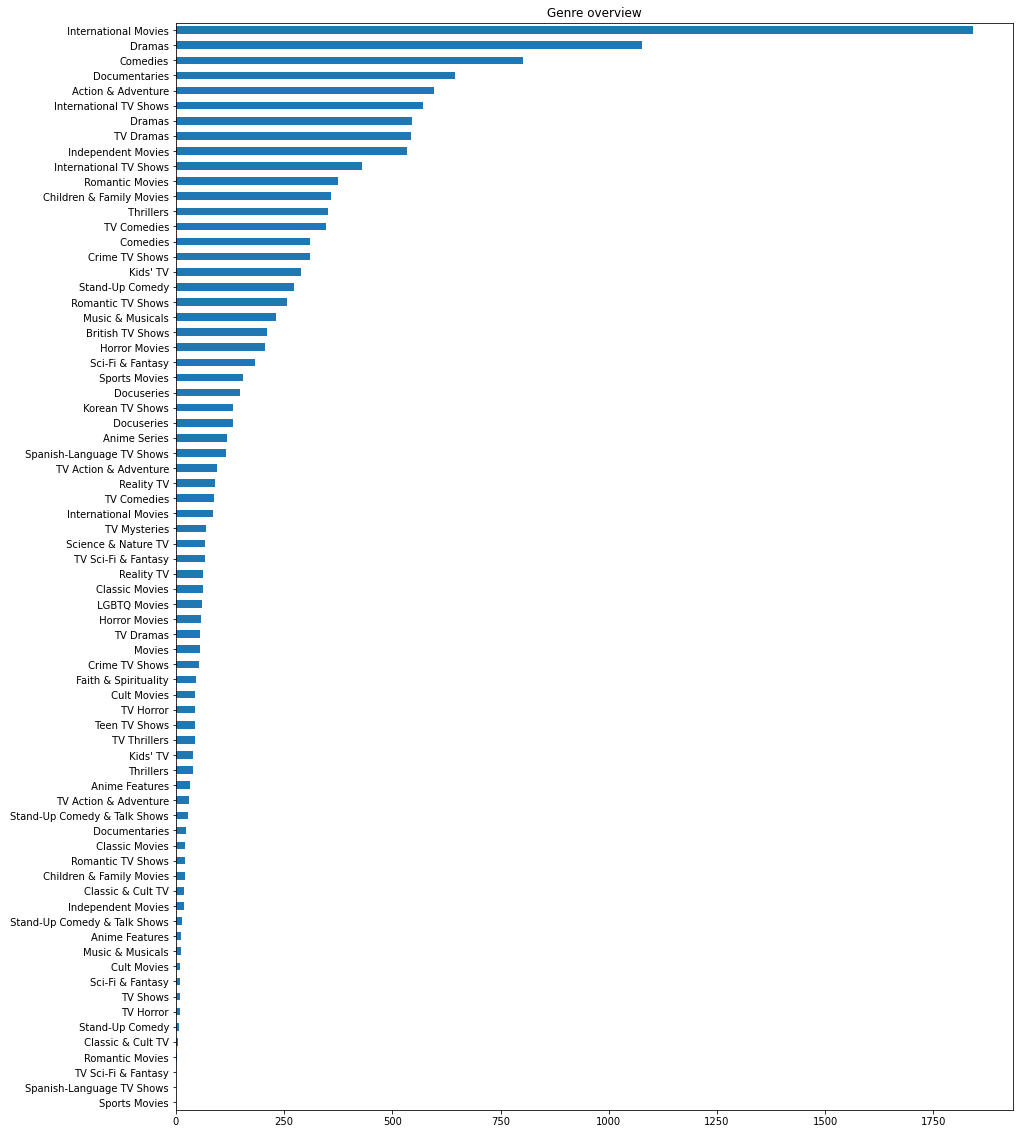

In [ ]:
df_genre_1.iloc[:,1:].sum().sort_values().plot(kind='barh', figsize=(15, 20), title="Genre overview")

A movie may comprise many genres. Let's look at the first 10 movies visually.

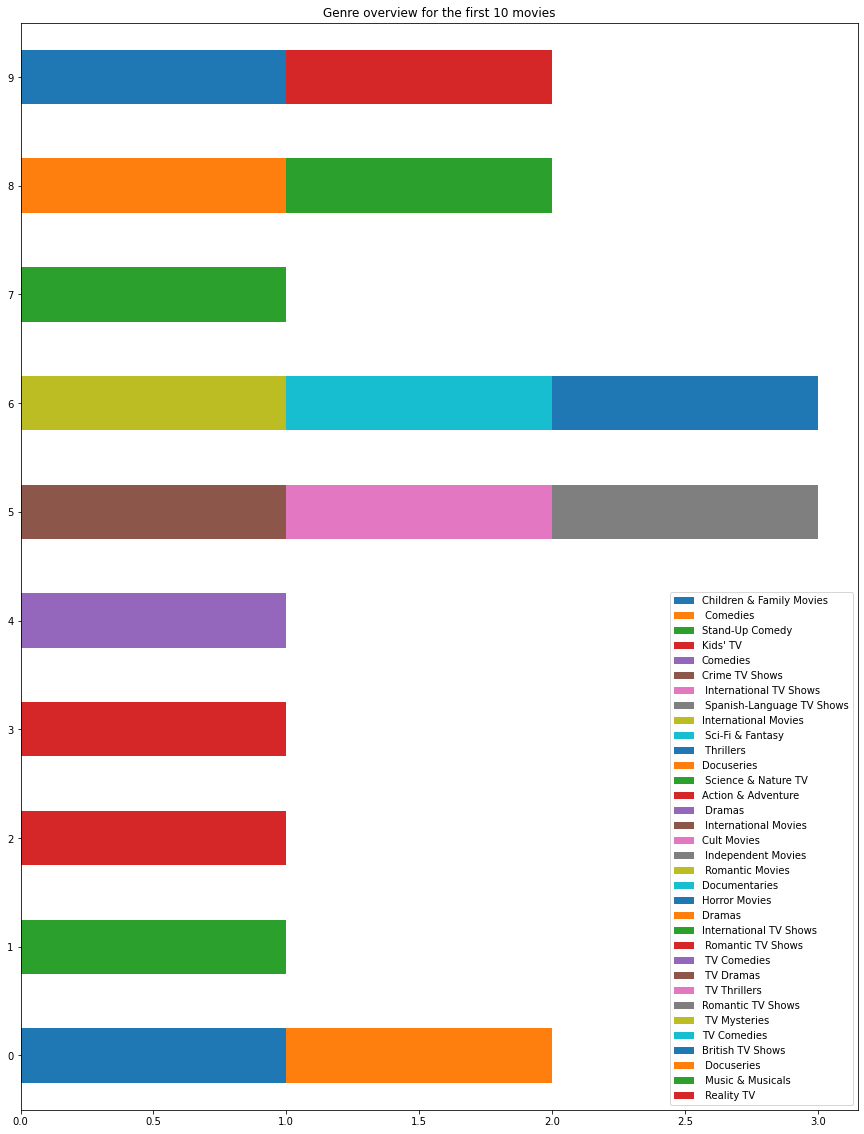

In [ ]:
df_genre_1.iloc[:10,1:35].plot(kind='barh', stacked=True, figsize=(15, 20), title="Genre overview for the first 10 movies")

Let's calculate the most similar movies by linear kernel (dot product)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

def get_genre_similarity(df_genre_1, df, watched_movie_ids, movie_count_to_recommend):
  df_genre_2 = df_genre_1.drop('title', 1)
  similarities = []
  for movie_id in watched_movie_ids:
    movie = [df_genre_2.loc[movie_id,:].values]
    local_similarities = []

    for key, row in df_genre_1.iterrows():
      current_row = [df_genre_2.loc[key,:].values]
      similarity = linear_kernel(movie, current_row)
      local_similarities.append(similarity)
      
    local_similarities = np.array(local_similarities).flatten()
    if len(similarities) == 0:
      similarities = local_similarities
    else:
      similarities += local_similarities
  
  df = df.copy()
  df['similarity'] = similarities / len(df_genre_1.columns)
  return df.sort_values(by='similarity', ascending=False).head(movie_count_to_recommend)


display(Markdown("### User watched movies/TV shows"))
df_watched = df[df.index.isin(watched_movie_ids)]
display(df_watched)

display(Markdown("### Recommended movies/TV shows by only Genre similarity"))
df_genre_2 = get_genre_similarity(df_genre_1, df, watched_movie_ids, movie_count_to_recommend)
display(df_genre_2)

### User watched movies/TV shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
59,80201906,Movie,Black Panther,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",United States,"September 4, 2018",2018,PG-13,135 min,"Action & Adventure, Sci-Fi & Fantasy","T'Challa, the superpowered new leader of the h..."
1650,80068327,Movie,War Machine,David Michôd,"Brad Pitt, Topher Grace, Emory Cohen, John Mag...",United States,"May 26, 2017",2017,TV-MA,123 min,"Comedies, Dramas",When a proud general is tasked with winning an...
3524,70131314,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru..."


### Recommended movies/TV shows by only Genre similarity

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,similarity
1729,70142827,Movie,Limitless,Neil Burger,"Bradley Cooper, Abbie Cornish, Robert De Niro,...",United States,"May 16, 2019",2011,PG-13,105 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","With his writing career dragging, Eddie Morra ...",0.068493
5080,60001363,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2019",2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...,0.068493
913,70039175,Movie,V for Vendetta,James McTeigue,"Natalie Portman, Hugo Weaving, Stephen Rea, St...","United States, United Kingdom, Germany","October 1, 2018",2005,R,132 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy","A masked freedom fighter known as ""V"" takes up...",0.068493
2432,60024935,Movie,Equilibrium,Kurt Wimmer,"Christian Bale, Emily Watson, Taye Diggs, Angu...",United States,"June 8, 2019",2002,R,107 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy","In a dystopian future, a totalitarian regime m...",0.068493
3524,70131314,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru...",0.068493


As you could see, all of our recommendations already make some sense in terms of genres. They are similar to watched movies.
 
But, that's not enough.

## Recommendation with all other features with TF-IDF and Linear Kernel

For example, I am a fan of Marvel's Sci-Fi serious. When I have watched `Black Panther`, I kinda like the recommendation systems showing me more of Marvel's. How to do that? We need more dimensions other than just Genres.

For this step, we also consider other aspects, like  'type',  'title', 'director', 'cast', 'country', 'listed_in'(genres), and 'description'.

But shall we continue to use One-Hot-Encoding feature to compare the similarity? As you could see, the trick will add a lot of columns to our dataset. It will become infeasible when we try to compare the similarity of `title` and `description`.

Then what options do we have? We use TF-IDF.

TF-IDF is a good way to compare document similarity. Here, we treat each feature as a document. Then we are able to compare any features among the watched movies and the possible candidates. At last, we accumulate all similarities to spot the most similar results.



# Recommended movies/TV shows to user

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,similarity
4357,80219127,Movie,Avengers: Infinity War,"Anthony Russo, Joe Russo","Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...",United States,"December 25, 2018",2018,PG-13,150 min,"Action & Adventure, Sci-Fi & Fantasy",Superheroes amass to stop intergalactic sociop...,0.524253
1131,60022645,Movie,The Time Machine,Simon Wells,"Guy Pearce, Samantha Mumba, Jeremy Irons, Mark...","United States, United Arab Emirates","November 23, 2019",2002,PG-13,96 min,"Action & Adventure, Sci-Fi & Fantasy","Based on the H.G. Wells classic, this adventur...",0.474253
3504,60029363,Movie,Dragonheart,Rob Cohen,"Sean Connery, Dennis Quaid, David Thewlis, Pet...",United States,"January 1, 2020",1996,PG-13,103 min,"Action & Adventure, Sci-Fi & Fantasy",In ancient times when majestic fire-breathers ...,0.436761
1409,70047101,Movie,Spider-Man 3,Sam Raimi,"Tobey Maguire, Kirsten Dunst, James Franco, Th...",United States,"November 1, 2019",2007,PG-13,139 min,"Action & Adventure, Sci-Fi & Fantasy",The seemingly invincible Spider-Man goes up ag...,0.436286
4048,70045919,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an...",0.435755


# Similarities by watched movies

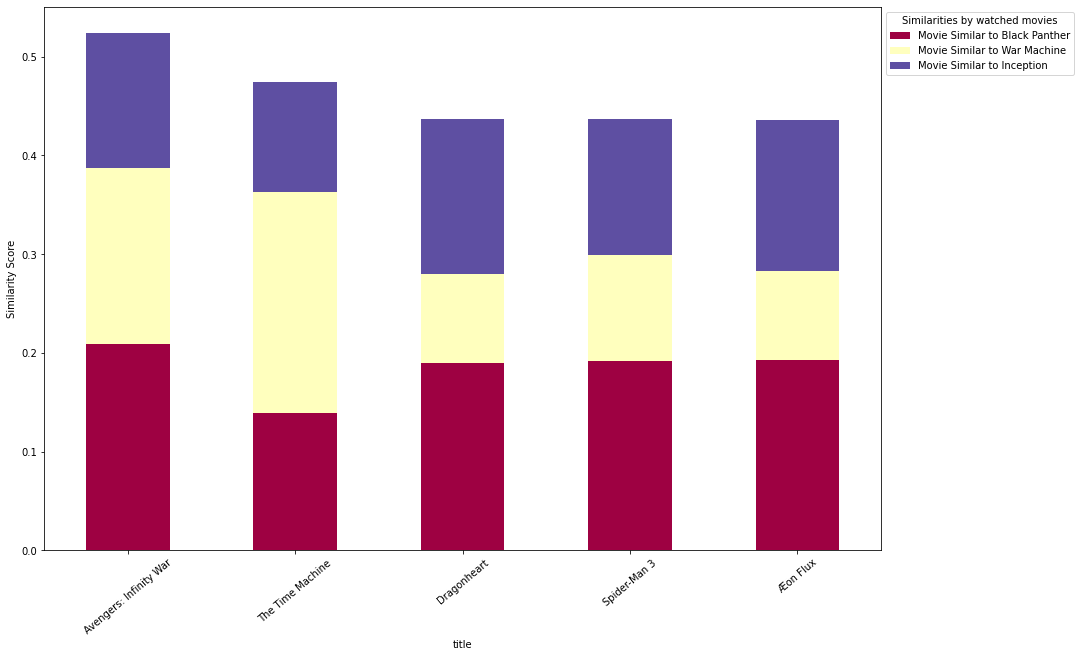

# Similarities by feature contribution

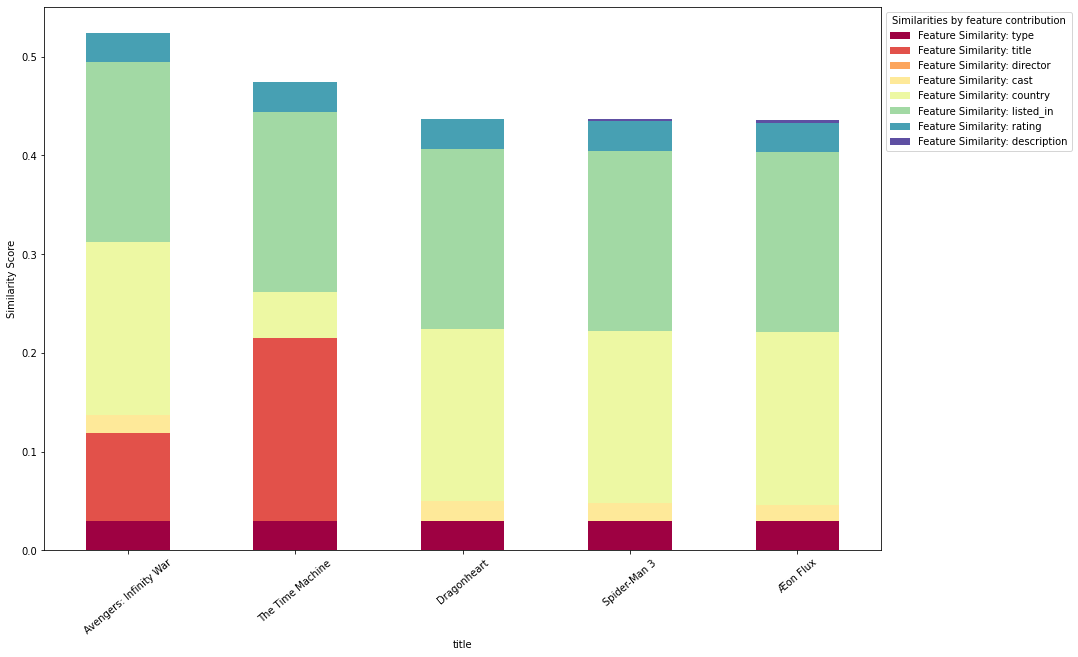

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

def get_similar_movies(user_age, df, watched_movie_ids = [], count = 40):
  '''Get all similar movies for given movie ids'''

  if len(watched_movie_ids) == 0:
    print("[WARN] Please enter at least 1 watched movie")
    return
  
  # The features we used to compare similarities
  # (featue_name, weight, tf-idf_token_pattern)

  feature_tokenize_list = [
      ('type', 0.01, r'(?ui)\b\w.*\b'),
      ('title', 0.3, r'(?ui)\b\w\w+\b'),
      # r'(?ui)\b\w+.+?(?=,|$)' match the full name from name list seperated by comma
      ('director', 0.3, r'(?ui)\b\w+.+?(?=,|$)'),
      ('cast', 0.2, r'(?ui)\b\w+.+?(?=,|$)'),
      ('country', 0.07, r'(?ui)\b\w+.+?(?=,|$)'),
      ('listed_in', 0.1, r'(?ui)\b\w+.+?(?=,|$)'),
      # Rating will be handled differently
      ('rating', 0, ''),
      ('description', 0.03, r'(?u)\b\w\w+\b'),
  ]

  similarities, similarities_row_base, similarities_feature_base = get_accumulated_similarity(df, df_watched, feature_tokenize_list)

  df_similarity, df_similarity_movie_wise, df_similarity_feature_wise = store_similarity(df, df_watched, similarities_row_base, similarities_feature_base, similarities)

  display(Markdown(f"# Recommended movies/TV shows to user"))
  
  return get_top_recommendation(
      df_similarity, 
      df_watched,
      watched_movie_ids, 
      count,
  ), get_top_recommendation(
        df_similarity_movie_wise, 
        df_watched,
        watched_movie_ids, 
        count
  ), get_top_recommendation(
        df_similarity_feature_wise, 
        df_watched,
        watched_movie_ids, 
        count
  )

def get_accumulated_similarity(df, df_watched, feature_tokenize_list):
  similarities = []
  similarities_row_base = []
  similarities_feature_base = {}
  pg_rating_score = age_optimization(df, user_age)
  for row in df_watched.iterrows():
    score_dict = {'rating': pg_rating_score}
    row_id = row[0]
    for item in feature_tokenize_list:
      feature_name = item[0]
      weight = item[1]
      token_pattern = item[2]
      
      if pd.isnull(row[1][feature_name]):
        continue
      
      if feature_name not in score_dict:
        score_dict[feature_name] = weight * evaluate_similarity_scores(df, row_id, feature_name = feature_name, token_pattern = token_pattern)

      similarities_feature_base[feature_name] = similarities_feature_base[feature_name] + score_dict[feature_name] if feature_name in similarities_feature_base else score_dict[feature_name]
    
    
    # modified cosine_similarities
    # accumulate similarity scores for all offered features in all rows
    
    similarity_for_a_movie = sum(score_dict.values())
    similarity_for_a_movie = adjust_similarity(similarity_for_a_movie, watched_movie_ids)

    similarities_row_base.append(similarity_for_a_movie)
    
    if len(similarities) == 0:
      similarities = similarity_for_a_movie
    else:
      similarities = similarities + similarity_for_a_movie
    
  return similarities, similarities_row_base, similarities_feature_base


def evaluate_similarity_scores(df, watched_movie_id, feature_name, token_pattern = r'(?u)\b\w\w+\b', extra_stop_words = []):
  '''Evaluate Similarity scores by comparing each row with the given the watched movie'''

  my_stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)

  corpus = df[feature_name]

  # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
  vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=my_stop_words, token_pattern = token_pattern)

  tfidf = vectorizer.fit_transform(corpus.values.astype('U'))

  #https://stackoverflow.com/questions/12118720/python-tf-idf-cosine-to-find-document-similarity
  # Similarity
  cosine_similarities = linear_kernel(tfidf[watched_movie_id:watched_movie_id+1], tfidf).flatten()
  return cosine_similarities

def adjust_similarity(similarity, watched_movie_ids):
  '''Make sure the maximum similarity to a watched movie 
      will not exceed 0.5 
      to prevent only recommending movies 
      similar to only a watched movie'''
  #max_value = 1/len(watched_movie_ids)
  max_value = 0.5
  return np.array([max_value if x > max_value else x for x in similarity])

def store_similarity(df, df_watched, similarities_row_base, similarities_feature_base, similarities):
  '''Also store similarity score for visualization'''
  df_similarity_movie_wise = df.loc[:, ['title']]
  df_similarity = df.copy()
  df_watched = df_watched.reset_index()
  max_movie_title_len = 30
  df_similarity_feature_wise =  df.loc[:, ['title']]
  for k,v in enumerate(similarities_row_base):
    movie_title = df_watched.loc[k]['title']
    df_similarity_movie_wise['Movie Similar to ' + movie_title[:max_movie_title_len]] = v

  for item in similarities_feature_base.items():
    df_similarity_feature_wise['Feature Similarity: ' + item[0]] = item[1]

  df_similarity_movie_wise['similarity'] = similarities
  df_similarity_feature_wise['similarity'] = similarities
  df_similarity['similarity'] = similarities
  return df_similarity, df_similarity_movie_wise, df_similarity_feature_wise



def get_top_recommendation(df_similarity, df_watched, watched_movie_ids, count):
  '''Get the top recomendations 
  by sorting the value by similarity score 
  and excluding the watched movies.
  Also, because a movie may use the same name 
  but distributed in different countries by the different Movie show_id
  '''
  return df_similarity[
                       np.invert(df_similarity.index.isin(watched_movie_ids)) 
                       & np.invert(
                           df_similarity['title'].isin(df_watched['title'])
                       )
                       & (df_similarity['similarity'] > 0)
                       ].sort_values(by = 'similarity', ascending = False).head(count)

def visualize_recommendation(df_similarity, df_similarity_movie_wise, df_similarity_feature_wise, watched_movie_ids):
  '''Visualize the recommendations'''
  display(df_similarity)


  #df_visual["title"] = df_visual["title"].apply(lambda x: x[:max_length])

  visualize(df_similarity_movie_wise, 'Similarities by watched movies')
  visualize(df_similarity_feature_wise, 'Similarities by feature contribution')

def visualize(df_visual, legend_label, colormap = cm.get_cmap('Spectral')):
  
  display(Markdown(f"# {legend_label}"))

  max_length = 30
  count = 0

  df_visual = df_visual.set_index('title').drop(['similarity'], axis = 1)

  ax = df_visual.plot(kind='bar', stacked=True, figsize=(15, 10), rot = 45, colormap = colormap)
  #plt.xticks(ind, X_AXIS, fontsize=12, rotation=90)
  ax.set_xticklabels(labels=[x[:max_length] for x in df_visual.index], rotation=40)
  ax.set_ylabel('Similarity Score')
  plt.legend(title=legend_label, bbox_to_anchor=(1.0, 1), loc='upper left')
  # plt.savefig('stacked.png')  # if needed
  plt.show()

def age_optimization(df, user_age):
  #multiple corresponding weight for different rating
  # https://rating-system.fandom.com/wiki/TV_Parental_Guidelines
  group1 = ['Child(age: 1-6)', [[['TV-Y'], 0], [['G', 'TV-G'], 0]]]
  group2 = ['Child(age: 7-13)', [[['TV-Y7',  'PG', 'TV-PG'], 0], [['TV-Y7-FV'], 0]]]
  group3 =  ['Child(age: 14 - 17)',[[['TV-14', 'TV-PG-13', 'PG-13'], 0.01]]]
  user_age_def = [group1,group2,group3]
  
  is_adult = user_age.lower() == 'adult'

  rating_scores = []
  for row in df.iterrows():

    if is_adult: 
      score = 0
    else:
      movie_pg_rating = row[1]['rating']
      score = -2
      is_rating_unseen = False
      rating_score_def = []
      for age_range_def in user_age_def:
        rating_score_def += age_range_def[1]
        if age_range_def[0] == user_age:
          
          for movie_rating in rating_score_def:
            
            if movie_pg_rating in movie_rating[0]:
              
              score = movie_rating[1]

    rating_scores = np.append(rating_scores, score)

  return rating_scores

df_similarity, df_similarity_movie_wise, df_similarity_feature_wise = get_similar_movies(user_age, df, watched_movie_ids = watched_movie_ids, count = movie_count_to_recommend)
if len(df_similarity) == 0:
  display(Markdown(f"There are none to recommend for you. Please try to change user age."))
else:
  visualize_recommendation(df_similarity, df_similarity_movie_wise, df_similarity_feature_wise, watched_movie_ids)


You see, now we have Marvel's Sci-Fi like `Avengers: Infinity War` and `Spider-Man 3` in our recommendations. That's promising.
 
Well, this is the content-based algorithm. One more thing... the collaborative filtering.


## Collaborative filtering

Now let's dive into the most influential recommendation algorithm.
 
This time, we don't have movie features, but only user ratings. How do we extract `abstract concepts` like the movie genre `concept` to do the accurate recommendation for a specific user?


In [ ]:
csv_file_path=f'{filer_folder}/combined_data_1.txt'
csv_file_path2=f'{filer_folder}/movie_titles.csv'

Needless to say, we shouldn't reinvent the wheel to do all the things. `Surprise` package has the whole shebang of tools for us to do recommendations

### Load data with user ratings

In [ ]:
!pip install surprise -q

     |████████████████████████████████| 11.8MB 3.6MB/s 


In [ ]:
import math
import re
from scipy.sparse import csr_matrix
from surprise import Reader,Dataset,SVD,BaselineOnly
from surprise.model_selection import cross_validate, GridSearchCV

In [ ]:
df=pd.read_csv(csv_file_path, header=None, names=["Cust_Id", "Rating"], usecols=[0,1])
df["Rating"]=df["Rating"].astype(float)

print("Dataset 1 shape: {}".format(df.shape))
df.head()

Dataset 1 shape: (24058263, 2)


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
df.Rating.value_counts()

### Data Preprocessing

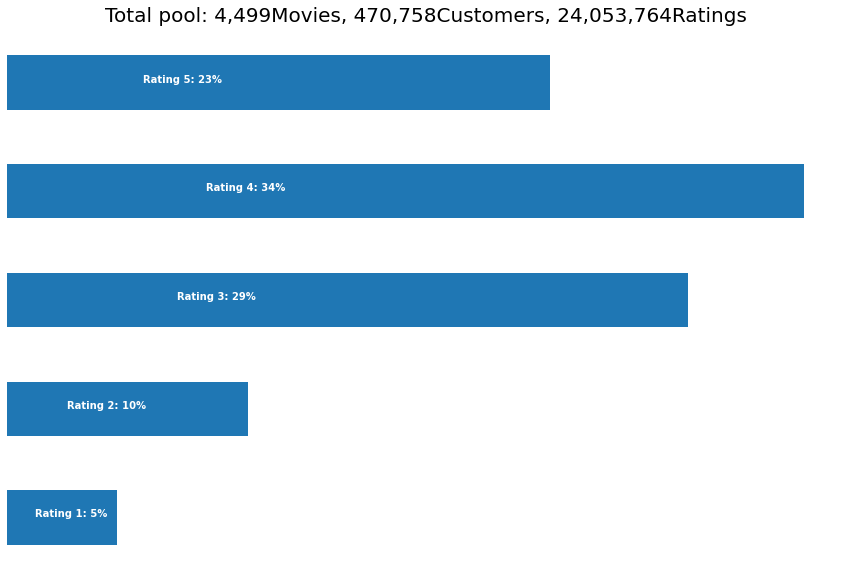

In [ ]:
p = df.groupby('Rating')['Rating'].agg(['count'])

movie_count = df.isnull().sum()[1]

cust_count = df['Cust_Id'].nunique() - movie_count

rating_count = df['Cust_Id'].count() - movie_count

ax = p.plot(kind='barh',legend=False,figsize = (15,10))
plt.title('Total pool: {:,}Movies, {:,}Customers, {:,}Ratings'.format(movie_count,cust_count,rating_count),fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4,i-1, "Rating {}: {:.0f}%".format(i,p.iloc[i-1][0]*100/p.sum()[0]), color='white', weight='bold')

In [ ]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating']==True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1
    
last_record = np.full((1,len(df) - df_nan.iloc[-1,0] - 1), movie_id)
movie_np = np.append(movie_np, last_record)

print('Movie numpy: {}'.format(movie_np))
print('Length: {}'.format(len(movie_np)))

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [ ]:
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print('Dataset Examples: ')
print(df.iloc[::5000000, :])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Dataset Examples: 
          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
5000996    501954     2.0       996
10001962   404654     5.0      1962
15002876   886608     2.0      2876
20003825  1193835     2.0      3825


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Data Cleansing

In [ ]:
# Eliminating movies with too few reviews and customers who give too few reviews #

f = ['count','mean']
print(df)
df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary.index = df_movie_summary.index.map(int)
movie_benchmark = round(df_movie_summary['count'].quantile(0.8),0)
drop_movie_list = df_movie_summary[df_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary.index = df_cust_summary.index.map(int)
cust_benchmark = round(df_cust_summary['count'].quantile(0.8),0)
drop_cust_list = df_cust_summary[df_cust_summary['count'] < cust_benchmark].index

print("Customer minimum times of review: {}".format(cust_benchmark))

          Cust_Id  Rating  Movie_Id
1         1488844     3.0         1
2          822109     5.0         1
3          885013     4.0         1
4           30878     4.0         1
5          823519     3.0         1
...           ...     ...       ...
24058258  2591364     2.0      4499
24058259  1791000     2.0      4499
24058260   512536     5.0      4499
24058261   988963     3.0      4499
24058262  1704416     3.0      4499

[24053764 rows x 3 columns]
Movie minimum times of review: 3884.0
Customer minimum times of review: 79.0


In [ ]:
print("Original Shape : {}".format(df.shape))
df = df[~df['Movie_Id'].isin(drop_movie_list)]
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print("After Trim Shape: {}".format(df.shape))
print("Data Examples: ")
print(df.iloc[::5000000, :])

Original Shape : (24053764, 3)
After Trim Shape: (13528427, 3)
Data Examples: 
          Cust_Id  Rating  Movie_Id
5109       785314     1.0         8
8889698    332300     3.0      1770
17751978   629874     4.0      3391


In [ ]:
# Putting the data into a matrix #

df_p = pd.pivot_table(df,values = 'Rating',index = 'Cust_Id', columns = 'Movie_Id')
print(df_p.shape)

(95325, 900)


In [ ]:
# Loading the movie_mapping_file #

df_title = pd.read_csv(csv_file_path2, encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print(df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


### Collaborative Filtering Recomendation

In [ ]:
# Recommend with Collaborative Filtering #

reader = Reader()

# Just acquire top 100k rows for faster run time #
data = Dataset.load_from_df(df[['Cust_Id','Movie_Id','Rating']][:100000], reader)

svd = SVD()
cross_validate(svd, data, measures = ['RMSE', 'MAE'])

{'fit_time': (5.176560878753662,
  5.170928955078125,
  5.220350027084351,
  5.217371940612793,
  5.227539777755737),
 'test_mae': array([0.78605454, 0.79882633, 0.78785691, 0.78965465, 0.79819228]),
 'test_rmse': array([0.98161102, 0.9896376 , 0.97922225, 0.98517011, 0.98624777]),
 'test_time': (0.13509750366210938,
  0.13405513763427734,
  0.1308293342590332,
  0.13208580017089844,
  0.2667222023010254)}

The performance is quite promising.

Now let's try to recommend movies for user with ID: `785314`

Here is the list of his watched movies from his `5` star ratings (his most favorite)

In [ ]:
# What user 785314 liked in the past #

df_785314 = df[(df['Cust_Id'] == 785314) & (df['Rating'] == 5)]
df_785314 = df_785314.set_index('Movie_Id')
df_785314 = df_785314.join(df_title)['Name']
print(df_785314)

Movie_Id
175                                        Reservoir Dogs
311                                               Ed Wood
329                                                 Dogma
331                                           Chasing Amy
788                                                Clerks
798                                                  Jaws
907                                       Animal Crackers
985                                             The Mummy
1552                                          Black Adder
1905    Pirates of the Caribbean: The Curse of the Bla...
2000                          Four Weddings and a Funeral
2122                                 Being John Malkovich
2342                                        Super Size Me
2360                                  Singin' in the Rain
2430                           Alien: Collector's Edition
2443                             Like Water for Chocolate
2452        Lord of the Rings: The Fellowship of the Ring
2465 

In [ ]:
# SVD Predicting which movies user_785314 would love to watch #

user_785314 = df_title.copy()
user_785314 = user_785314.reset_index()
user_785314 = user_785314[~user_785314['Movie_Id'].isin(drop_movie_list)]

# Getting full dataset
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)

user_785314['Estimate_Score'] = user_785314['Movie_Id'].apply(lambda x: svd.predict(785314, x).est)

user_785314 = user_785314.drop('Movie_Id', axis=1)

user_785314 = user_785314.sort_values('Estimate_Score', ascending=False)
print(user_785314.head(10))

         Year  ... Estimate_Score
27     2002.0  ...       3.564971
29     2003.0  ...       3.410366
10684  2002.0  ...       3.206224
13052  1965.0  ...       3.206224
13041  2001.0  ...       3.206224
13042  1986.0  ...       3.206224
13043  2003.0  ...       3.206224
13044  1998.0  ...       3.206224
13045  2005.0  ...       3.206224
13046  2002.0  ...       3.206224

[10 rows x 3 columns]


### Baseline Recommendation

In [ ]:
base = BaselineOnly()
cross_validate(base, data, measures = ['RMSE', 'MAE'])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'fit_time': (94.15760374069214,
  107.8513536453247,
  120.42085099220276,
  113.69175863265991,
  122.5815224647522),
 'test_mae': array([0.7108883 , 0.71071987, 0.71062975, 0.71054068, 0.71043986]),
 'test_rmse': array([0.90322023, 0.90299416, 0.90233773, 0.90255901, 0.90255492]),
 'test_time': (48.315908670425415,
  43.157190799713135,
  53.02837133407593,
  53.11314511299133,
  59.180980920791626)}

In [ ]:
 #BaselineOnly Predicting which movies user_785314 would love to watch #

user_785314 = df_title.copy()
user_785314 = user_785314.reset_index()
user_785314 = user_785314[~user_785314['Movie_Id'].isin(drop_movie_list)]

# Getting full dataset
data = Dataset.load_from_df(df[['Cust_Id', 'Movie_Id', 'Rating']], reader)

user_785314['Estimate_Score'] = user_785314['Movie_Id'].apply(lambda x: base.predict(785314, x).est)

user_785314 = user_785314.drop('Movie_Id', axis=1)

user_785314 = user_785314.sort_values('Estimate_Score', ascending=False)
print(user_785314.head(10))

        Year                                           Name  Estimate_Score
3455  2004.0                                 Lost: Season 1        4.456109
2101  1994.0                         The Simpsons: Season 6        4.342324
3443  2004.0          Family Guy: Freakin' Sweet Collection        4.274741
1475  2004.0                       Six Feet Under: Season 4        4.260440
4426  2001.0                        The West Wing: Season 3        4.243761
2113  2002.0                                        Firefly        4.205582
2171  1991.0                         The Simpsons: Season 3        4.184606
2451  2001.0  Lord of the Rings: The Fellowship of the Ring        4.176615
1946  2002.0                        Gilmore Girls: Season 3        4.175317
3289  1974.0                                  The Godfather        4.171148


See, this is the new way to do recommendations.

# Conclusion
We've introduced the 2 main categories of recommendation systems. But when to use what?
 
Apparently, if we don't have enough user rating data, we could only use content-based recommendations. This could also serve as the `cold-start` for a new system.
 
If we've already collected a lot of user ratings, we could switch to collaborative filters.